## Notebook para el análisis explotario de datos de vuelos

&nbsp;&nbsp;<font size="4" color="blue">Para ejecutar el notebook seguir los siguientes pasos:</font><br><br>
&nbsp;&nbsp;1- <b>Ejecutar únicamente las dos celdas a continuación</b><br>
&nbsp;&nbsp;2- Pulsar el botón generado <font color="red">"Run initial operations"</font><br>
&nbsp;&nbsp;3- Seleccionar los valores deseados<br>
&nbsp;&nbsp;4- Pulsar el botón <font  color="red">"Run all operations"</font><br>

In [ ]:
#Para instalar ipywidgets hay que ejecutar el siguiente comando en el terminal:
#!pip install ipywidgets

In [1]:
from IPython.display import Javascript, display
from ipywidgets import widgets

#Creamos un botón con el cual empezarán a ejecutarse las operaciones iniciales del notebook
def run_init(ev):
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1, 10)'))

button_init = widgets.Button(description="Run initial operations")
button_init.on_click(run_init)
display(button_init)

<IPython.core.display.Javascript object>

Button(description='Run initial operations', style=ButtonStyle())

In [2]:
import pandas as pd
import os

import matplotlib.pyplot as plt # para dibujar
%matplotlib inline

import numpy as np


import seaborn as sns

## Apertura de ficheros

In [3]:
#Definimos la variable ruta donde estarán los datasets a analizar
ruta = "/Users/moncholv/Documents/Proyecto AIr/datasets/On-timedata/renombrados/"


In [4]:
#Creamos un combo con el que elegir el año a analizar de los que disponemos de datos 1996-2018
dd = widgets.Dropdown(
    options = list(map(str, range(1996,2019))), 
    value = '1996',
    description = '* Year:',
)

dd.layout.width = '155px'
display(dd)

Dropdown(description='* Year:', layout=Layout(width='155px'), options=('1996', '1997', '1998', '1999', '2000',…

In [5]:
#Creamos un checkbox para indicar si en la ejecución queremos generar los ficheros una vez tratados los datos
cb = widgets.Checkbox(
    value=False,
    description='Generate processed files',
    disabled=False
)
display(cb)

Checkbox(value=False, description='Generate processed files')

In [6]:
#Creamos un botón con el cual empezarán a ejecutarse el resto de operaciones
def run_all(ev):
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1, IPython.notebook.ncells())'))

button = widgets.Button(description="Run all operations")
button.on_click(run_all)
display(button)

Button(description='Run all operations', style=ButtonStyle())

In [7]:
load_progress = widgets.IntProgress(
    value=0,
    min=0,
    max=13,
    step=1,
    description='Loading...',
    bar_style='info', # 'success', 'info', 'warning', 'danger' or ''
    orientation='horizontal'
)

In [8]:
#Cargamos todos los ficheros del año (mes a mes)
year = dd.value
dataframes = []
i = 1

display(load_progress)

for file in os.listdir(ruta + year):
    if file.endswith(".csv"):
        load_progress.value = i
        print("Reading file " + file)
        datos_vuelos = pd.read_csv(os.path.join(ruta + year, file), 
                                   encoding="ISO-8859-1", 
                                   low_memory=False, 
                                   error_bad_lines=False, 
                                   dtype={'CancellationCode': str})
        
        i = i + 1
        dataframes.append(datos_vuelos)

load_progress.value = i + 1
print()
print("All files loaded <--")

dataframes= sorted(dataframes, key=lambda x:x["Month"].max(axis=0))

#concatenamos todos para tener un DF anual
dfanual = pd.concat(dataframes)

IntProgress(value=0, bar_style='info', description='Loading...', max=13)

Reading file 2016-03.csv
Reading file 2016-02.csv
Reading file 2016-01.csv
Reading file 2016-05.csv
Reading file 2016-11.csv
Reading file 2016-10.csv
Reading file 2016-04.csv
Reading file 2016-12.csv
Reading file 2016-06.csv
Reading file 2016-07.csv
Reading file 2016-09.csv
Reading file 2016-08.csv

All files loaded <--


In [9]:
dataframes[0].head(5)

Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate Reporting_Airline  \
0  2016        1      1           6          3  2016-01-06                AA   
1  2016        1      1           7          4  2016-01-07                AA   
2  2016        1      1           8          5  2016-01-08                AA   
3  2016        1      1           9          6  2016-01-09                AA   
4  2016        1      1          10          7  2016-01-10                AA   

   DOT_ID_Reporting_Airline IATA_CODE_Reporting_Airline Tail_Number  ...  \
0                     19805                          AA      N4YBAA  ...   
1                     19805                          AA      N434AA  ...   
2                     19805                          AA      N541AA  ...   
3                     19805                          AA      N489AA  ...   
4                     19805                          AA      N439AA  ...   

   Div4TailNum  Div5Airport  Div5AirportID  Div5AirportSeqID Div5WheelsOn  \
0          NaN          NaN            NaN               NaN          NaN   
1          NaN          NaN            NaN               NaN          NaN   
2          NaN          NaN            NaN               NaN          NaN   
3          NaN          NaN            NaN               NaN          NaN   
4          NaN          NaN            NaN               NaN          NaN   

  Div5TotalGTime Div5LongestGTime  Div5WheelsOff Div5TailNum  Unnamed: 109  
0            NaN              NaN            NaN         NaN           NaN  
1            NaN              NaN            NaN         NaN           NaN  
2            NaN              NaN            NaN         NaN           NaN  
3            NaN              NaN            NaN         NaN           NaN  
4            NaN              NaN            NaN         NaN           NaN  

[5 rows x 110 columns]

In [10]:
#Miramos el tamaño del total
dfanual.shape

(5617658, 110)

In [11]:
#Miramos el tamaño de cada mes
for df in dataframes:
    print(df["Month"][1],df.shape)

1 (445827, 110)
2 (423889, 110)
3 (479122, 110)
4 (461630, 110)
5 (479358, 110)
6 (487637, 110)
7 (502457, 110)
8 (498347, 110)
9 (454878, 110)
10 (472626, 110)
11 (450938, 110)
12 (460949, 110)


## 1. Análisis Exploratorio

## 1.1 Aerolíneas

In [12]:
#para sacar las compañías que operan
#Cogemos las que hay en el primer mes y en el concatenado. Si son las mismas, tiramos. 
#Si no, miramos a ver en qué mes cambió
aerolineas_01 = dataframes[0]['IATA_CODE_Reporting_Airline'].unique()
aerolineas_anual = dfanual['IATA_CODE_Reporting_Airline'].unique()

if aerolineas_01.all() == aerolineas_anual.all():
    print(aerolineas_anual)
else:
    print(aerolineas_01)
    print(aerolineas_anual)

['AA' 'AS' 'B6' 'DL' 'VX' 'WN' 'UA' 'OO' 'F9' 'HA' 'NK' 'EV']


In [13]:

dfanual['Reporting_Airline'].unique()

array(['AA', 'AS', 'B6', 'DL', 'VX', 'WN', 'UA', 'OO', 'F9', 'HA', 'NK',
       'EV'], dtype=object)

## 1.2 Vuelos, aeropuertos y rutas.

## 1.2.1 Vuelos

In [14]:
#en teoría son números de vuelos único, pero no es verdad, parece que comparten numeración así que luego concatenaremos
len(dfanual['Flight_Number_Reporting_Airline'].unique())

6974

In [15]:
#hago el número de vuelo como es de verdad, concatenando código de compañía y vuelo
dfanual['Flight_Code'] = dfanual['IATA_CODE_Reporting_Airline'] + dfanual['Flight_Number_Reporting_Airline'].astype(str)

In [16]:
#Sacamos el número real de vuelos diferentes que hay
len((dfanual['Flight_Code']).unique())

22469

In [17]:
#códigos únicos de vuelos por mes
for df in dataframes:
    df['Flight_Code'] = df['IATA_CODE_Reporting_Airline'] + df['Flight_Number_Reporting_Airline'].astype(str)
    print(df["Month"][1],len((df['Flight_Code']).unique()))

1 17601
2 15546
3 16430
4 16396
5 16690
6 16862
7 16635
8 16677
9 15603
10 15205
11 18606
12 18120


## 1.2.1 Aeropuertos

In [18]:
#para sacar los aeropuertos hacemos como con las compañías
#Cogemos las que hay en el primer mes y en el concatenado. Si son los mismos, tiramos. Si no, miramos a ver en qué mes cambió
aeropuertos_01 = dataframes[0]['Origin'].unique()
aeropuertos_anual = dfanual['Origin'].unique()

if aeropuertos_01.all() == aeropuertos_anual.all():
    print(aeropuertos_anual)
else:
    print(aeropuertos_01)
    print(aeropuertos_anual)

['DFW' 'DTW' 'SEA' 'JFK' 'SJC' 'ORD' 'PHX' 'STL' 'LAX' 'MCO' 'DEN' 'MIA'
 'KOA' 'IAH' 'AUS' 'LAS' 'SLC' 'TUS' 'STT' 'BOS' 'FLL' 'SFO' 'OGG' 'TPA'
 'SNA' 'OKC' 'HNL' 'PHL' 'LGA' 'RDU' 'DCA' 'RIC' 'ATL' 'LBB' 'CLT' 'ELP'
 'SAN' 'BNA' 'JAC' 'SMF' 'EWR' 'IAD' 'LIH' 'SJU' 'ABQ' 'ORF' 'JAX' 'MSY'
 'SAT' 'MCI' 'GUC' 'IND' 'PDX' 'BWI' 'MSP' 'MKE' 'TUL' 'ONT' 'RSW' 'RNO'
 'DSM' 'MFE' 'PSP' 'OMA' 'EGE' 'PBI' 'SDF' 'PIT' 'FAT' 'DAY' 'STX' 'COS'
 'CMH' 'MTJ' 'HDN' 'BDL' 'MEM' 'CLE' 'HOU' 'BOI' 'OAK' 'GEG' 'ANC' 'BUF'
 'SYR' 'ALB' 'PVD' 'ROC' 'ILM' 'ICT' 'PWM' 'GSO' 'CHS' 'MDT' 'BHM' 'ADQ'
 'BET' 'BRW' 'SCC' 'FAI' 'JNU' 'KTN' 'YAK' 'CDV' 'SIT' 'PSG' 'WRG' 'OME'
 'OTZ' 'BUR' 'BLI' 'ADK' 'SWF' 'LGB' 'PSE' 'BQN' 'HPN' 'SAV' 'SRQ' 'BTV'
 'ORH' 'DAB' 'CVG' 'BIS' 'AVL' 'GRR' 'FNT' 'MYR' 'JAN' 'BIL' 'FAR' 'PNS'
 'AGS' 'GSP' 'LEX' 'DAL' 'ATW' 'GPT' 'MLB' 'BZN' 'CAK' 'CHO' 'MSN' 'EYW'
 'TRI' 'LFT' 'ROA' 'ECP' 'VPS' 'XNA' 'EVV' 'AVP' 'MDW' 'HSV' 'FAY' 'LIT'
 'TYS' 'TLH' 'MSO' 'CHA' 'AMA' 'CRP' 'HRL' 'ISP' 'M

In [19]:
#número de aeropuertos únicos en origen
len(aeropuertos_anual)

313

In [20]:
#número de aeropuertos únicos en destino
len(dfanual['Dest'].unique())

310

In [21]:
#CÓDIGOS DE AEROPUERTOS ÚNICOS DE DESTINO
dfanual['Dest'].unique()

array(['DTW', 'DFW', 'JFK', 'SEA', 'ORD', 'SJC', 'STL', 'DCA', 'TPA',
       'MIA', 'DEN', 'LAX', 'KOA', 'IAH', 'AUS', 'LAS', 'MCO', 'SLC',
       'STT', 'BOS', 'FLL', 'SFO', 'HNL', 'OGG', 'TUL', 'PHL', 'SNA',
       'IAD', 'LGA', 'RDU', 'EWR', 'RIC', 'PDX', 'CLT', 'ELP', 'SAN',
       'SAT', 'MCI', 'BNA', 'PHX', 'ONT', 'TUS', 'SMF', 'OKC', 'LIH',
       'ORF', 'RSW', 'BWI', 'MSP', 'GUC', 'IND', 'ATL', 'SJU', 'PSP',
       'MSY', 'COS', 'MKE', 'JAX', 'PIT', 'RNO', 'MFE', 'PBI', 'EGE',
       'DAY', 'ABQ', 'LBB', 'SDF', 'STX', 'DSM', 'OMA', 'CLE', 'BDL',
       'FAT', 'CMH', 'JAC', 'MTJ', 'HDN', 'MEM', 'HOU', 'BOI', 'OAK',
       'GEG', 'ANC', 'BUF', 'ICT', 'PVD', 'ALB', 'SYR', 'ILM', 'PWM',
       'ROC', 'CHS', 'MDT', 'GSO', 'BHM', 'BLI', 'BET', 'ADQ', 'BRW',
       'SCC', 'FAI', 'KTN', 'YAK', 'CDV', 'JNU', 'SIT', 'WRG', 'PSG',
       'OME', 'OTZ', 'BUR', 'ADK', 'LGB', 'SWF', 'HPN', 'PSE', 'BQN',
       'SRQ', 'SAV', 'BTV', 'ORH', 'DAB', 'CVG', 'FAR', 'MSN', 'GRR',
       'EVV', 'AVP',

## 1.2.3 Rutas

In [22]:
#ahora miramos las rutas que hay, al año y mensualmente
dfanual['Route'] = dfanual['Origin'] + "-" + dfanual['Dest'] 

In [23]:
len((dfanual['Route']).unique())

4591

In [24]:
#rutas únicas por mes
for df in dataframes:
    df['Route'] = df['Origin'] + "-" + df['Dest']
    print(df["Month"][1],len((df['Route']).unique()))

1 3995
2 3922
3 3985
4 4002
5 3880
6 4065
7 4028
8 4044
9 3919
10 3865
11 3936
12 4034


## 1.3 Retrasos, adelantos y cancelaciones

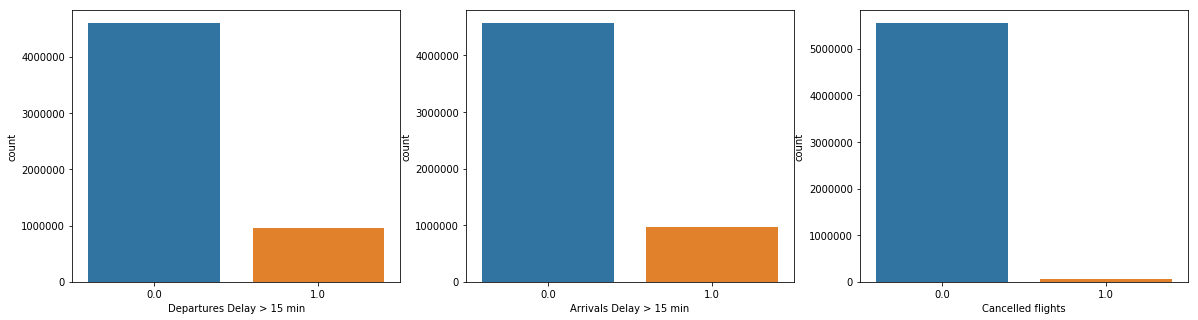

In [25]:
# Gráficas anuales
plt.figure(figsize=(20, 5))

plt.subplot(1,3,1)
sns.countplot(dfanual['DepDel15'], label='Frecuencia')
plt.xlabel('Departures Delay > 15 min')

plt.subplot(1,3,2)
sns.countplot(dfanual['ArrDel15'], label='Frecuencia')
plt.xlabel('Arrivals Delay > 15 min')

plt.subplot(1,3,3)
sns.countplot(dfanual['Cancelled'], label='Frecuencia')
plt.xlabel('Cancelled flights')


plt.show()

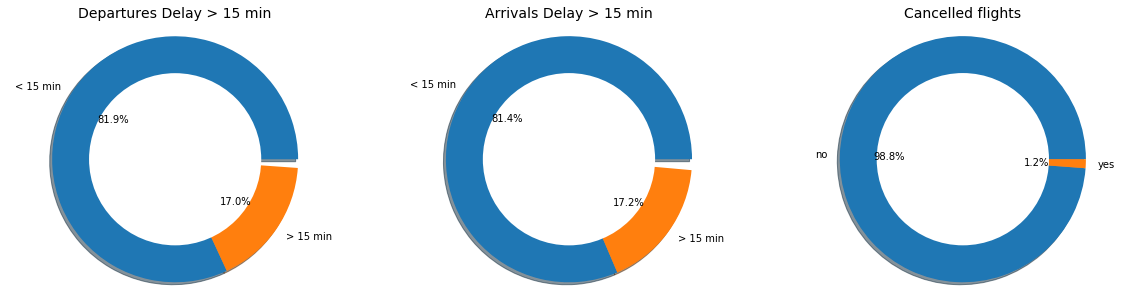

In [26]:
from matplotlib.gridspec import GridSpec

plt.figure(figsize=(20, 5))
etiquetas_1 = ['< 15 min', '> 15 min']
etiquetas_2 = ['no', 'yes']
fracs_dep = [len(dfanual[dfanual['DepDel15'] == 0])/len(dfanual['DepDel15']),
             len(dfanual[dfanual['DepDel15'] ==1])/len(dfanual['DepDel15'])]
fracs_arr = [len(dfanual[dfanual['ArrDel15'] == 0])/len(dfanual['ArrDel15'])
             , len(dfanual[dfanual['ArrDel15'] == 1])/len(dfanual['ArrDel15'])]
fracs_canc = [len(dfanual[dfanual['Cancelled'] == 0])/len(dfanual['Cancelled']),
              len(dfanual[dfanual['Cancelled'] == 1])/len(dfanual['Cancelled'])]

the_grid = GridSpec(1, 3)

plt.subplot(the_grid[0, 0], aspect=1)
plt.pie(fracs_dep, labels=etiquetas_1, autopct='%1.1f%%', shadow=True)
centre_circle_1 = plt.Circle((0, 0), 0.7, fc='white')
fig_1 = plt.gcf()
fig_1.gca().add_artist(centre_circle_1)
plt.axis('equal')
plt.title('Departures Delay > 15 min', fontsize=14)


plt.subplot(the_grid[0, 1], aspect=1)
plt.pie(fracs_arr, labels=etiquetas_1, autopct='%1.1f%%', shadow=True)
centre_circle_2 = plt.Circle((0, 0), 0.7, fc='white')
fig_2 = plt.gcf()
fig_2.gca().add_artist(centre_circle_2)
plt.axis('equal')
plt.title('Arrivals Delay > 15 min', fontsize=14)


plt.subplot(the_grid[0, 2], aspect=1)
plt.pie(fracs_canc, labels=etiquetas_2, autopct='%1.1f%%', shadow=True)
centre_circle_3 = plt.Circle((0, 0), 0.7, fc='white')
fig_3 = plt.gcf()
fig_3.gca().add_artist(centre_circle_3)
plt.axis('equal')
plt.title('Cancelled flights', fontsize=14)

plt.show()

## 1.3.1 Adelantos en Salidas de Vuelos

In [27]:
#vuelos que se han adelantado de la hora prevista en salidas
adelantos = (dfanual[dfanual['DepDelay'] < 0])
adelantos = adelantos['DepDelay']
adelantos.shape

(3324094,)

In [28]:
adelantos.describe()

count    3.324094e+06
mean    -4.906722e+00
std      3.120229e+00
min     -2.040000e+02
25%     -7.000000e+00
50%     -4.000000e+00
75%     -3.000000e+00
max     -1.000000e+00
Name: DepDelay, dtype: float64

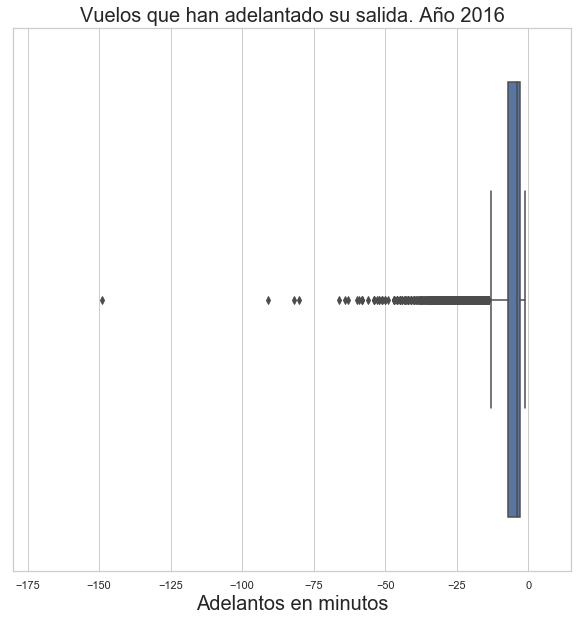

In [29]:
#Vuelos que han adelantado su salida

sns.set(style="whitegrid")
plt.figure(figsize=(10,10))
plt.xlim(-180,15)
ax = sns.boxplot(x=adelantos)
ax.set_xlabel("Adelantos en minutos", fontsize=20)
ax.set_title('Vuelos que han adelantado su salida. Año ' + year, fontsize=20)
plt.show()

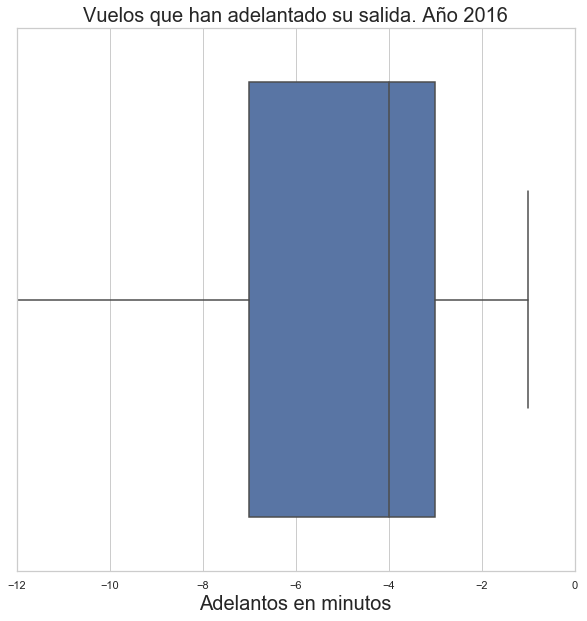

In [30]:
#vamos a reducir la escala para al menos ver la parte principal
sns.set(style="whitegrid")
plt.figure(figsize=(10,10))
plt.xlim(-12,0)
ax = sns.boxplot(x=adelantos)
ax.set_xlabel("Adelantos en minutos", fontsize=20)
ax.set_title('Vuelos que han adelantado su salida. Año ' + year, fontsize=20)
plt.show()

Los adelantos en salida mayores a 10 minutos son cancelaciones, por lo que no nos eliminamos

In [31]:
len(dfanual[dfanual['DepDelay'] < -15])

23906

## 1.3.2 Retrasos en salidas distribuidos por aerolíneas

In [32]:
retrasosSalidasPorAerolinea = pd.DataFrame(dfanual[dfanual['DepDel15'] == 1])

retrasosSalidasPorAerolinea = pd.DataFrame(retrasosSalidasPorAerolinea[['DepDelay', 'IATA_CODE_Reporting_Airline']])
retrasosSalidasPorAerolinea.head(5)

DepDelay IATA_CODE_Reporting_Airline
4      100.0                          AA
15      34.0                          AA
24      64.0                          AA
26      26.0                          AA
35     120.0                          AA

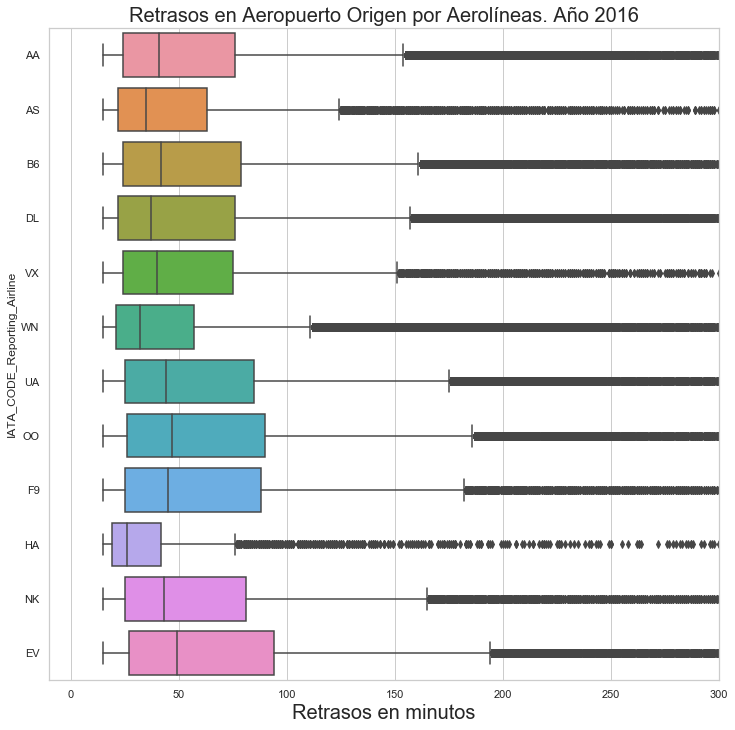

In [33]:
sns.set(style="whitegrid")
plt.figure(figsize=(12,12))
plt.xlim(-10,300)
ax = sns.boxplot(x=retrasosSalidasPorAerolinea["DepDelay"], y=retrasosSalidasPorAerolinea["IATA_CODE_Reporting_Airline"])
ax.set_xlabel("Retrasos en minutos", fontsize=20)
ax.set_title('Retrasos en Aeropuerto Origen por Aerolíneas. Año ' + year, fontsize=20)
plt.show()

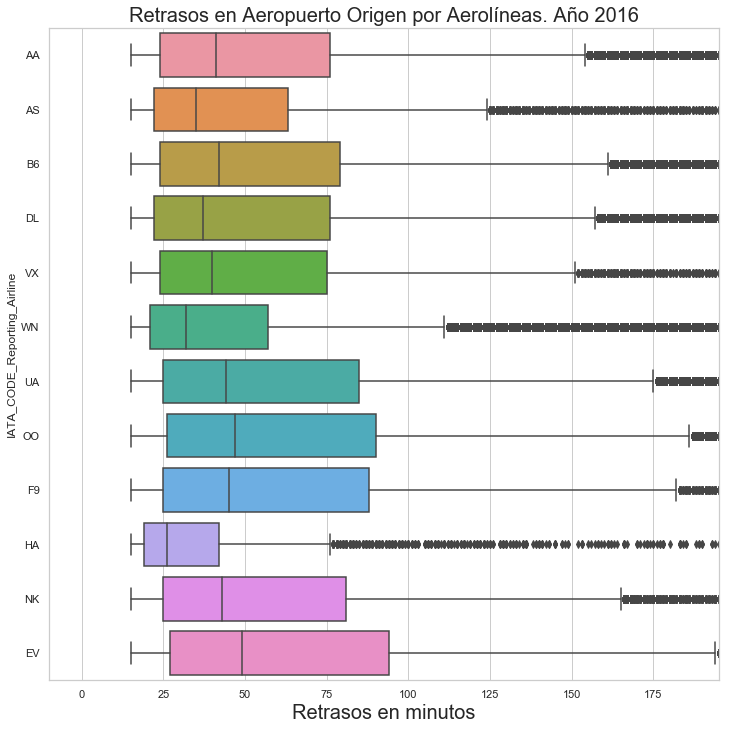

In [34]:
#vamos a limitar un poco más eje x
sns.set(style="whitegrid")
plt.figure(figsize=(12,12))
plt.xlim(-10,195)
ax = sns.boxplot(x=retrasosSalidasPorAerolinea["DepDelay"], y=retrasosSalidasPorAerolinea["IATA_CODE_Reporting_Airline"])
ax.set_xlabel("Retrasos en minutos", fontsize=20)
ax.set_title('Retrasos en Aeropuerto Origen por Aerolíneas. Año ' + year, fontsize=20)
plt.show()

## 1.3.3 Retrasos en Aeropuerto de Origen

#### Vuelos que se han retrasado al menos 15 minutos en la salida (incluye también a todos los que se retrasaron o no en la llegada en el destino)

In [35]:
#Vuelos que se han retrasado al menos 15 minutos en la salida (incluye también a todos los que se retrasaron o no
#en la llegada en el destino)
len(dfanual[dfanual['DepDel15'] == 1])

953543

In [36]:
#retrasos por mes en salidas

vuelosTotalesRetrasadosPorMes = pd.DataFrame(columns=['mes', 'vuelos'])

for df in dataframes:
    vuelosTotalesRetrasadosPorMes = vuelosTotalesRetrasadosPorMes.append({'mes': df["Month"][1], 'vuelos': len(df[(df['DepDel15'] == 1)])}, ignore_index=True)


#sin meter en un pandas, sólo para mostrarlos por print
#for df in dataframes:
#    print(df["Month"][1],len(df[df['DepDel15'] == 1]))

In [37]:
vuelosTotalesRetrasadosPorMes

mes  vuelos
0    1   71054
1    2   61911
2    3   80479
3    4   65932
4    5   74811
5    6   99390
6    7  114043
7    8  101375
8    9   60592
9   10   63043
10  11   59346
11  12  101567

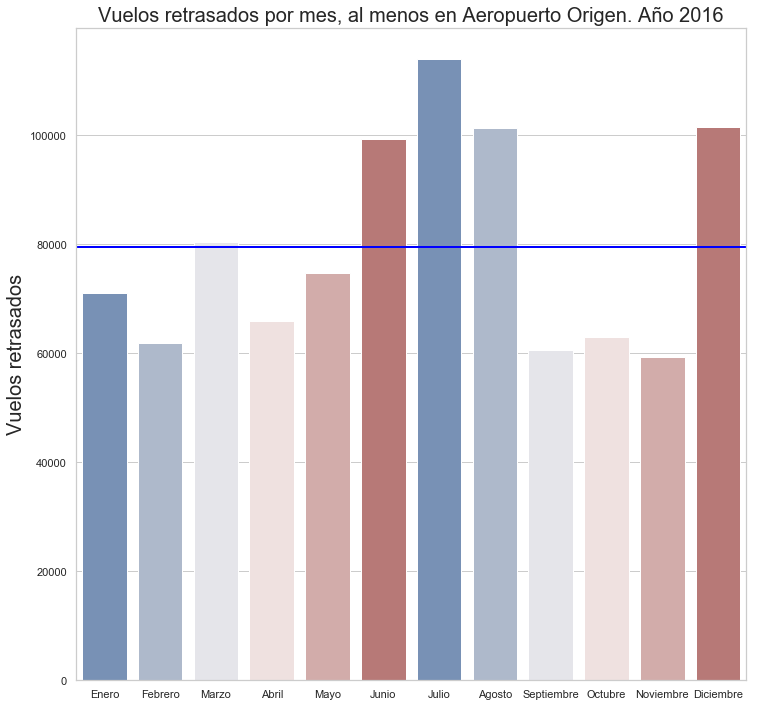

In [38]:
#Vuelos retrasados por mes

my_xticks=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

plt.figure(figsize=(12,12))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=vuelosTotalesRetrasadosPorMes['vuelos'], palette=pal)


ax.set_ylabel("Vuelos retrasados", fontsize=20)
ax.set_title('Vuelos retrasados por mes, al menos en Aeropuerto Origen. Año ' + year, fontsize=20)

plt.axhline(vuelosTotalesRetrasadosPorMes['vuelos'].mean(), color='Blue', linewidth=2)

plt.show()

#### Retrasados sólo en salidas y no en llegadas, es decir, recuperan el tiempo durante el vuelo. Esto significa que no se marca el retraso por ningún motivo, ya que el retraso se marca en destino por lo que los vuelos con retrasos en salidas sólo se registro el tiempo de retraso.

In [39]:
len(dfanual[(dfanual['DepDel15'] == 1) & (dfanual['ArrDel15'] == 0)])

196857

In [40]:
vuelosRestrasadosSoloEnSalidas = pd.DataFrame(columns=['mes', 'vuelos'])

for df in dataframes:
    vuelosRestrasadosSoloEnSalidas = vuelosRestrasadosSoloEnSalidas.append({'mes': df["Month"][1], 'vuelos': len(df[(df['DepDel15'] == 1) & (df['ArrDel15'] == 0)])}, ignore_index=True)


In [41]:
vuelosRestrasadosSoloEnSalidas

mes vuelos
0    1  17025
1    2  13946
2    3  16298
3    4  14585
4    5  16178
5    6  18577
6    7  19434
7    8  17474
8    9  12698
9   10  14469
10  11  15470
11  12  20703

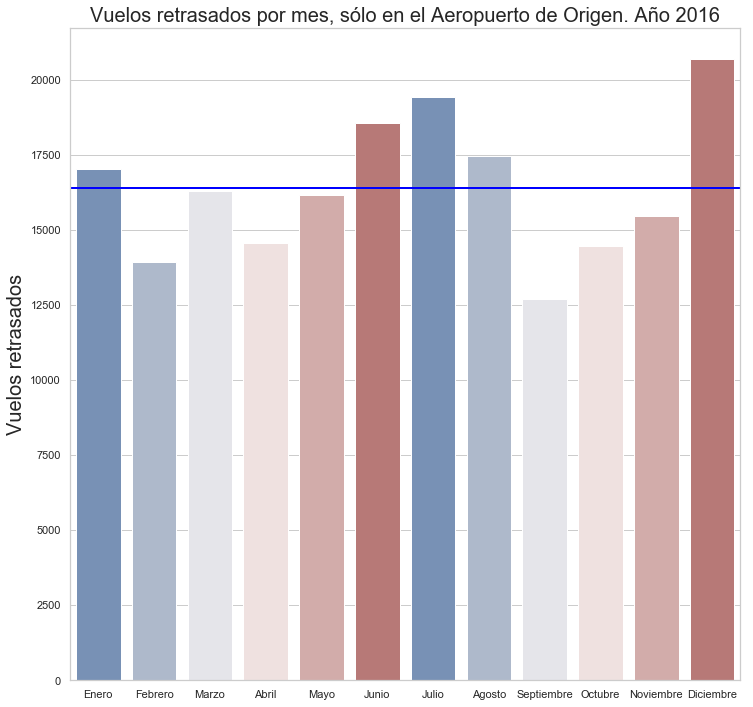

In [42]:
#Vuelos retrasados por mes sólo en salidas (no tenemos los motivos de los retrasos en este caso, al llegar en hora a destino)

plt.figure(figsize=(12,12))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=vuelosRestrasadosSoloEnSalidas['vuelos'], palette=pal)

ax.set_ylabel("Vuelos retrasados", fontsize=20)
ax.set_title('Vuelos retrasados por mes, sólo en el Aeropuerto de Origen. Año ' + year, fontsize=20)

plt.axhline(vuelosRestrasadosSoloEnSalidas['vuelos'].mean(), color='Blue', linewidth=2)

plt.show()

Nos vamos a quedar sólo con los retrasados en salidas (tanto si recuperaron el tiempo a la llegado como si no)
para ver la media y cuartiles, así como los posibles outliers

In [43]:
retrasosSalidas = pd.DataFrame(dfanual[dfanual['DepDel15'] == 1])
retrasosSalidas.head(5)

Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate Reporting_Airline  \
4   2016        1      1          10          7  2016-01-10                AA   
15  2016        1      1          21          4  2016-01-21                AA   
24  2016        1      1          30          6  2016-01-30                AA   
26  2016        1      1           1          5  2016-01-01                AA   
35  2016        1      1          10          7  2016-01-10                AA   

    DOT_ID_Reporting_Airline IATA_CODE_Reporting_Airline Tail_Number  ...  \
4                      19805                          AA      N439AA  ...   
15                     19805                          AA      N520AA  ...   
24                     19805                          AA      N4XVAA  ...   
26                     19805                          AA      N4YEAA  ...   
35                     19805                          AA      N439AA  ...   

    Div5AirportID  Div5AirportSeqID  Div5WheelsOn  Div5TotalGTime  \
4             NaN               NaN           NaN             NaN   
15            NaN               NaN           NaN             NaN   
24            NaN               NaN           NaN             NaN   
26            NaN               NaN           NaN             NaN   
35            NaN               NaN           NaN             NaN   

   Div5LongestGTime Div5WheelsOff Div5TailNum  Unnamed: 109 Flight_Code  \
4               NaN           NaN         NaN           NaN        AA43   
15              NaN           NaN         NaN           NaN        AA43   
24              NaN           NaN         NaN           NaN        AA43   
26              NaN           NaN         NaN           NaN        AA43   
35              NaN           NaN         NaN           NaN        AA43   

      Route  
4   DFW-DTW  
15  DFW-DTW  
24  DFW-DTW  
26  DTW-DFW  
35  DTW-DFW  

[5 rows x 112 columns]

In [44]:
retrasosSalidas = pd.DataFrame(retrasosSalidas['DepDelay'])

retrasosSalidas.head(5)

DepDelay
4      100.0
15      34.0
24      64.0
26      26.0
35     120.0

In [45]:
retrasosSalidas.describe().T

count      mean        std   min   25%   50%   75%     max
DepDelay  953543.0  63.24674  74.205707  15.0  23.0  39.0  75.0  2149.0

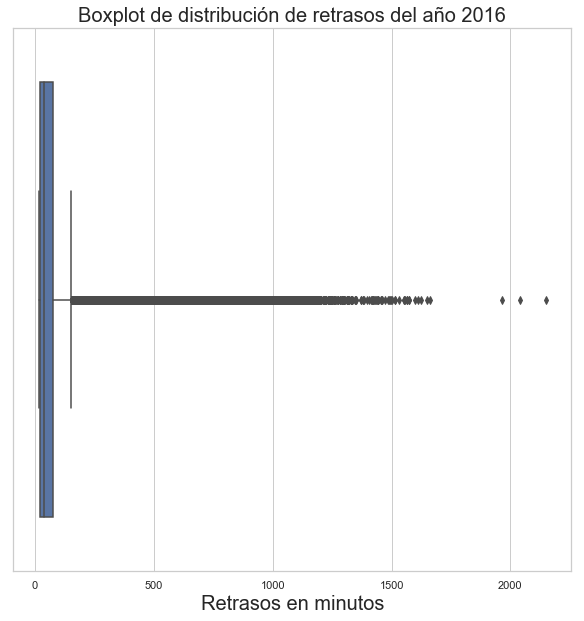

In [46]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,10))
ax = sns.boxplot(x=retrasosSalidas["DepDelay"])
ax.set_xlabel("Retrasos en minutos", fontsize=20)
ax.set_title('Boxplot de distribución de retrasos del año ' + year, fontsize=20)
plt.show()

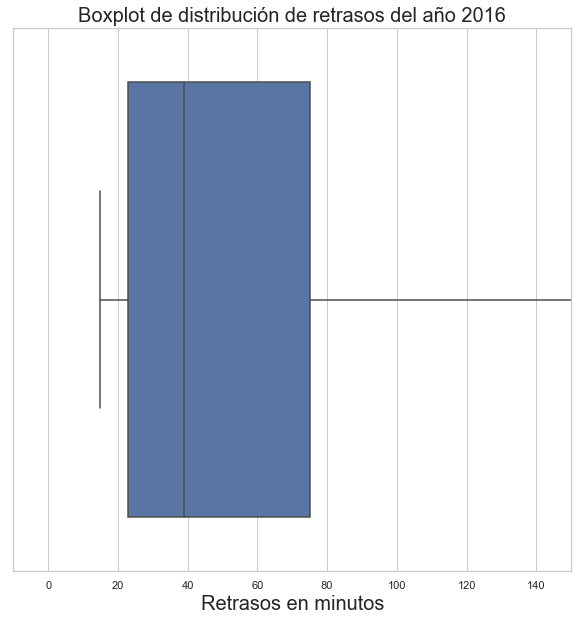

In [47]:
#vamos a reducir la escala para al menos ver la parte principal

sns.set(style="whitegrid")
plt.figure(figsize=(10,10))
plt.xlim(-10,150)
ax = sns.boxplot(x=retrasosSalidas["DepDelay"])
ax.set_xlabel("Retrasos en minutos", fontsize=20)
ax.set_title('Boxplot de distribución de retrasos del año ' + year, fontsize=20)
plt.show()

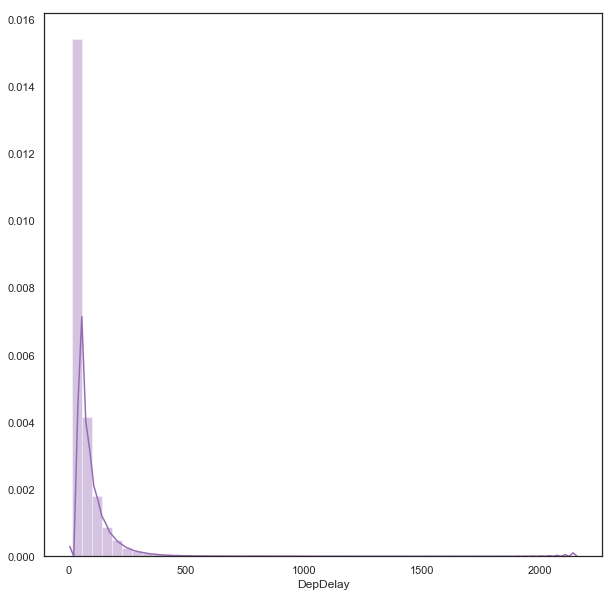

In [48]:
# distribución con densidad
sns.set(style="white", palette="muted", color_codes=True)

plt.figure(figsize=(10,10))

sns.distplot(retrasosSalidas["DepDelay"], color="m")

plt.show()

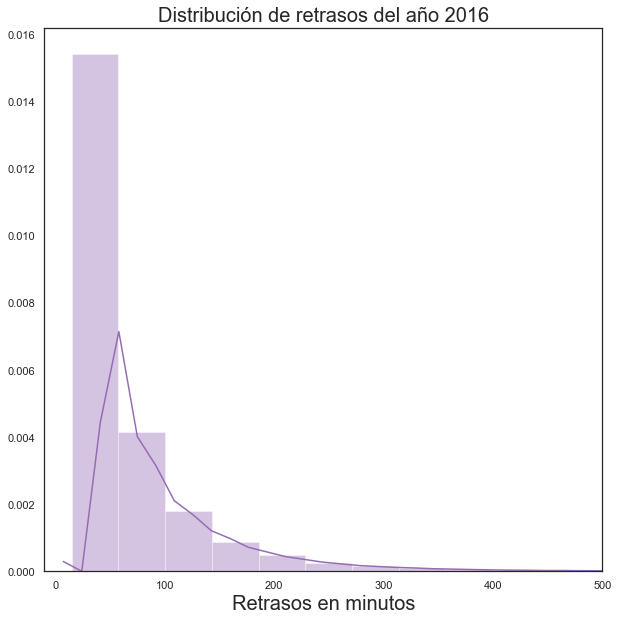

In [49]:
#acortamos la escala del eje X para verlo mejor
# distribución con densidad
sns.set(style="white", palette="muted", color_codes=True)

plt.figure(figsize=(10,10))

ax= sns.distplot(retrasosSalidas["DepDelay"], color="m")
plt.xlim(-10,500)
ax.set_xlabel("Retrasos en minutos", fontsize=20)
ax.set_title('Distribución de retrasos del año ' + year, fontsize=20)



plt.show()

Quizás deberíamos cortar sobre los 250 minutos de retraso

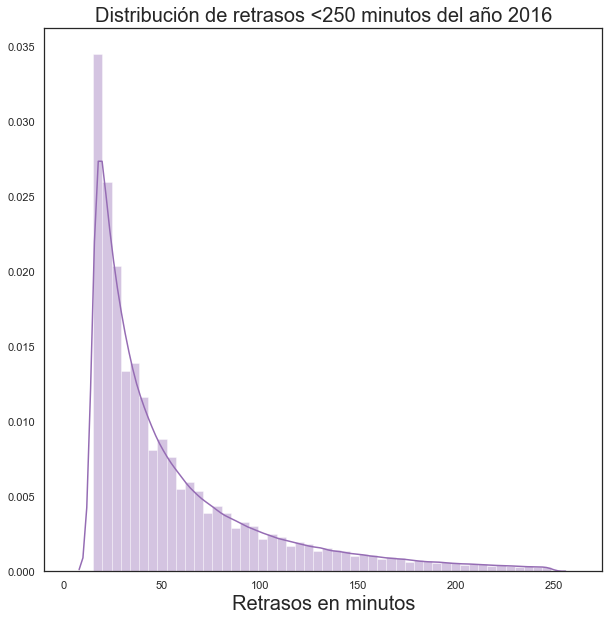

In [50]:
corte250Min = pd.DataFrame(retrasosSalidas[retrasosSalidas["DepDelay"]<250])

# distribución con densidad
sns.set(style="white", palette="muted", color_codes=True)

plt.figure(figsize=(10,10))

ax= sns.distplot(corte250Min["DepDelay"], color="m")
plt.xlim(-10,275)
ax.set_xlabel("Retrasos en minutos", fontsize=20)
ax.set_title('Distribución de retrasos <250 minutos del año ' + year, fontsize=20)


plt.show()

### 1.3.3.1 Ranking de aeropuertos en Retrasos en salidas

In [51]:
dfanual[dfanual['DepDel15'] == 1].Origin.value_counts(sort=True).head(15)

ATL    61915
ORD    52673
LAX    48494
DEN    40971
DFW    38226
SFO    36463
LAS    29473
PHX    25964
EWR    25383
MCO    23150
IAH    22385
BOS    21346
JFK    20631
LGA    19647
SEA    18666
Name: Origin, dtype: int64

In [52]:
#primero cogemos los 45 aeropuertos (de origen) con mayor número de retrasos
retrasosSalidaEnAeropuertos = pd.DataFrame(dfanual[dfanual['DepDelay'] == 1].Origin.value_counts(sort=True)).head(45)

In [53]:
#retrasos totales de esos 45 aeropuerto
retrasosSalidaEnAeropuertos.sum()

Origin    127203
dtype: int64

In [54]:
#el 85% de los retrasos acumulados en todo el año se concentran en 45 aeropuertos, de los 300 de media que tenemos por año
pct80Aeropuertos = ((retrasosSalidaEnAeropuertos.sum() / (len(dfanual[dfanual['DepDel15'] == 1])))) *100

In [55]:
pct80Aeropuertos = (pct80Aeropuertos -100) * (-1)

In [56]:
print('45 aeropuertos concentran el %.2f' %pct80Aeropuertos + '% de los retrasos del año ' + year)

45 aeropuertos concentran el 86.66% de los retrasos del año 2016


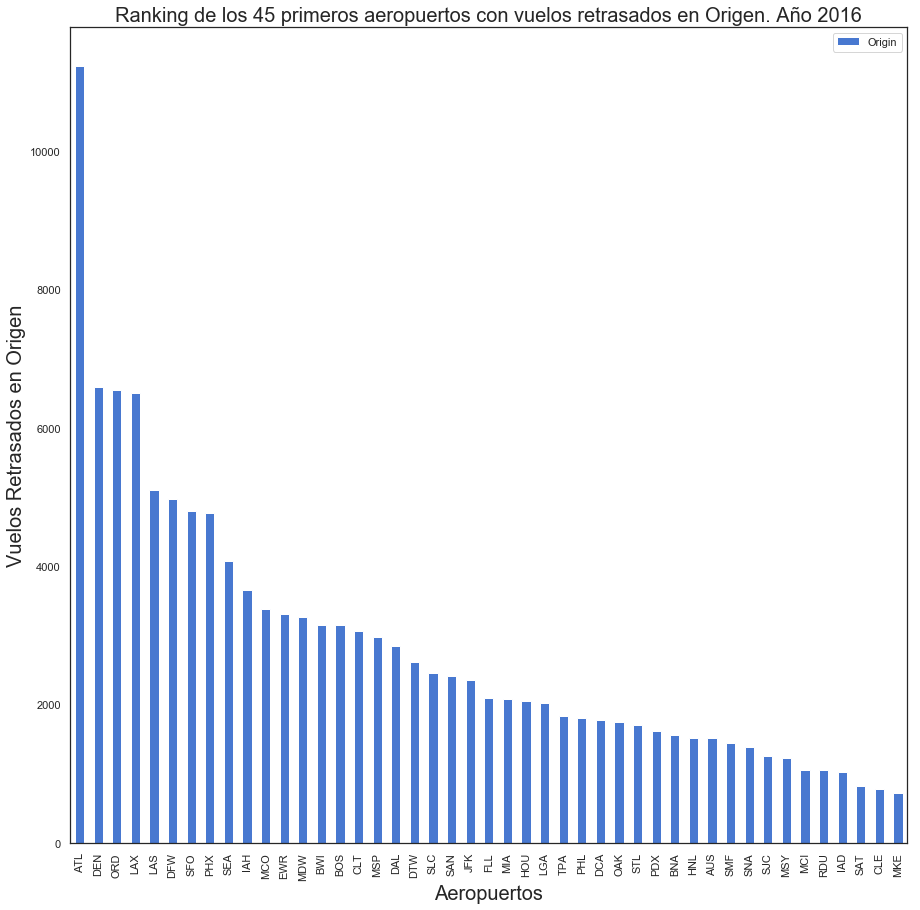

In [57]:
ax = retrasosSalidaEnAeropuertos.plot(kind='bar', figsize=(15,15))

ax.set_ylabel("Vuelos Retrasados en Origen", fontsize=20)
ax.set_xlabel("Aeropuertos", fontsize=20)
ax.set_title('Ranking de los 45 primeros aeropuertos con vuelos retrasados en Origen. Año ' + year , fontsize=20)

plt.show()

De estos, ATL (Atlanta), DFW (Dallas) y IAH(Houston) y  concentran más del 20% de los retrasos

In [58]:
retrasosSalidaEnAeropuertos = retrasosSalidaEnAeropuertos.reset_index()
retrasosSalidaEnAeropuertos.columns = ['Origin','DepDelay']

In [59]:
retrasosSalidaEnAeropuertos.head(45)

Origin  DepDelay
0     ATL     11228
1     DEN      6593
2     ORD      6549
3     LAX      6501
4     LAS      5106
5     DFW      4964
6     SFO      4796
7     PHX      4771
8     SEA      4066
9     IAH      3655
10    MCO      3380
11    EWR      3311
12    MDW      3267
13    BWI      3149
14    BOS      3148
15    CLT      3058
16    MSP      2979
17    DAL      2850
18    DTW      2607
19    SLC      2452
20    SAN      2407
21    JFK      2357
22    FLL      2096
23    MIA      2073
24    HOU      2050
25    LGA      2019
26    TPA      1833
27    PHL      1800
28    DCA      1771
29    OAK      1741
30    STL      1696
31    PDX      1621
32    BNA      1560
33    HNL      1508
34    AUS      1508
35    SMF      1442
36    SNA      1378
37    SJC      1248
38    MSY      1226
39    MCI      1055
40    RDU      1053
41    IAD      1025
42    SAT       817
43    CLE       773
44    MKE       716

In [60]:
#nos quedamos con los identificadores de los aeropuertos para poder filtrarlos en el 
aeropuertos = retrasosSalidaEnAeropuertos["Origin"].values.tolist()

In [61]:
#nos quedamos con los datos de esos aeropuertos
retrasosSalidaEnAeropuertos = dfanual.loc[(dfanual["Origin"].isin(aeropuertos))]

In [62]:
retrasosSalidaEnAeropuertos

Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate  \
0       2016        1      1           6          3  2016-01-06   
1       2016        1      1           7          4  2016-01-07   
2       2016        1      1           8          5  2016-01-08   
3       2016        1      1           9          6  2016-01-09   
4       2016        1      1          10          7  2016-01-10   
5       2016        1      1          11          1  2016-01-11   
6       2016        1      1          12          2  2016-01-12   
7       2016        1      1          13          3  2016-01-13   
8       2016        1      1          14          4  2016-01-14   
9       2016        1      1          15          5  2016-01-15   
10      2016        1      1          16          6  2016-01-16   
11      2016        1      1          17          7  2016-01-17   
12      2016        1      1          18          1  2016-01-18   
13      2016        1      1          19          2  2016-01-19   
14      2016        1      1          20          3  2016-01-20   
15      2016        1      1          21          4  2016-01-21   
16      2016        1      1          22          5  2016-01-22   
17      2016        1      1          23          6  2016-01-23   
18      2016        1      1          24          7  2016-01-24   
19      2016        1      1          25          1  2016-01-25   
20      2016        1      1          26          2  2016-01-26   
21      2016        1      1          27          3  2016-01-27   
22      2016        1      1          28          4  2016-01-28   
23      2016        1      1          29          5  2016-01-29   
24      2016        1      1          30          6  2016-01-30   
25      2016        1      1          31          7  2016-01-31   
26      2016        1      1           1          5  2016-01-01   
27      2016        1      1           2          6  2016-01-02   
28      2016        1      1           3          7  2016-01-03   
29      2016        1      1           4          1  2016-01-04   
...      ...      ...    ...         ...        ...         ...   
460913  2016        4     12          30          5  2016-12-30   
460914  2016        4     12          30          5  2016-12-30   
460915  2016        4     12          30          5  2016-12-30   
460916  2016        4     12          30          5  2016-12-30   
460917  2016        4     12          30          5  2016-12-30   
460918  2016        4     12          30          5  2016-12-30   
460919  2016        4     12          30          5  2016-12-30   
460921  2016        4     12          30          5  2016-12-30   
460922  2016        4     12          30          5  2016-12-30   
460925  2016        4     12          30          5  2016-12-30   
460926  2016        4     12          30          5  2016-12-30   
460928  2016        4     12          30          5  2016-12-30   
460929  2016        4     12          30          5  2016-12-30   
460930  2016        4     12          30          5  2016-12-30   
460931  2016        4     12          30          5  2016-12-30   
460932  2016        4     12          30          5  2016-12-30   
460933  2016        4     12          30          5  2016-12-30   
460934  2016        4     12          30          5  2016-12-30   
460935  2016        4     12          30          5  2016-12-30   
460936  2016        4     12          30          5  2016-12-30   
460937  2016        4     12          30          5  2016-12-30   
460938  2016        4     12          30          5  2016-12-30   
460939  2016        4     12          30          5  2016-12-30   
460940  2016        4     12          30          5  2016-12-30   
460941  2016        4     12          30          5  2016-12-30   
460943  2016        4     12          30          5  2016-12-30   
460944  2016        4     12          30          5  2016-12-30   
460945  2016        4     12          30          5  20

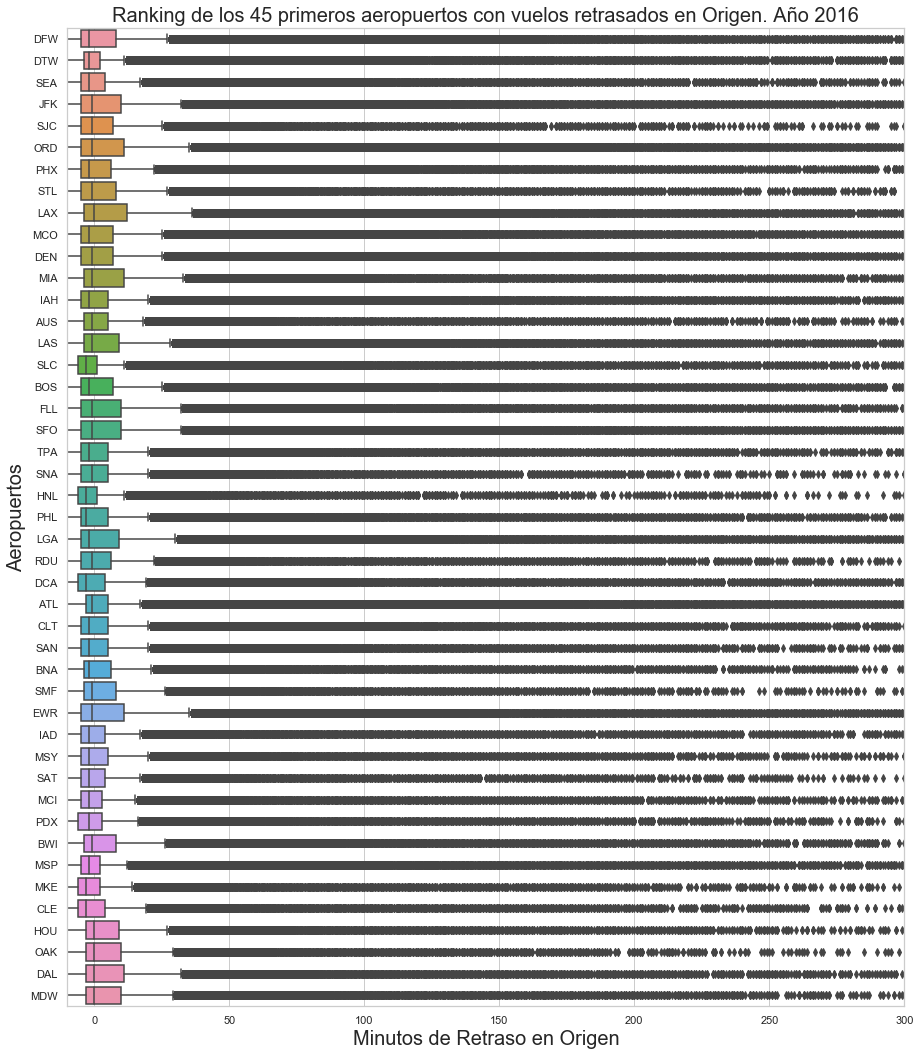

In [63]:
sns.set(style="whitegrid")
plt.figure(figsize=(15,18))
plt.xlim(-10,300)
ax = sns.boxplot(x=retrasosSalidaEnAeropuertos["DepDelay"], y=retrasosSalidaEnAeropuertos["Origin"])

ax.set_ylabel("Aeropuertos", fontsize=20)
ax.set_xlabel("Minutos de Retraso en Origen", fontsize=20)
ax.set_title('Ranking de los 45 primeros aeropuertos con vuelos retrasados en Origen. Año ' + year , fontsize=20)

plt.show()

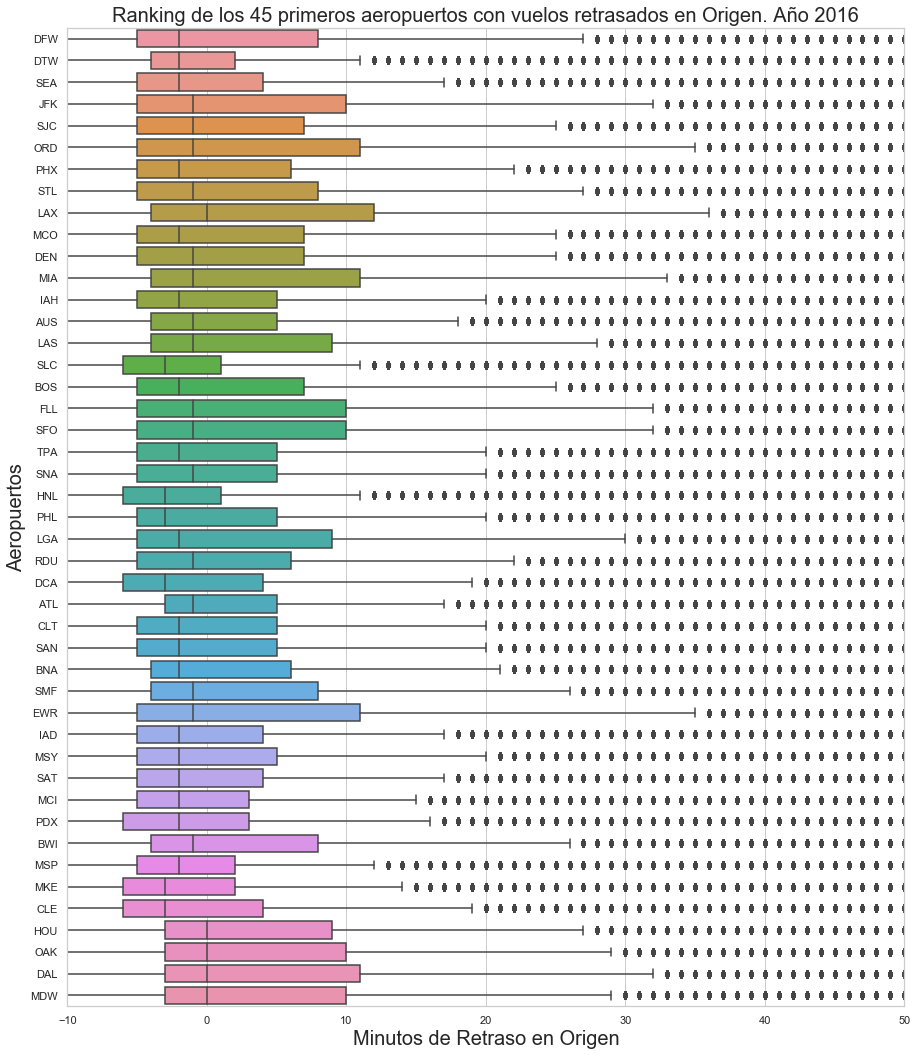

In [64]:
#vamos a despejar un poco el gráfico
sns.set(style="whitegrid")
plt.figure(figsize=(15,18))
plt.xlim(-10,50)
ax = sns.boxplot(x=retrasosSalidaEnAeropuertos["DepDelay"], y=retrasosSalidaEnAeropuertos["Origin"])

ax.set_ylabel("Aeropuertos", fontsize=20)
ax.set_xlabel("Minutos de Retraso en Origen", fontsize=20)
ax.set_title('Ranking de los 45 primeros aeropuertos con vuelos retrasados en Origen. Año ' + year , fontsize=20)

plt.show()

In [65]:
#me quedo con la agrupación por aeropuertos con su total de vuelos y su total de retrasos en salidas
vuelosTotalesPorAeropuerto = retrasosSalidaEnAeropuertos.groupby('Origin').aggregate({'Origin': 'count', 'DepDel15':'sum'})

In [66]:
#renombramos columnas
vuelosTotalesPorAeropuerto = vuelosTotalesPorAeropuerto.rename(columns={'Origin': 'VuelosTotales', 'DepDel15': 'VuelosRetrasados'})

In [67]:
#calulamos el porcentaje de vuelos retrasados sonbre el total de vuelos operados de salida en el año
vuelosTotalesPorAeropuerto['PctVuelosRetrasados'] = (vuelosTotalesPorAeropuerto['VuelosRetrasados'] / vuelosTotalesPorAeropuerto['VuelosTotales']) * 100

In [68]:
#ordenamos por aeropuertos con mayor porcentaje de vuelos retrasados de salida en el año
vuelosTotalesPorAeropuerto = vuelosTotalesPorAeropuerto.sort_values(['PctVuelosRetrasados'], ascending=False)

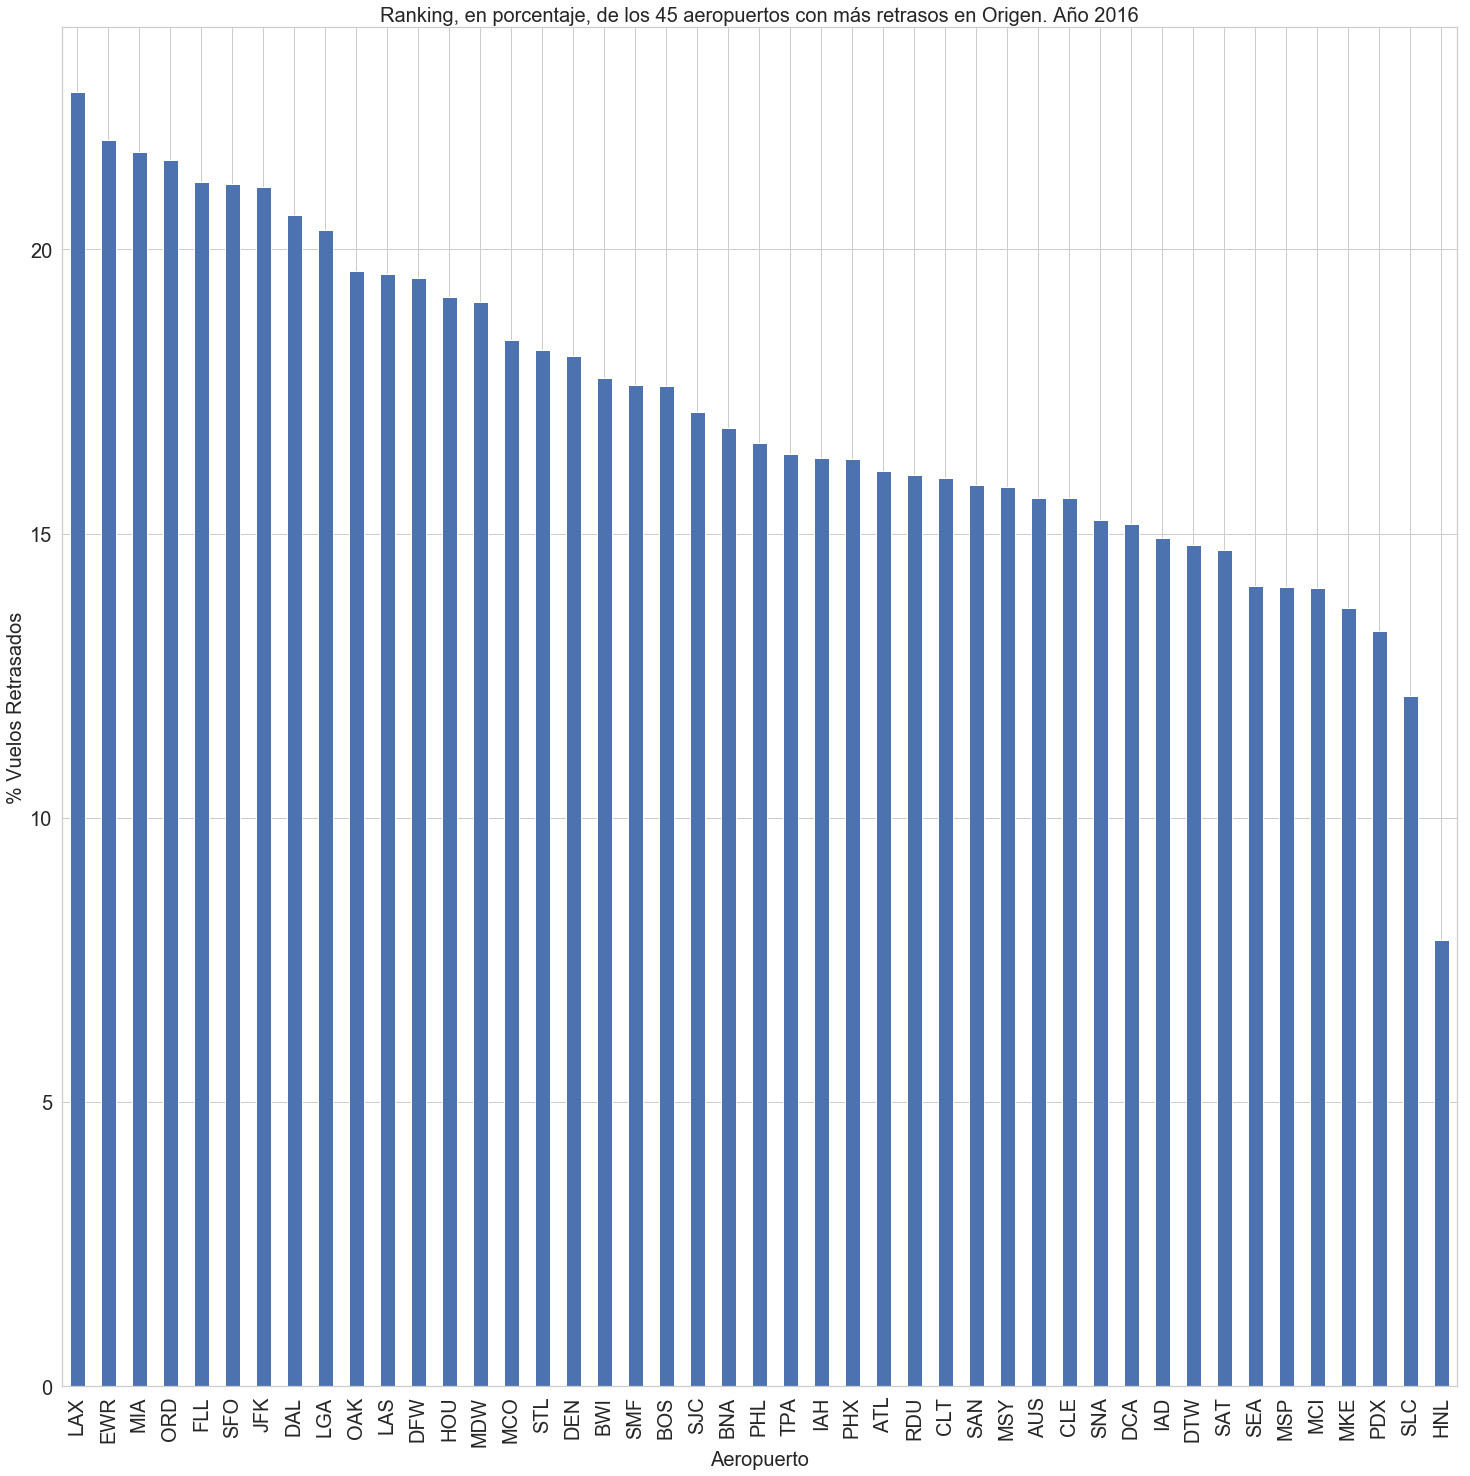

In [69]:
#mostramos el porcentaje de retrasos, ordenados, de los 45 aeropuertos con más retrasos

ax = vuelosTotalesPorAeropuerto.PctVuelosRetrasados.plot(kind='bar', figsize=(25,25), fontsize=20)

ax.set_xlabel("Aeropuerto", fontsize=20)
ax.set_ylabel("% Vuelos Retrasados", fontsize=20)
ax.set_title('Ranking, en porcentaje, de los 45 aeropuertos con más retrasos en Origen. Año ' + year, fontsize=20)

plt.show()

#### Dado que no podemos discernir si el mal tiempo fue a la llegada o la salida, en los retrasos de los vuelos de salida, así como en el caso de que el motivo sea el espacio aéreo, sólo podemos sacar el retraso, en llegadas, en función de la llegada tardía del vuelo anterior y por la aerolínea.

In [70]:
retrasosSalidaEnAeropuertos = pd.DataFrame(retrasosSalidaEnAeropuertos[retrasosSalidaEnAeropuertos['DepDel15'] == 1])

In [71]:
retrasosSalidaEnAeropuertos.shape

(797687, 112)

In [72]:
#retrasos medios en salidas por aeropuerto causados por la llegada tardía del vuelo anterior
retrasoMedioEnSalidasPorLateAircraft = pd.DataFrame(retrasosSalidaEnAeropuertos[retrasosSalidaEnAeropuertos['LateAircraftDelay'] > 0])


In [73]:
#usamos la media
retrasoMedioEnSalidasPorLateAircraft = retrasoMedioEnSalidasPorLateAircraft.groupby('Origin').aggregate({'Origin': 'count', 'DepDelay':'mean', 'LateAircraftDelay' : 'mean'})

In [74]:
#renombramos las columnas
retrasoMedioEnSalidasPorLateAircraft = retrasoMedioEnSalidasPorLateAircraft.rename(columns={'Origin': 'VuelosTotales', 'DepDelay': 'MediaRetrasoTotal', 'LateAircraftDelay' : 'MediaTiempoRetrasado'})

In [75]:
#ordenamos por aeropuertos con retraso por llegada tardía del vuelo anterior
retrasoMedioEnSalidasPorLateAircraft = retrasoMedioEnSalidasPorLateAircraft.sort_values(['MediaTiempoRetrasado'], ascending=False)

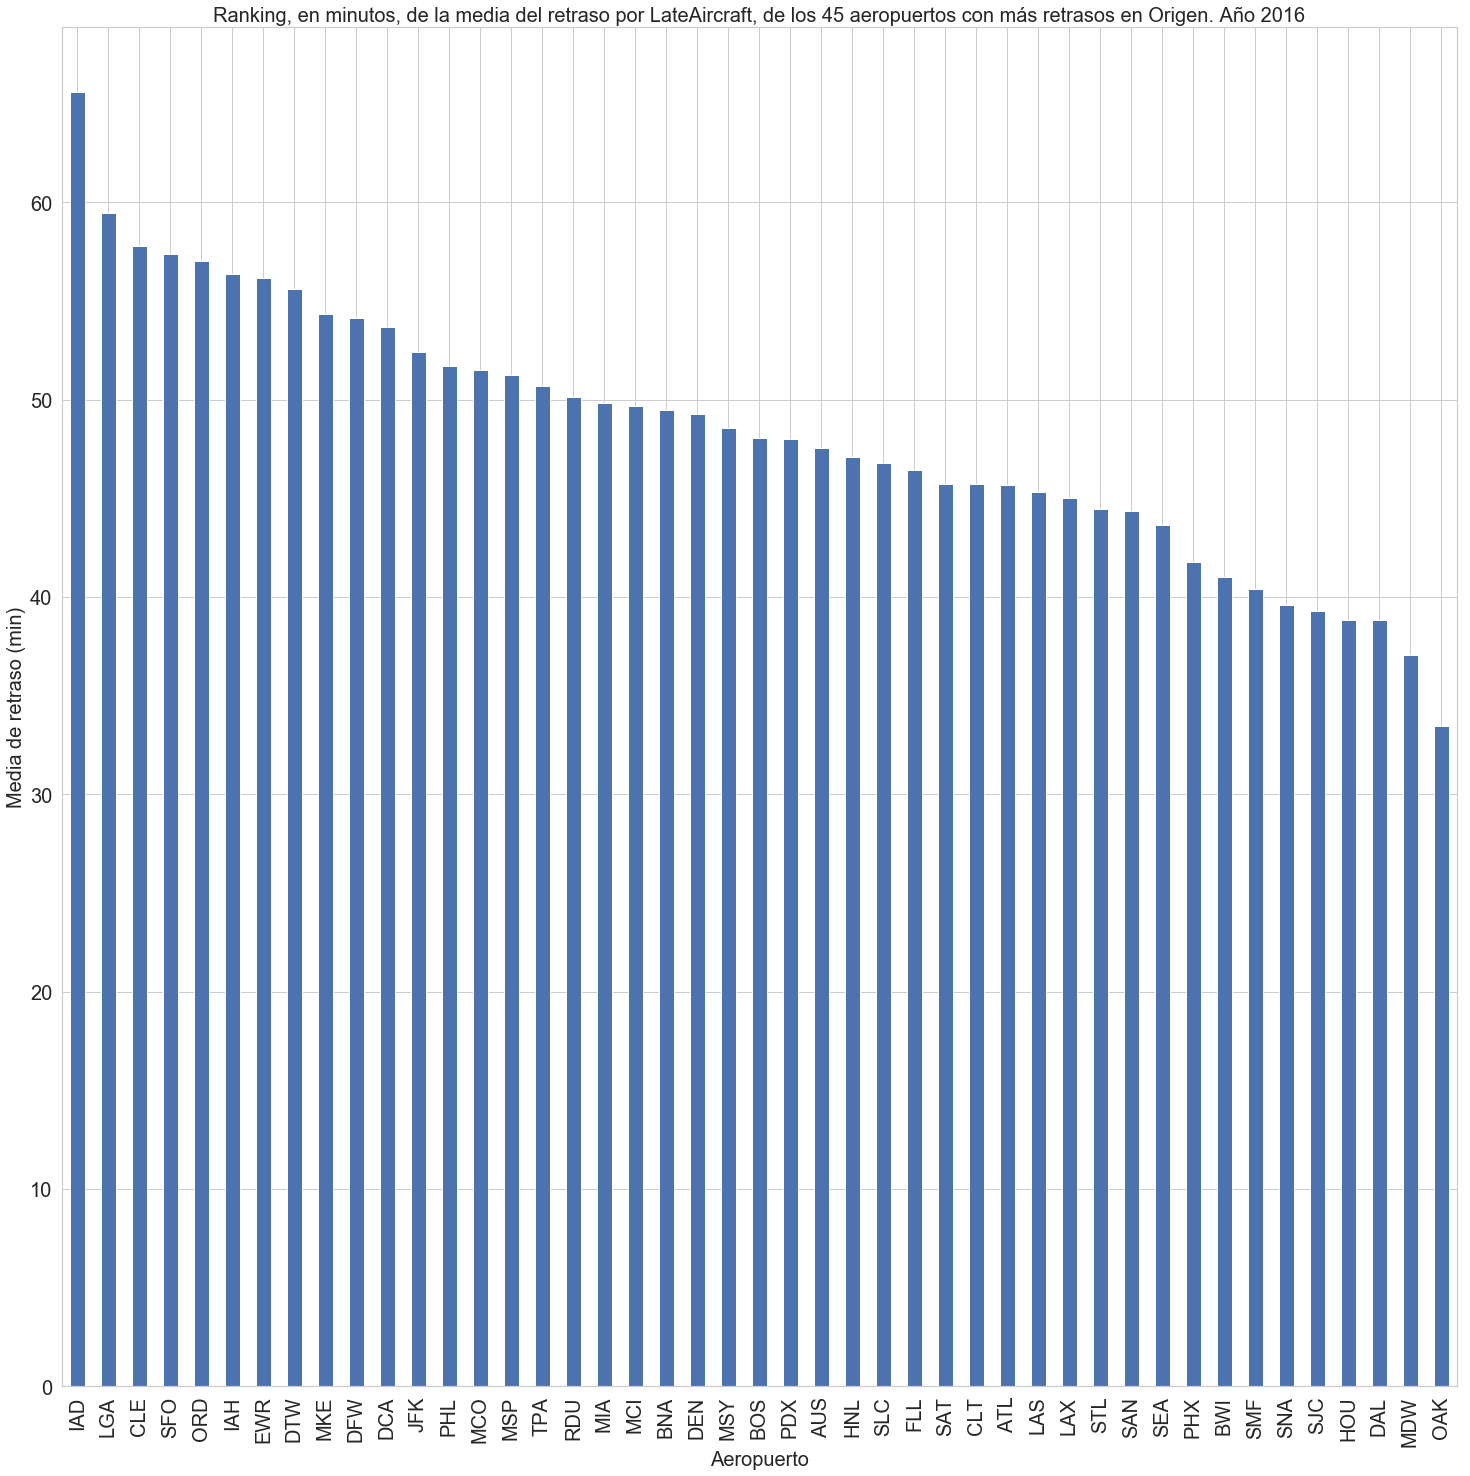

In [76]:
#mostramos la media de los retrasos por aeropuerto, ordenados, de los 45 aeropuertos con más retrasos

ax = retrasoMedioEnSalidasPorLateAircraft.MediaTiempoRetrasado.plot(kind='bar', figsize=(25,25), fontsize=20)
ax.set_xlabel("Aeropuerto", fontsize=20)
ax.set_ylabel("Media de retraso (min)", fontsize=20)
ax.set_title('Ranking, en minutos, de la media del retraso por LateAircraft, de los 45 aeropuertos con más retrasos en Origen. Año ' + year, fontsize=20)

plt.show()

In [77]:
#mostramos el peso del retraso por llegada tardía del avión respecto al retraso total de la salida 
#(es decir por si tuvo otros factores)

retrasoMedioEnSalidasPorLateAircraft['PesoRetraso'] = (retrasoMedioEnSalidasPorLateAircraft['MediaTiempoRetrasado'] / retrasoMedioEnSalidasPorLateAircraft['MediaRetrasoTotal'])*100


In [78]:
#ordenamos por de mayor a menor peso
retrasoMedioEnSalidasPorLateAircraft = retrasoMedioEnSalidasPorLateAircraft.sort_values(['PesoRetraso'], ascending=False)

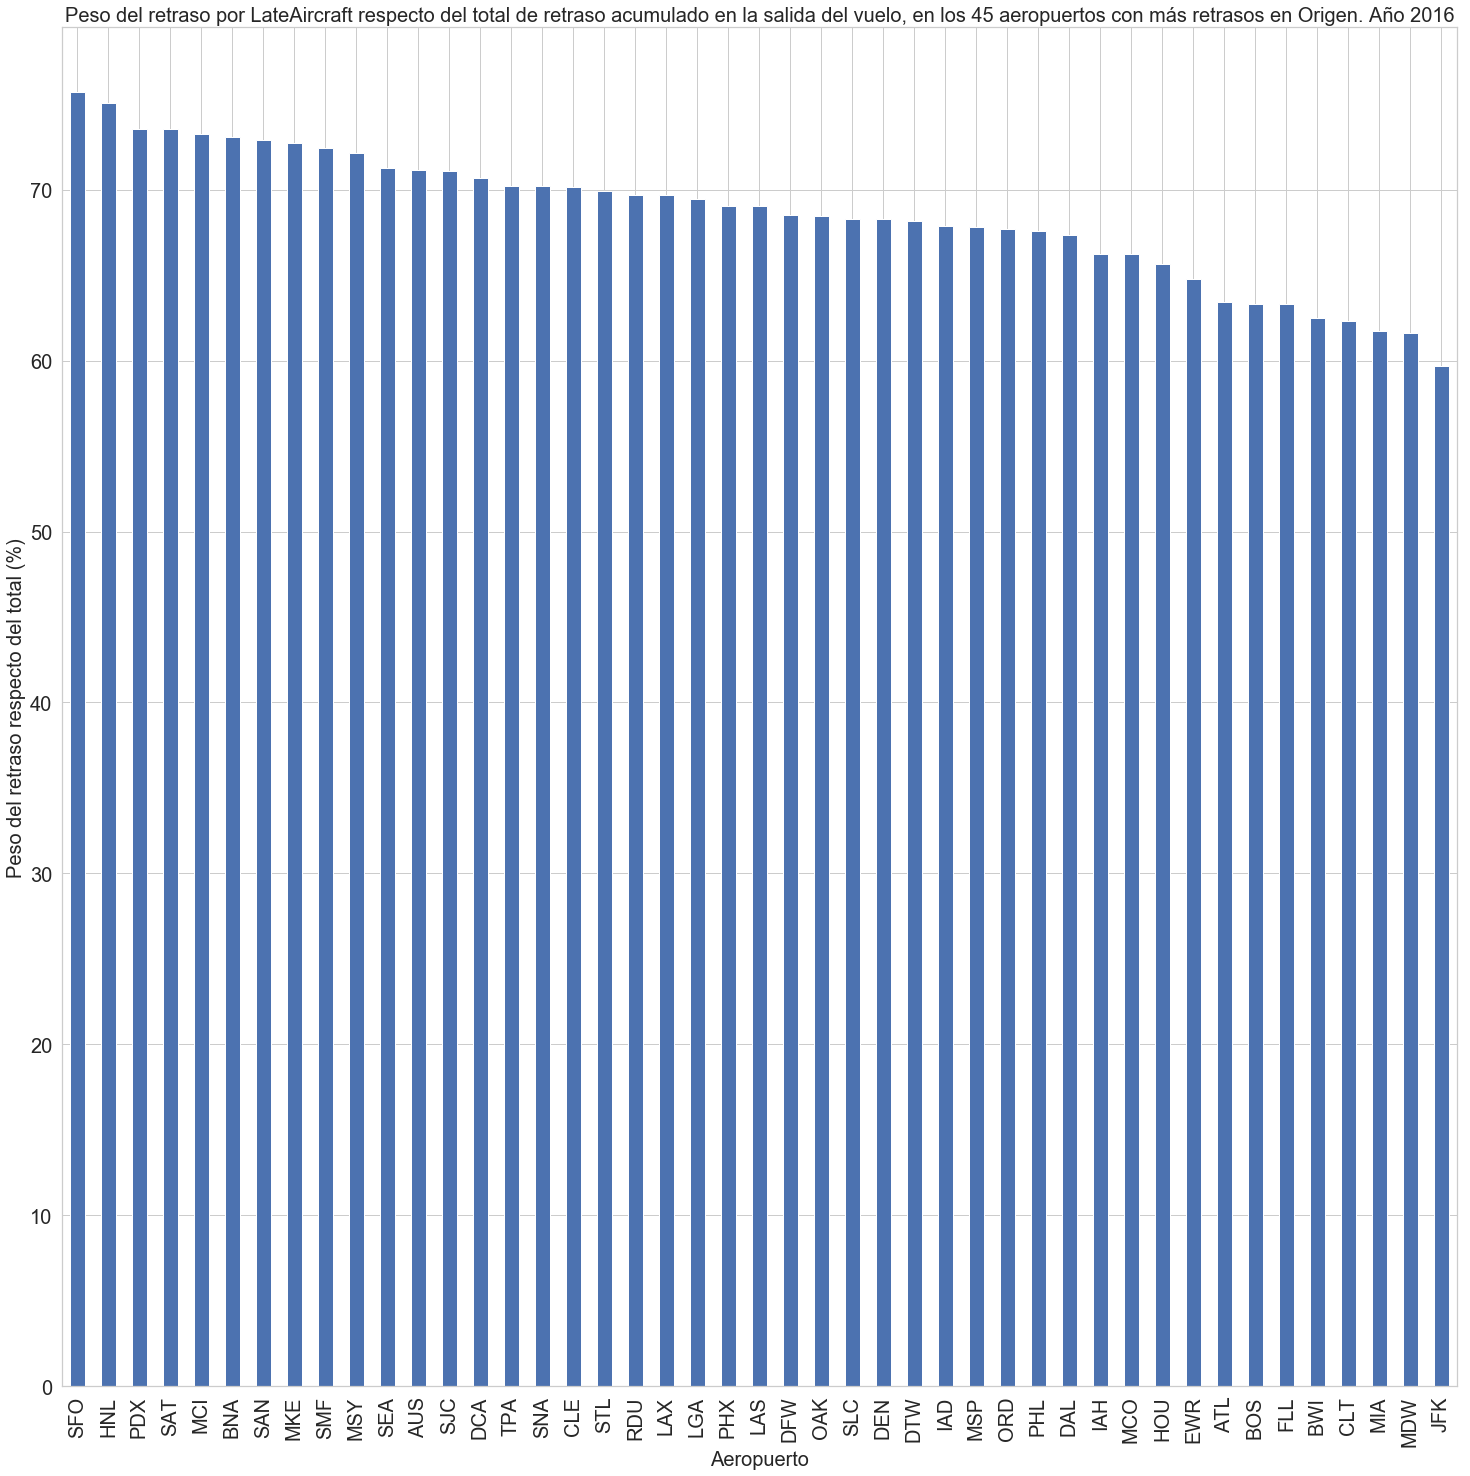

In [79]:
#mostramos  el peso del retraso de llegada tardía del vuelo anterior respecto del retraso total

ax = retrasoMedioEnSalidasPorLateAircraft.PesoRetraso.plot(kind='bar', figsize=(25,25), fontsize=20)
ax.set_xlabel("Aeropuerto", fontsize=20)
ax.set_ylabel("Peso del retraso respecto del total (%)", fontsize=20)
ax.set_title('Peso del retraso por LateAircraft respecto del total de retraso acumulado en la salida del vuelo, en los 45 aeropuertos con más retrasos en Origen. Año ' + year, fontsize=20)

plt.show()

#### Aquellos vuelos retrasados que al menos lo están por la llegada tardía del vuelo anterior, tendrán otros motivos para llegar al 100% del peso relativo de la causa del retraso. Lo veremos más adelante.

In [80]:
#retrasos medios en salidas por aeropuerto causados por problemas de la aerolínea
retrasoMedioEnSalidasPorAerolinea = pd.DataFrame(retrasosSalidaEnAeropuertos[retrasosSalidaEnAeropuertos['CarrierDelay'] > 0])

#usamos la media 
retrasoMedioEnSalidasPorAerolinea = retrasoMedioEnSalidasPorAerolinea.groupby('Origin').aggregate({'Origin': 'count', 'DepDelay':'mean', 'CarrierDelay' : 'mean'})

#renombramos las columnas
retrasoMedioEnSalidasPorAerolinea = retrasoMedioEnSalidasPorAerolinea.rename(columns={'Origin': 'VuelosTotales', 'DepDelay': 'MediaRetrasoTotal', 'CarrierDelay' : 'MediaTiempoRetrasado'})

#ordenamos por aeropuertos con retraso por motivo de la aerolinea
retrasoMedioEnSalidasPorAerolinea = retrasoMedioEnSalidasPorAerolinea.sort_values(['MediaTiempoRetrasado'], ascending=False)

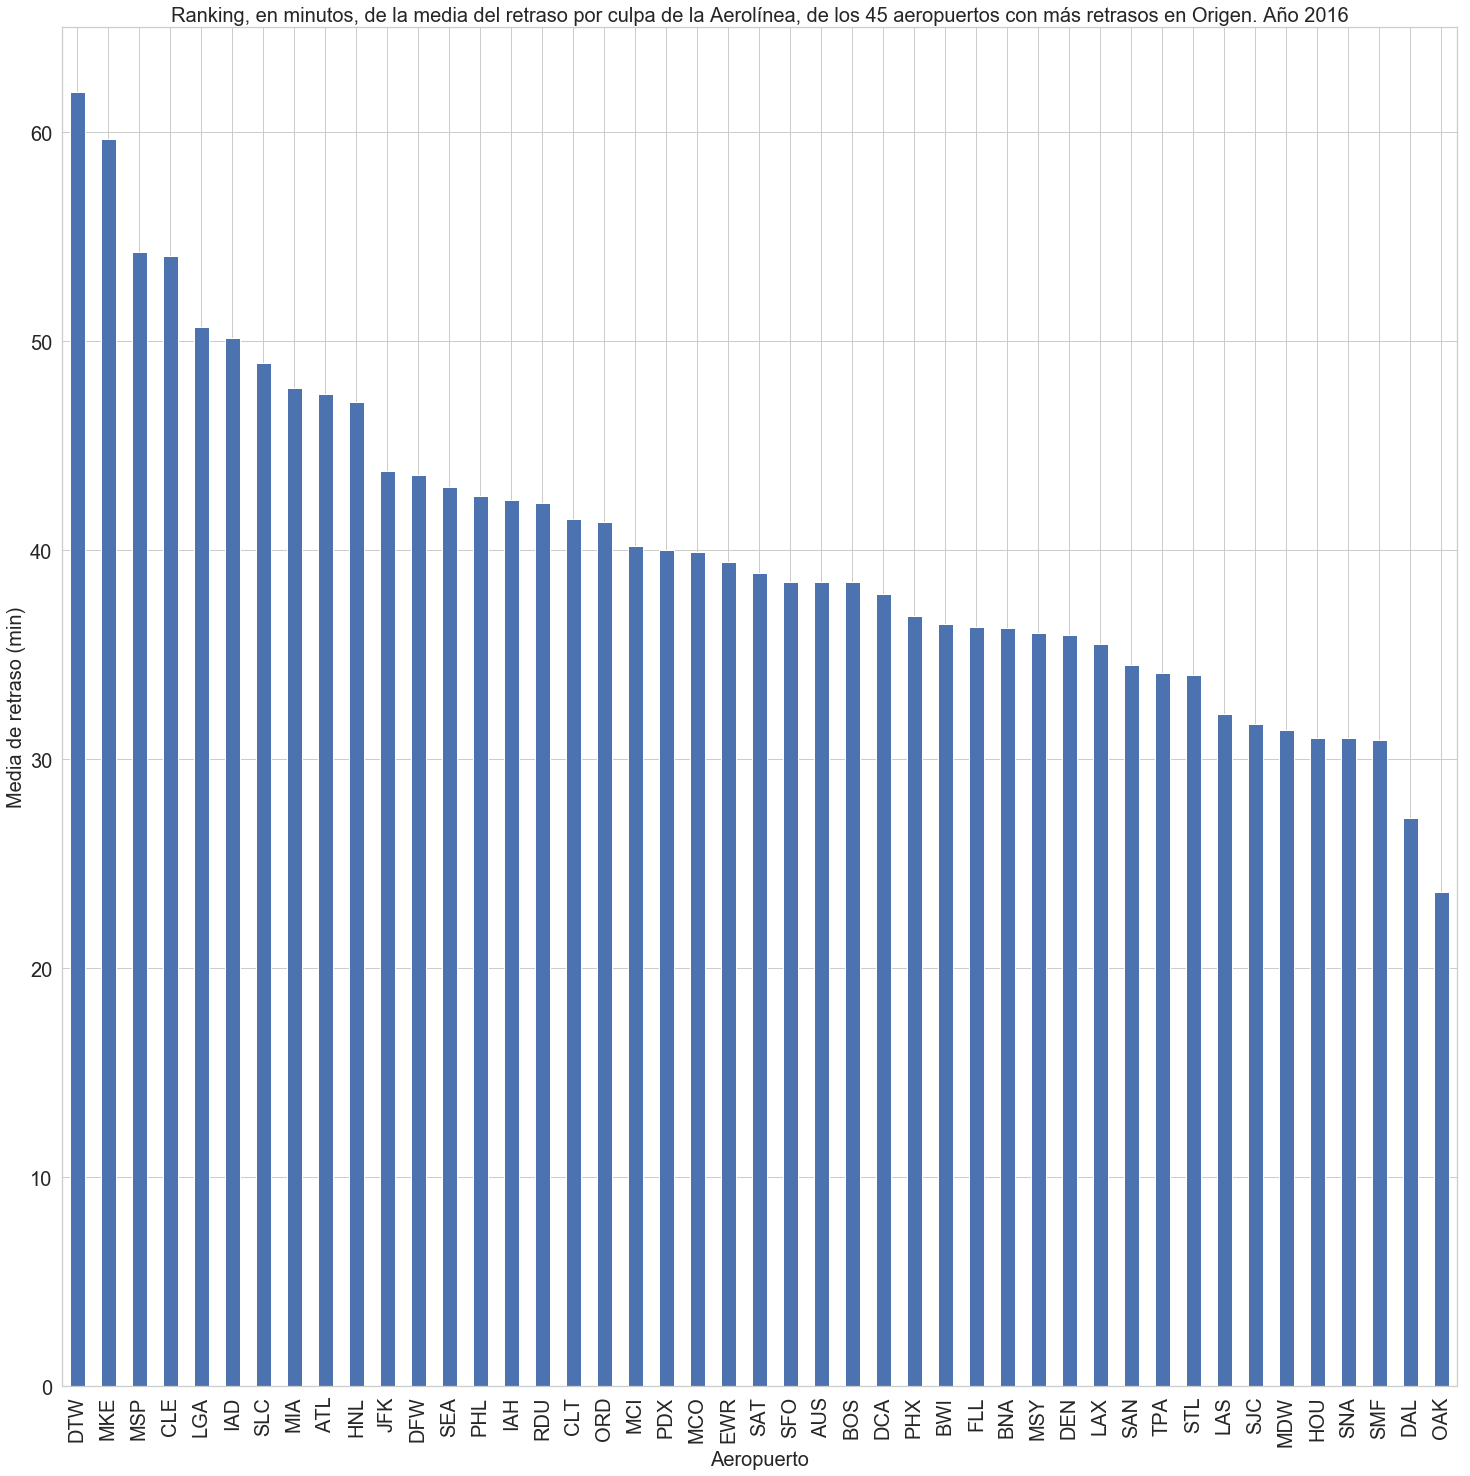

In [81]:
#mostramos la media de los retrasos por aeropuerto, ordenados, de los 45 aeropuertos con más retrasos

ax = retrasoMedioEnSalidasPorAerolinea.MediaTiempoRetrasado.plot(kind='bar', figsize=(25,25), fontsize=20)

ax.set_xlabel("Aeropuerto", fontsize=20)
ax.set_ylabel("Media de retraso (min)", fontsize=20)
ax.set_title('Ranking, en minutos, de la media del retraso por culpa de la Aerolínea, de los 45 aeropuertos con más retrasos en Origen. Año ' + year, fontsize=20)
plt.show()

In [82]:
#mostramos el peso del retraso por la aerolínea respecto al retraso total de la salida 
#(es decir por si tuvo otros factores)

retrasoMedioEnSalidasPorAerolinea['PesoRetraso'] = (retrasoMedioEnSalidasPorAerolinea['MediaTiempoRetrasado'] / retrasoMedioEnSalidasPorAerolinea['MediaRetrasoTotal'])*100

#ordenamos por de mayor a menor peso
retrasoMedioEnSalidasPorAerolinea = retrasoMedioEnSalidasPorAerolinea.sort_values(['PesoRetraso'], ascending=False)


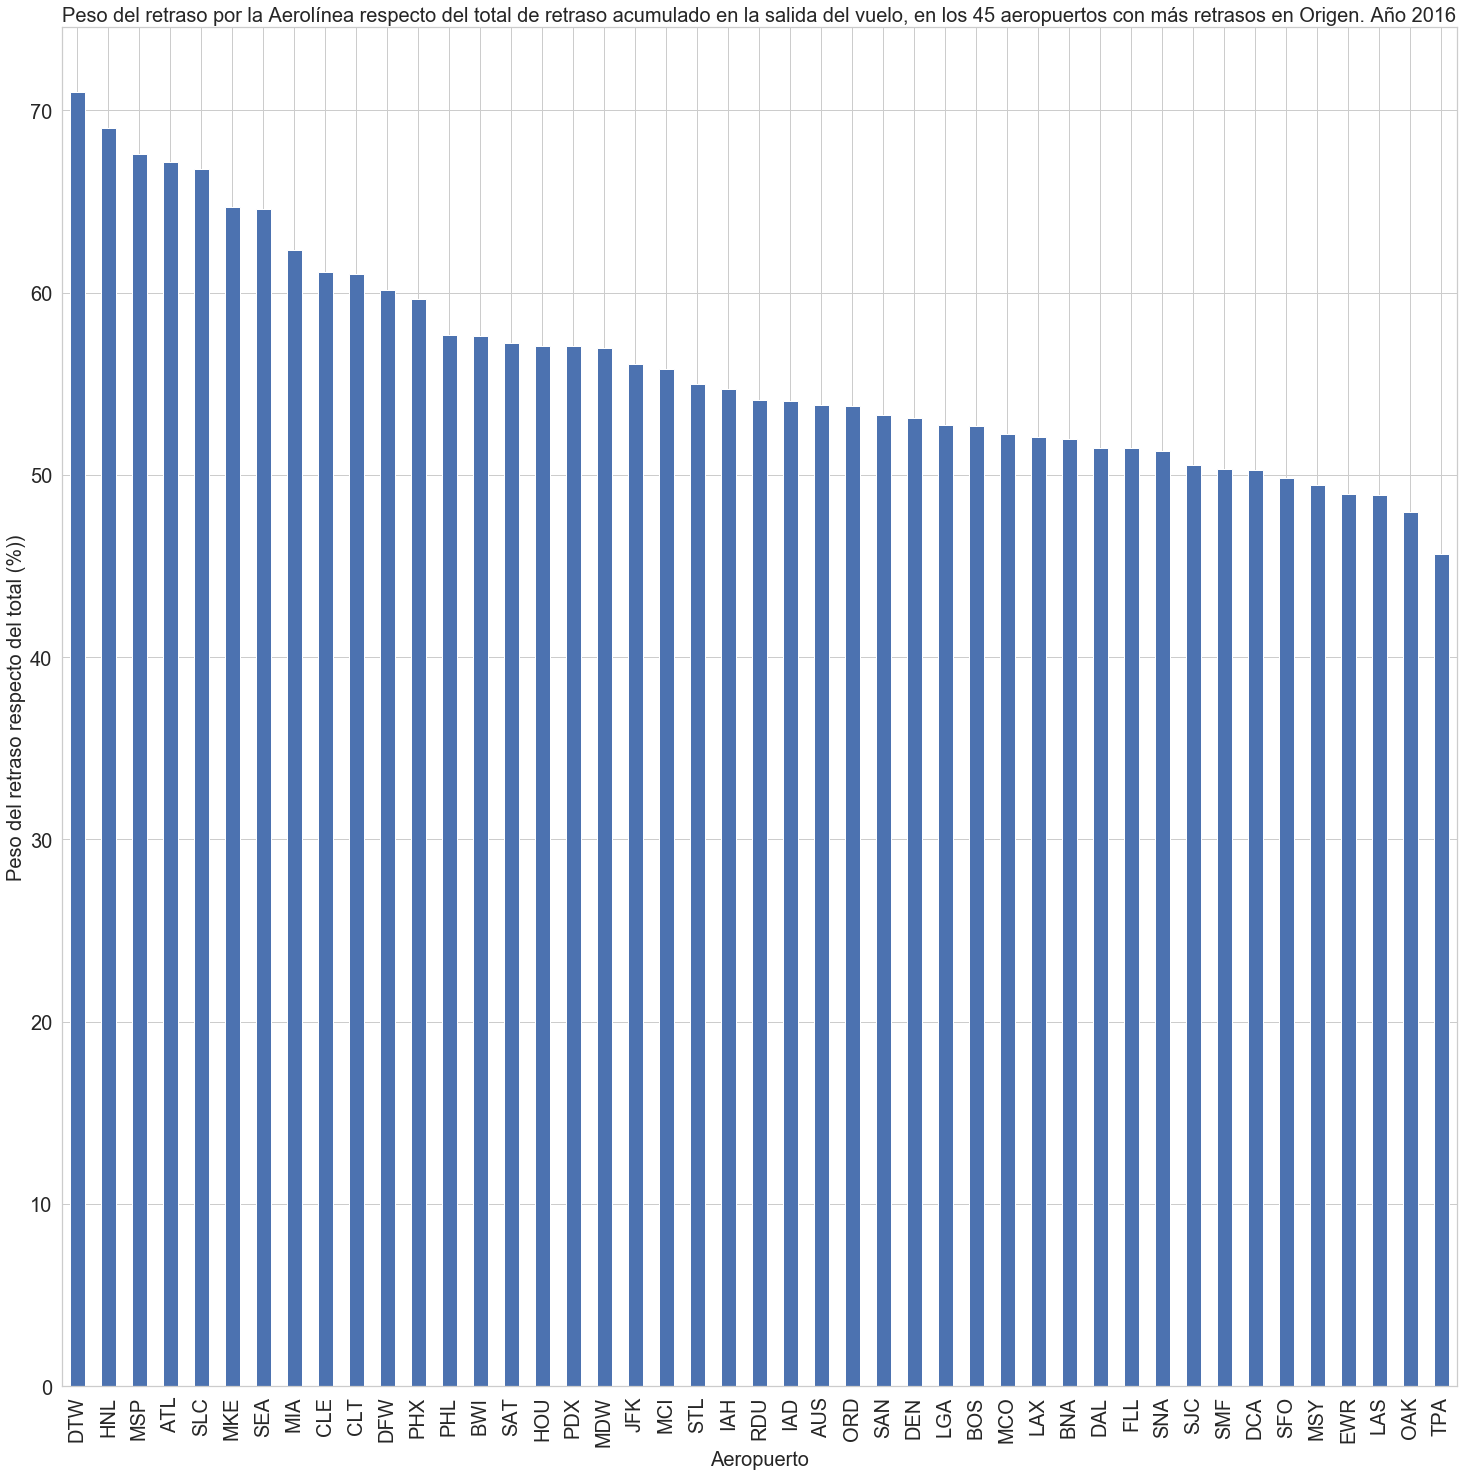

In [83]:
#mostramos el peso del retraso de la aerolínea respecto del retraso total

ax = retrasoMedioEnSalidasPorAerolinea.PesoRetraso.plot(kind='bar',
                                figsize=(25,25), fontsize=20)
ax.set_xlabel("Aeropuerto", fontsize=20)
ax.set_ylabel("Peso del retraso respecto del total (%))", fontsize=20)
ax.set_title('Peso del retraso por la Aerolínea respecto del total de retraso acumulado en la salida del vuelo, en los 45 aeropuertos con más retrasos en Origen. Año ' + year, fontsize=20)
plt.show()

#### Aquellos vuelos retrasados que al menos lo están por la aerolínea, tendrán otros motivos para llegar al 100% del peso relativo de la causa del retraso. Lo veremos más adelante.

#### Vamos a coger las 3 combinaciones posibles para tratar de afinar más los motivos de retrasos en salidas
1. Que tenga retraso tanto por Aerolínea como por llegada tardía del avión
2. Que tenga retraso sólo por llegada tardía del avión
3. Que tengra retraso sólo por aerolínea

In [84]:
#primero cogemos todos los retrasos, sean cual sea el tipo en salidas
retrasosSalidaEnAeropuertos = pd.DataFrame(dfanual[dfanual['DepDel15'] == 1])
#nos quedamos con los 45 aeropuertos con más retrasos
retrasosSalidaEnAeropuertos= retrasosSalidaEnAeropuertos.loc[(retrasosSalidaEnAeropuertos["Origin"].isin(aeropuertos))]


In [85]:
retrasosSalidaEnAeropuertos.shape

(797687, 112)

In [86]:
#ahora cogemos las 3 combinaciones

#ambos tipos de retrasos
retrasosSalidaEnAeropuertosLateAndAirline = pd.DataFrame(dfanual[(dfanual['DepDel15'] == 1) & (dfanual['CarrierDelay'] > 0) & (dfanual['LateAircraftDelay'] > 0)])

#retraso por llegada tardía del avión anterior
retrasosSalidaSoloLateAircraft = pd.DataFrame(dfanual[(dfanual['DepDel15'] == 1) & (dfanual['CarrierDelay'] == 0) & (dfanual['LateAircraftDelay'] > 0)])

#retraso por la aerolínea
retrasosSalidaSoloAirline = pd.DataFrame(dfanual[(dfanual['DepDel15'] == 1) & (dfanual['CarrierDelay'] > 0) & (dfanual['LateAircraftDelay'] == 0)])


In [87]:
#nos quedamos con los retrasos de los 45 primeros aeropuertos (por número de retrasos)

retrasosSalidaEnAeropuertosLateAndAirline= retrasosSalidaEnAeropuertosLateAndAirline.loc[(retrasosSalidaEnAeropuertosLateAndAirline["Origin"].isin(aeropuertos))]
retrasosSalidaSoloLateAircraft= retrasosSalidaSoloLateAircraft.loc[(retrasosSalidaSoloLateAircraft["Origin"].isin(aeropuertos))]
retrasosSalidaSoloAirline= retrasosSalidaSoloAirline.loc[(retrasosSalidaSoloAirline["Origin"].isin(aeropuertos))]


In [88]:
retrasosSalidaEnAeropuertosLateAndAirline.shape

(205606, 112)

In [89]:
retrasosSalidaSoloLateAircraft.shape

(175236, 112)

In [90]:
retrasosSalidaSoloAirline.shape

(174081, 112)

In [91]:
#podríamos inferir los de meteo en salidas si:
#el retraso de llegadas es menor o igual que al de salida y el conteo de meteo = al de salida

retrasosSalidaSoloMeteo = pd.DataFrame(dfanual[(dfanual['DepDel15'] == 1) & (dfanual['DepDelay'] >= dfanual['ArrDelay']) & (dfanual['WeatherDelay'] == dfanual['DepDelay'])])

In [92]:
retrasosSalidaSoloMeteo= retrasosSalidaSoloMeteo.loc[(retrasosSalidaSoloMeteo["Origin"].isin(aeropuertos))]

In [93]:
retrasosSalidaSoloMeteo.shape

(483, 112)

In [94]:
retrasosSalidaSoloNAS = pd.DataFrame(dfanual[(dfanual['DepDel15'] == 1) & (dfanual['DepDelay'] >= dfanual['ArrDelay']) & (dfanual['NASDelay'] == dfanual['DepDelay'])])

In [95]:
retrasosSalidaSoloNAS= retrasosSalidaSoloNAS.loc[(retrasosSalidaSoloNAS["Origin"].isin(aeropuertos))]

In [96]:
retrasosSalidaSoloNAS.shape

(1589, 112)

In [97]:
retrasosSalidaSoloSecurity = pd.DataFrame(dfanual[(dfanual['DepDel15'] == 1) & (dfanual['DepDelay'] >= dfanual['ArrDelay']) & (dfanual['SecurityDelay'] == dfanual['DepDelay'])])

In [98]:
retrasosSalidaSoloSecurity = retrasosSalidaSoloSecurity.loc[(retrasosSalidaSoloSecurity["Origin"].isin(aeropuertos))]

In [99]:
retrasosSalidaSoloSecurity.shape

(44, 112)

In [100]:
retrasosSalidaSoloLateAircraft2 = pd.DataFrame(dfanual[(dfanual['DepDel15'] == 1) & (dfanual['DepDelay'] >= dfanual['ArrDelay']) & (dfanual['LateAircraftDelay'] == dfanual['DepDelay'])])

In [101]:
retrasosSalidaSoloLateAircraft2 = retrasosSalidaSoloLateAircraft2.loc[(retrasosSalidaSoloLateAircraft2["Origin"].isin(aeropuertos))]

In [102]:
retrasosSalidaSoloLateAircraft2.shape

(4640, 112)

In [103]:
retrasosSalidaSoloAerolinea2 = pd.DataFrame(dfanual[(dfanual['DepDel15'] == 1) & (dfanual['DepDelay'] >= dfanual['ArrDelay']) & (dfanual['CarrierDelay'] == dfanual['DepDelay'])])

retrasosSalidaSoloAerolinea2 = retrasosSalidaSoloAerolinea2.loc[(retrasosSalidaSoloAerolinea2["Origin"].isin(aeropuertos))]

retrasosSalidaSoloAerolinea2.shape

(5467, 112)

### 1.3.3.2 Análisis de qué ocurre en el Aeropuerto de Destino si en Origen hay retrasos

#### Vuelos retrasados de salida que llegan con el mismo retraso a la llegada

In [104]:
retrasosSalidaIgualLlegada = pd.DataFrame(dfanual[(dfanual['DepDel15'] == 1) & (dfanual['DepDelay'] >= dfanual['ArrDelay'])])

In [105]:
retrasosSalidaIgualLlegada = retrasosSalidaIgualLlegada.loc[(retrasosSalidaIgualLlegada["Origin"].isin(aeropuertos))]


#### Vuelos de salida que aumentan su retraso en la llegada (por motivos adicionales a la salida)

In [106]:
retrasosPosterioresSalida = pd.DataFrame(dfanual[(dfanual['DepDel15'] == 1) & (dfanual['DepDelay'] < dfanual['ArrDelay'])])

retrasosPosterioresSalida = retrasosPosterioresSalida.loc[(retrasosPosterioresSalida["Origin"].isin(aeropuertos))]


#### Vuelos de salida con retraso que recuperan todo el retraso a la llegada

In [107]:
retrasosRecuperados = pd.DataFrame(dfanual[(dfanual['DepDel15'] == 1) & (dfanual['ArrDelay'] <= 0)])

retrasosRecuperados = retrasosRecuperados.loc[(retrasosRecuperados["Origin"].isin(aeropuertos))]


In [108]:
recupera = retrasosRecuperados.shape[0]
igual = retrasosSalidaIgualLlegada.shape[0]
masTarde = retrasosPosterioresSalida.shape[0]

Text(0.5, 1.0, 'Capacidad de recuperación del retraso en destino por retraso en origen')

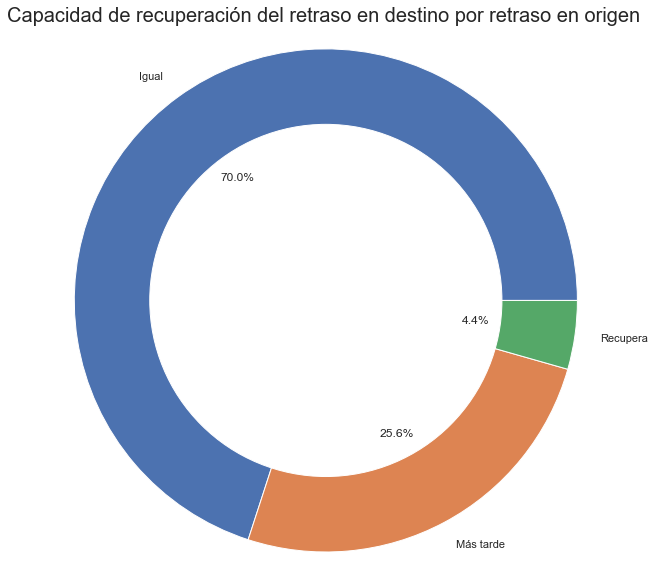

In [109]:
plt.figure(figsize=(10, 10))
etiquetas_1 = ['Igual', 'Más tarde', 'Recupera']
datos = [igual,masTarde, recupera]

plt.pie(datos, labels=etiquetas_1, autopct='%1.1f%%')
centre_circle_1 = plt.Circle((0, 0), 0.7, fc='white')
fig_1 = plt.gcf()
fig_1.gca().add_artist(centre_circle_1)
plt.axis('equal')
plt.title('Capacidad de recuperación del retraso en destino por retraso en origen', fontsize=20)

### 1.3.3.3 Visualización retrasos en Destino con duración similar al Origen

In [110]:
#cálculo de los que no recuperan tiempo a la llegada, pero no llegan más tarde, visto por aeropuerto origen, 
#por aerolínea y por distancia del vuelo

retrasosSalidaIgualLlegadaPorAeropuertoOrigen = pd.DataFrame(retrasosSalidaIgualLlegada.groupby('Origin').aggregate({'Origin': 'count', 'DepDelay':'mean'}))

retrasosSalidaIgualLlegadaPorAeropuertoOrigen = retrasosSalidaIgualLlegadaPorAeropuertoOrigen.rename(columns={'Origin': 'VuelosTotales', 'DepDelay': 'MediaRetrasoTotal'})

retrasosSalidaIgualLlegadaPorAeropuertoDestino = pd.DataFrame(retrasosSalidaIgualLlegada.groupby('Dest').aggregate({'Dest': 'count', 'DepDelay':'mean'}))

retrasosSalidaIgualLlegadaPorAeropuertoDestino = retrasosSalidaIgualLlegadaPorAeropuertoDestino.rename(columns={'Dest': 'VuelosTotales', 'DepDelay': 'MediaRetrasoTotal'})

retrasosSalidaIgualLlegadaPorAerolinea = pd.DataFrame(retrasosSalidaIgualLlegada.groupby('IATA_CODE_Reporting_Airline').aggregate({'IATA_CODE_Reporting_Airline': 'count', 'DepDelay':'mean'}))

retrasosSalidaIgualLlegadaPorAerolinea = retrasosSalidaIgualLlegadaPorAerolinea.rename(columns={'IATA_CODE_Reporting_Airline': 'VuelosTotales', 'DepDelay': 'MediaRetrasoTotal'})

retrasosSalidaIgualLlegadaPorDistanciaADestino = pd.DataFrame(retrasosSalidaIgualLlegada.groupby('DistanceGroup').aggregate({'DistanceGroup': 'count', 'DepDelay':'mean'}))

retrasosSalidaIgualLlegadaPorDistanciaADestino = retrasosSalidaIgualLlegadaPorDistanciaADestino.rename(columns={'DistanceGroup': 'VuelosTotales', 'DepDelay': 'MediaRetrasoTotal'})


In [111]:
#ordenamos por de mayor a menor retraso
retrasosSalidaIgualLlegadaPorAeropuertoOrigen = retrasosSalidaIgualLlegadaPorAeropuertoOrigen.sort_values(['MediaRetrasoTotal'], ascending=False)

retrasosSalidaIgualLlegadaPorAeropuertoDestino = retrasosSalidaIgualLlegadaPorAeropuertoDestino.sort_values(['MediaRetrasoTotal'], ascending=False)

retrasosSalidaIgualLlegadaPorAerolinea = retrasosSalidaIgualLlegadaPorAerolinea.sort_values(['MediaRetrasoTotal'], ascending=False)


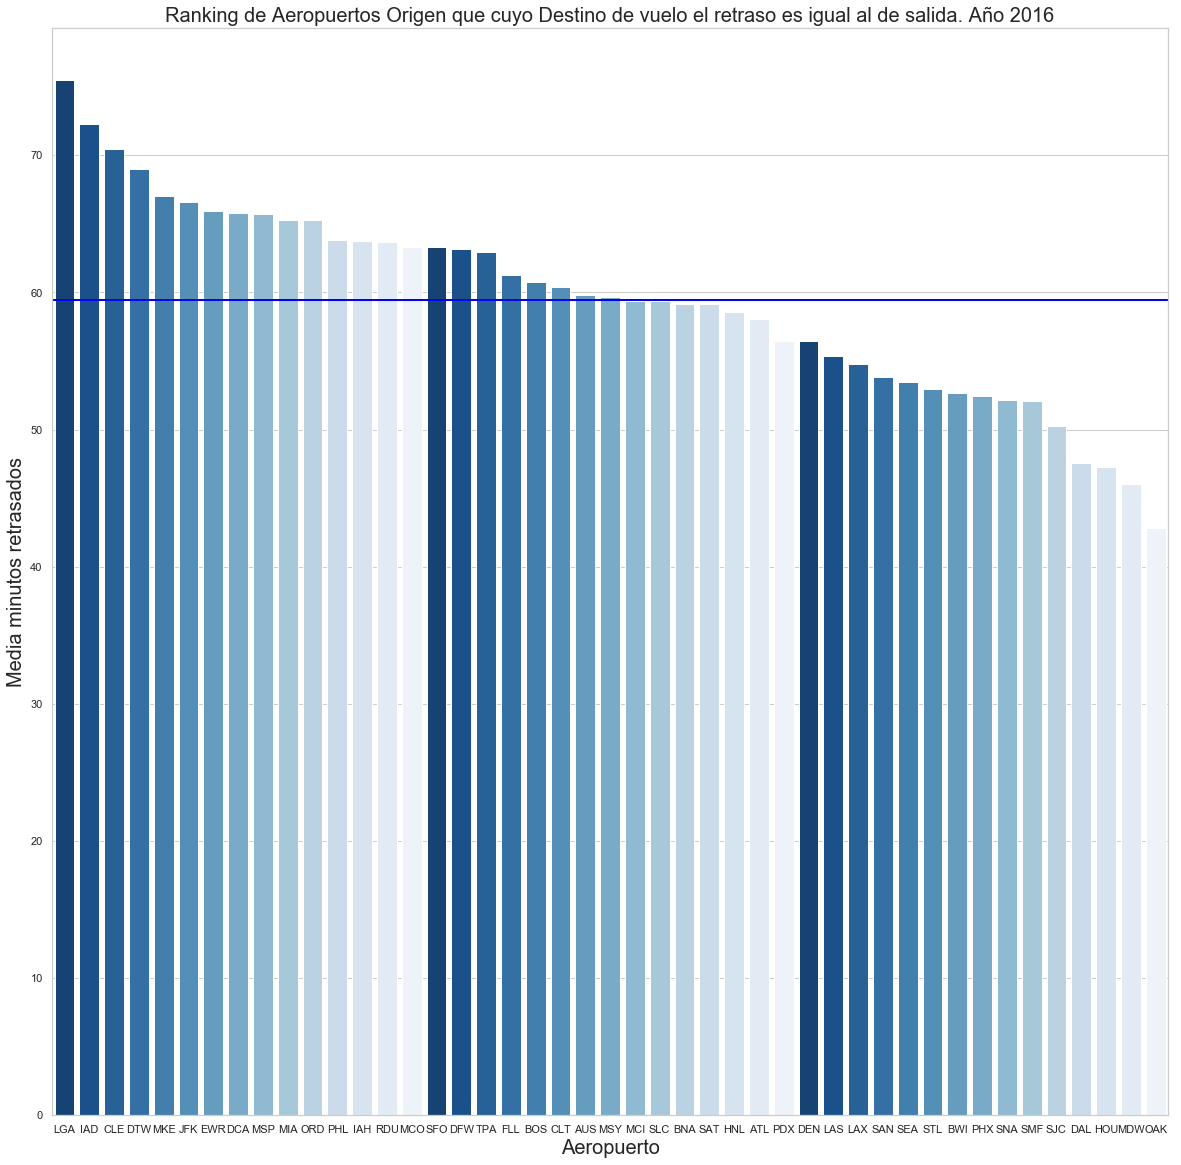

In [112]:
#Ranking de Aeropuertos Origen que cuyo Destino de vuelo el retraso es igual al de salida.

plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)

pal = sns.color_palette("Blues_r", 15)# len(retrasosSalidaIgualLlegadaPorAeropuertoOrigen))
ax = sns.barplot(x=retrasosSalidaIgualLlegadaPorAeropuertoOrigen.index, y=retrasosSalidaIgualLlegadaPorAeropuertoOrigen['MediaRetrasoTotal'], palette=pal)
ax.set_xlabel("Aeropuerto", fontsize=20)
ax.set_ylabel("Media minutos retrasados", fontsize=20)
ax.set_title('Ranking de Aeropuertos Origen que cuyo Destino de vuelo el retraso es igual al de salida. Año ' + year, fontsize=20)

plt.axhline(retrasosSalidaIgualLlegadaPorAeropuertoOrigen['MediaRetrasoTotal'].mean(), color='Blue', linewidth=2)

plt.show()

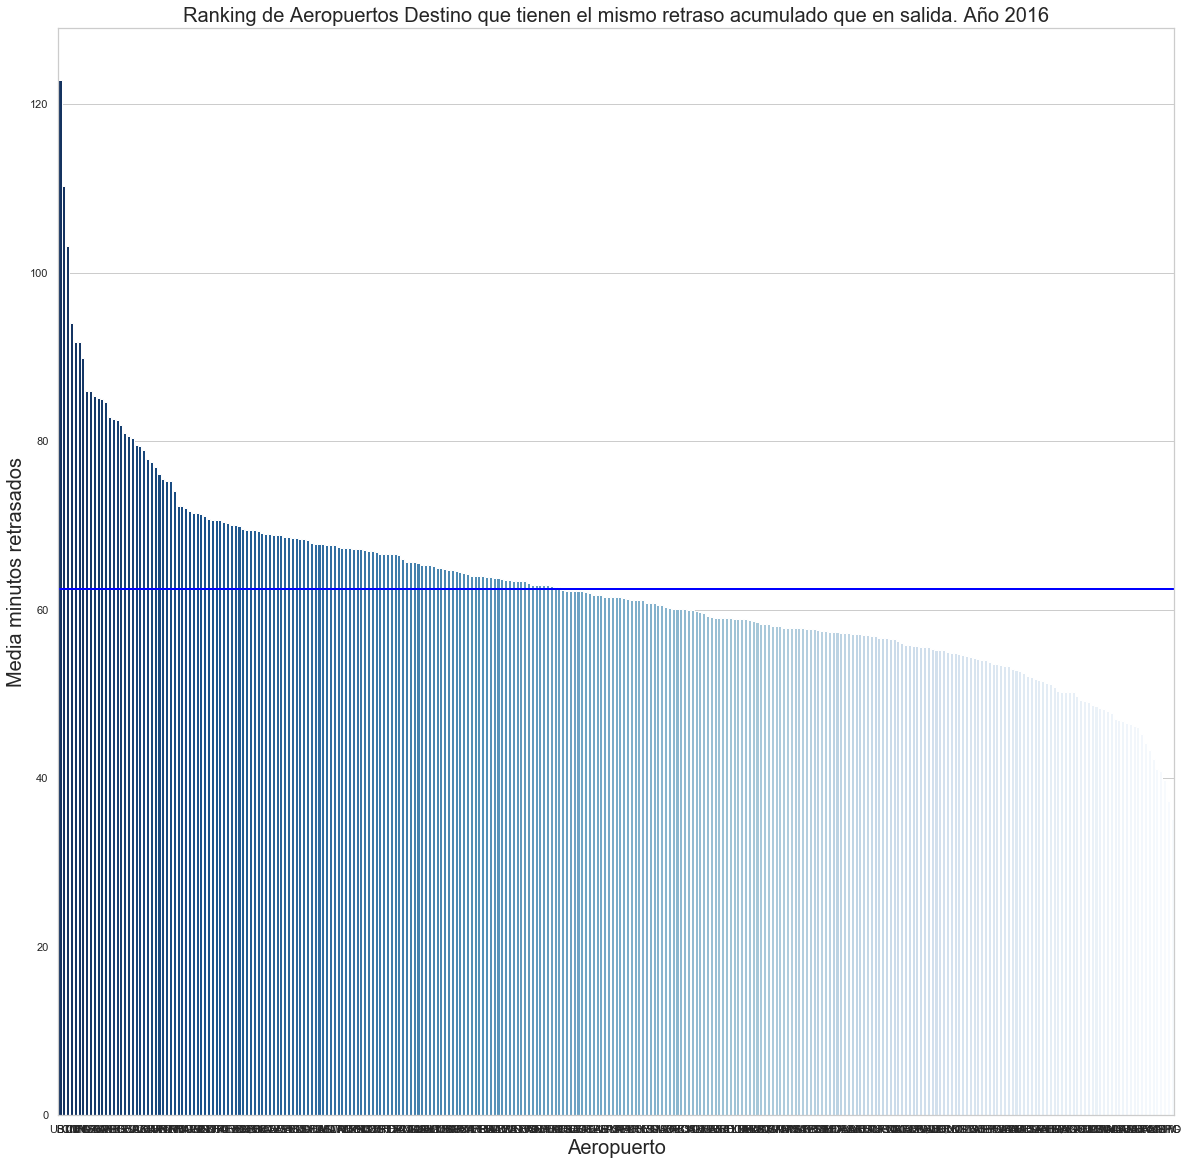

In [113]:
#Ranking de Aeropuertos Destino que tienen el mismo retraso acumulado que en salida

plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)

pal = sns.color_palette("Blues_r", len(retrasosSalidaIgualLlegadaPorAeropuertoDestino))
ax = sns.barplot(x=retrasosSalidaIgualLlegadaPorAeropuertoDestino.index, y=retrasosSalidaIgualLlegadaPorAeropuertoDestino['MediaRetrasoTotal'], palette=pal)
ax.set_xlabel("Aeropuerto", fontsize=20)
ax.set_ylabel("Media minutos retrasados", fontsize=20)
ax.set_title('Ranking de Aeropuertos Destino que tienen el mismo retraso acumulado que en salida. Año ' + year, fontsize=20)

plt.axhline(retrasosSalidaIgualLlegadaPorAeropuertoDestino['MediaRetrasoTotal'].mean(), color='Blue', linewidth=2)

plt.show()

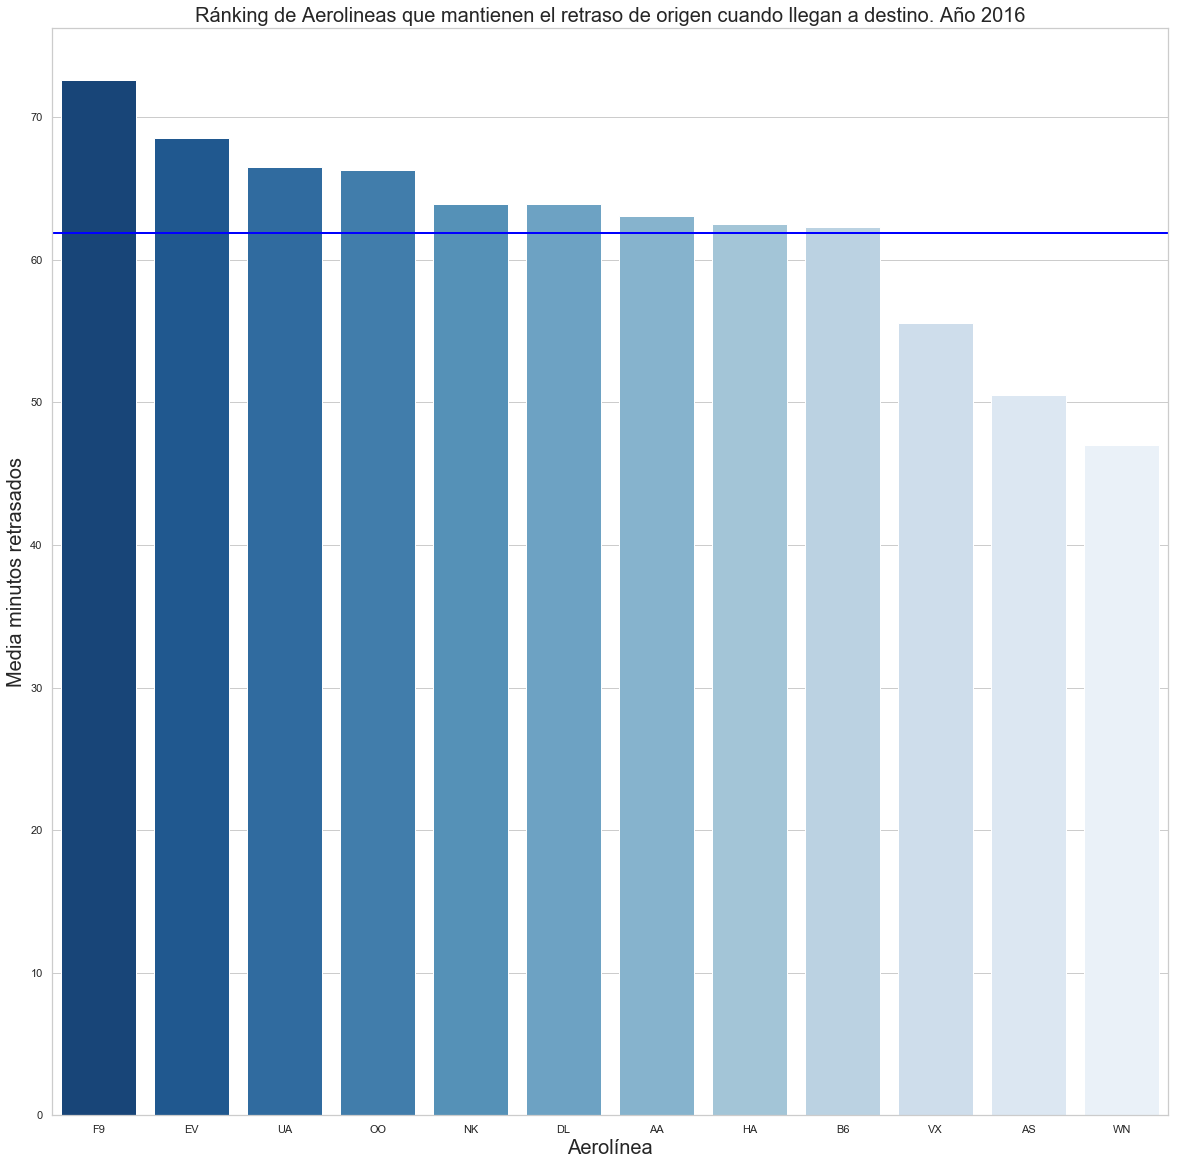

In [114]:
#Ránking de Aerolineas que mantienen el retraso de origen cuando llegan a destino

plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)

pal = sns.color_palette("Blues_r", len(retrasosSalidaIgualLlegadaPorAerolinea))
ax = sns.barplot(x=retrasosSalidaIgualLlegadaPorAerolinea.index, y=retrasosSalidaIgualLlegadaPorAerolinea['MediaRetrasoTotal'], palette=pal)
ax.set_xlabel("Aerolínea", fontsize=20)
ax.set_ylabel("Media minutos retrasados", fontsize=20)
ax.set_title('Ránking de Aerolineas que mantienen el retraso de origen cuando llegan a destino. Año ' + year, fontsize=20)

plt.axhline(retrasosSalidaIgualLlegadaPorAerolinea['MediaRetrasoTotal'].mean(), color='Blue', linewidth=2)

plt.show()

In [115]:
#el índice de este DataFrame contiene lo que había en DistanceGroups
#que son los rangos de distancias separados en 250 millas
#para las etiquetas del gráfico, en el eje x, lo convertimos a rangos reales para mejorar la comprensión

my_xticks = []
desde = 0
for index, row in retrasosSalidaIgualLlegadaPorDistanciaADestino.iterrows():
    hasta = index * 250
    my_xticks.append(str(desde) + '-' + str(hasta))
    desde = hasta
    
my_xticks

['0-250',
 '250-500',
 '500-750',
 '750-1000',
 '1000-1250',
 '1250-1500',
 '1500-1750',
 '1750-2000',
 '2000-2250',
 '2250-2500',
 '2500-2750']

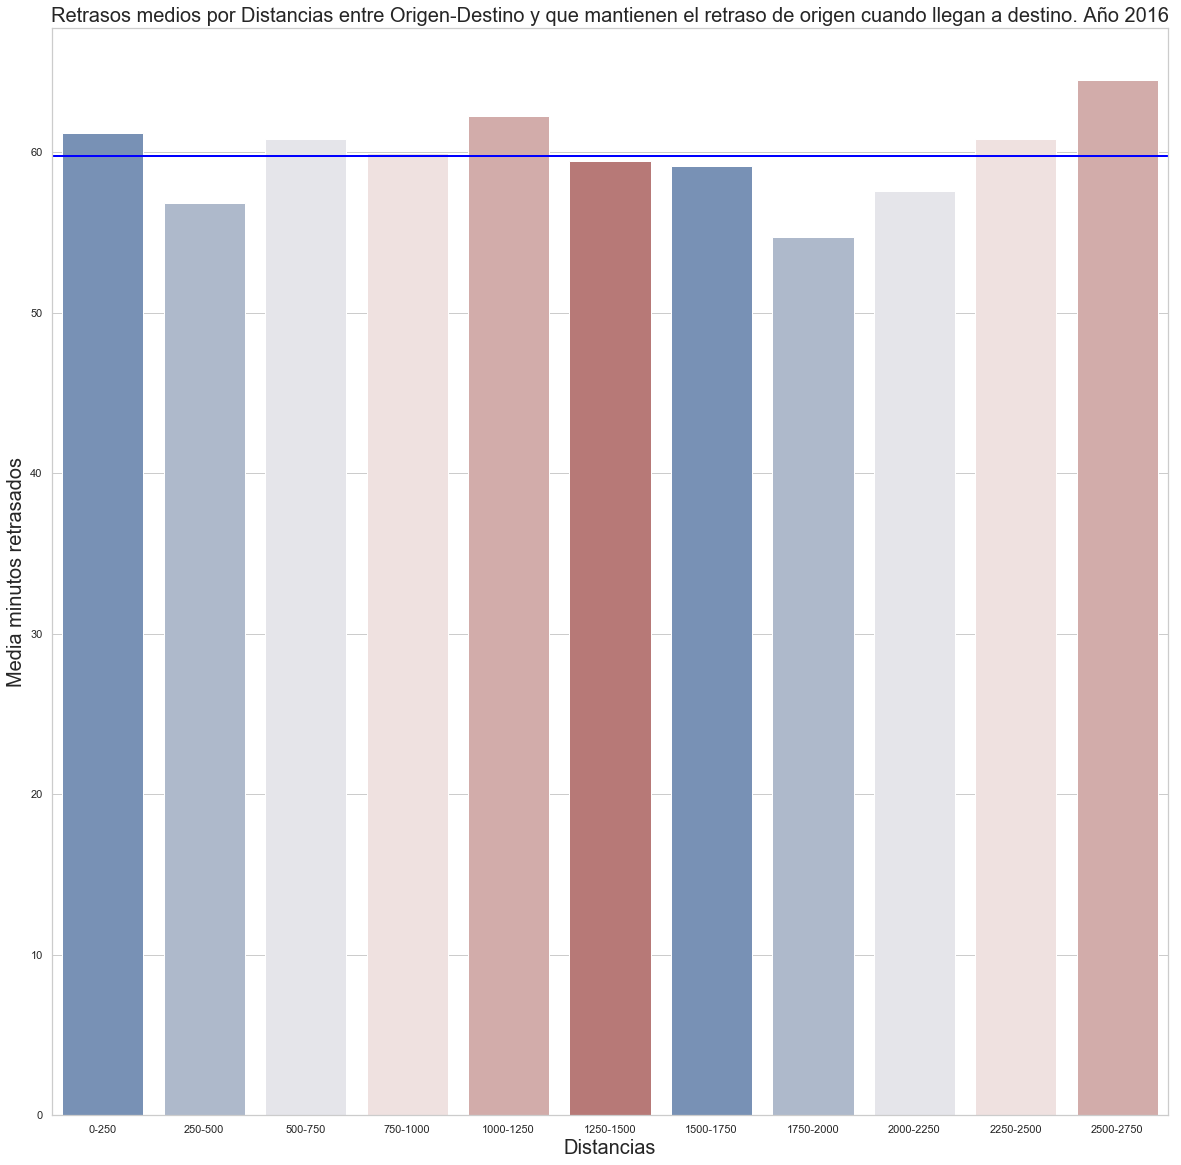

In [116]:
#Retrasos medios por Distancias entre Origen-Destino y que mantienen el retraso de origen cuando llegan a destino

plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=retrasosSalidaIgualLlegadaPorDistanciaADestino['MediaRetrasoTotal'], palette=pal)


ax.set_xlabel("Distancias", fontsize=20)
ax.set_ylabel("Media minutos retrasados", fontsize=20)
ax.set_title('Retrasos medios por Distancias entre Origen-Destino y que mantienen el retraso de origen cuando llegan a destino. Año ' + year, fontsize=20)

plt.axhline(retrasosSalidaIgualLlegadaPorDistanciaADestino['MediaRetrasoTotal'].mean(), color='Blue', linewidth=2)

plt.show()

### 1.3.3.4 Visualización de Retrasos en Destino que aumentan con respecto al de Origen

In [117]:
#cálculo de los que el retraso aumenta en Destino con respecto al retraso de Origen
#Visto por origen, destino, aerolínea y por distancia del vuelo

retrasosPosterioresSalidaPorAeropuertoOrigen = pd.DataFrame(retrasosPosterioresSalida.groupby('Origin').aggregate({'Origin': 'count', 'DepDelay':'mean'}))

retrasosPosterioresSalidaPorAeropuertoOrigen = retrasosPosterioresSalidaPorAeropuertoOrigen.rename(columns={'Origin': 'VuelosTotales', 'DepDelay': 'MediaRetrasoTotal'})

retrasosPosterioresSalidaPorAeropuertoDestino = pd.DataFrame(retrasosPosterioresSalida.groupby('Dest').aggregate({'Dest': 'count', 'DepDelay':'mean'}))

retrasosPosterioresSalidaPorAeropuertoDestino = retrasosPosterioresSalidaPorAeropuertoDestino.rename(columns={'Dest': 'VuelosTotales', 'DepDelay': 'MediaRetrasoTotal'})

retrasosPosterioresSalidaPorAerolinea = pd.DataFrame(retrasosPosterioresSalida.groupby('IATA_CODE_Reporting_Airline').aggregate({'IATA_CODE_Reporting_Airline': 'count', 'DepDelay':'mean'}))

retrasosPosterioresSalidaPorAerolinea = retrasosPosterioresSalidaPorAerolinea.rename(columns={'IATA_CODE_Reporting_Airline': 'VuelosTotales', 'DepDelay': 'MediaRetrasoTotal'})

retrasosPosterioresSalidaPorDistanciaADestino = pd.DataFrame(retrasosPosterioresSalida.groupby('DistanceGroup').aggregate({'DistanceGroup': 'count', 'DepDelay':'mean'}))

retrasosPosterioresSalidaPorDistanciaADestino = retrasosPosterioresSalidaPorDistanciaADestino.rename(columns={'DistanceGroup': 'VuelosTotales', 'DepDelay': 'MediaRetrasoTotal'})



In [118]:
#ordenamos por de mayor a menor retraso
retrasosPosterioresSalidaPorAeropuertoOrigen = retrasosPosterioresSalidaPorAeropuertoOrigen.sort_values(['MediaRetrasoTotal'], ascending=False)

retrasosPosterioresSalidaPorAeropuertoDestino = retrasosPosterioresSalidaPorAeropuertoDestino.sort_values(['MediaRetrasoTotal'], ascending=False)

retrasosPosterioresSalidaPorAerolinea = retrasosPosterioresSalidaPorAerolinea.sort_values(['MediaRetrasoTotal'], ascending=False)


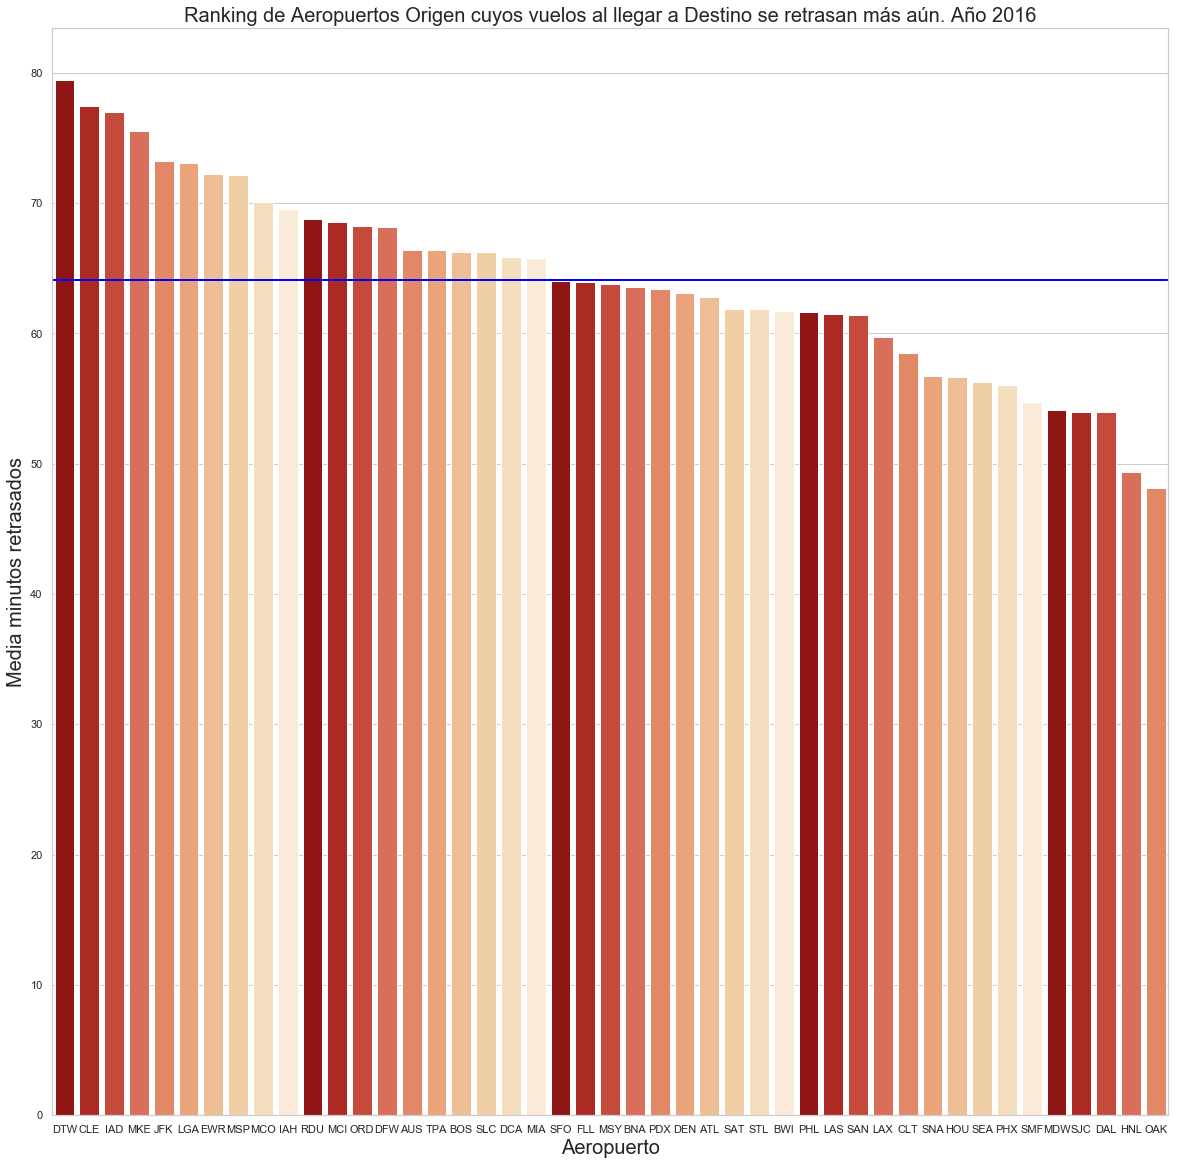

In [119]:
#Ranking de Aeropuertos Origen cuyos vuelos al llegar a Destino se retrasan más aún

plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)

pal = sns.color_palette("OrRd_r", 10) #len(retrasosPosterioresSalidaPorAeropuertoOrigen))
ax = sns.barplot(x=retrasosPosterioresSalidaPorAeropuertoOrigen.index, y=retrasosPosterioresSalidaPorAeropuertoOrigen['MediaRetrasoTotal'], palette=pal)
ax.set_xlabel("Aeropuerto", fontsize=20)
ax.set_ylabel("Media minutos retrasados", fontsize=20)
ax.set_title('Ranking de Aeropuertos Origen cuyos vuelos al llegar a Destino se retrasan más aún. Año ' + year, fontsize=20)

plt.axhline(retrasosPosterioresSalidaPorAeropuertoOrigen['MediaRetrasoTotal'].mean(), color='Blue', linewidth=2)

plt.show()

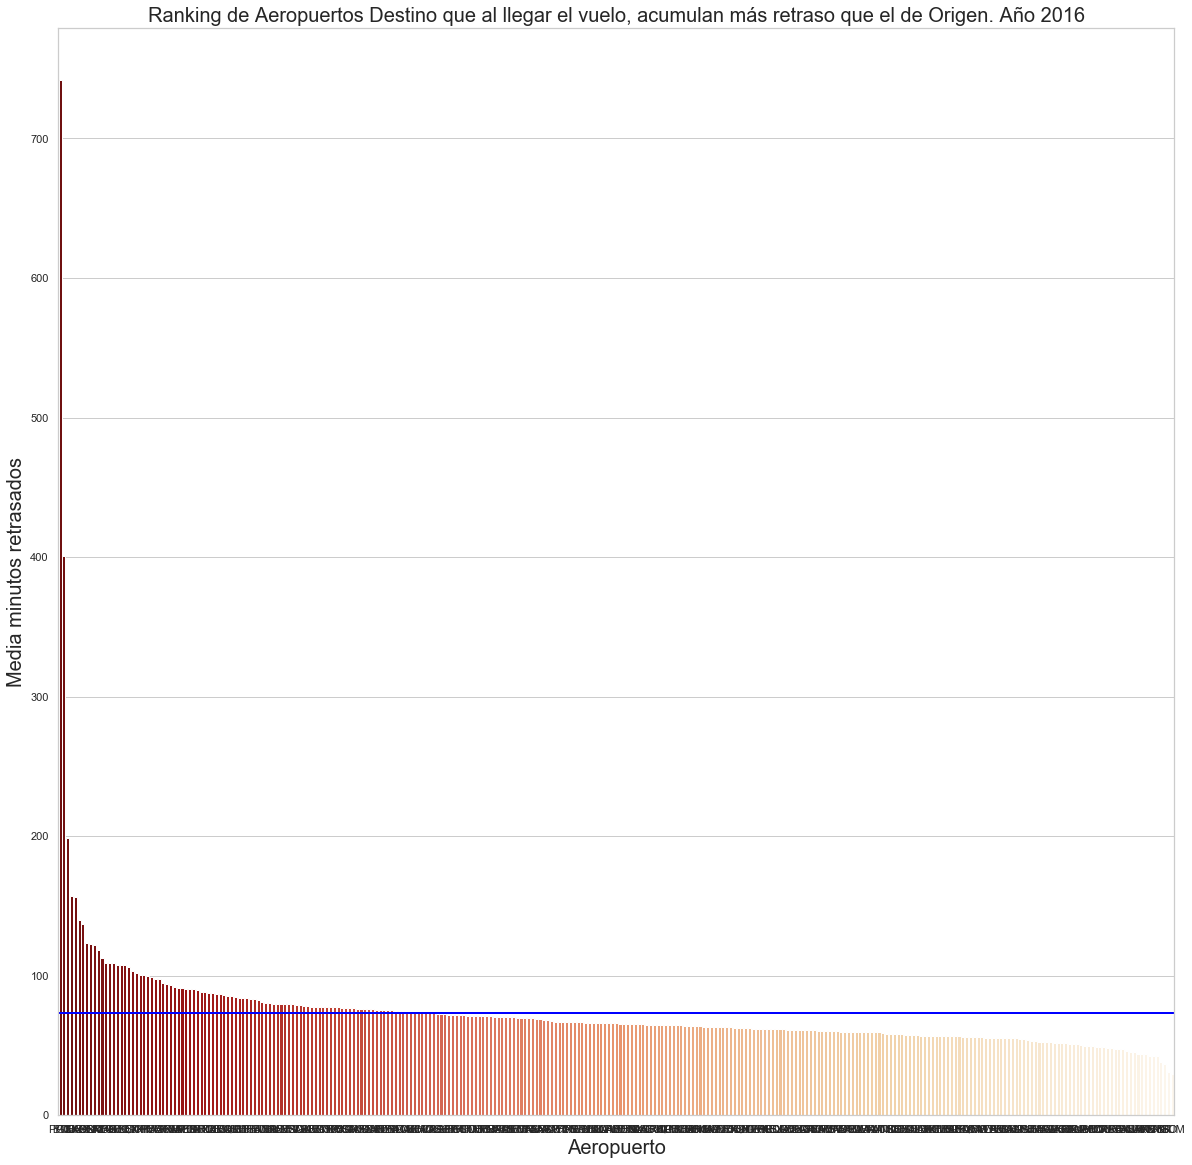

In [120]:
#Ranking de Aeropuertos Destino que al llegar el vuelo, acumulan más retraso que el de Origen.

plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)

pal = sns.color_palette("OrRd_r", len(retrasosPosterioresSalidaPorAeropuertoDestino))
ax = sns.barplot(x=retrasosPosterioresSalidaPorAeropuertoDestino.index, y=retrasosPosterioresSalidaPorAeropuertoDestino['MediaRetrasoTotal'], palette=pal)
ax.set_xlabel("Aeropuerto", fontsize=20)
ax.set_ylabel("Media minutos retrasados", fontsize=20)
ax.set_title('Ranking de Aeropuertos Destino que al llegar el vuelo, acumulan más retraso que el de Origen. Año ' + year, fontsize=20)


plt.axhline(retrasosPosterioresSalidaPorAeropuertoDestino['MediaRetrasoTotal'].mean(), color='Blue', linewidth=2)

plt.show()

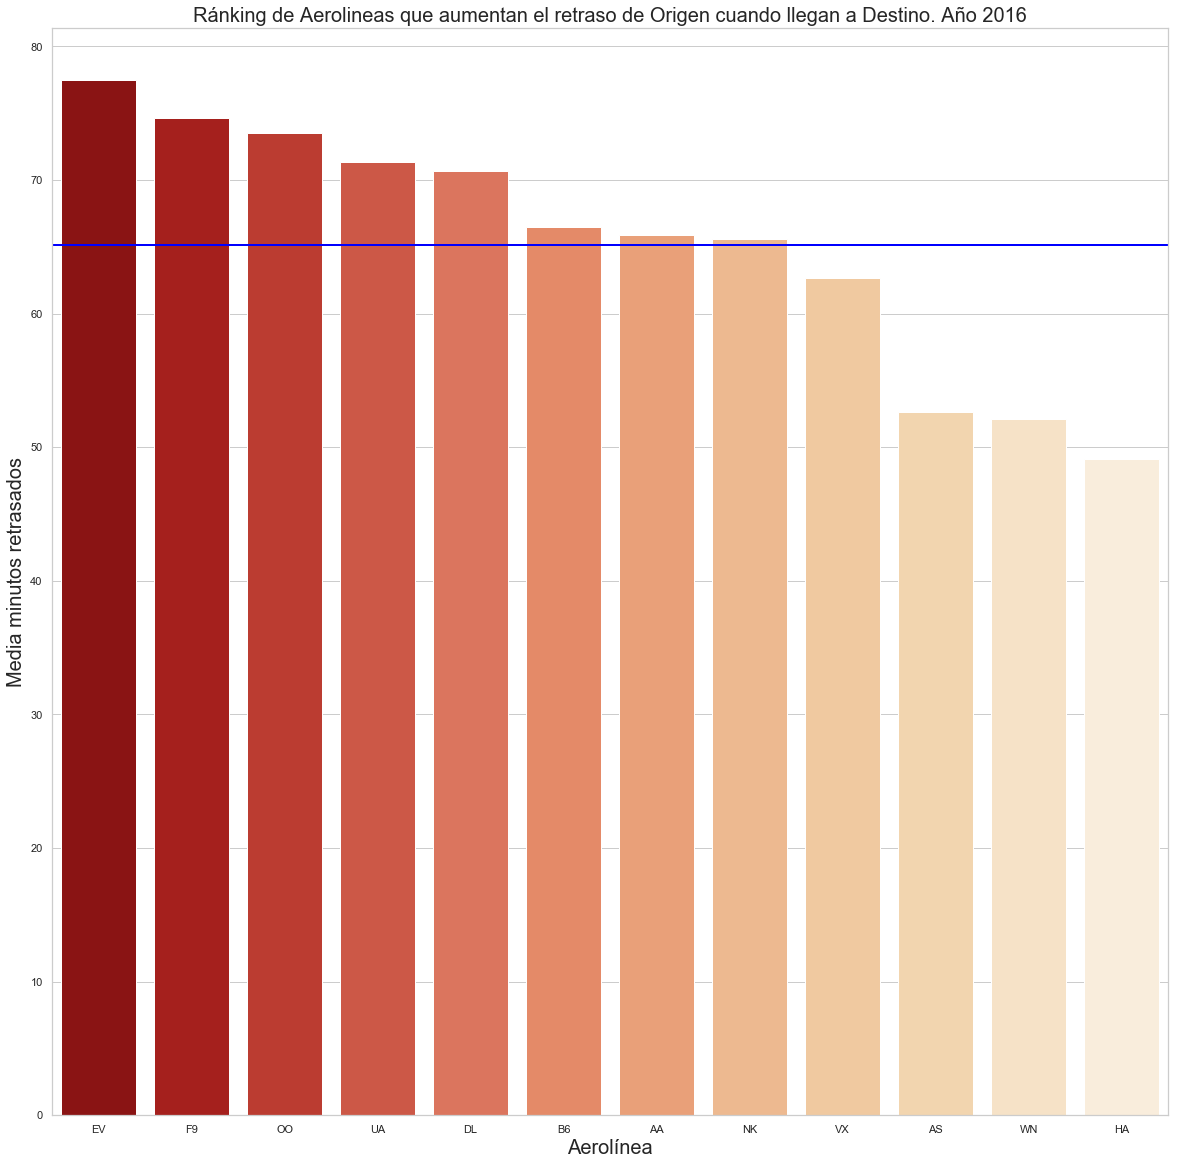

In [121]:
#Ránking de Aerolineas que aumentan el retraso de Origen cuando llegan a Destino

plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)

pal = sns.color_palette("OrRd_r", len(retrasosPosterioresSalidaPorAerolinea))
ax = sns.barplot(x=retrasosPosterioresSalidaPorAerolinea.index, y=retrasosPosterioresSalidaPorAerolinea['MediaRetrasoTotal'], palette=pal)
ax.set_xlabel("Aerolínea", fontsize=20)
ax.set_ylabel("Media minutos retrasados", fontsize=20)
ax.set_title('Ránking de Aerolineas que aumentan el retraso de Origen cuando llegan a Destino. Año ' + year, fontsize=20)

plt.axhline(retrasosPosterioresSalidaPorAerolinea['MediaRetrasoTotal'].mean(), color='Blue', linewidth=2)

plt.show()

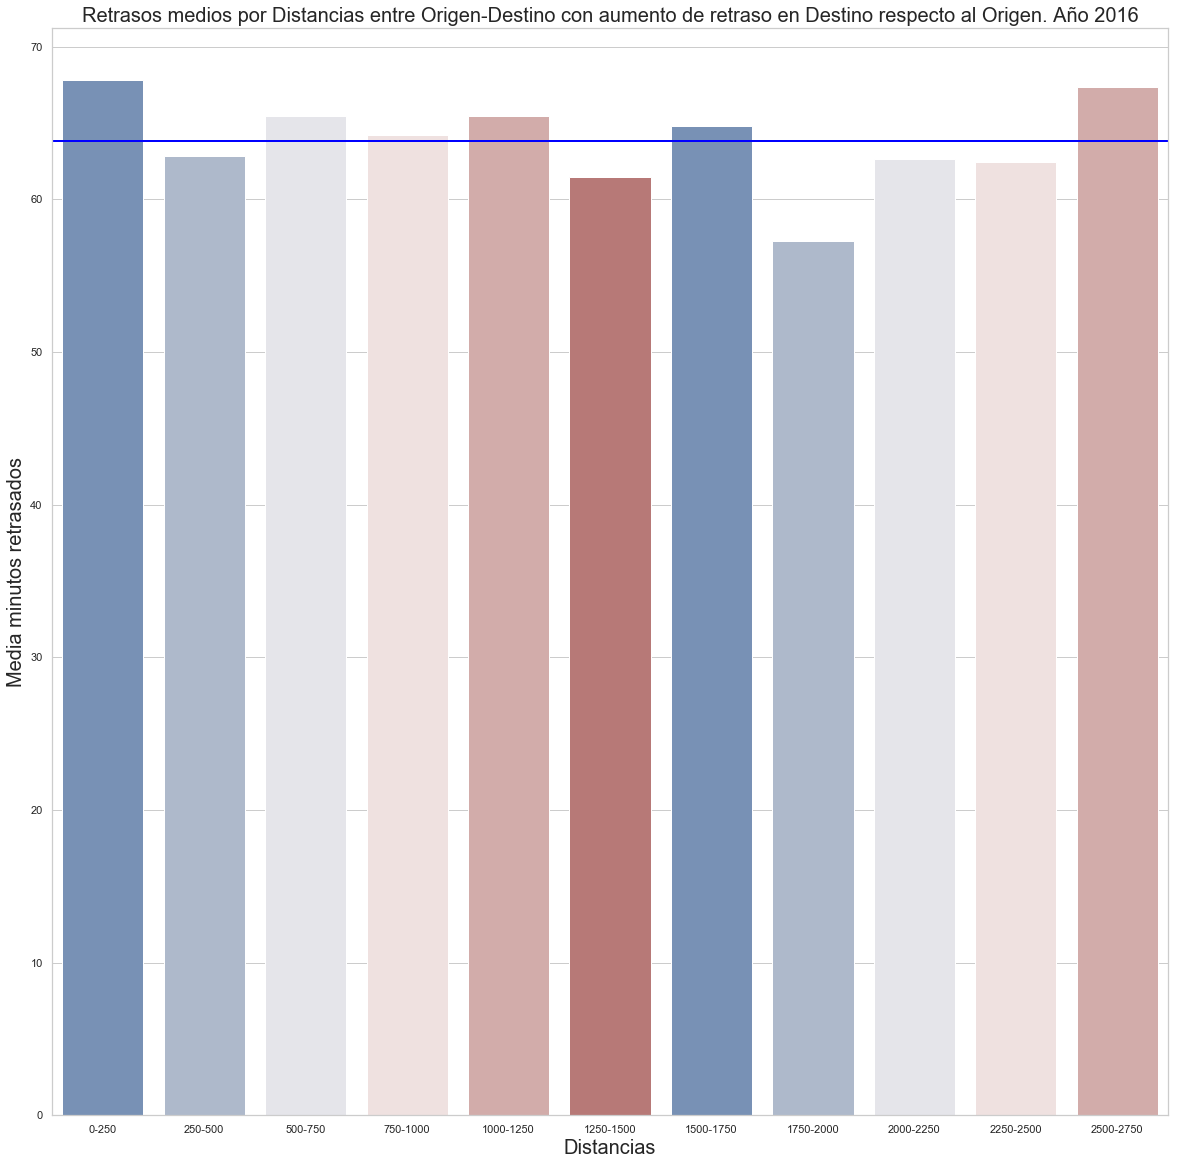

In [122]:
#Retrasos medios por Distancias entre Origen-Destino y que aumenta el retraso en Destino respecto al Origen

plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=retrasosPosterioresSalidaPorDistanciaADestino['MediaRetrasoTotal'], palette=pal)


ax.set_xlabel("Distancias", fontsize=20)
ax.set_ylabel("Media minutos retrasados", fontsize=20)
ax.set_title('Retrasos medios por Distancias entre Origen-Destino con aumento de retraso en Destino respecto al Origen. Año ' + year, fontsize=20)

plt.axhline(retrasosPosterioresSalidaPorDistanciaADestino['MediaRetrasoTotal'].mean(), color='Blue', linewidth=2)

plt.show()

### 1.3.3.5 Visualización de Recuperación del tiempo de retraso, de Origen, en Destino.

In [123]:
#cálculo de los que el retraso de origen se recupera al llegar al Destino
#Visto por origen, destino, aerolínea y por distancia del vuelo

retrasosRecuperadosPorAeropuertoOrigen = pd.DataFrame(retrasosRecuperados.groupby('Origin').aggregate({'Origin': 'count', 'DepDelay':'mean'}))

retrasosRecuperadosPorAeropuertoOrigen = retrasosRecuperadosPorAeropuertoOrigen.rename(columns={'Origin': 'VuelosTotales', 'DepDelay': 'MediaRetrasoTotal'})

retrasosRecuperadosPorAeropuertoDestino = pd.DataFrame(retrasosRecuperados.groupby('Dest').aggregate({'Dest': 'count', 'DepDelay':'mean'}))

retrasosRecuperadosPorAeropuertoDestino = retrasosRecuperadosPorAeropuertoDestino.rename(columns={'Dest': 'VuelosTotales', 'DepDelay': 'MediaRetrasoTotal'})

retrasosRecuperadosPorAerolinea = pd.DataFrame(retrasosRecuperados.groupby('IATA_CODE_Reporting_Airline').aggregate({'IATA_CODE_Reporting_Airline': 'count', 'DepDelay':'mean'}))

retrasosRecuperadosPorAerolinea = retrasosRecuperadosPorAerolinea.rename(columns={'IATA_CODE_Reporting_Airline': 'VuelosTotales', 'DepDelay': 'MediaRetrasoTotal'})

retrasosRecuperadosPorDistanciaADestino = pd.DataFrame(retrasosRecuperados.groupby('DistanceGroup').aggregate({'DistanceGroup': 'count', 'DepDelay':'mean'}))

retrasosRecuperadosPorDistanciaADestino = retrasosRecuperadosPorDistanciaADestino.rename(columns={'DistanceGroup': 'VuelosTotales', 'DepDelay': 'MediaRetrasoTotal'})



In [124]:
#ordenamos por de mayor a menor retraso
retrasosRecuperadosPorAeropuertoOrigen = retrasosRecuperadosPorAeropuertoOrigen.sort_values(['MediaRetrasoTotal'], ascending=False)

retrasosRecuperadosPorAeropuertoDestino = retrasosRecuperadosPorAeropuertoDestino.sort_values(['MediaRetrasoTotal'], ascending=False)

retrasosRecuperadosPorAerolinea = retrasosRecuperadosPorAerolinea.sort_values(['MediaRetrasoTotal'], ascending=False)


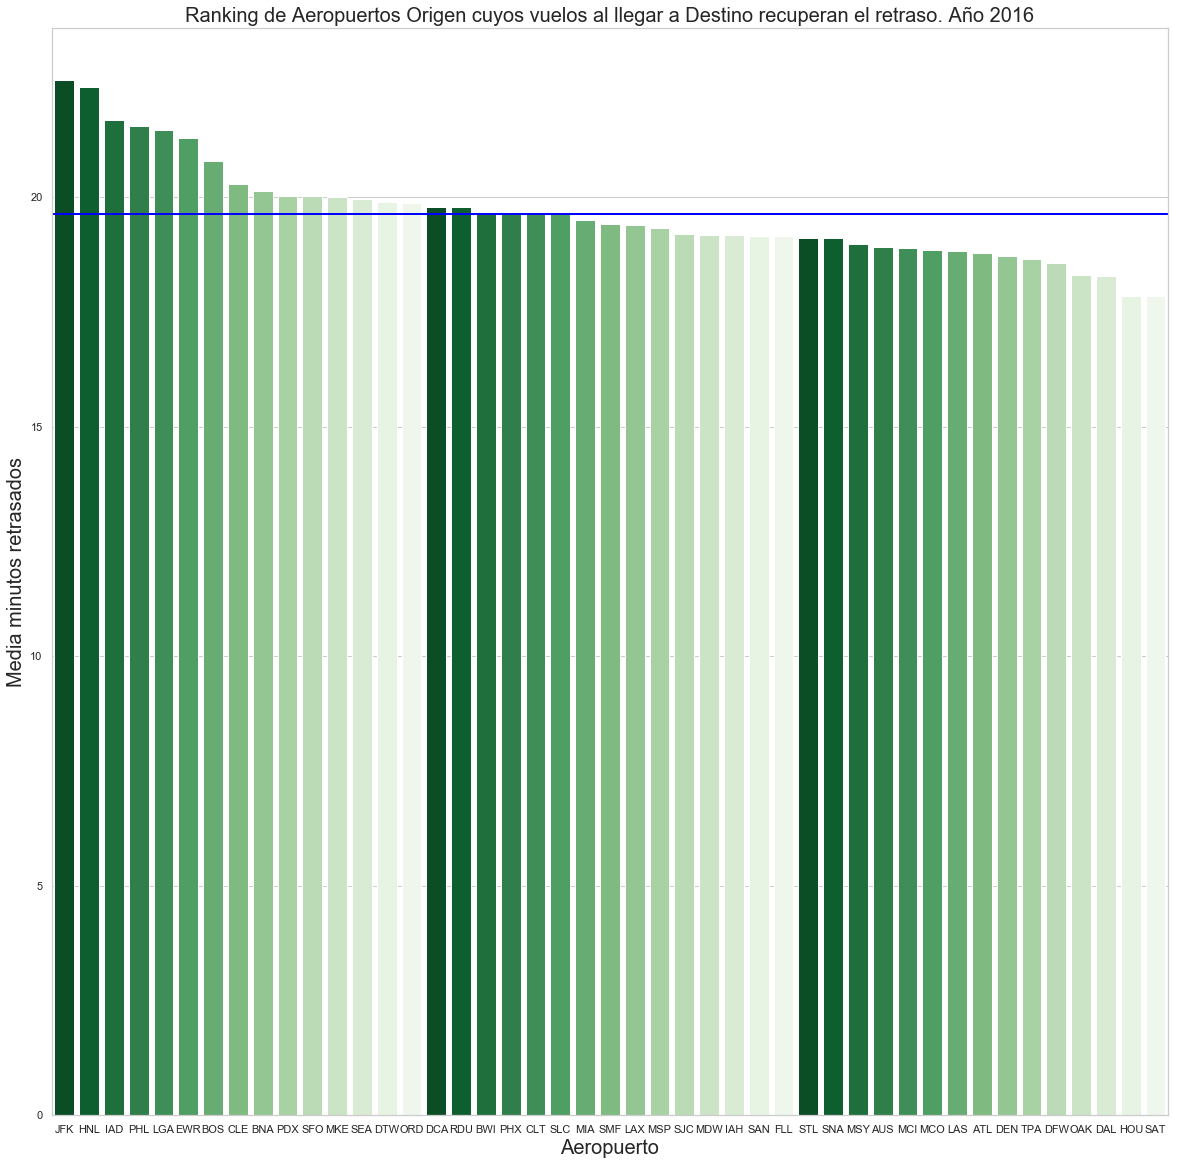

In [125]:
#Ranking de Aeropuertos Origen cuyos vuelos al llegar a Destino recuperan el retraso

plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)

pal = sns.color_palette("Greens_r", 15) #len(retrasosRecuperadosPorAeropuertoOrigen))
ax = sns.barplot(x=retrasosRecuperadosPorAeropuertoOrigen.index, y=retrasosRecuperadosPorAeropuertoOrigen['MediaRetrasoTotal'], palette=pal)
ax.set_xlabel("Aeropuerto", fontsize=20)
ax.set_ylabel("Media minutos retrasados", fontsize=20)
ax.set_title('Ranking de Aeropuertos Origen cuyos vuelos al llegar a Destino recuperan el retraso. Año ' + year, fontsize=20)

plt.axhline(retrasosRecuperadosPorAeropuertoOrigen['MediaRetrasoTotal'].mean(), color='Blue', linewidth=2)

plt.show()

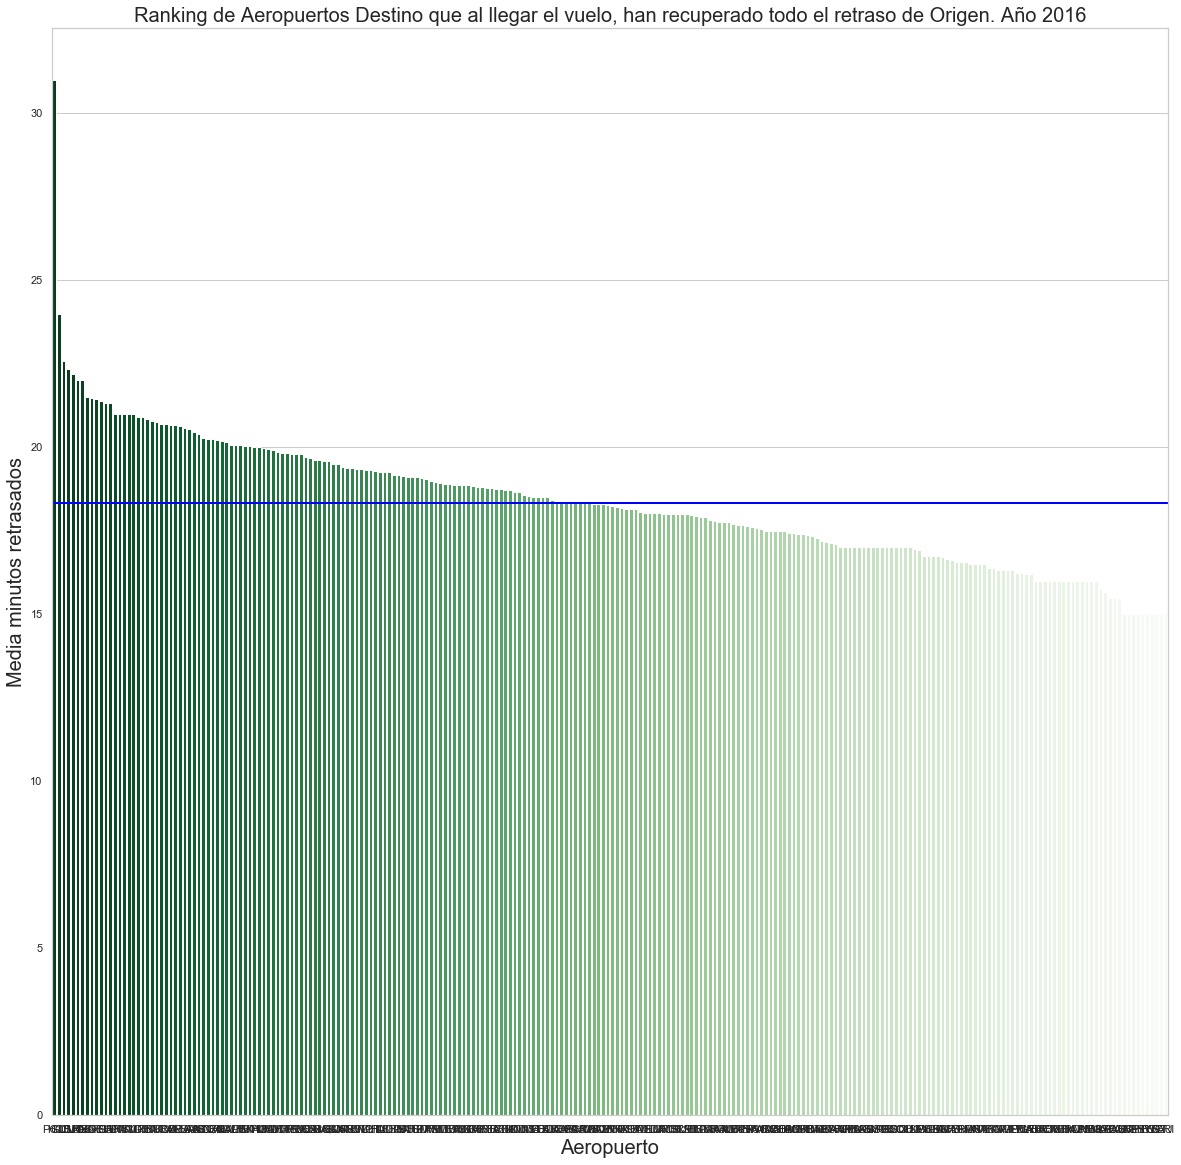

In [126]:
#Ranking de Aeropuertos Destino que al llegar el vuelo, han recuperado todo el retraso de Origen.

plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)

pal = sns.color_palette("Greens_r", len(retrasosRecuperadosPorAeropuertoDestino))
ax = sns.barplot(x=retrasosRecuperadosPorAeropuertoDestino.index, y=retrasosRecuperadosPorAeropuertoDestino['MediaRetrasoTotal'], palette=pal)
ax.set_xlabel("Aeropuerto", fontsize=20)
ax.set_ylabel("Media minutos retrasados", fontsize=20)
ax.set_title('Ranking de Aeropuertos Destino que al llegar el vuelo, han recuperado todo el retraso de Origen. Año ' + year, fontsize=20)


plt.axhline(retrasosRecuperadosPorAeropuertoDestino['MediaRetrasoTotal'].mean(), color='Blue', linewidth=2)

plt.show()

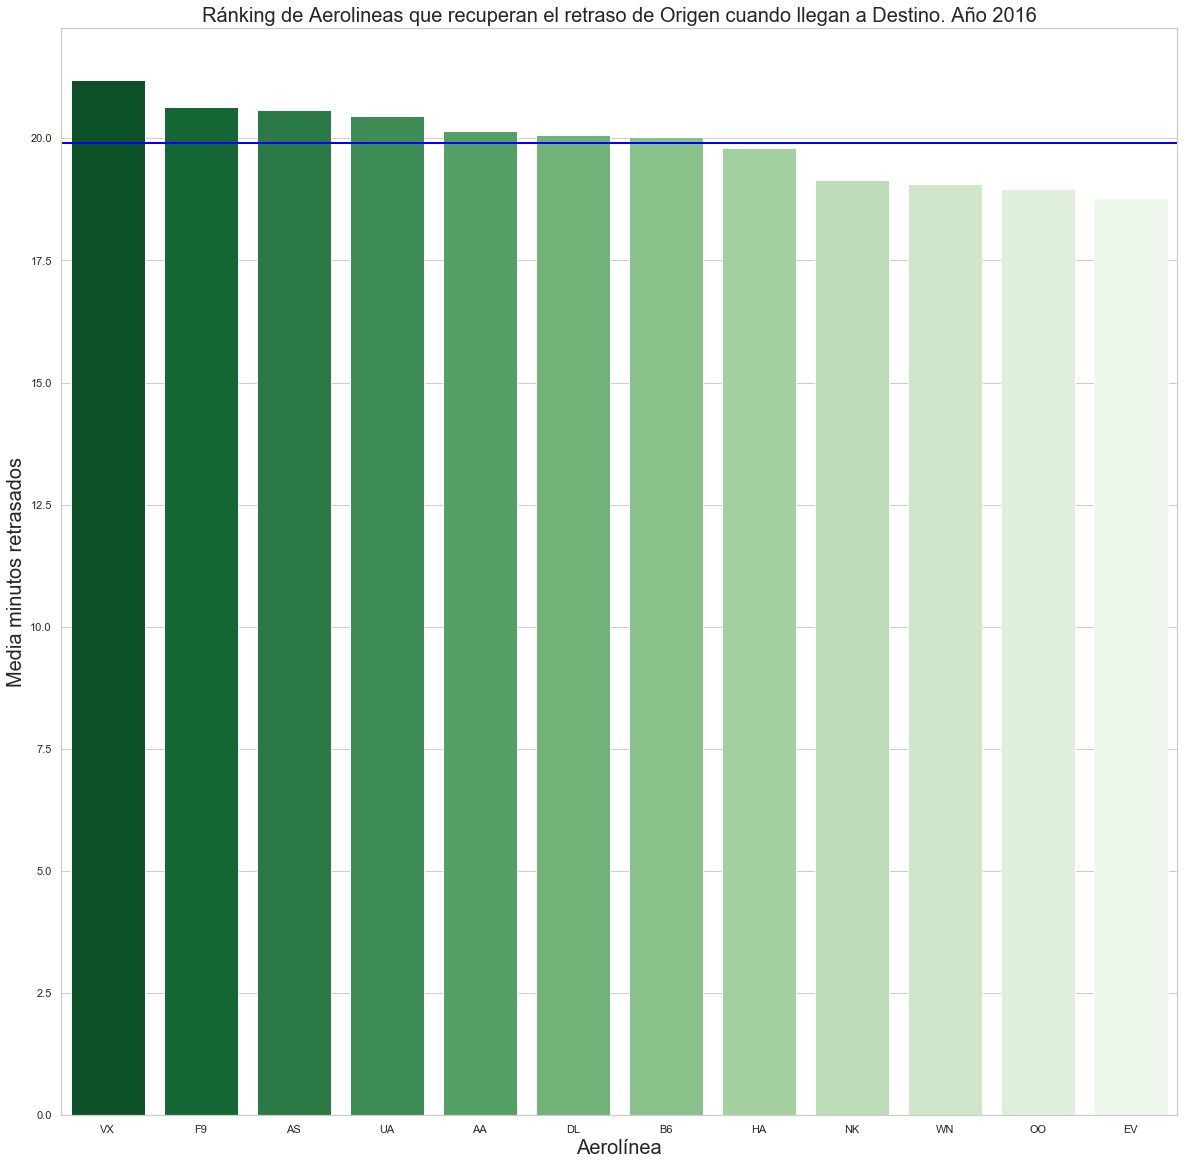

In [127]:
#Ránking de Aerolineas que recuperan el retraso de Origen cuando llegan a Destino

plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)

pal = sns.color_palette("Greens_r", len(retrasosRecuperadosPorAerolinea))
ax = sns.barplot(x=retrasosRecuperadosPorAerolinea.index, y=retrasosRecuperadosPorAerolinea['MediaRetrasoTotal'], palette=pal)
ax.set_xlabel("Aerolínea", fontsize=20)
ax.set_ylabel("Media minutos retrasados", fontsize=20)
ax.set_title('Ránking de Aerolineas que recuperan el retraso de Origen cuando llegan a Destino. Año ' + year, fontsize=20)

plt.axhline(retrasosRecuperadosPorAerolinea['MediaRetrasoTotal'].mean(), color='Blue', linewidth=2)

plt.show()

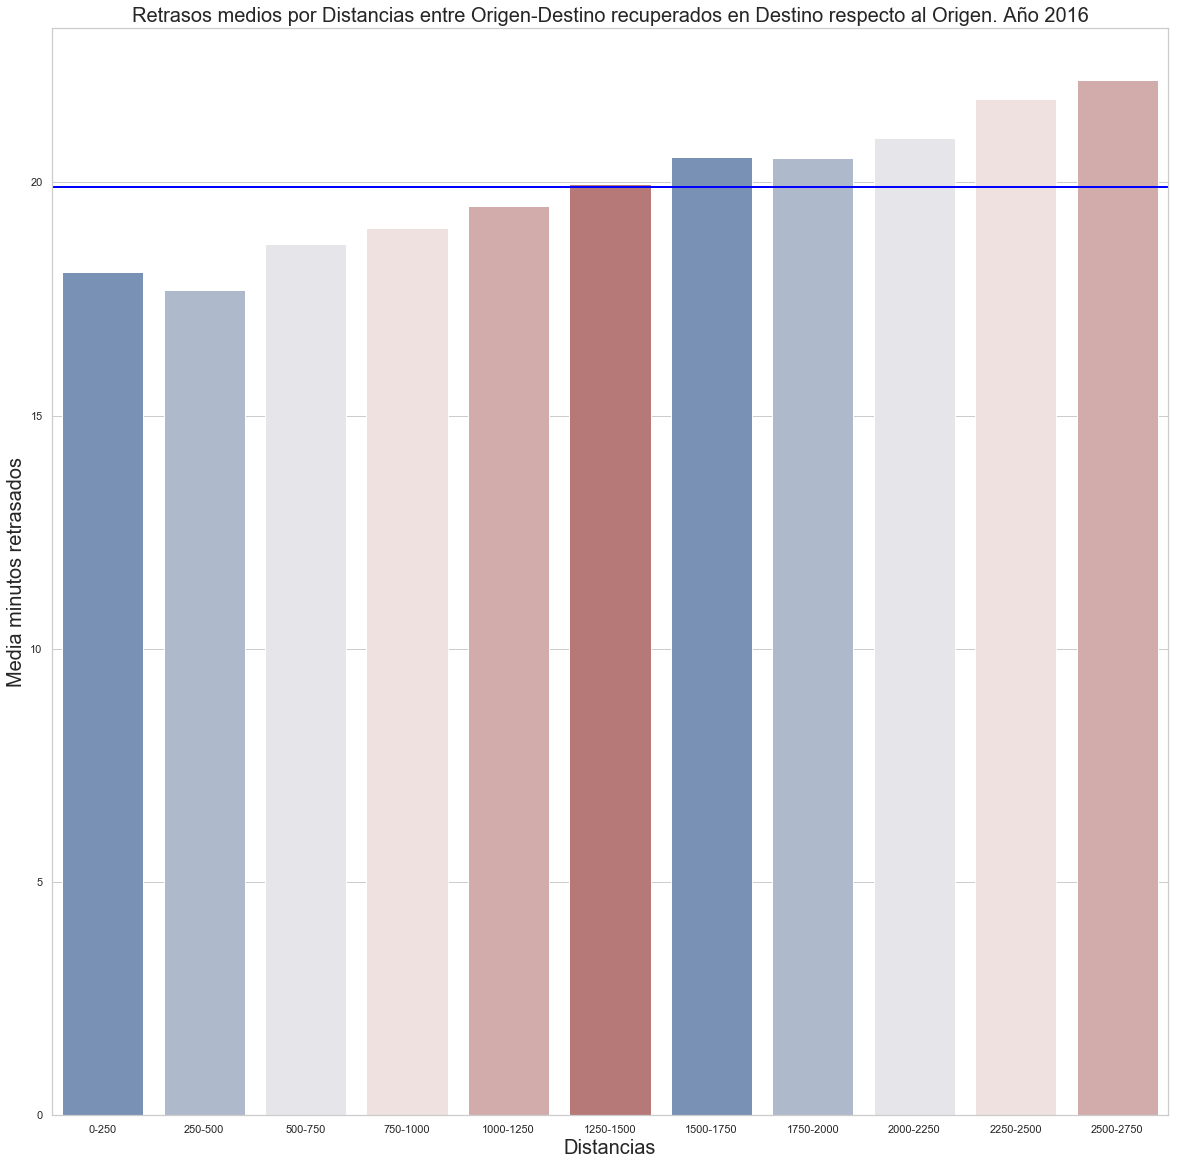

In [128]:
#Retrasos medios por Distancias entre Origen-Destino recuperados en Destino respecto al Origen

plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=retrasosRecuperadosPorDistanciaADestino['MediaRetrasoTotal'], palette=pal)


ax.set_xlabel("Distancias", fontsize=20)
ax.set_ylabel("Media minutos retrasados", fontsize=20)
ax.set_title('Retrasos medios por Distancias entre Origen-Destino recuperados en Destino respecto al Origen. Año ' + year, fontsize=20)

plt.axhline(retrasosRecuperadosPorDistanciaADestino['MediaRetrasoTotal'].mean(), color='Blue', linewidth=2)

plt.show()

### 1.3.3.6 Conclusiones: 

Vuelos que recuperan el tiempo de retraso que acumulaban en Origen
1. Para que en Destino se recupere el tiempo de retraso de Origen, la media de minutos en Origen debe estar entre 17,5 y 21 minutos.
2. Para la recupearción del retraso, cuanto mayor sea la distancia a Destino más tiempo se recupera, es bastante lineal.
3. Los aeropuertos de Origen con mayor media de tiempo de retraso y que en destino, recuperan el retraso son principalmente de la Costa Este y el Medio Este.
4. Por la cola, los 10 aeropuertos con menor media de retraso en Origen, son de la costa Oeste y Medio Oeste. 

Vuelos que se retrasan más, al llegar a Destino, respecto al retraso de Origen
1. Más de 50 minutos de retraso en Origen, supone con gran probabilidad que en Destino se aumente aún más el retraso.
2. En el caso de aumento de retraso, no parece influir demasiado la distancia sobre el aumento del mismo, sólo destaca un poco en el caso de los vuelos de entre 2.500 y 2.750 millas.
3. Los aeropuertos de Origen con mayor media de tiempo de retraso y que en destino, aumentan el retraso son principalmente de la Costa Este y el Medio Este.
4. Por la cola, los 10 aeropuertos con menor media de retraso en Origen, son de la costa Oeste y Medio Oeste.


Vuelos que consiguen Mantener el retraso en Destino
1. Aquellos vuelos que salen entre 40 y 65 minutos tarde en Origen, pueden conseguir no retrasarse más a la llegada a Destino. 
2. 9 de los 10 aeropuertos de Origen con mayor media de tiempo de retraso y que en destino, el vuelo, mantener el retraso, sin aumentarlo, son de la costa Este y Medio Este.
3. Por la cola, los 10 aeropuertos con menor media de retraso en Origen, son de la costa Oeste y Medio Oeste.
4. La distancia tampoco parece clave en el mantenimiento del retraso de Origen a la llegada, en el caso de los vuelos más largos (2.500 y 2.750 millas) sí parece ayudar conseguir mantenerse en el caso de los retrasos más altos.

Aerolíneas

1. Express Airlines parece que es la que destaca con los retrasos en las 3 situaciones.
2. Otra de las destacadas que suele estar entre las primeras es United Airlines y JetBlue
3. Por el contrario, parece que Southwest y Frontier son las aerolíneas con menor retraso en los aeropuertos principales.
4. Compañías relevantes como American Airlnes y Delta, están en los 3 casos en la media de retrasos, siendo Delta mejor.


Parece que es relevante en la media de minutos retrasados que la zona geográfica sea la de la Costa Este y el Medio Este de Estados Unidos, y viceversa. 
Sin embargo una cosa son los minutos retrasados, y otra el número de vuelos retrasados, en la que la ubicación geográfica no es tan evidente, sino que parece que es la densidad del tráfico nacional.
Parece que con hasta un máximo de 30 minutos de retraso, se puede recuperar el tiempo en Destino.





### 1.3.4 Visualización de retrasos medios en Origen por Rutas

In [129]:
retrasosSalidaIgualLlegada.shape

(580926, 112)

In [130]:
retrasosSalidaIgualLlegadaPorRuta = pd.DataFrame(retrasosSalidaIgualLlegada.groupby('Route').aggregate({'Route': 'count', 'DepDelay':'mean'}))

retrasosSalidaIgualLlegadaPorRuta = retrasosSalidaIgualLlegadaPorRuta.rename(columns={'Route': 'VuelosTotales', 'DepDelay': 'MediaRetrasoTotal'})



In [131]:
#ordenamos de mayor a menor retraso para coger las 20 primeras
retrasosSalidaIgualLlegadaPorRuta = retrasosSalidaIgualLlegadaPorRuta.sort_values(['MediaRetrasoTotal'], ascending=False)


In [132]:
retrasosSalidaIgualLlegadaPorRuta.head(15)

VuelosTotales  MediaRetrasoTotal
Route                                    
FLL-IAD              1         407.000000
LGA-MEM              1         317.000000
SEA-JAC              2         251.500000
MSP-LEX             10         234.900000
SAT-PHL              4         195.750000
SAT-MIA             12         192.750000
PHL-MKE              3         192.333333
CLE-ERI              1         184.000000
LGA-TVC              4         182.500000
MSP-IDA              2         170.000000
CLT-CVG             49         166.938776
HNL-DFW             54         161.703704
SMF-HNL             23         161.608696
MSP-RNO              1         161.000000
DEN-BUF              2         157.000000

In [133]:
#necesitamos darle importancia a la ruta por número de vuelos, ya que no nos vale que una ruta con 1 vuelo sea
#representativa de las rutas más retrasadas de media.

retrasosSalidaRutaConPesos = retrasosSalidaIgualLlegadaPorRuta

retrasosSalidaRutaConPesos['Peso'] = retrasosSalidaRutaConPesos['VuelosTotales'] * retrasosSalidaRutaConPesos['MediaRetrasoTotal']

retrasosSalidaRutaConPesos = retrasosSalidaRutaConPesos.sort_values(['Peso'], ascending=False)

retrasosSalidaRutaConPesos.head(15)

VuelosTotales  MediaRetrasoTotal      Peso
Route                                              
LAX-SFO           2845          58.736731  167106.0
LAX-JFK           1956          64.990286  127121.0
SFO-LAX           1891          63.271814  119647.0
LGA-ATL           1379          81.966642  113032.0
ORD-SFO           1739          64.363427  111928.0
ORD-LAX           1615          67.635294  109231.0
ORD-LGA           1671          64.049072  107026.0
LAS-SFO           1577          63.325301   99864.0
SFO-LAS           1615          59.235913   95666.0
ORD-DFW           1374          69.056769   94884.0
JFK-LAX           1539          60.547758   93183.0
LGA-ORD           1223          76.022895   92976.0
SFO-ORD           1343          68.405808   91869.0
DEN-SFO           1391          63.258807   87993.0
SFO-EWR           1158          72.863558   84376.0

Ya parece que salen las más relevantes, vamos a quedarnos con las 20 primeras

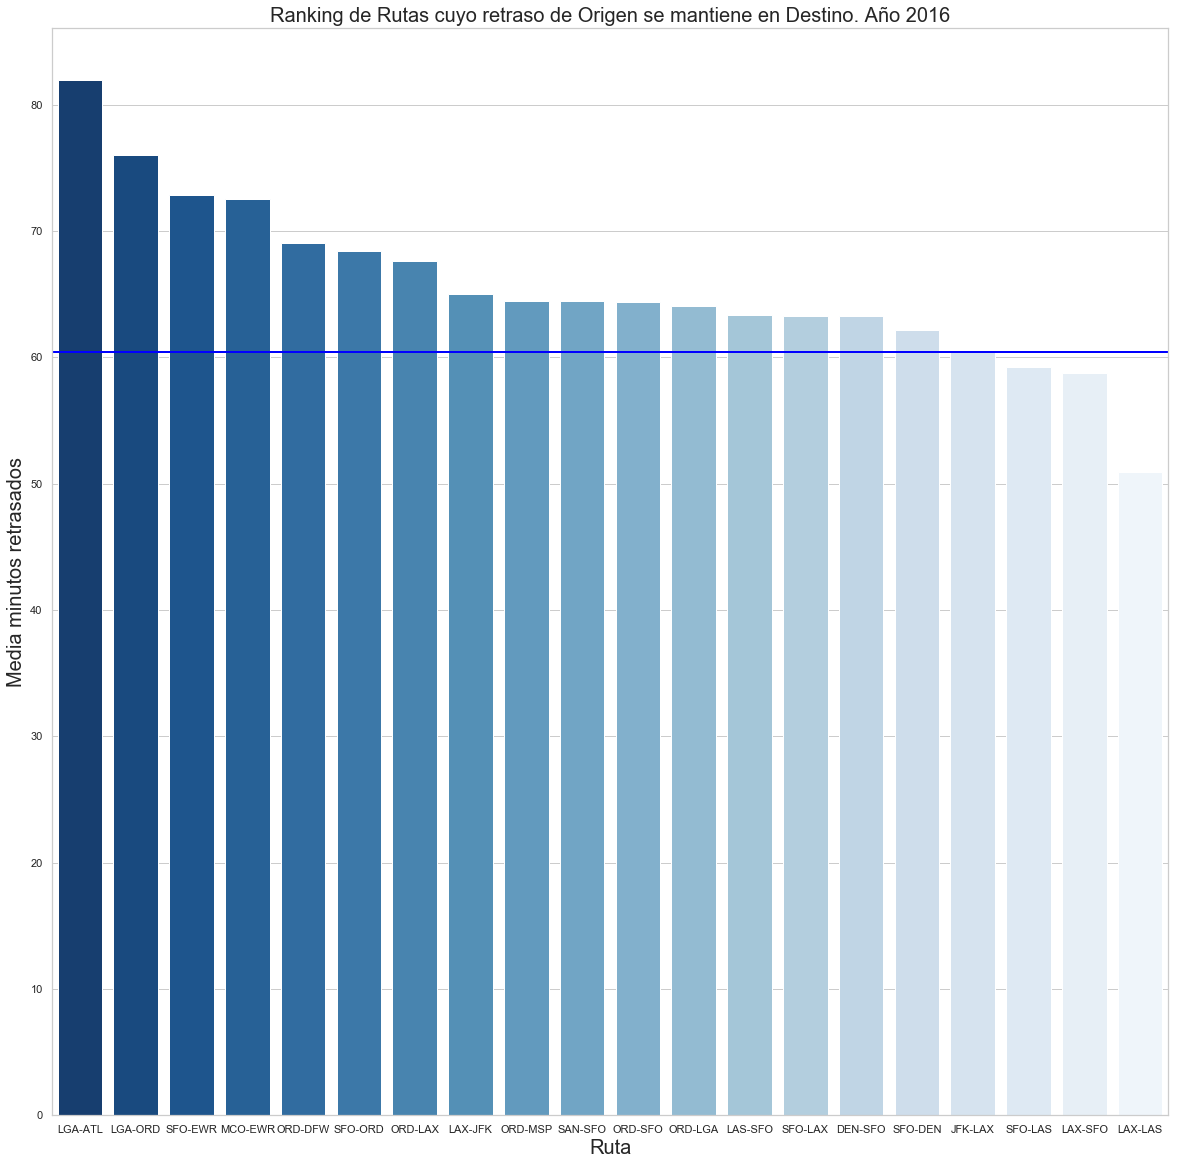

In [134]:
retrasosSalidaRutaConPesos = retrasosSalidaRutaConPesos.head(20)

retrasosSalidaRutaConPesos = retrasosSalidaRutaConPesos.sort_values(['MediaRetrasoTotal'], ascending=False)

#Ranking de Rutas en cuyo retraso de Origen se mantiene en Destino

plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)

pal = sns.color_palette("Blues_r", len(retrasosSalidaRutaConPesos))
ax = sns.barplot(x=retrasosSalidaRutaConPesos.index, y=retrasosSalidaRutaConPesos['MediaRetrasoTotal'], palette=pal)
ax.set_xlabel("Ruta", fontsize=20)
ax.set_ylabel("Media minutos retrasados", fontsize=20)
ax.set_title('Ranking de Rutas cuyo retraso de Origen se mantiene en Destino. Año ' + year, fontsize=20)

plt.axhline(retrasosSalidaIgualLlegadaPorRuta['MediaRetrasoTotal'].mean(), color='Blue', linewidth=2)

plt.show()

La mayoría son rutas que salen de Atlanta (ATL) y de Newark (EWR) o de Chicago (ORD), son de la Costa Este, también de la costa Oeste son relavantes SFO (San Francisco) y LAX (Los Ángeles), pero predominan rutas que salen y llegan en la Costa Este.

Miremos ahora los otros dos casos, con mayor retraso en Destino, y con Recuperación del tiempo

In [135]:
retrasosPosterioresSalidaPorRuta = pd.DataFrame(retrasosPosterioresSalida.groupby('Route').aggregate({'Route': 'count', 'DepDelay':'mean'}))

retrasosPosterioresSalidaPorRuta = retrasosPosterioresSalidaPorRuta.rename(columns={'Route': 'VuelosTotales', 'DepDelay': 'MediaRetrasoTotal'})


In [136]:
#ordenamos de mayor a menor retraso para coger las 20 primeras
retrasosPosterioresSalidaPorRuta = retrasosPosterioresSalidaPorRuta.sort_values(['MediaRetrasoTotal'], ascending=False)

#necesitamos darle importancia a la ruta por número de vuelos, ya que no nos vale que una ruta con 1 vuelo sea
#representativa de las rutas más retrasadas de media.

retrasosPosterioresSalidaPorRutaConPesos = retrasosPosterioresSalidaPorRuta

retrasosPosterioresSalidaPorRutaConPesos['Peso'] = retrasosPosterioresSalidaPorRutaConPesos['VuelosTotales'] * retrasosPosterioresSalidaPorRutaConPesos['MediaRetrasoTotal']

retrasosPosterioresSalidaPorRutaConPesos = retrasosPosterioresSalidaPorRutaConPesos.sort_values(['Peso'], ascending=False)

retrasosPosterioresSalidaPorRutaConPesos.head(15)

VuelosTotales  MediaRetrasoTotal      Peso
Route                                              
LAX-SFO           2046          65.997556  135031.0
SFO-LAX           1838          62.706746  115255.0
LAS-LAX           1215          61.482305   74701.0
LAS-SFO           1026          71.181287   73032.0
LAX-LAS           1071          55.690943   59645.0
ORD-LGA            909          61.308031   55729.0
SAN-SFO            748          73.122995   54696.0
ORD-SFO            767          70.293351   53915.0
SEA-SFO            719          70.707928   50839.0
DEN-SFO            701          71.181170   49898.0
ORD-LAX            630          71.985714   45351.0
LAX-JFK            669          67.339312   45050.0
JFK-LAX            638          66.658307   42528.0
JFK-SFO            537          76.973929   41335.0
MSP-ORD            485          82.585567   40054.0

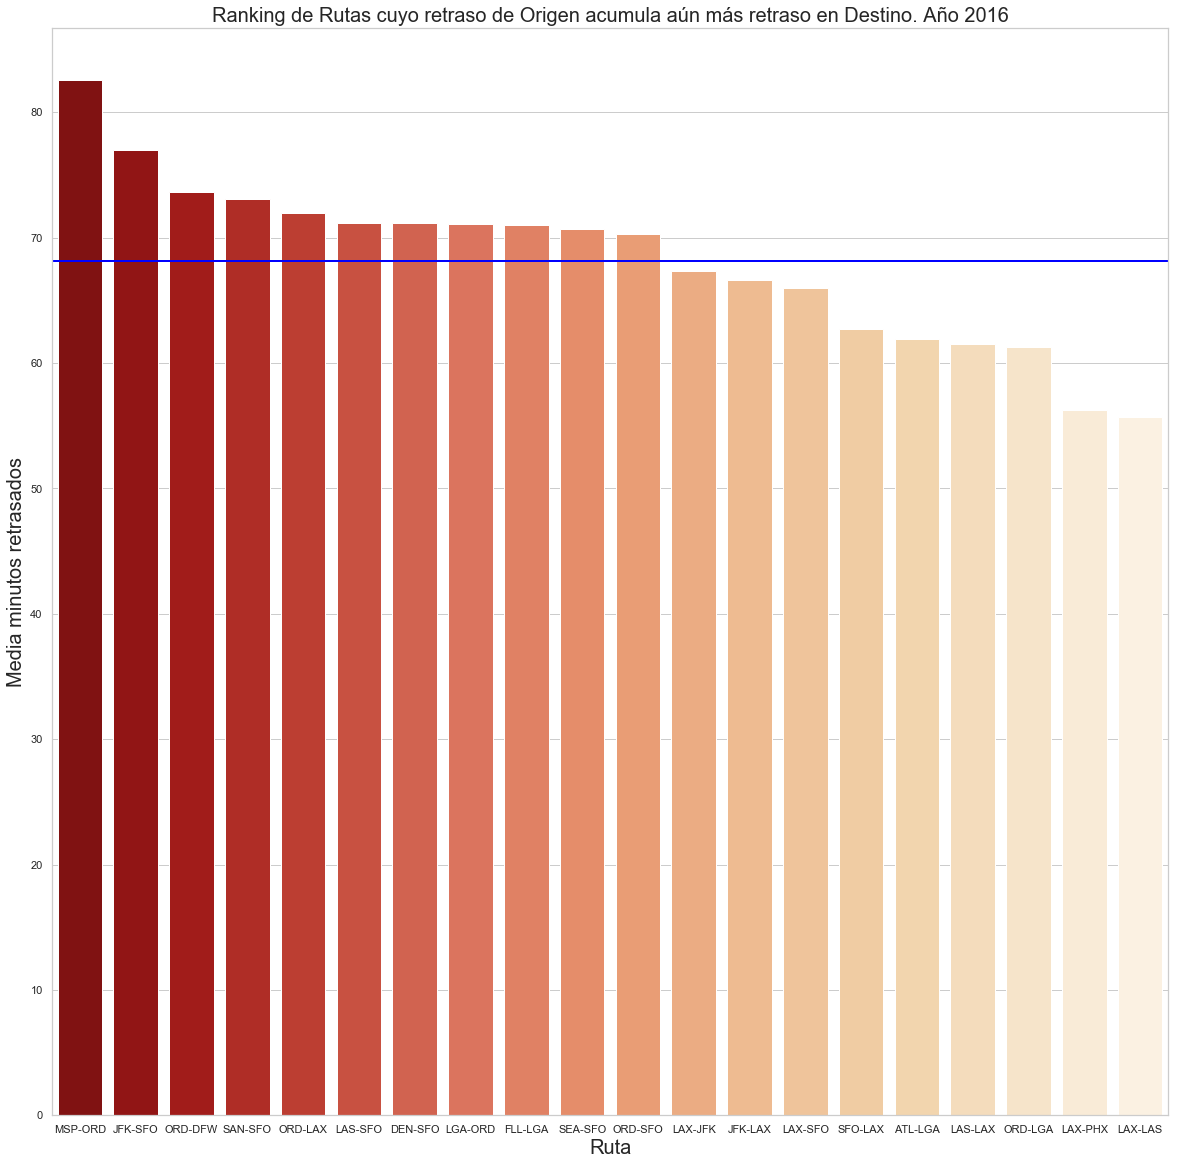

In [137]:
retrasosPosterioresSalidaPorRutaConPesos = retrasosPosterioresSalidaPorRutaConPesos.head(20)

retrasosPosterioresSalidaPorRutaConPesos = retrasosPosterioresSalidaPorRutaConPesos.sort_values(['MediaRetrasoTotal'], ascending=False)

#Ranking de Rutas en cuyo retraso de Origen aumenta Destino

plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)

pal = sns.color_palette("OrRd_r", len(retrasosPosterioresSalidaPorRutaConPesos))
ax = sns.barplot(x=retrasosPosterioresSalidaPorRutaConPesos.index, y=retrasosPosterioresSalidaPorRutaConPesos['MediaRetrasoTotal'], palette=pal)
ax.set_xlabel("Ruta", fontsize=20)
ax.set_ylabel("Media minutos retrasados", fontsize=20)
ax.set_title('Ranking de Rutas cuyo retraso de Origen acumula aún más retraso en Destino. Año ' + year, fontsize=20)

plt.axhline(retrasosPosterioresSalidaPorRutaConPesos['MediaRetrasoTotal'].mean(), color='Blue', linewidth=2)

plt.show()

En este caso aumenta claramente la prevalencia de aeropuertos de la parte Este de Estados Unidos, es más, los vuelos parecen que casi todos son entre aeropuertos de esta parte de USA, especialemente a Atlanta, el de mayor tráfico de USA, por lo que se apuntan dos cosas vistas en los gráficos anteriores, con menor distancia no da tiempo a recuperar el retraso y que la mayoría de los aeropuertos con esta circunstancia son de la parte Este de USA, con una media de retraso por encima de los 60 minutos.

Veamos, por último, los vuelos que recuperan el tiempo.

In [138]:
retrasosRecuperanPorRuta = pd.DataFrame(retrasosRecuperados.groupby('Route').aggregate({'Route': 'count', 'DepDelay':'mean'}))

retrasosRecuperanPorRuta = retrasosRecuperanPorRuta.rename(columns={'Route': 'VuelosTotales', 'DepDelay': 'MediaRetrasoTotal'})


#ordenamos de mayor a menor retraso para coger las 20 primeras
retrasosRecuperanPorRuta = retrasosRecuperanPorRuta.sort_values(['MediaRetrasoTotal'], ascending=False)

#necesitamos darle importancia a la ruta por número de vuelos, ya que no nos vale que una ruta con 1 vuelo sea
#representativa de las rutas más retrasadas de media.

retrasosRecuperanPorRutaConPesos = retrasosRecuperanPorRuta

retrasosRecuperanPorRutaConPesos['Peso'] = retrasosRecuperanPorRutaConPesos['VuelosTotales'] * retrasosRecuperanPorRutaConPesos['MediaRetrasoTotal']

retrasosRecuperanPorRutaConPesos = retrasosRecuperanPorRutaConPesos.sort_values(['Peso'], ascending=False)

retrasosRecuperanPorRutaConPesos.head(15)

VuelosTotales  MediaRetrasoTotal     Peso
Route                                             
JFK-LAX            448          25.142857  11264.0
LAX-JFK            335          20.092537   6731.0
JFK-SFO            227          23.920705   5430.0
LGA-ATL            238          21.802521   5189.0
ORD-LAX            227          21.612335   4906.0
ORD-SFO            219          21.059361   4612.0
EWR-LAX            185          22.810811   4220.0
SFO-JFK            195          21.400000   4173.0
ATL-LAX            197          20.847716   4107.0
LAX-ATL            203          19.433498   3945.0
EWR-SFO            163          23.325153   3802.0
BOS-LAX            158          23.670886   3740.0
BOS-SFO            152          23.763158   3612.0
LGA-ORD            158          21.911392   3462.0
EWR-IAH            144          22.069444   3178.0

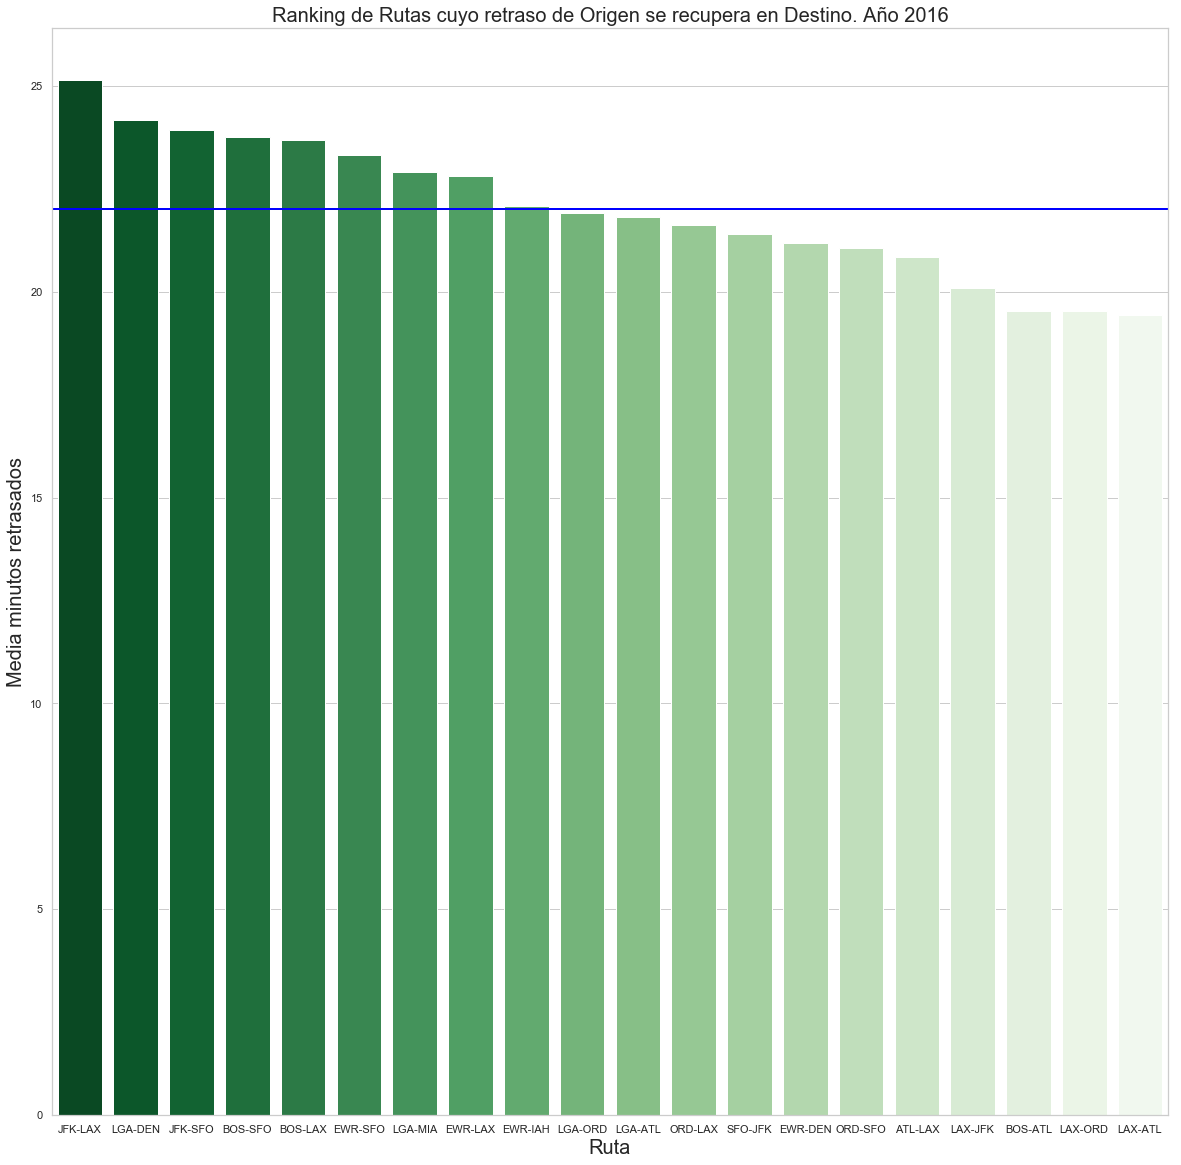

In [139]:
retrasosRecuperanPorRutaConPesos = retrasosRecuperanPorRutaConPesos.head(20)

retrasosRecuperanPorRutaConPesos = retrasosRecuperanPorRutaConPesos.sort_values(['MediaRetrasoTotal'], ascending=False)

#Ranking de Rutas en cuyo retraso de Origen se recupera en Destino

plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)

pal = sns.color_palette("Greens_r", len(retrasosRecuperanPorRutaConPesos))
ax = sns.barplot(x=retrasosRecuperanPorRutaConPesos.index, y=retrasosRecuperanPorRutaConPesos['MediaRetrasoTotal'], palette=pal)
ax.set_xlabel("Ruta", fontsize=20)
ax.set_ylabel("Media minutos retrasados", fontsize=20)
ax.set_title('Ranking de Rutas cuyo retraso de Origen se recupera en Destino. Año ' + year, fontsize=20)

plt.axhline(retrasosRecuperanPorRutaConPesos['MediaRetrasoTotal'].mean(), color='Blue', linewidth=2)

plt.show()

Una vez más, prevalecen los aeropuertos de la Costa Este, pero en este caso, las distancias de la ruta son mayores, casi todos vuelan al Oeste. Y claramente, como se vio en los apartados anteriores por aeropuertos, el menor número de minutos de retrasos es recuperable, y más aún si la distancia es grande, como es el caso. La media de tiempo de retraso de estas rutas prácticamente coincide con la del caso de los aeropuertos.

### 1.3.4.1 Conclusiones:

Parece que mirando los retrasos en Origen por Rutas, se confirman los datos que se vieron en el apartado anterior por Aeropuertos.

Parece claramente que en un modelo de predicción, el peso de la Costa Este de USA, en cuanto a los retrasos, es mayor que en la Costa Oeste.

Deberíamos etiquetar a los aeropuertos por la zona geográfica en la que están y que los modelos se orienten a cada una de las zonas geográficas

## 1.3.5 Análisis de Retrasos en Destino

#### Ahora veamos cómo es el comportamiento de los retrasos en llegadas

#### Vuelos que se han retrasado al menos 15 minutos en la llegada 

In [140]:
#Vuelos que se han retrasado al menos 15 minutos en la llegada
len(dfanual[dfanual['ArrDel15'] == 1])

964239

In [141]:
#retrasos por mes en llegadas

vuelosTotalesRetrasadosDestinoPorMes = pd.DataFrame(columns=['mes', 'vuelos'])

for df in dataframes:
    vuelosTotalesRetrasadosDestinoPorMes = vuelosTotalesRetrasadosDestinoPorMes.append({'mes': df["Month"][1], 'vuelos': len(df[(df['ArrDel15'] == 1)])}, ignore_index=True)


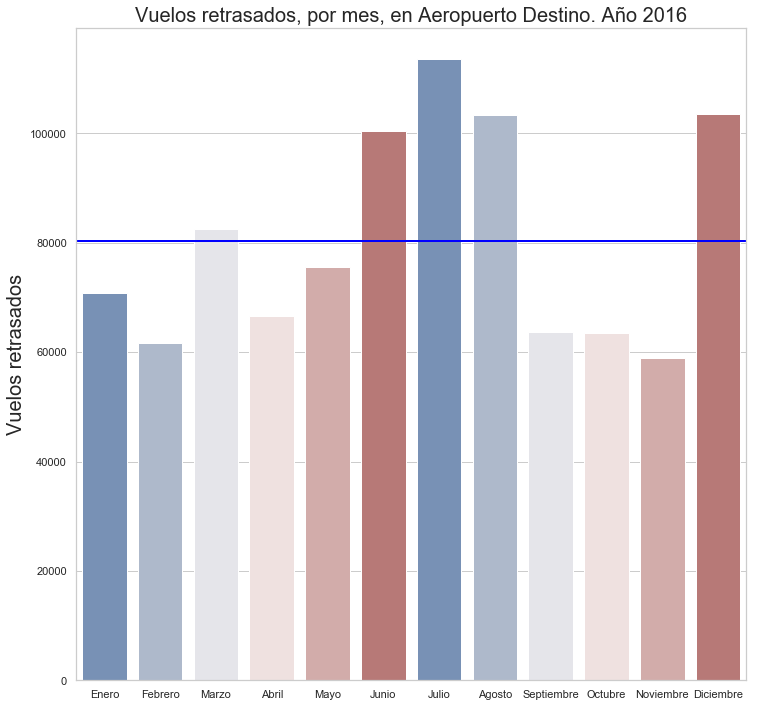

In [142]:
#Vuelos retrasados por mes

my_xticks=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

plt.figure(figsize=(12,12))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=vuelosTotalesRetrasadosDestinoPorMes['vuelos'], palette=pal)


ax.set_ylabel("Vuelos retrasados", fontsize=20)
ax.set_title('Vuelos retrasados, por mes, en Aeropuerto Destino. Año ' + year, fontsize=20)

plt.axhline(vuelosTotalesRetrasadosDestinoPorMes['vuelos'].mean(), color='Blue', linewidth=2)

plt.show()

De las múltiples combinaciones de los retrasos, motivos, si en origen , si en destino, si en ambos, etc. Vamos a ver primero cuántos hay retrasados, ya vimos en el apartado correspondiente de retrasos en origen, cuántos mantenían su retraso en la llegada, se recuperaban o aumentaban más el retraso de origen. Vamos a ver, nuevos casos: 
1. Retrasos que sólo ocurren en Destino, es decir, en Origen no tenían retraso.
2. Volveremos a ver los retrasados en Destino, y que en origen también estaban retrasados.
3. Iremos viéndolos también, por aeropuertos más retrasados, con más vuelos, por zonas geográficas, tipos de retraso, aerolíneas, etc.

### 1.3.5.1 Vuelos retrasados sólo en Destino

In [143]:
#vuelos retrasados en Destino pero que salieron en hora en Origen
len(dfanual[(dfanual['ArrDel15'] == 1) & (dfanual['DepDel15'] == 0)])

213179

In [144]:
vuelosRestrasadosSoloEnDestino = pd.DataFrame(columns=['mes', 'vuelos'])

for df in dataframes:
    vuelosRestrasadosSoloEnDestino = vuelosRestrasadosSoloEnDestino.append({'mes': df["Month"][1], 'vuelos': len(df[(df['ArrDel15'] == 1) & (df['DepDel15'] == 0)])}, ignore_index=True)


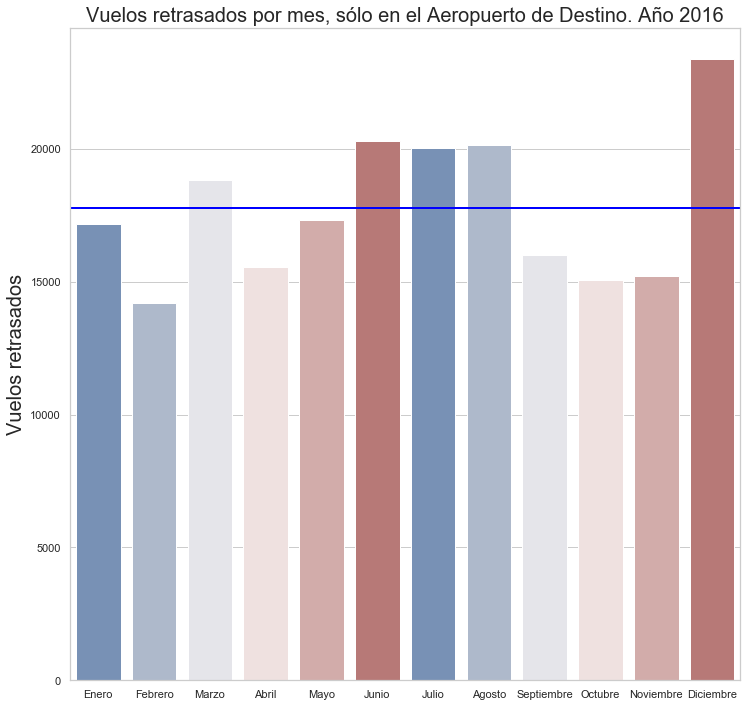

In [145]:
#Vuelos retrasados por mes sólo en destino, es decir, en origen salieron puntuales

plt.figure(figsize=(12,12))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=vuelosRestrasadosSoloEnDestino['vuelos'], palette=pal)

ax.set_ylabel("Vuelos retrasados", fontsize=20)
ax.set_title('Vuelos retrasados por mes, sólo en el Aeropuerto de Destino. Año ' + year, fontsize=20)

plt.axhline(vuelosRestrasadosSoloEnDestino['vuelos'].mean(), color='Blue', linewidth=2)

plt.show()

In [146]:
retrasosSoloDestino = pd.DataFrame(dfanual[(dfanual['ArrDel15'] == 1) & (dfanual['DepDel15'] == 0)])

In [147]:
retrasosSoloDestino = pd.DataFrame(retrasosSoloDestino['ArrDelay'])

retrasosSoloDestino.head(5)

ArrDelay
22       15.0
66       44.0
100      29.0
151      23.0
152      15.0

In [148]:
retrasosSoloDestino.describe().T

count       mean        std   min   25%   50%   75%    max
ArrDelay  213179.0  26.785575  15.112129  15.0  17.0  22.0  30.0  456.0

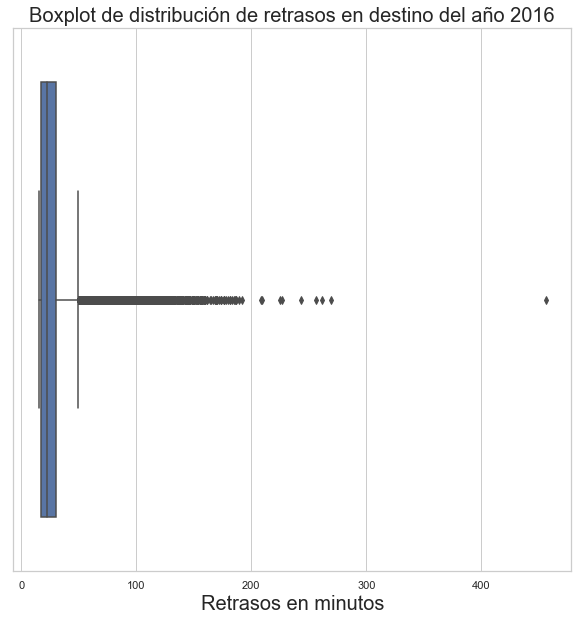

In [149]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,10))
ax = sns.boxplot(x=retrasosSoloDestino["ArrDelay"])
ax.set_xlabel("Retrasos en minutos", fontsize=20)
ax.set_title('Boxplot de distribución de retrasos en destino del año ' + year, fontsize=20)
plt.show()

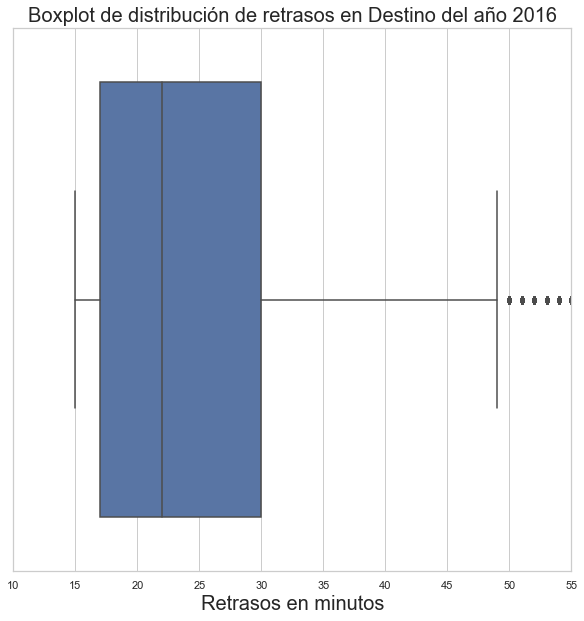

In [150]:
#vamos a reducir la escala para al menos ver la parte principal

sns.set(style="whitegrid")
plt.figure(figsize=(10,10))
plt.xlim(10,55)
ax = sns.boxplot(x=retrasosSoloDestino["ArrDelay"])
ax.set_xlabel("Retrasos en minutos", fontsize=20)
ax.set_title('Boxplot de distribución de retrasos en Destino del año ' + year, fontsize=20)
plt.show()

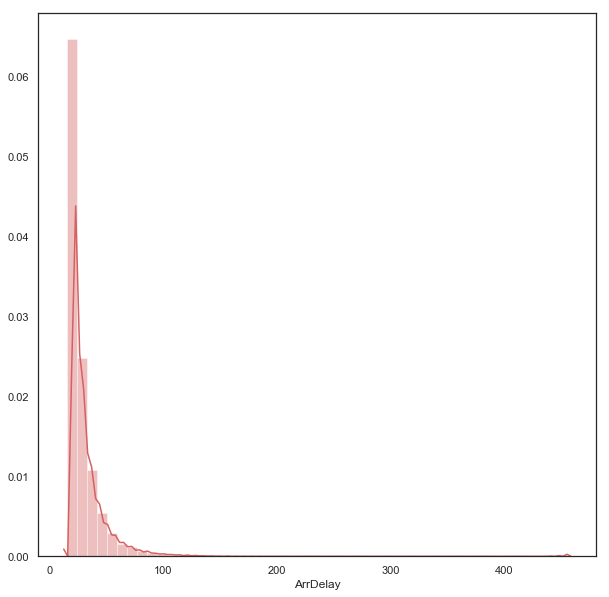

In [151]:
# distribución con densidad
sns.set(style="white", palette="muted", color_codes=True)

plt.figure(figsize=(10,10))

sns.distplot(retrasosSoloDestino["ArrDelay"], color="r")

plt.show()

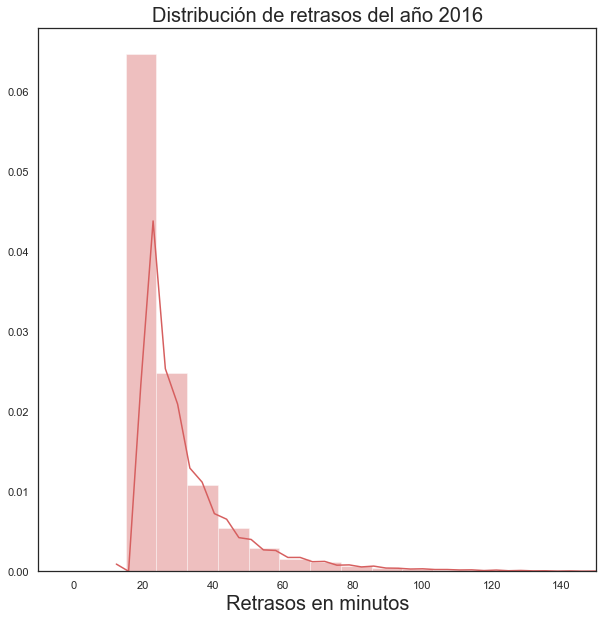

In [152]:
#acortamos la escala del eje X para verlo mejor
# distribución con densidad
sns.set(style="white", palette="muted", color_codes=True)

plt.figure(figsize=(10,10))

ax= sns.distplot(retrasosSoloDestino["ArrDelay"], color="r")
plt.xlim(-10,150)
ax.set_xlabel("Retrasos en minutos", fontsize=20)
ax.set_title('Distribución de retrasos del año ' + year, fontsize=20)



plt.show()

Quizás deberíamos cortar sobre los 100 minutos de retraso

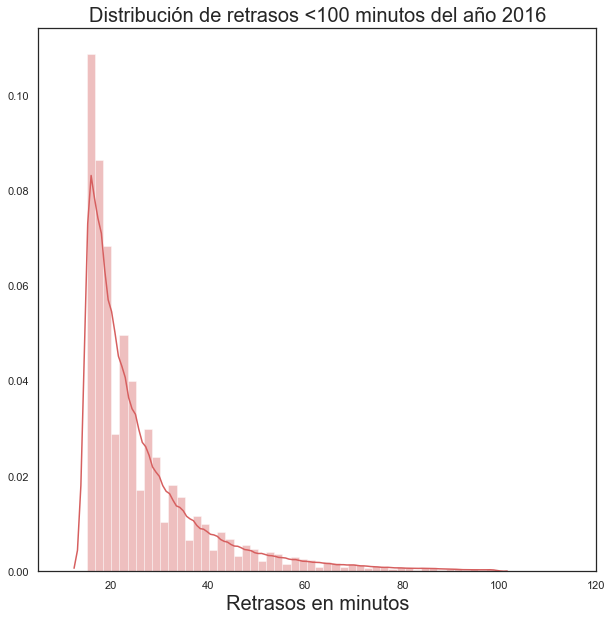

In [153]:
corte100Min = pd.DataFrame(retrasosSoloDestino[retrasosSoloDestino["ArrDelay"]<100])

# distribución con densidad
sns.set(style="white", palette="muted", color_codes=True)

plt.figure(figsize=(10,10))

ax= sns.distplot(corte100Min["ArrDelay"], color="r")
plt.xlim(5,120)
ax.set_xlabel("Retrasos en minutos", fontsize=20)
ax.set_title('Distribución de retrasos <100 minutos del año ' + year, fontsize=20)


plt.show()

In [154]:
retrasosDestinoPorDiaSemana = pd.DataFrame(dfanual[(dfanual['ArrDel15'] == 1) & (dfanual['DepDel15'] == 0)])

retrasosDestinoPorDiaSemana = pd.DataFrame(retrasosDestinoPorDiaSemana.groupby('DayOfWeek').aggregate({'DayOfWeek': 'count', 'ArrDelay':'mean'}))

In [155]:
retrasosDestinoPorDiaSemana

DayOfWeek   ArrDelay
DayOfWeek                      
1              31215  26.647926
2              30095  27.110151
3              31685  26.814770
4              36661  27.039442
5              34618  26.458721
6              21138  26.612925
7              27767  26.758958

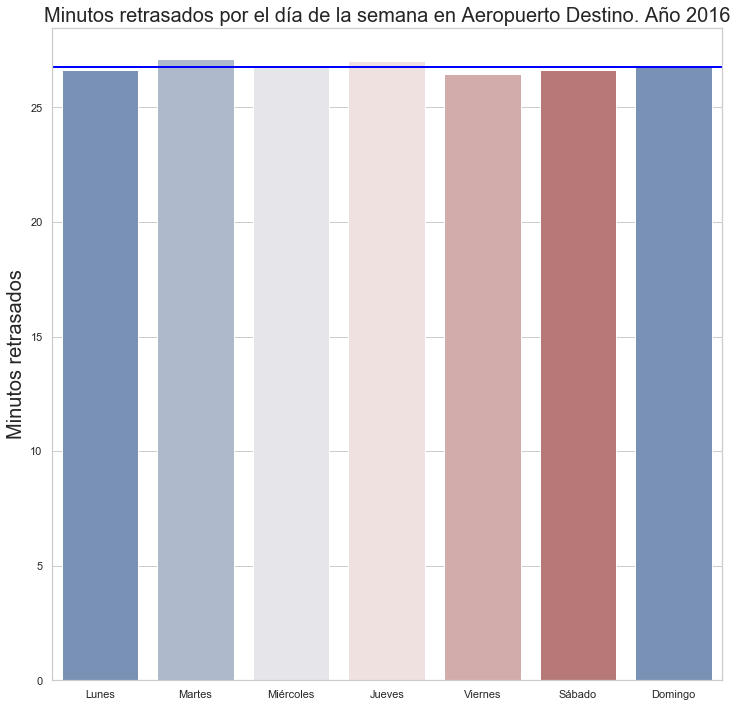

In [156]:

#Vuelos retrasados por el día de la semana

my_xticks=['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

plt.figure(figsize=(12,12))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=retrasosDestinoPorDiaSemana['ArrDelay'], palette=pal)


ax.set_ylabel("Minutos retrasados", fontsize=20)
ax.set_title('Minutos retrasados por el día de la semana en Aeropuerto Destino. Año ' + year, fontsize=20)

plt.axhline(retrasosDestinoPorDiaSemana['ArrDelay'].mean(), color='Blue', linewidth=2)

plt.show()

In [157]:
retrasosDestinoPorHoraDelDia = pd.DataFrame(dfanual[(dfanual['ArrDel15'] == 1) & (dfanual['DepDel15'] == 0)])

In [158]:
retrasosDestinoPorHoraDelDia = pd.DataFrame(retrasosDestinoPorHoraDelDia.groupby('ArrTimeBlk').aggregate({'ArrTimeBlk': 'count', 'ArrDelay':'mean'}))

In [159]:
retrasosDestinoPorHoraDelDia

ArrTimeBlk   ArrDelay
ArrTimeBlk                       
0001-0559         4702  25.138026
0600-0659         2420  24.425620
0700-0759         5361  26.033203
0800-0859         9930  26.095871
0900-0959        11956  25.912513
1000-1059        12660  26.116114
1100-1159        11458  25.843341
1200-1259        11078  25.960823
1300-1359        10955  25.705249
1400-1459        11369  25.803061
1500-1559        11396  26.730958
1600-1659        15925  27.438053
1700-1759        14387  27.603044
1800-1859        15528  28.023699
1900-1959        15013  28.177713
2000-2059        15420  27.962322
2100-2159        14766  27.313287
2200-2259        10382  26.979195
2300-2359         8473  26.382981

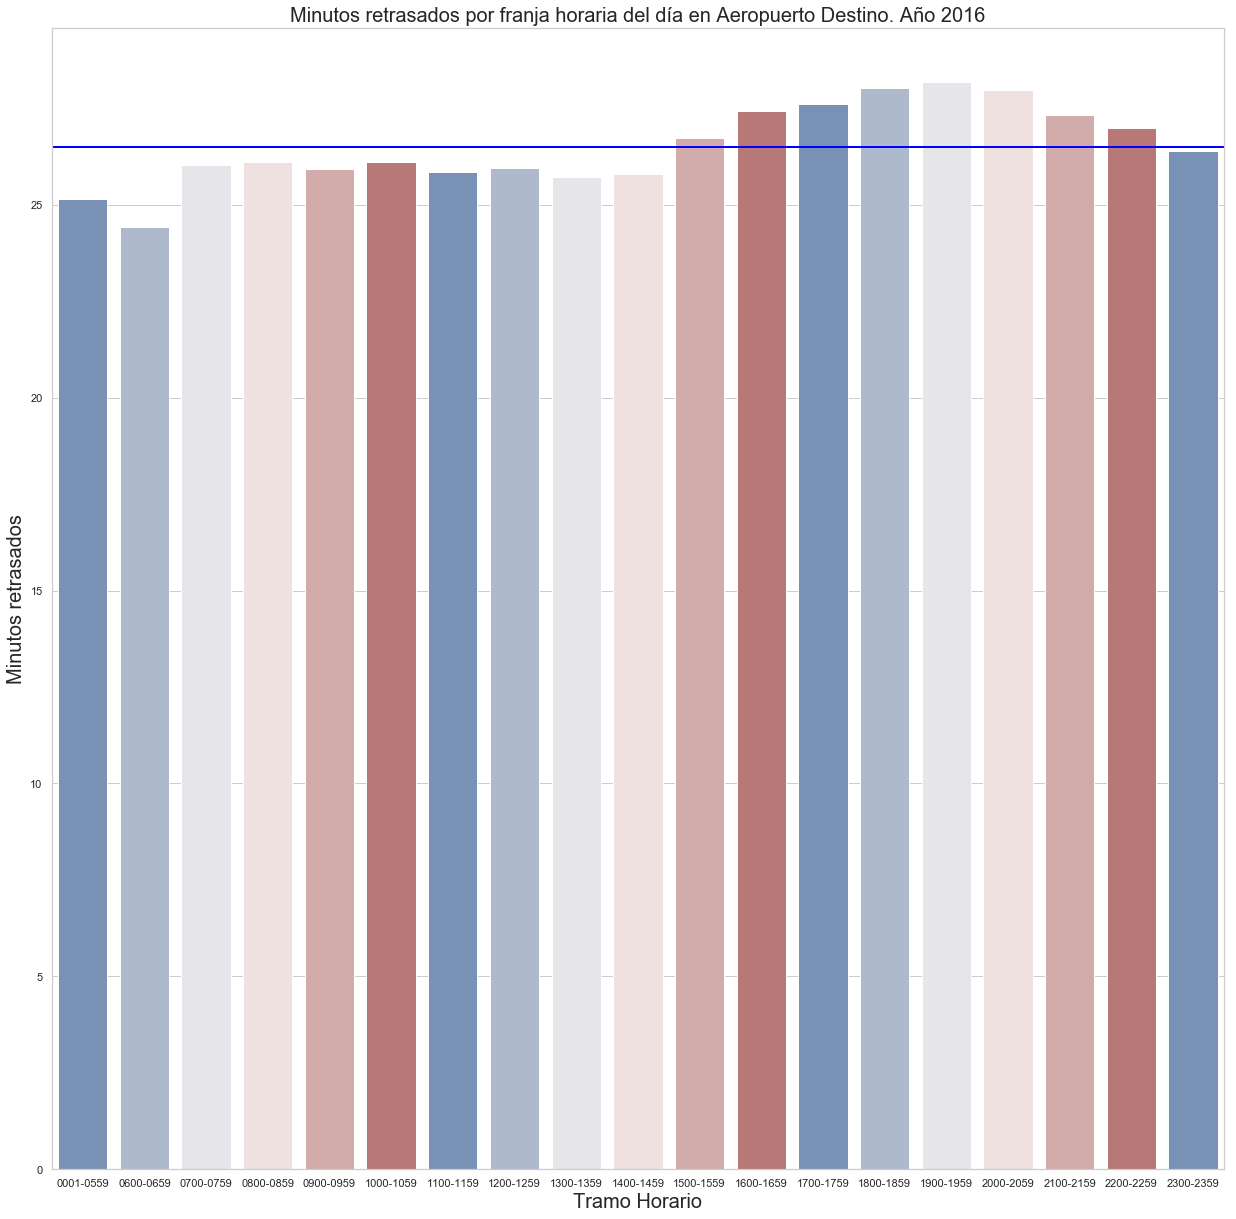

In [160]:

#Vuelos retrasados por franja horaria

plt.figure(figsize=(21,21))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=retrasosDestinoPorHoraDelDia.index, y=retrasosDestinoPorHoraDelDia['ArrDelay'], palette=pal)


ax.set_ylabel("Minutos retrasados", fontsize=20)
ax.set_xlabel("Tramo Horario", fontsize=20)
ax.set_title('Minutos retrasados por franja horaria del día en Aeropuerto Destino. Año ' + year, fontsize=20)

plt.axhline(retrasosDestinoPorHoraDelDia['ArrDelay'].mean(), color='Blue', linewidth=2)

plt.show()

In [161]:
retrasosDestinoPorDiaDelMes = pd.DataFrame(dfanual[(dfanual['ArrDel15'] == 1) & (dfanual['DepDel15'] == 0)])

In [162]:
retrasosDestinoPorDiaDelMes = pd.DataFrame(retrasosDestinoPorDiaDelMes.groupby('DayofMonth').aggregate({'DayofMonth': 'count', 'ArrDelay':'mean'}))

In [163]:
retrasosDestinoPorDiaDelMes

DayofMonth   ArrDelay
DayofMonth                       
1                 7339  27.338057
2                 6771  27.398169
3                 6098  25.826500
4                 6982  26.485534
5                 6290  27.421145
6                 6674  25.633653
7                 6816  25.899061
8                 7313  26.337891
9                 7430  26.239973
10                6816  25.530957
11                7151  26.998322
12                6987  25.756834
13                6952  26.416858
14                7116  26.659078
15                8308  27.076914
16                7445  27.712424
17                7649  27.947706
18                7734  26.649599
19                6953  26.804976
20                6328  25.594027
21                7460  28.216756
22                6555  25.390694
23                6579  27.835233
24                6473  27.513518
25                5867  27.053179
26                7365  27.876171
27                7259  26.771456
28                7707  27.710004
29                6407  25.792883
30                6507  26.768250
31                3848  27.156445

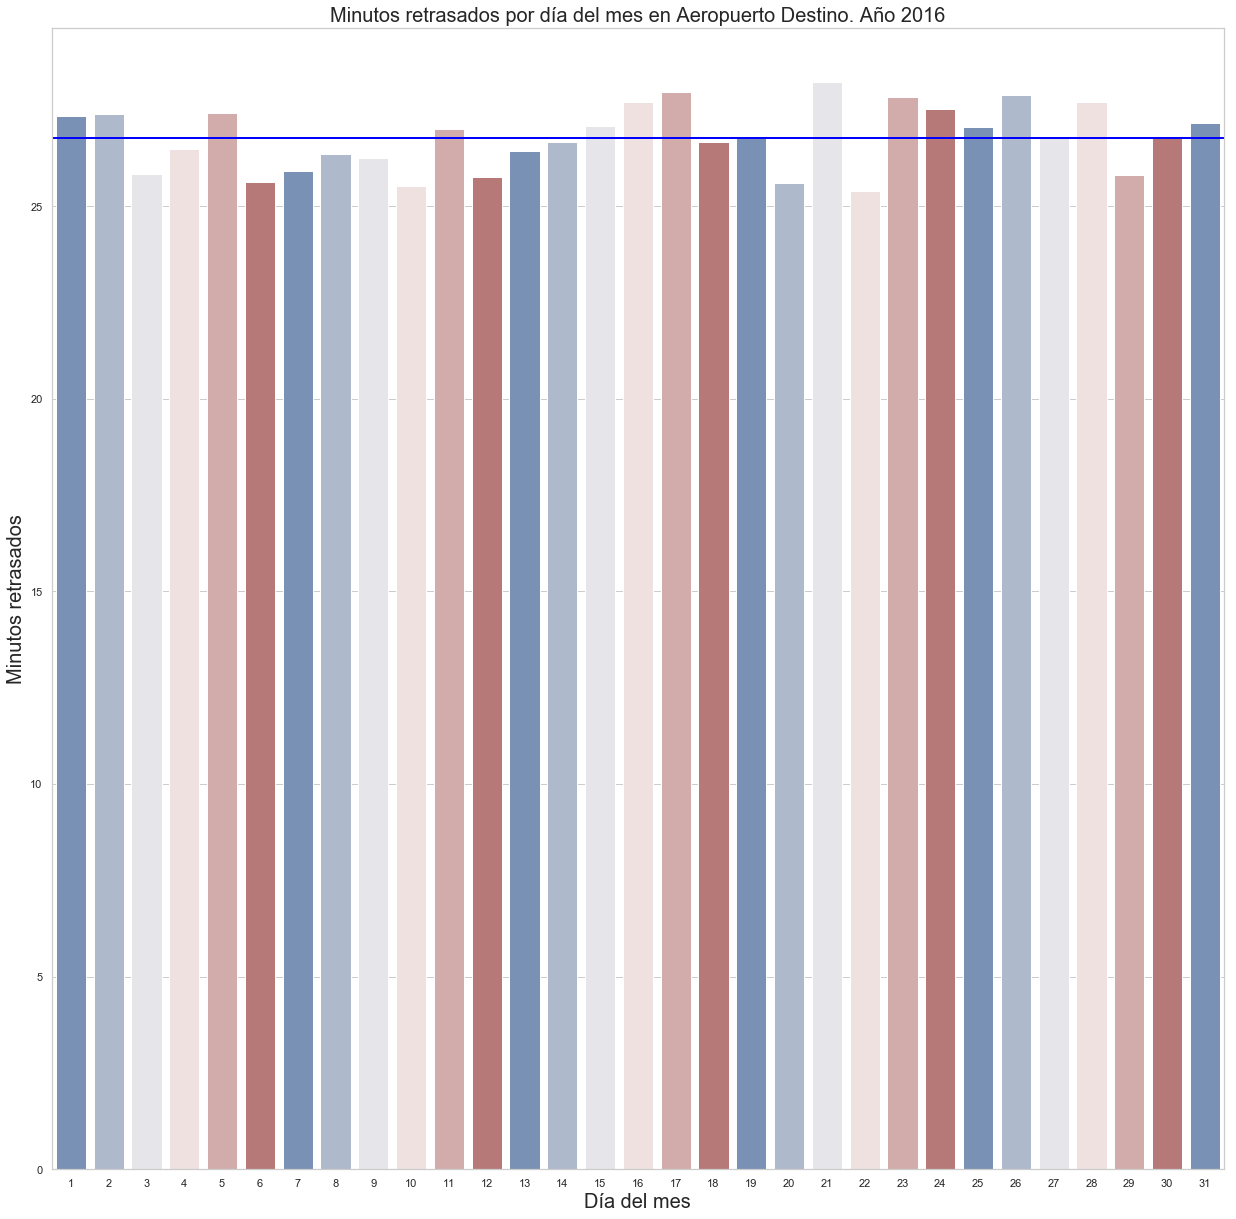

In [164]:

#Vuelos retrasados por dia del mes 

plt.figure(figsize=(21,21))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=retrasosDestinoPorDiaDelMes.index, y=retrasosDestinoPorDiaDelMes['ArrDelay'], palette=pal)


ax.set_ylabel("Minutos retrasados", fontsize=20)
ax.set_xlabel("Día del mes", fontsize=20)
ax.set_title('Minutos retrasados por día del mes en Aeropuerto Destino. Año ' + year, fontsize=20)

plt.axhline(retrasosDestinoPorDiaDelMes['ArrDelay'].mean(), color='Blue', linewidth=2)

plt.show() 

In [165]:
retrasosDestinoPorTrimestre = pd.DataFrame(dfanual[(dfanual['ArrDel15'] == 1) & (dfanual['DepDel15'] == 0)])

In [166]:
retrasosDestinoPorTrimestre = pd.DataFrame(retrasosDestinoPorTrimestre.groupby('Quarter').aggregate({'Quarter': 'count', 'ArrDelay':'mean'}))

In [167]:
retrasosDestinoPorTrimestre

Quarter   ArrDelay
Quarter                    
1          50185  26.153273
2          53152  27.064099
3          56196  28.173500
4          53646  25.647224

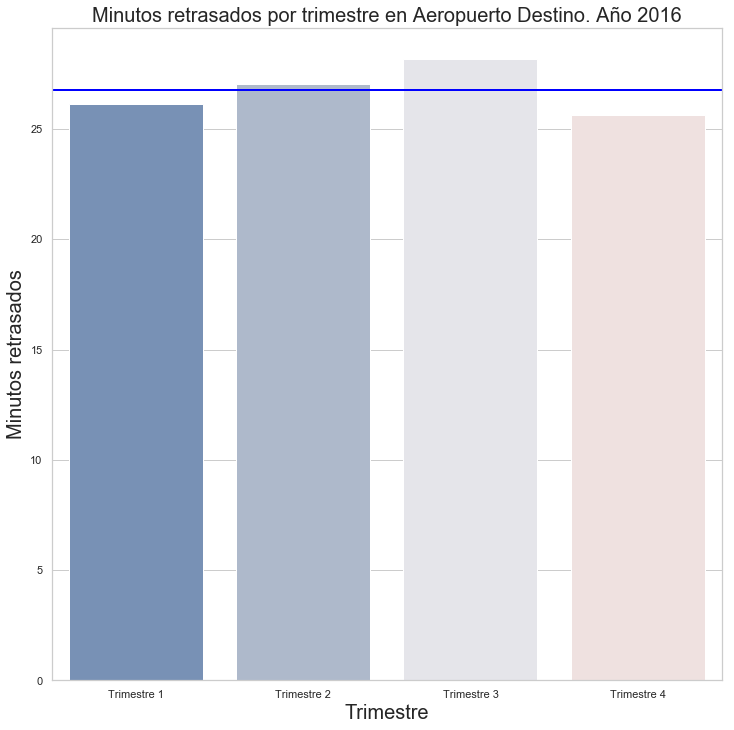

In [168]:
#Vuelos retrasados por trimestre 

plt.figure(figsize=(12,12))

my_xticks=['Trimestre 1', 'Trimestre 2', 'Trimestre 3', 'Trimestre 4']

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=retrasosDestinoPorTrimestre['ArrDelay'], palette=pal)


ax.set_ylabel("Minutos retrasados", fontsize=20)
ax.set_xlabel("Trimestre", fontsize=20)
ax.set_title('Minutos retrasados por trimestre en Aeropuerto Destino. Año ' + year, fontsize=20)

plt.axhline(retrasosDestinoPorDiaDelMes['ArrDelay'].mean(), color='Blue', linewidth=2)

plt.show()

### 1.3.5.1.1 Ranking de aeropuertos en Retrasos sólo en Destino

In [169]:
dfanual[(dfanual['ArrDel15'] == 1) & (dfanual['DepDel15'] == 0)].Dest.value_counts(sort=True).head(15)

LAX    17514
ORD    11760
ATL    10361
DFW     8401
DEN     8258
SFO     7975
SEA     6506
PHX     6265
BOS     5333
MCO     5273
CLT     5259
LGA     5109
EWR     4913
IAH     4811
LAS     4771
Name: Dest, dtype: int64

In [170]:
#primero cogemos los 45 aeropuertos (de destino) con mayor número de retrasos
retrasosSoloDestinoEnAeropuertos = pd.DataFrame(dfanual[(dfanual['ArrDel15'] == 1) & (dfanual['DepDel15'] == 0)].Dest.value_counts(sort=True)).head(45)

In [171]:
#retrasos totales de esos 45 aeropuerto
retrasosSoloDestinoEnAeropuertos.sum()

Dest    180020
dtype: int64

In [172]:
#el 80% de los retrasos acumulados en todo el año se concentran en 45 aeropuertos, de los 300 de media que tenemos por año
pct80AeropuertosDestino = ((retrasosSoloDestinoEnAeropuertos.sum() / (len(dfanual[(dfanual['ArrDel15'] == 1) & (dfanual['DepDel15'] == 0)])))) *100

In [173]:
pct80AeropuertosDestino

Dest    84.445466
dtype: float64

In [174]:
print('45 aeropuertos concentran el %.2f' %pct80AeropuertosDestino + '% de los retrasos (solo en destino) del año ' + year)

45 aeropuertos concentran el 84.45% de los retrasos (solo en destino) del año 2016


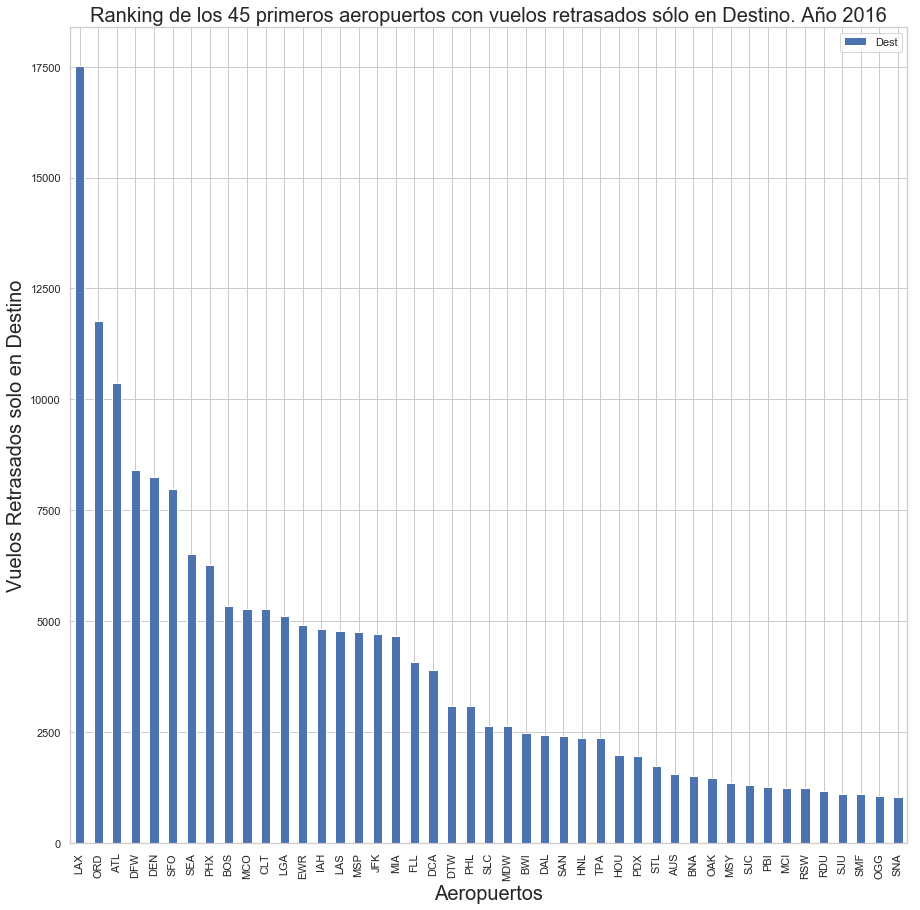

In [175]:
ax = retrasosSoloDestinoEnAeropuertos.plot(kind='bar', figsize=(15,15))

ax.set_ylabel("Vuelos Retrasados solo en Destino", fontsize=20)
ax.set_xlabel("Aeropuertos", fontsize=20)
ax.set_title('Ranking de los 45 primeros aeropuertos con vuelos retrasados sólo en Destino. Año ' + year , fontsize=20)

plt.show()

De estos, ATL (Atlanta), ORD (Chicago) y DEN(Denver) repiten 2 como los 3 primeros, al igual que en Origen, pero se añaden IAH(Houston) y DFW (Dallas) como significativos, entre los 5 concentran más del 35% de los retrasos.
Sigue siendo un factor clave, ser aeropuerto Hub, distribuidor de tráfico de interconexión con otros destinos, como elemento de demoras en la red.

In [176]:
retrasosSoloDestinoEnAeropuertos = retrasosSoloDestinoEnAeropuertos.reset_index()
retrasosSoloDestinoEnAeropuertos.columns = ['Destination','ArrDelay']

In [177]:
retrasosSoloDestinoEnAeropuertos.head(45)

Destination  ArrDelay
0          LAX     17514
1          ORD     11760
2          ATL     10361
3          DFW      8401
4          DEN      8258
5          SFO      7975
6          SEA      6506
7          PHX      6265
8          BOS      5333
9          MCO      5273
10         CLT      5259
11         LGA      5109
12         EWR      4913
13         IAH      4811
14         LAS      4771
15         MSP      4743
16         JFK      4697
17         MIA      4655
18         FLL      4077
19         DCA      3905
20         DTW      3091
21         PHL      3076
22         SLC      2631
23         MDW      2625
24         BWI      2480
25         DAL      2430
26         SAN      2401
27         HNL      2368
28         TPA      2364
29         HOU      1979
30         PDX      1946
31         STL      1720
32         AUS      1550
33         BNA      1501
34         OAK      1463
35         MSY      1350
36         SJC      1290
37         PBI      1257
38         MCI      1235
39         RSW      1229
40         RDU      1155
41         SJU      1106
42         SMF      1100
43         OGG      1048
44         SNA      1039

In [178]:
#nos quedamos con los identificadores de los aeropuertos para poder filtrarlos en el 
aeropuertos = retrasosSoloDestinoEnAeropuertos["Destination"].values.tolist()

In [179]:
#nos quedamos con los datos de esos aeropuertos
retrasosSoloDestinoEnAeropuertos = dfanual.loc[(dfanual["Dest"].isin(aeropuertos))]

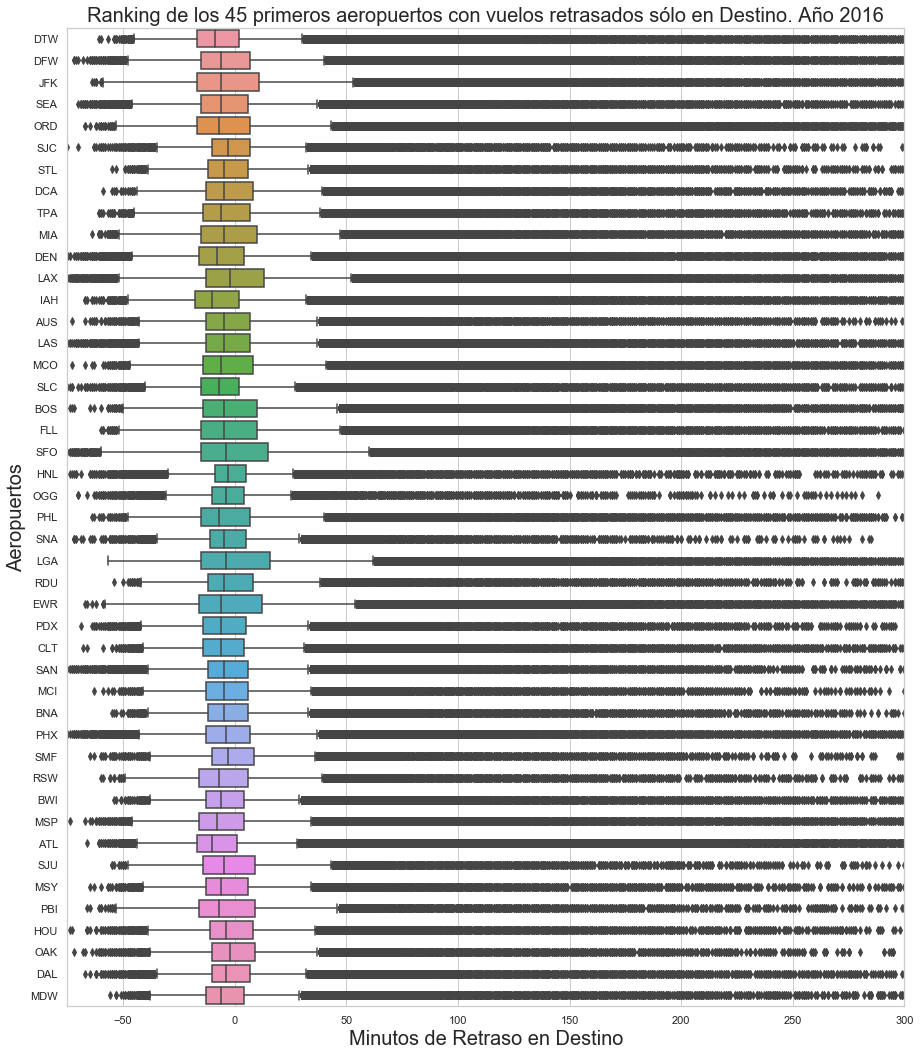

In [180]:
sns.set(style="whitegrid")
plt.figure(figsize=(15,18))
plt.xlim(-75,300)
ax = sns.boxplot(x=retrasosSoloDestinoEnAeropuertos["ArrDelay"], y=retrasosSoloDestinoEnAeropuertos["Dest"])

ax.set_ylabel("Aeropuertos", fontsize=20)
ax.set_xlabel("Minutos de Retraso en Destino", fontsize=20)
ax.set_title('Ranking de los 45 primeros aeropuertos con vuelos retrasados sólo en Destino. Año ' + year , fontsize=20)

plt.show()

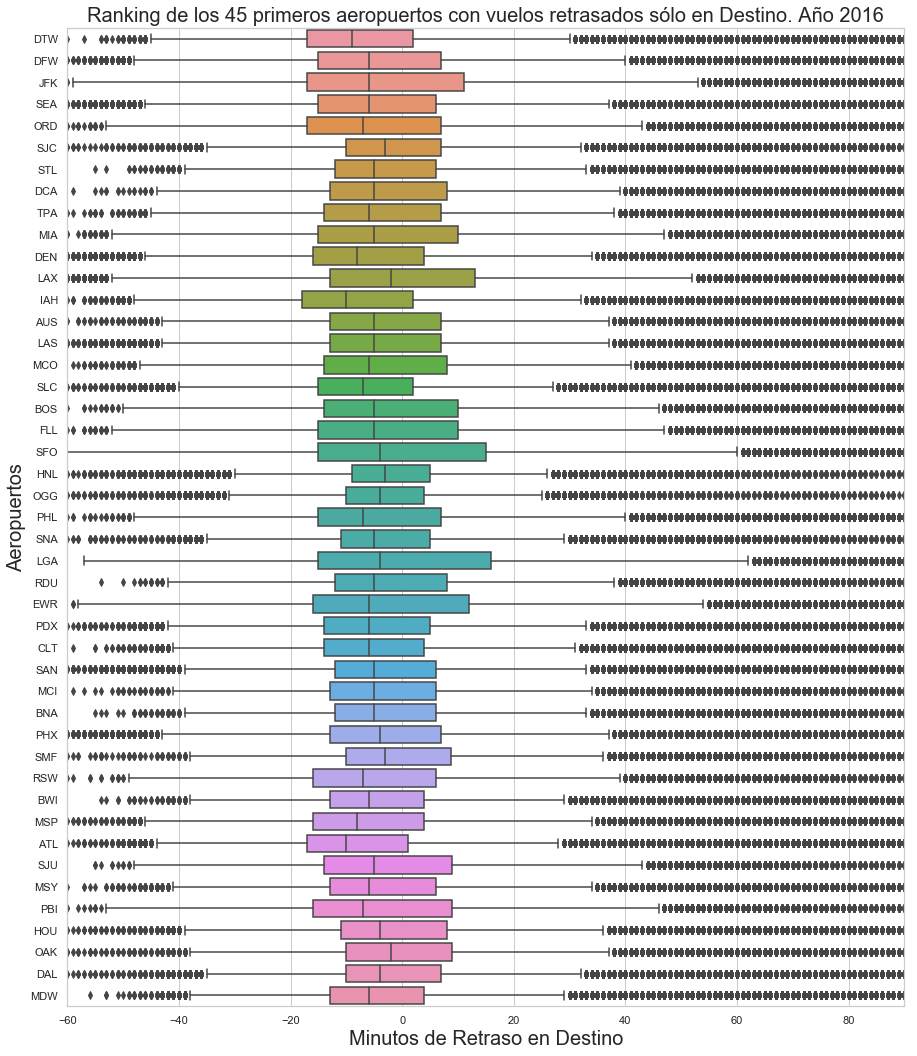

In [181]:
#vamos a despejar un poco el gráfico
sns.set(style="whitegrid")
plt.figure(figsize=(15,18))
plt.xlim(-60,90)
ax = sns.boxplot(x=retrasosSoloDestinoEnAeropuertos["ArrDelay"], y=retrasosSoloDestinoEnAeropuertos["Dest"])

ax.set_ylabel("Aeropuertos", fontsize=20)
ax.set_xlabel("Minutos de Retraso en Destino", fontsize=20)
ax.set_title('Ranking de los 45 primeros aeropuertos con vuelos retrasados sólo en Destino. Año ' + year , fontsize=20)


plt.show()

Podemos apreciar que hay una gran cantidad de vuelos con adelanto, es decir, que tendremos que si queremos quedarnos solo con retrasos de verdad y sacar sus estadísticos debemos eliminar las muestras con adelanto.

In [182]:
retrasosSoloDestinoEnAeropuertosSinAdelantos = pd.DataFrame(retrasosSoloDestinoEnAeropuertos[(retrasosSoloDestinoEnAeropuertos['ArrDelay'] > 15)])



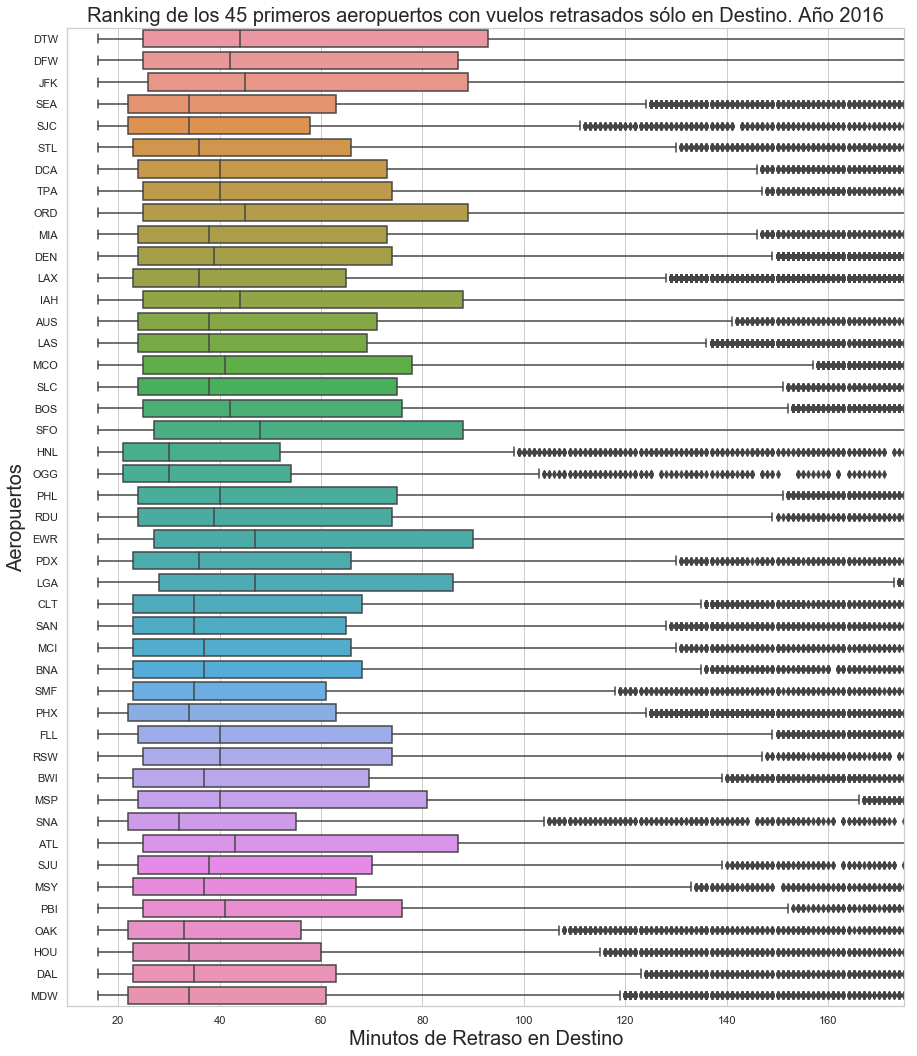

In [183]:
#vamos a despejar un poco el gráfico
sns.set(style="whitegrid")
plt.figure(figsize=(15,18))
plt.xlim(10,175)
ax = sns.boxplot(x=retrasosSoloDestinoEnAeropuertosSinAdelantos["ArrDelay"], y=retrasosSoloDestinoEnAeropuertosSinAdelantos["Dest"])

ax.set_ylabel("Aeropuertos", fontsize=20)
ax.set_xlabel("Minutos de Retraso en Destino", fontsize=20)
ax.set_title('Ranking de los 45 primeros aeropuertos con vuelos retrasados sólo en Destino. Año ' + year , fontsize=20)


plt.show()

In [184]:
#me quedo con la agrupación por aeropuertos con su total de vuelos y su total de retrasos en sólo destino 
vuelosTotalesPorAeropuerto = retrasosSoloDestinoEnAeropuertos.groupby('Dest').aggregate({'Dest': 'count', 'ArrDel15':'sum'})

In [185]:
#renombramos columnas
vuelosTotalesPorAeropuerto = vuelosTotalesPorAeropuerto.rename(columns={'Dest': 'VuelosTotales', 'ArrDel15': 'VuelosRetrasados'})

In [186]:
#calulamos el porcentaje de vuelos retrasados sonbre el total de vuelos operados sólo en destino en el año
vuelosTotalesPorAeropuerto['PctVuelosRetrasados'] = (vuelosTotalesPorAeropuerto['VuelosRetrasados'] / vuelosTotalesPorAeropuerto['VuelosTotales']) * 100

In [187]:
#ordenamos por aeropuertos con mayor porcentaje de vuelos retrasados de sólo en destino en el año
vuelosTotalesPorAeropuerto = vuelosTotalesPorAeropuerto.sort_values(['PctVuelosRetrasados'], ascending=False)

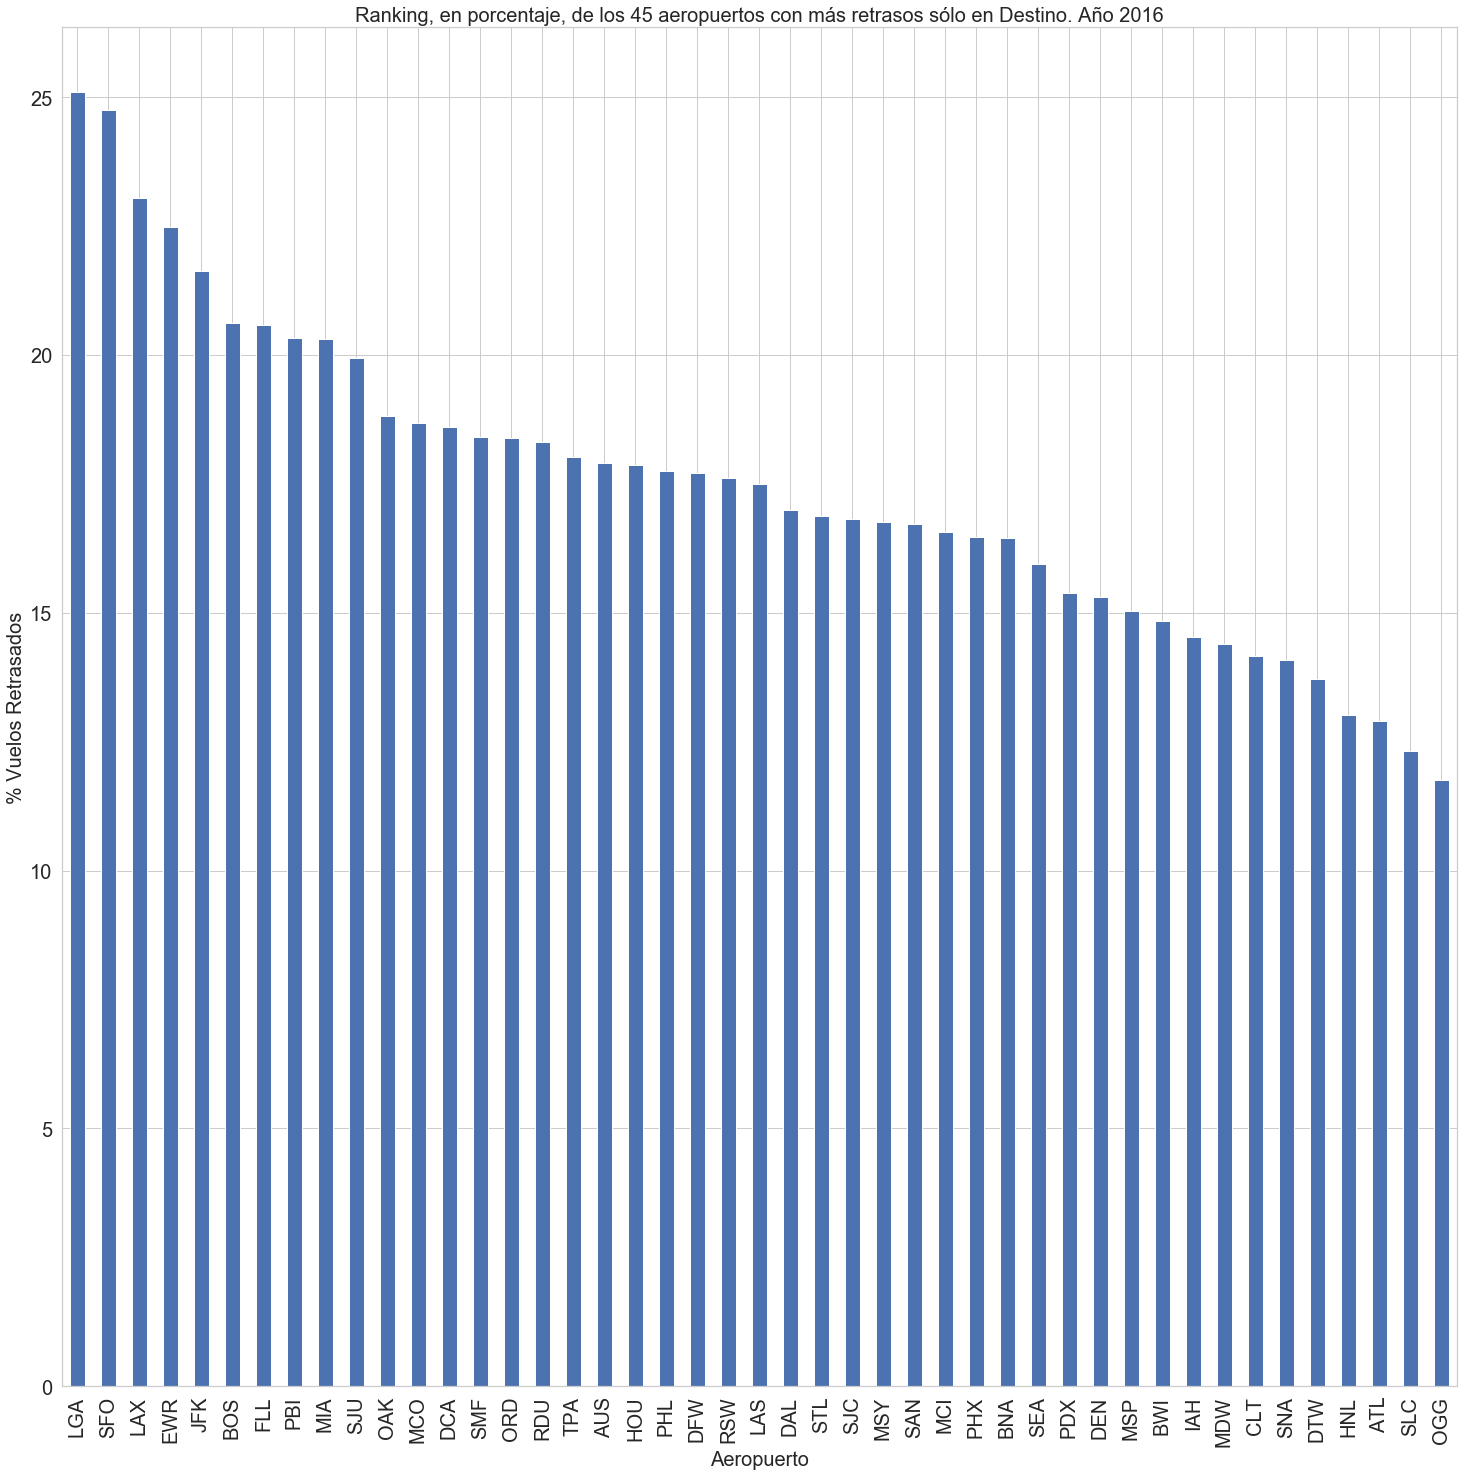

In [188]:
#mostramos el porcentaje de retrasos, ordenados, de los 45 aeropuertos con más retrasos sólo en Destino

ax = vuelosTotalesPorAeropuerto.PctVuelosRetrasados.plot(kind='bar', figsize=(25,25), fontsize=20)

ax.set_xlabel("Aeropuerto", fontsize=20)
ax.set_ylabel("% Vuelos Retrasados", fontsize=20)
ax.set_title('Ranking, en porcentaje, de los 45 aeropuertos con más retrasos sólo en Destino. Año ' + year, fontsize=20)

plt.show()

Por porcentaje sobre su total de vuelos, destaca enormemente los 3 aeropuertos principales del área de Nueva York, EWR, LGA y JFK. Y en los 10 primeros 9 de ellos son de la Costa Este y Puerto Rico, sólo SFO (San Francisco) es de la Costa Oeste.

### 1.3.5.1.2 Retraso Destino (CON o SIN retraso en Origen)

En el apartado anterior sólo mostrábamos vuelos que se habían retrasado sólo en Destino y que salieron puntuales en Origen

In [189]:
#vuelos retrasados en Destino saliesen o no retrasados en origen
retrasosDestino = pd.DataFrame(dfanual[(dfanual['ArrDel15'] == 1)])

In [190]:
retrasos = pd.DataFrame(retrasosDestino['ArrDelay'])

retrasos.head(5)

ArrDelay
4      113.0
15      21.0
22      15.0
24      63.0
26      32.0

In [191]:
retrasos.describe().T

count       mean        std   min   25%   50%   75%     max
ArrDelay  964239.0  62.070047  73.176806  15.0  23.0  38.0  73.0  2142.0

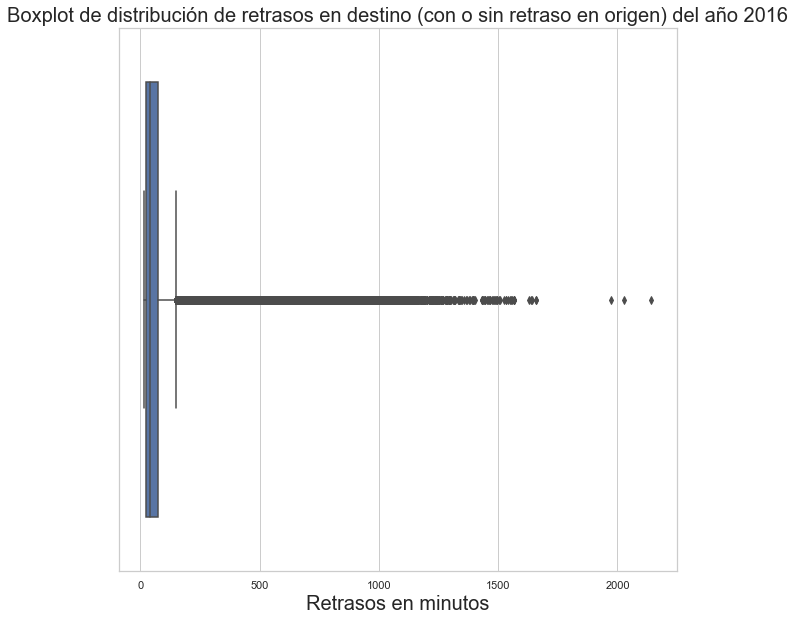

In [192]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,10))
ax = sns.boxplot(x=retrasos["ArrDelay"])
ax.set_xlabel("Retrasos en minutos", fontsize=20)
ax.set_title('Boxplot de distribución de retrasos en destino (con o sin retraso en origen) del año ' + year, fontsize=20)
plt.show()

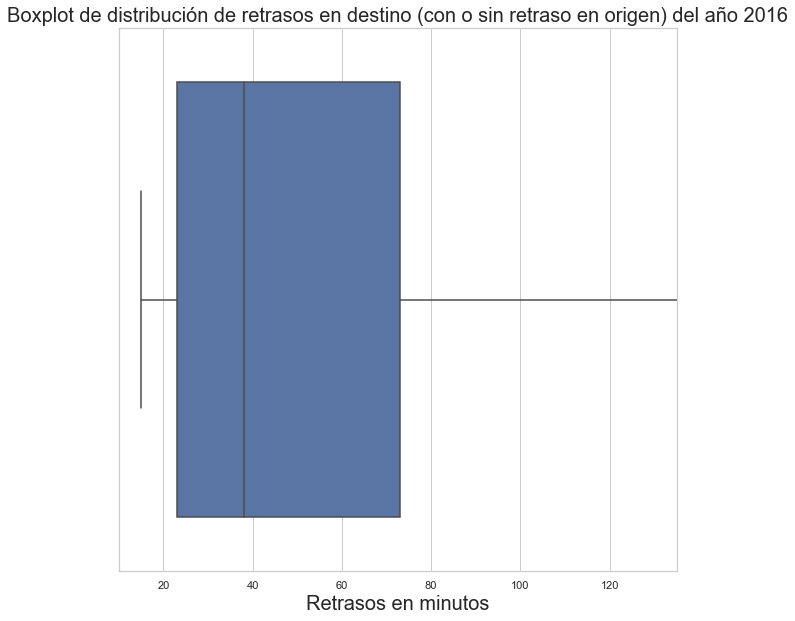

In [193]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,10))
plt.xlim(10,135)
ax = sns.boxplot(x=retrasos["ArrDelay"])
ax.set_xlabel("Retrasos en minutos", fontsize=20)
ax.set_title('Boxplot de distribución de retrasos en destino (con o sin retraso en origen) del año ' + year, fontsize=20)
plt.show()

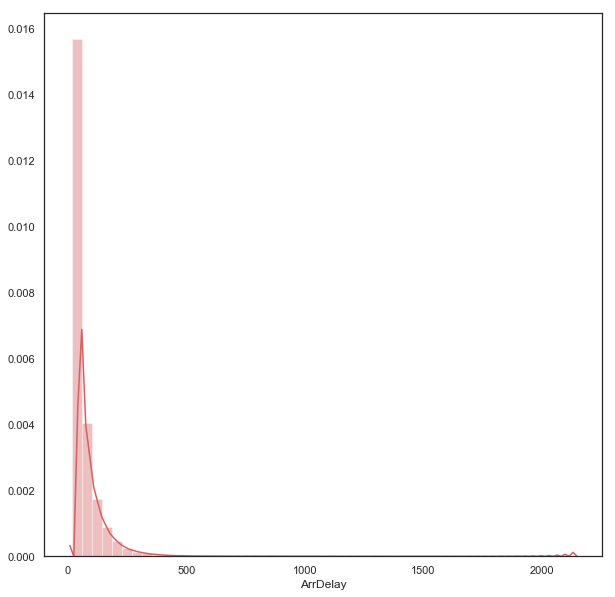

In [194]:
# distribución con densidad
sns.set(style="white", palette="muted", color_codes=True)

plt.figure(figsize=(10,10))

sns.distplot(retrasos["ArrDelay"], color="r")

plt.show()

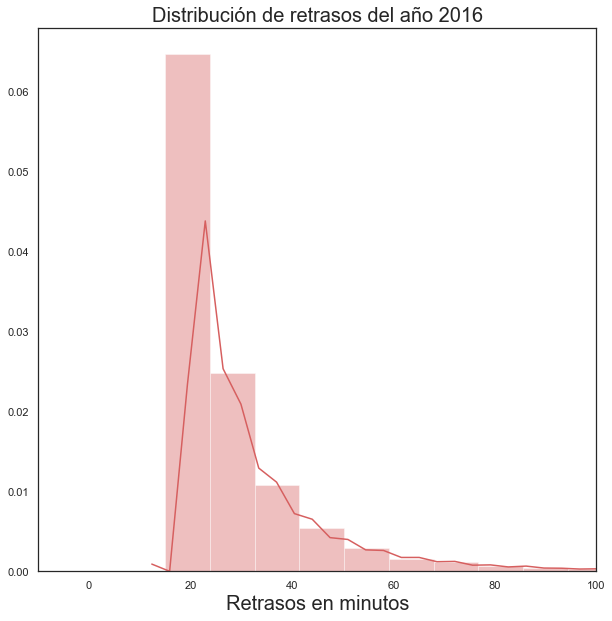

In [195]:
#acortamos la escala del eje X para verlo mejor
# distribución con densidad
sns.set(style="white", palette="muted", color_codes=True)

plt.figure(figsize=(10,10))

ax= sns.distplot(retrasosSoloDestino["ArrDelay"], color="r")
plt.xlim(-10,100)
ax.set_xlabel("Retrasos en minutos", fontsize=20)
ax.set_title('Distribución de retrasos del año ' + year, fontsize=20)



plt.show()

In [196]:
retrasosDestinoPorMes = pd.DataFrame(dfanual[(dfanual['ArrDel15'] == 1)])

retrasosDestinoPorMes = pd.DataFrame(retrasosDestinoPorMes.groupby('Month').aggregate({'Month': 'count', 'ArrDelay':'mean'}))


In [197]:
retrasosDestinoPorMes

Month   ArrDelay
Month                   
1       70882  58.154807
2       61680  64.777691
3       82569  58.878877
4       66607  57.782771
5       75498  58.501073
6      100361  63.772182
7      113601  71.282181
8      103421  67.894722
9       63686  57.584697
10      63470  55.357145
11      58871  55.549422
12     103593  64.047841

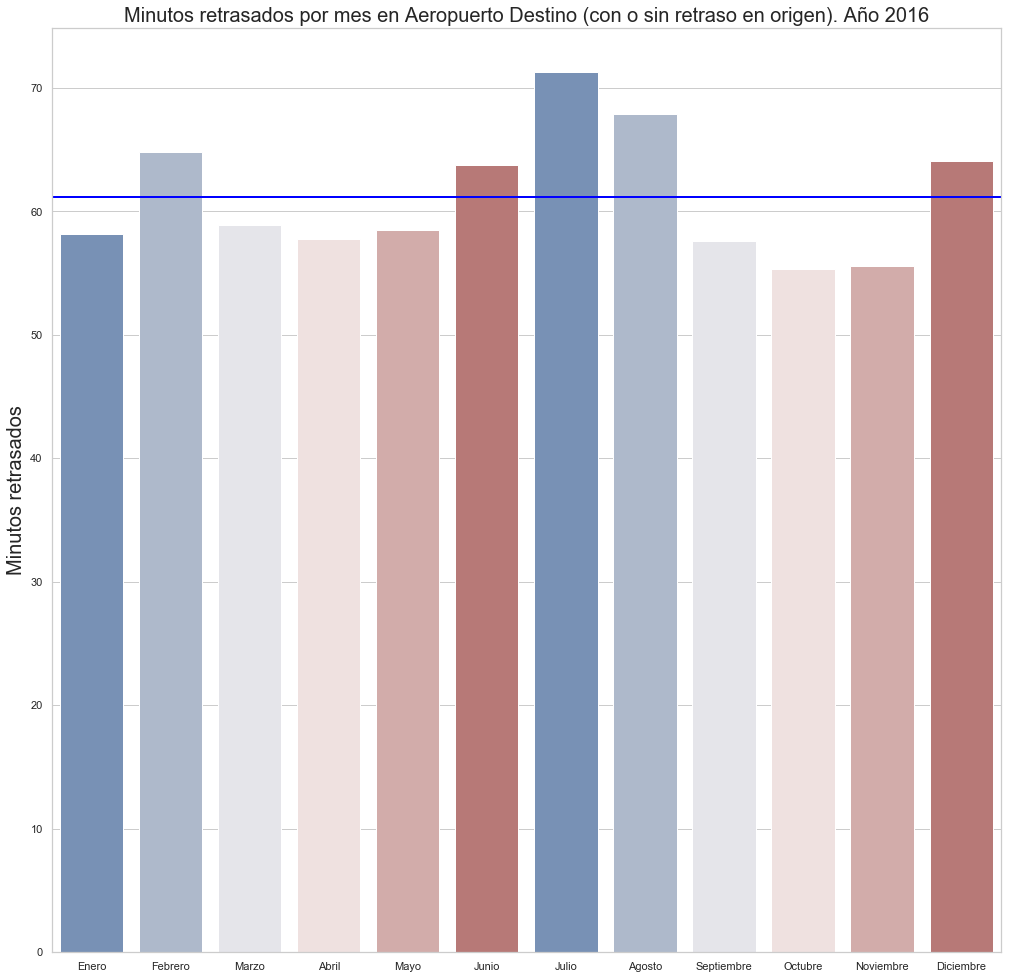

In [198]:

#Vuelos retrasados por el día de la semana

my_xticks=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

plt.figure(figsize=(17,17))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=retrasosDestinoPorMes['ArrDelay'], palette=pal)


ax.set_ylabel("Minutos retrasados", fontsize=20)
ax.set_title('Minutos retrasados por mes en Aeropuerto Destino (con o sin retraso en origen). Año ' + year, fontsize=20)

plt.axhline(retrasosDestinoPorMes['ArrDelay'].mean(), color='Blue', linewidth=2)

plt.show()

In [199]:
retrasosDestinoPorDiaSemana = pd.DataFrame(dfanual[(dfanual['ArrDel15'] == 1)])

retrasosDestinoPorDiaSemana = pd.DataFrame(retrasosDestinoPorDiaSemana.groupby('DayOfWeek').aggregate({'DayOfWeek': 'count', 'ArrDelay':'mean'}))


In [200]:
retrasosDestinoPorDiaSemana

DayOfWeek   ArrDelay
DayOfWeek                      
1             144435  62.434355
2             130434  62.050163
3             130750  60.422815
4             160151  60.585772
5             162460  62.279109
6             101999  64.763017
7             134010  62.774577

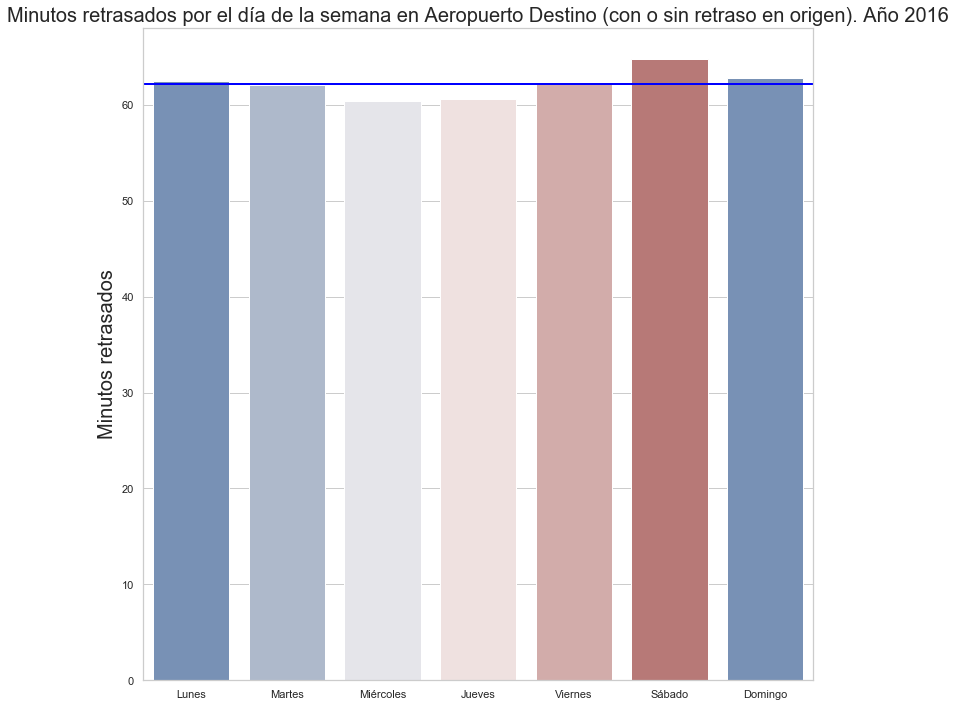

In [201]:

#Vuelos retrasados por el día de la semana

my_xticks=['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

plt.figure(figsize=(12,12))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=retrasosDestinoPorDiaSemana['ArrDelay'], palette=pal)


ax.set_ylabel("Minutos retrasados", fontsize=20)
ax.set_title('Minutos retrasados por el día de la semana en Aeropuerto Destino (con o sin retraso en origen). Año ' + year, fontsize=20)

plt.axhline(retrasosDestinoPorDiaSemana['ArrDelay'].mean(), color='Blue', linewidth=2)

plt.show()

In [202]:
retrasosDestinoPorHoraDelDia = pd.DataFrame(dfanual[(dfanual['ArrDel15'] == 1)])
retrasosDestinoPorHoraDelDia = pd.DataFrame(retrasosDestinoPorHoraDelDia.groupby('ArrTimeBlk').aggregate({'ArrTimeBlk': 'count', 'ArrDelay':'mean'}))

In [203]:
retrasosDestinoPorHoraDelDia

ArrTimeBlk   ArrDelay
ArrTimeBlk                       
0001-0559        33816  60.637923
0600-0659         9358  70.271212
0700-0759        15339  74.253602
0800-0859        24626  64.510274
0900-0959        33451  61.144450
1000-1059        37571  57.701951
1100-1159        40800  59.156887
1200-1259        42532  57.554641
1300-1359        46761  57.722076
1400-1459        50963  59.696505
1500-1559        52251  60.297946
1600-1659        69013  61.131830
1700-1759        68241  61.921631
1800-1859        74916  63.441828
1900-1959        76904  64.724670
2000-2059        80038  64.679640
2100-2159        84063  64.396381
2200-2259        67152  63.311964
2300-2359        56444  60.789048

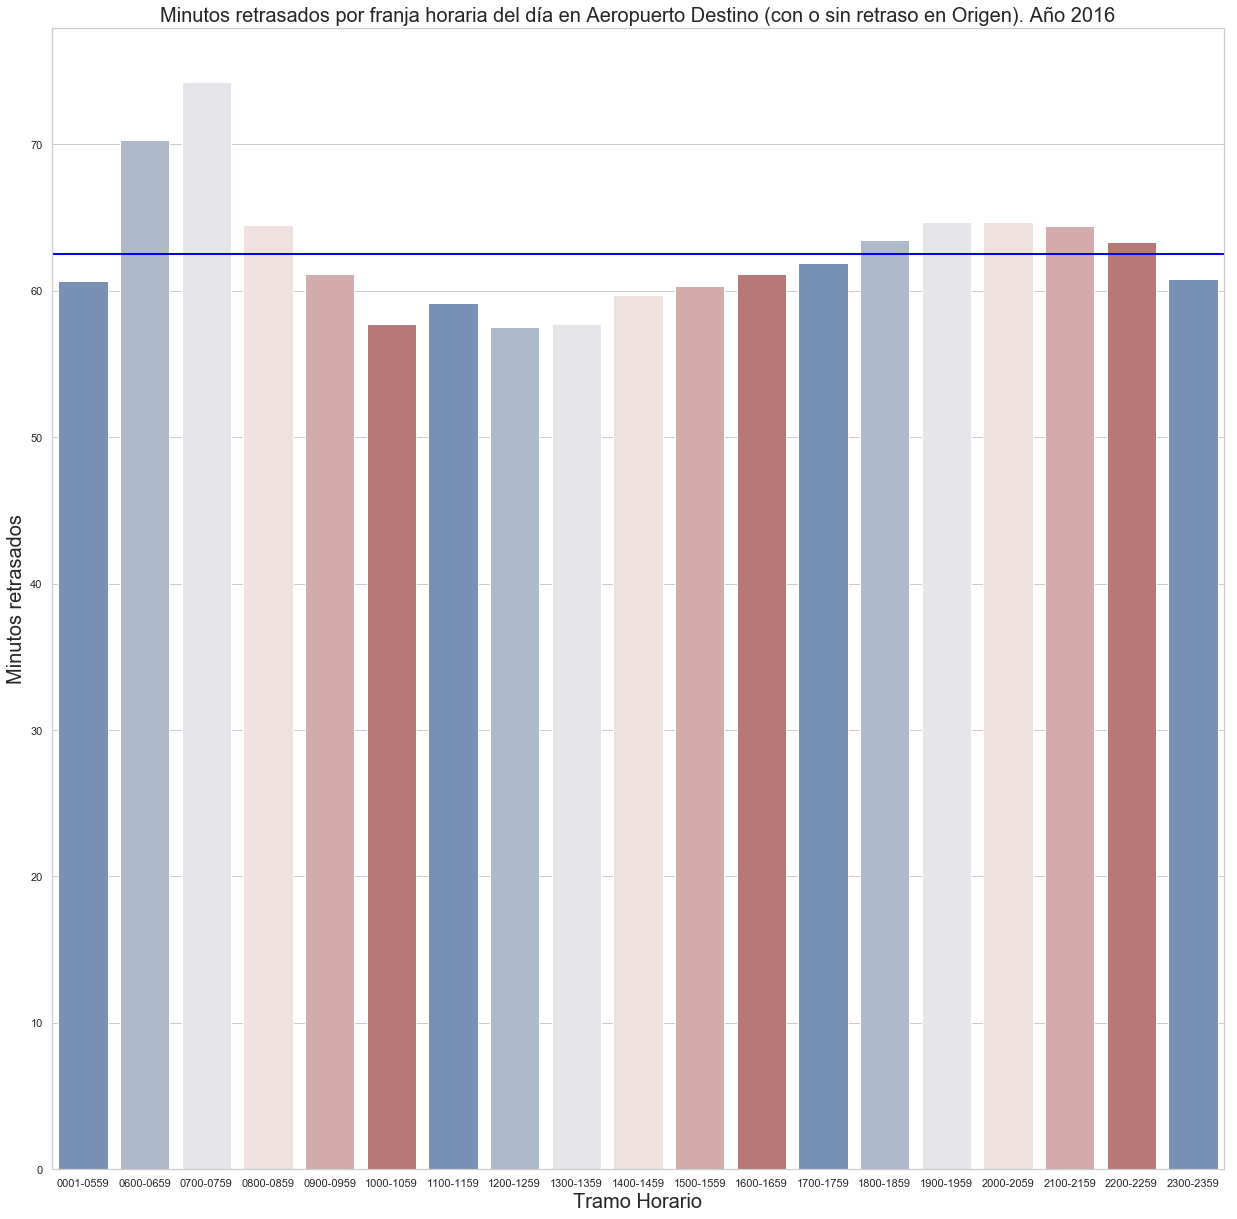

In [204]:
#Vuelos retrasados por franja horaria

plt.figure(figsize=(21,21))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=retrasosDestinoPorHoraDelDia.index, y=retrasosDestinoPorHoraDelDia['ArrDelay'], palette=pal)


ax.set_ylabel("Minutos retrasados", fontsize=20)
ax.set_xlabel("Tramo Horario", fontsize=20)
ax.set_title('Minutos retrasados por franja horaria del día en Aeropuerto Destino (con o sin retraso en Origen). Año ' + year, fontsize=20)

plt.axhline(retrasosDestinoPorHoraDelDia['ArrDelay'].mean(), color='Blue', linewidth=2)

plt.show()

In [205]:
retrasosDestinoPorDiaDelMes = pd.DataFrame(dfanual[(dfanual['ArrDel15'] == 1)])
retrasosDestinoPorDiaDelMes = pd.DataFrame(retrasosDestinoPorDiaDelMes.groupby('DayofMonth').aggregate({'DayofMonth': 'count', 'ArrDelay':'mean'}))

In [206]:
retrasosDestinoPorDiaDelMes

DayofMonth   ArrDelay
DayofMonth                       
1                32633  62.355989
2                32491  65.554400
3                26440  55.118608
4                28985  60.819389
5                29818  62.275136
6                28549  58.582647
7                28082  57.016416
8                32584  68.267432
9                30863  60.788355
10               29701  59.306286
11               30623  59.006368
12               28894  60.755451
13               29712  61.213685
14               32699  61.994862
15               36411  61.432122
16               33925  64.465940
17               35902  68.755947
18               39023  63.191989
19               34097  61.726340
20               29543  60.875876
21               35242  65.763010
22               32529  59.334901
23               30501  61.492017
24               29728  64.917283
25               28070  64.488849
26               34400  61.732006
27               30804  59.741397
28               34925  63.391324
29               30443  59.705877
30               28934  62.018248
31               17688  65.010459

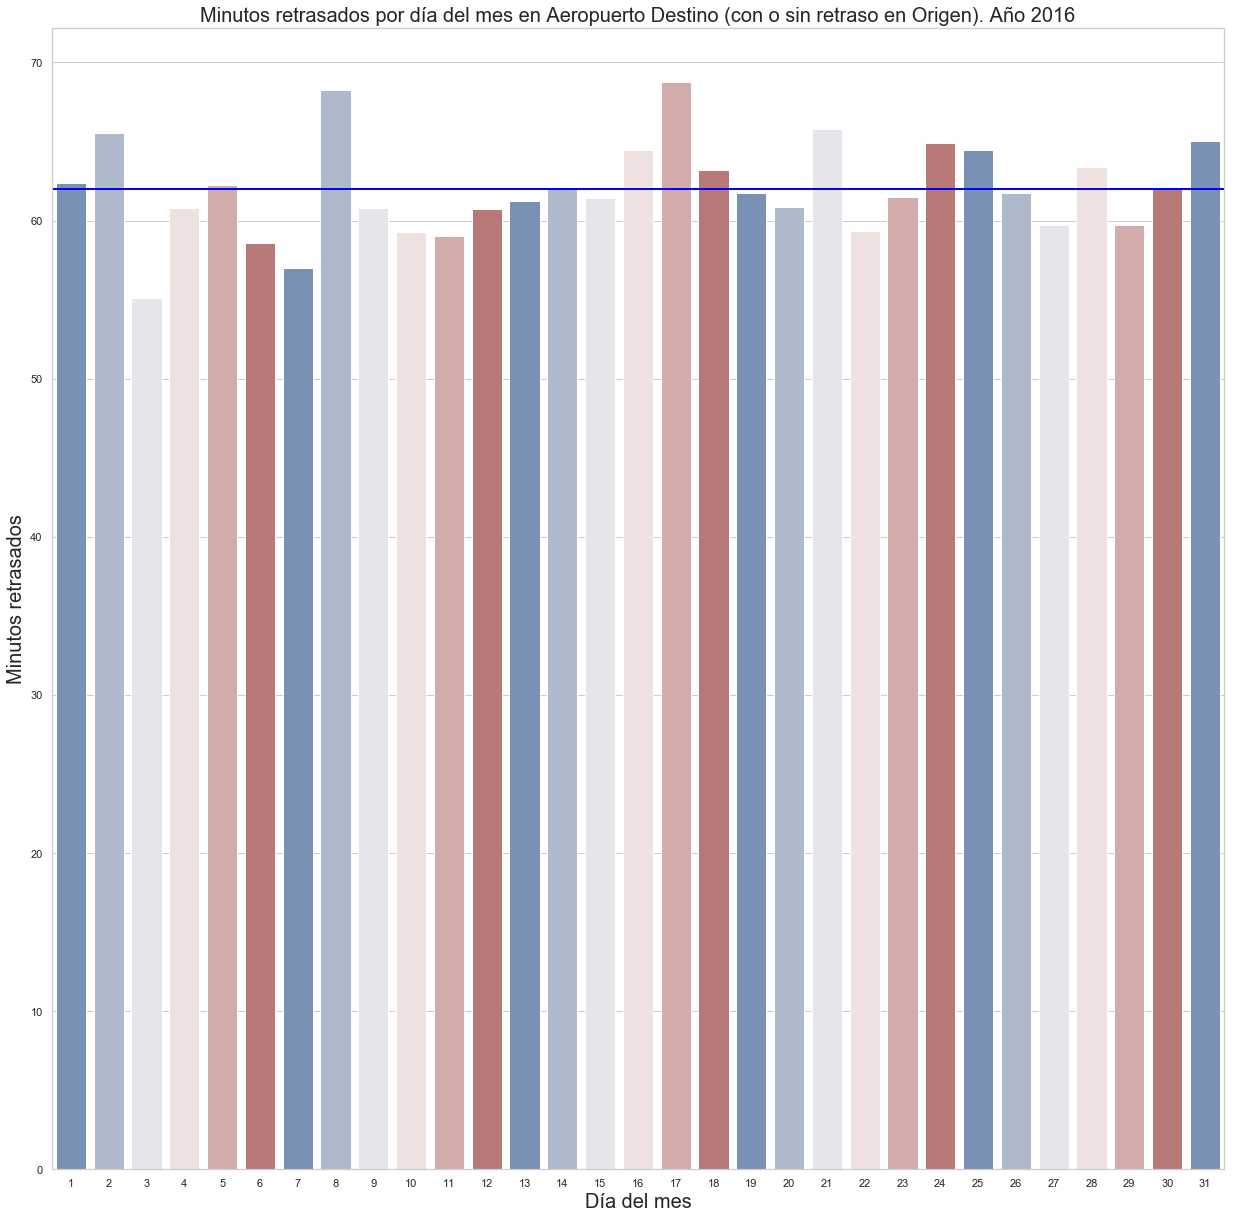

In [207]:

#Vuelos retrasados por dia del mes 

plt.figure(figsize=(21,21))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=retrasosDestinoPorDiaDelMes.index, y=retrasosDestinoPorDiaDelMes['ArrDelay'], palette=pal)


ax.set_ylabel("Minutos retrasados", fontsize=20)
ax.set_xlabel("Día del mes", fontsize=20)
ax.set_title('Minutos retrasados por día del mes en Aeropuerto Destino (con o sin retraso en Origen). Año ' + year, fontsize=20)

plt.axhline(retrasosDestinoPorDiaDelMes['ArrDelay'].mean(), color='Blue', linewidth=2)

plt.show() 

In [208]:
retrasosDestinoPorTrimestre = pd.DataFrame(dfanual[(dfanual['ArrDel15'] == 1)])
retrasosDestinoPorTrimestre = pd.DataFrame(retrasosDestinoPorTrimestre.groupby('Quarter').aggregate({'Quarter': 'count', 'ArrDelay':'mean'}))

In [209]:
retrasosDestinoPorTrimestre

Quarter   ArrDelay
Quarter                    
1         215131  60.331551
2         242466  60.485557
3         280708  66.926507
4         225934  59.392017

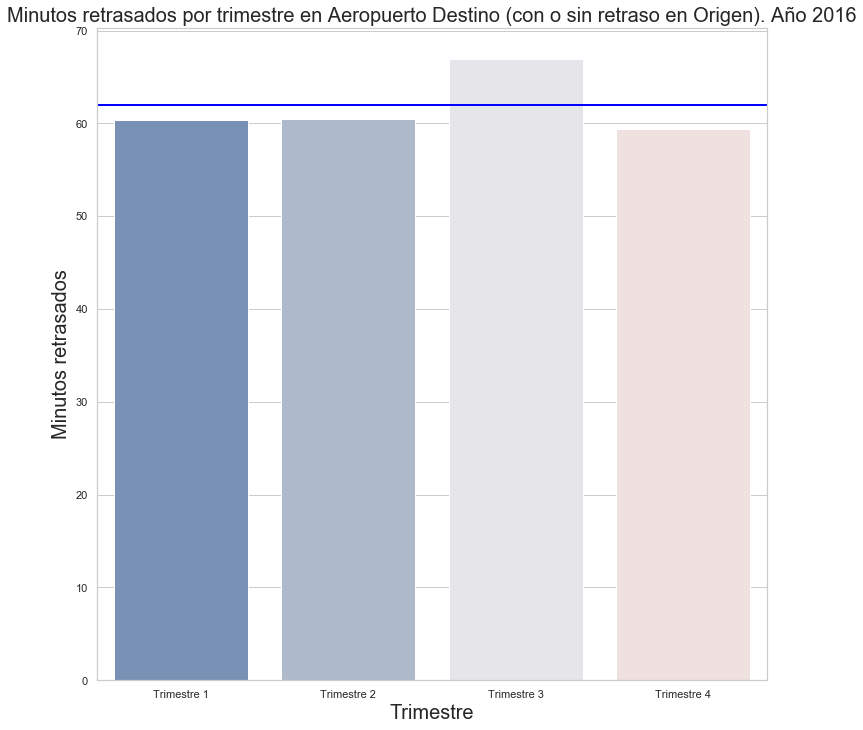

In [210]:
#Vuelos retrasados por trimestre 

plt.figure(figsize=(12,12))

my_xticks=['Trimestre 1', 'Trimestre 2', 'Trimestre 3', 'Trimestre 4']

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=retrasosDestinoPorTrimestre['ArrDelay'], palette=pal)


ax.set_ylabel("Minutos retrasados", fontsize=20)
ax.set_xlabel("Trimestre", fontsize=20)
ax.set_title('Minutos retrasados por trimestre en Aeropuerto Destino (con o sin retraso en Origen). Año ' + year, fontsize=20)

plt.axhline(retrasosDestinoPorDiaDelMes['ArrDelay'].mean(), color='Blue', linewidth=2)

plt.show()

Vistos las diferentes dimensiones temporales, se puede observar:
* cómo se van acumulando los retrasos a lo largo del día.
* como los principios y fines de mes hay algo más de retraso
* no hay gran diferencia entre los días de la semana

In [211]:
#primero cogemos los 45 aeropuertos (de destino) con mayor número de retrasos
retrasosAeropuertos = pd.DataFrame(dfanual[(dfanual['ArrDel15'] == 1)].Dest.value_counts(sort=True)).head(45)

In [212]:
retrasosAeropuertos

Dest
ATL  49607
LAX  49065
ORD  44845
SFO  42671
DFW  34736
DEN  34641
LAS  26363
PHX  26208
EWR  26067
BOS  25004
LGA  24243
MCO  23476
SEA  21156
JFK  21128
IAH  19908
MSP  19407
FLL  17141
DTW  17017
CLT  15678
DCA  14478
BWI  14273
MIA  14145
SLC  13409
SAN  13077
PHL  12982
MDW  12646
TPA  12243
DAL  11721
HOU   9688
STL   9376
OAK   9184
PDX   9028
BNA   8498
AUS   8283
SMF   7597
MSY   7296
MCI   7222
SJC   7080
RDU   6403
HNL   6161
SNA   6000
CLE   5936
SAT   5560
SJU   5360
MKE   5213

In [213]:
#retrasos totales de esos 45 aeropuerto
retrasosAeropuertos.sum()

Dest    781220
dtype: int64

In [214]:
#el 80% de los retrasos acumulados en todo el año se concentran en 45 aeropuertos, de los 300 de media que tenemos por año
pct80AeropuertosDestino = ((retrasosAeropuertos.sum() / (len(dfanual[(dfanual['ArrDel15'] == 1)])))) *100

In [215]:
pct80AeropuertosDestino

Dest    81.019332
dtype: float64

In [216]:
print('45 aeropuertos concentran el %.2f' %pct80AeropuertosDestino + '% de los retrasos del año ' + year)

45 aeropuertos concentran el 81.02% de los retrasos del año 2016


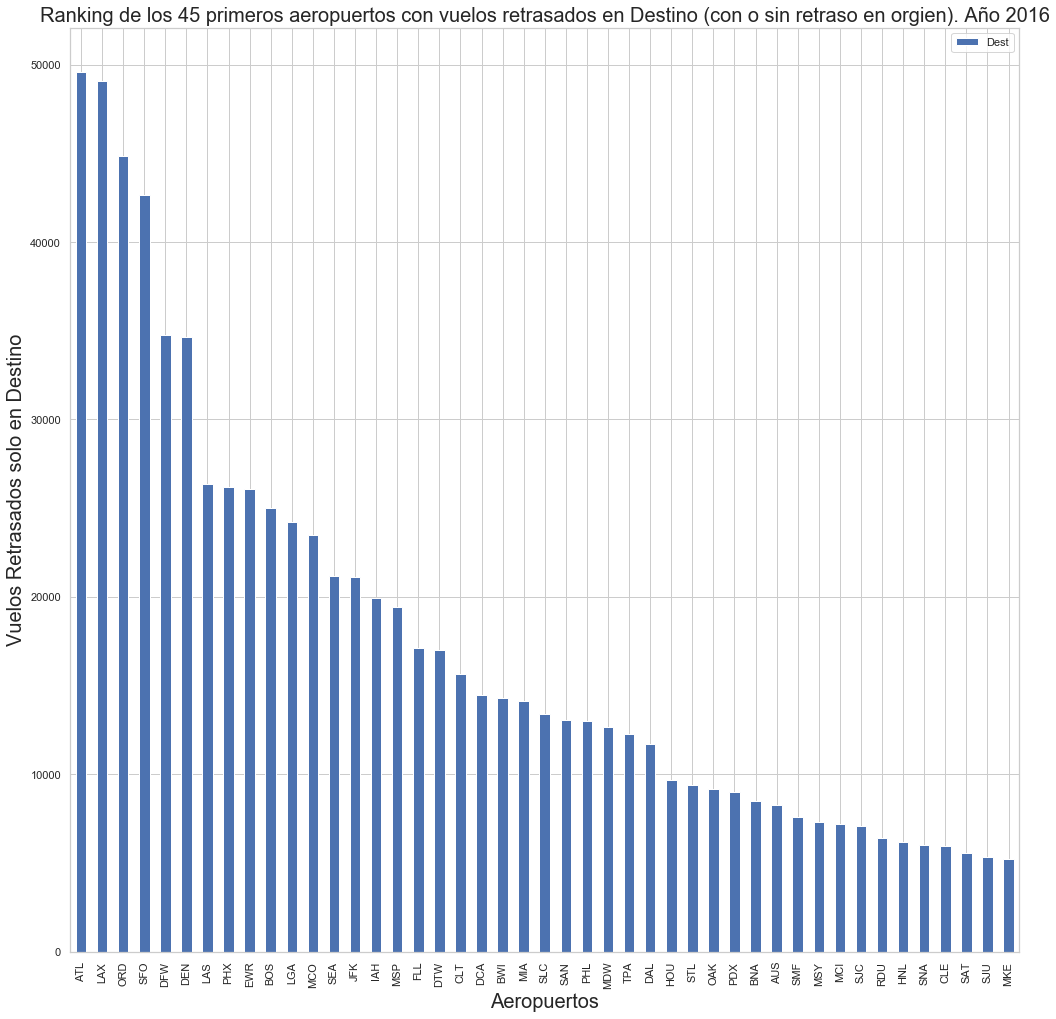

In [217]:
ax = retrasosAeropuertos.plot(kind='bar', figsize=(17,17))

ax.set_ylabel("Vuelos Retrasados solo en Destino", fontsize=20)
ax.set_xlabel("Aeropuertos", fontsize=20)
ax.set_title('Ranking de los 45 primeros aeropuertos con vuelos retrasados en Destino (con o sin retraso en orgien). Año ' + year , fontsize=20)

plt.show()

In [218]:
#nos quedamos con los identificadores de los aeropuertos para poder filtrarlos en el 
aeropuertos = retrasosAeropuertos.index.values.tolist()

In [219]:
#nos quedamos con los datos de esos aeropuertos
retrasosDestinoAeropuertos = dfanual.loc[(dfanual["Dest"].isin(aeropuertos))]

In [220]:
#me quedo con la agrupación por aeropuertos con su total de vuelos y su total de retrasos en sólo destino 
vuelosTotalesPorAeropuerto = retrasosDestinoAeropuertos.groupby('Dest').aggregate({'Dest': 'count', 'ArrDel15':'sum'})

In [221]:
#renombramos columnas
vuelosTotalesPorAeropuerto = vuelosTotalesPorAeropuerto.rename(columns={'Dest': 'VuelosTotales', 'ArrDel15': 'VuelosRetrasados'})

In [222]:
#calulamos el porcentaje de vuelos retrasados sonbre el total de vuelos operados sólo en destino en el año
vuelosTotalesPorAeropuerto['PctVuelosRetrasados'] = (vuelosTotalesPorAeropuerto['VuelosRetrasados'] / vuelosTotalesPorAeropuerto['VuelosTotales']) * 100

In [223]:
#ordenamos por aeropuertos con mayor porcentaje de vuelos retrasados de sólo en destino en el año
vuelosTotalesPorAeropuerto = vuelosTotalesPorAeropuerto.sort_values(['PctVuelosRetrasados'], ascending=False)

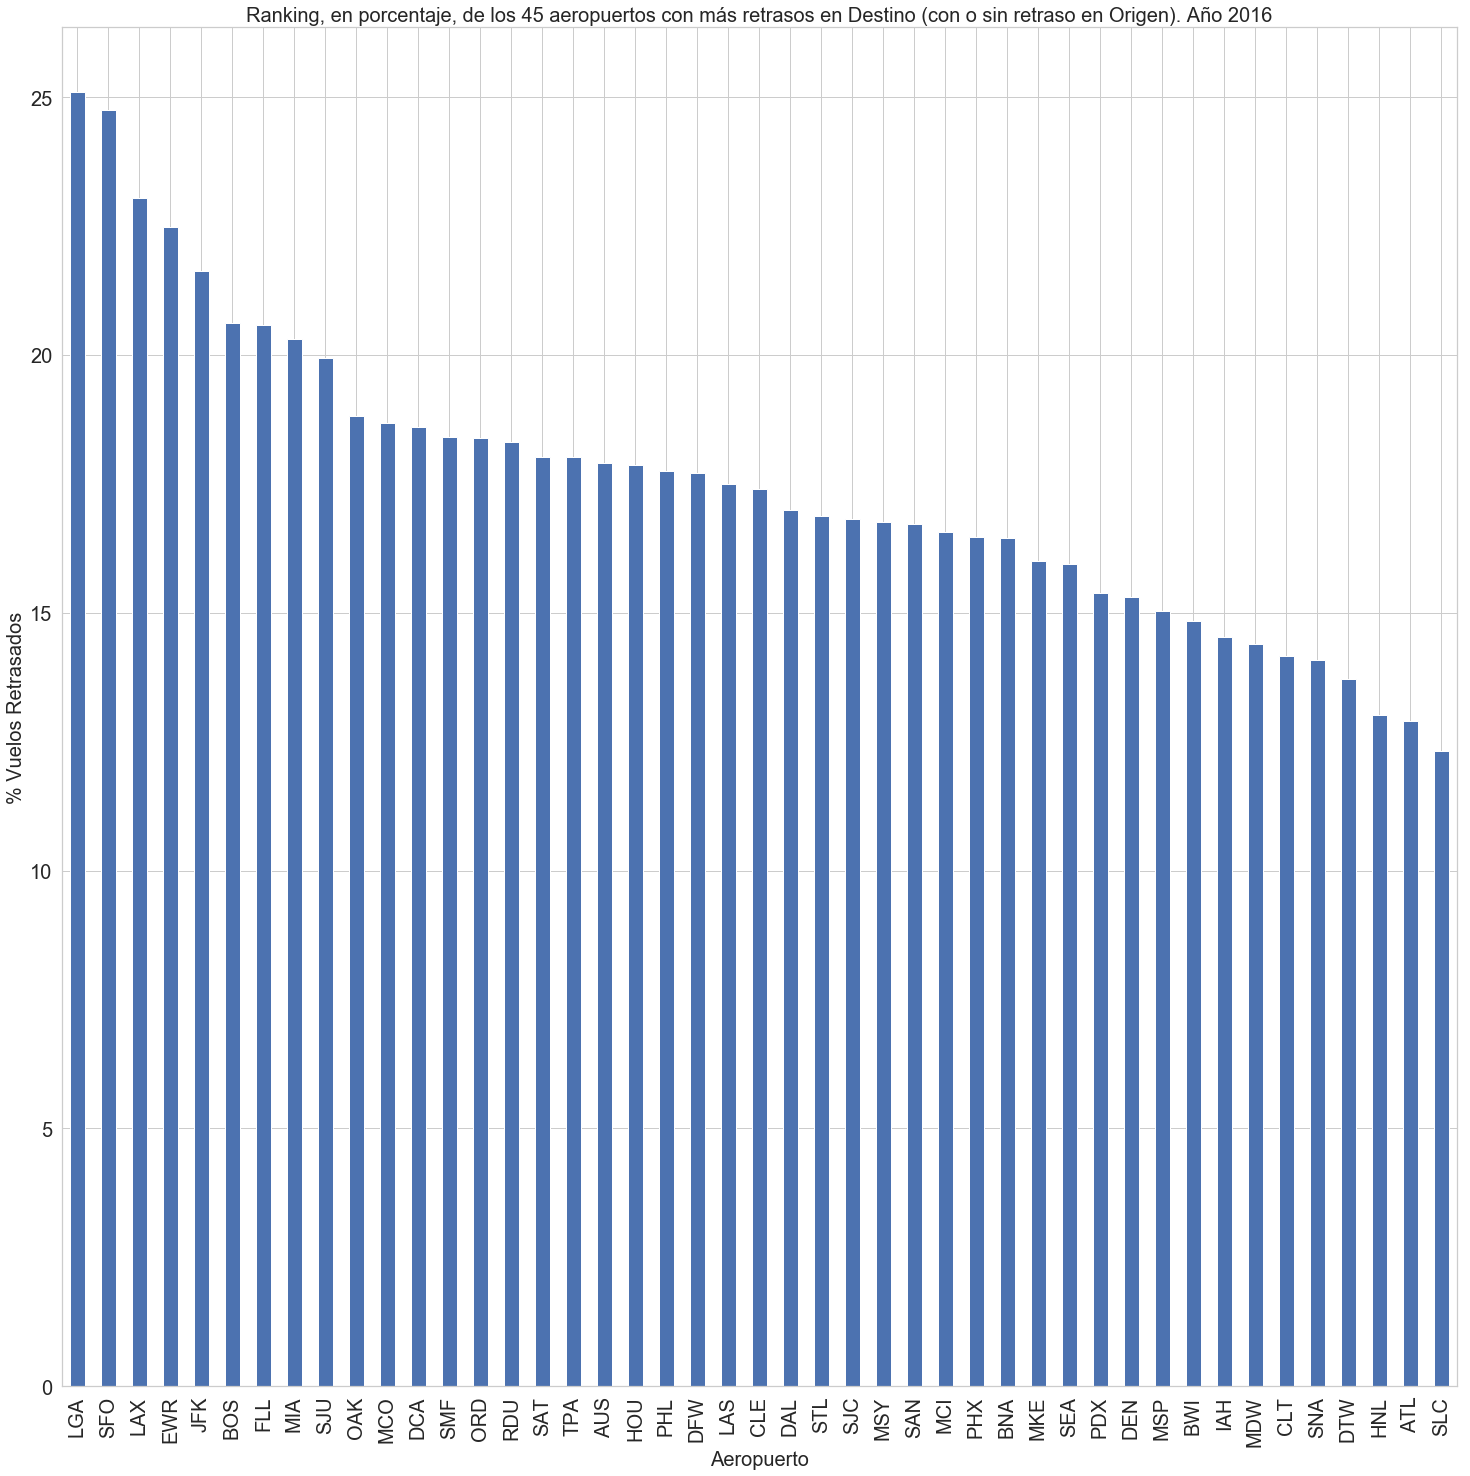

In [224]:
#mostramos el porcentaje de retrasos, ordenados, de los 45 aeropuertos con más retrasos sólo en Destino

ax = vuelosTotalesPorAeropuerto.PctVuelosRetrasados.plot(kind='bar', figsize=(25,25), fontsize=20)

ax.set_xlabel("Aeropuerto", fontsize=20)
ax.set_ylabel("% Vuelos Retrasados", fontsize=20)
ax.set_title('Ranking, en porcentaje, de los 45 aeropuertos con más retrasos en Destino (con o sin retraso en Origen). Año ' + year, fontsize=20)

plt.show()

En porcentaje de vuelos retrasados, claramente, se ve que 9 de los 10 primeros aeropuertos del ranking son de la Costa Este.

### 1.3.5.1.2 Retraso por zona geográfica del Destino

In [225]:
#cualquier vuelo retrasado en la llegada
retrasosDestino = pd.DataFrame(dfanual[(dfanual['ArrDel15'] == 1)])

In [226]:
#vamos a ponerle de qué zona greográfica es
#hemos creado un csv con las zonas geográficas Este, Central y Oeste y por Norte y Sur 
#abreviado en ES, EN, CS, CN, WS y WN
zonaEstados = pd.read_csv("/Users/moncholv/Documents/Proyecto AIr/datasets/geo/" + 'ZonasEstados.csv', delimiter=';')

In [227]:
#para hacer el join por estado, y como tenemos dos Estados en el Dataset (OriginState y DestState), renombraremos
#sucesivamente la cabecera para hacer el join
zonaEstados = zonaEstados.rename(columns={'State': 'OriginState', 'GeoCluster': 'OriginGeo'})

In [228]:
#hacemos el join por el Estado Origen del vuelo
retrasosDestino = pd.merge(retrasosDestino, zonaEstados, on='OriginState', how='inner')

In [229]:
#ahora renombramos para casar con los de Destino
zonaEstados = zonaEstados.rename(columns={'OriginState': 'DestState', 'OriginGeo': 'DestGeo'})

#hacemos el join por el Estado Destino del vuelo
retrasosDestino = pd.merge(retrasosDestino, zonaEstados, on='DestState', how='inner')

In [230]:
#comprobamos
retrasosDestino[['OriginState', 'OriginGeo', 'DestState', 'DestGeo']].head(5)

OriginState OriginGeo DestState DestGeo
0          TX        CS        MI      EN
1          TX        CS        MI      EN
2          TX        CS        MI      EN
3          TX        CS        MI      EN
4          TX        CS        MI      EN

In [231]:
retrasosDestinoGeo = pd.DataFrame(retrasosDestino.groupby('DestGeo').aggregate({'DestGeo': 'count', 'ArrDelay':'mean'}))

In [232]:
retrasosDestinoGeo

DestGeo   ArrDelay
DestGeo                    
CN         49103  63.131581
CS        160002  63.363783
EN        310690  64.466204
ES        204567  64.229221
WN         17560  53.983485
WS        220076  56.088742

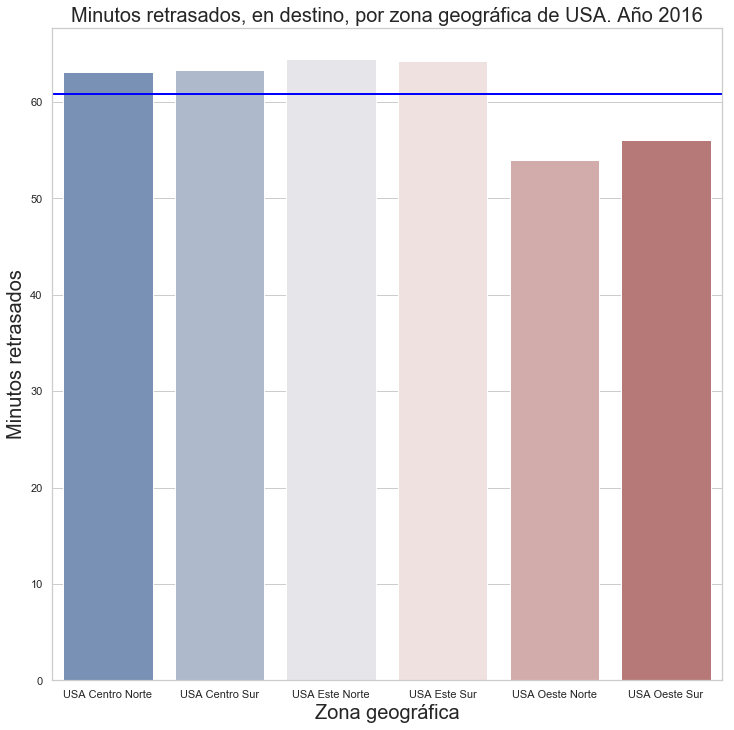

In [233]:
#Vuelos retrasados por Costa Este 

plt.figure(figsize=(12,12))

my_xticks=['USA Centro Norte', 'USA Centro Sur', 'USA Este Norte', 'USA Este Sur', 'USA Oeste Norte', 'USA Oeste Sur']

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=retrasosDestinoGeo['ArrDelay'], palette=pal)


ax.set_ylabel("Minutos retrasados", fontsize=20)
ax.set_xlabel("Zona geográfica", fontsize=20)
ax.set_title('Minutos retrasados, en destino, por zona geográfica de USA. Año ' + year, fontsize=20)

plt.axhline(retrasosDestinoGeo['ArrDelay'].mean(), color='Blue', linewidth=2)

plt.show()

Nos quedamos sólo con los de la Costa Este

In [234]:

retrasosDestinoSoloCostaEste = pd.DataFrame(retrasosDestino[((retrasosDestino['OriginGeo'] == 'EN') | (retrasosDestino['OriginGeo'] == 'ES')) & ((retrasosDestino['DestGeo'] == 'EN') | (retrasosDestino['DestGeo'] == 'ES'))])

In [235]:
retrasosDestinoSoloCostaEste.Dest.unique()

array(['GRR', 'DTW', 'MBS', 'PLN', 'LAN', 'AZO', 'TVC', 'APN', 'MQT',
       'CIU', 'ESC', 'CMX', 'MKG', 'FNT', 'IMT', 'MIA', 'FLL', 'TPA',
       'MCO', 'RSW', 'PBI', 'SRQ', 'JAX', 'DAB', 'PNS', 'UST', 'PGD',
       'ECP', 'EYW', 'MLB', 'VPS', 'TLH', 'GNV', 'JFK', 'LGA', 'ITH',
       'BGM', 'ROC', 'BUF', 'ELM', 'ALB', 'SYR', 'HPN', 'SWF', 'ISP',
       'IAG', 'PBG', 'SLC', 'SGU', 'CDC', 'PHL', 'PIT', 'ABE', 'AVP',
       'MDT', 'ERI', 'SCE', 'LBE', 'IAD', 'DCA', 'ORF', 'RIC', 'CHO',
       'ROA', 'PHF', 'SEA', 'BLI', 'GEG', 'PSC', 'EWR', 'TTN', 'ACY',
       'BNA', 'MEM', 'CHA', 'TYS', 'TRI', 'ORD', 'MDW', 'MLI', 'PIA',
       'BMI', 'SPI', 'IND', 'SBN', 'FWA', 'EVV', 'ATL', 'SAV', 'AGS',
       'VLD', 'BQK', 'CSG', 'ABY', 'CLT', 'RDU', 'GSO', 'ILM', 'AVL',
       'FAY', 'OAJ', 'EWN', 'BWI', 'MSN', 'MKE', 'GRB', 'ATW', 'RHI',
       'CWA', 'EAU', 'DAY', 'CMH', 'CLE', 'CAK', 'LEX', 'SDF', 'CVG',
       'PAH', 'BOS', 'MVY', 'ACK', 'HYA', 'ORH', 'SJU', 'BQN', 'PSE',
       'BDL', 'BHM',

In [236]:
retrasosDestinoSoloCostaEste = pd.DataFrame(retrasosDestinoSoloCostaEste.groupby('DestGeo').aggregate({'DestGeo': 'count', 'ArrDelay':'mean'}))

In [237]:
retrasosDestinoSoloCostaEste

DestGeo   ArrDelay
DestGeo                    
EN        211224  66.428403
ES        147678  65.340572

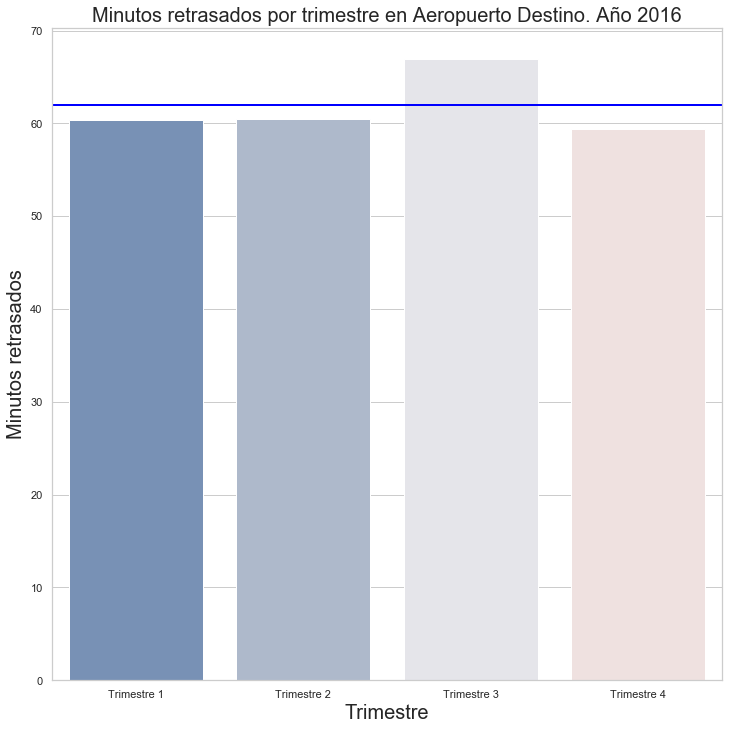

In [238]:
#Vuelos retrasados por Costa Este 

plt.figure(figsize=(12,12))

my_xticks=['Trimestre 1', 'Trimestre 2', 'Trimestre 3', 'Trimestre 4']

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=retrasosDestinoPorTrimestre['ArrDelay'], palette=pal)


ax.set_ylabel("Minutos retrasados", fontsize=20)
ax.set_xlabel("Trimestre", fontsize=20)
ax.set_title('Minutos retrasados por trimestre en Aeropuerto Destino. Año ' + year, fontsize=20)

plt.axhline(retrasosDestinoPorDiaDelMes['ArrDelay'].mean(), color='Blue', linewidth=2)

plt.show()

In [239]:
retrasosDestinoSoloCostaEste = pd.DataFrame(retrasosDestino[((retrasosDestino['OriginGeo'] == 'EN') | (retrasosDestino['OriginGeo'] == 'ES')) & ((retrasosDestino['DestGeo'] == 'EN') | (retrasosDestino['DestGeo'] == 'ES'))])

In [240]:
retrasosDestinoPorRuta = pd.DataFrame(retrasosDestinoSoloCostaEste.groupby(['Route']).aggregate({'Route': 'count', 'ArrDelay':'mean', 'DepDelay': 'mean', 'Origin': 'count', 'Dest':'count'}))

retrasosDestinoPorRuta = retrasosDestinoPorRuta.rename(columns={'Route': 'VuelosTotales', 'ArrDelay': 'MediaRetrasoDestinoTotal', 'DepDelay': 'MediaRetrasoOrigenTotal'})



In [241]:
retrasosDestinoPorRuta.reset_index()

Route  VuelosTotales  MediaRetrasoDestinoTotal  \
0     ABE-ATL            135                 89.007407   
1     ABE-DTW             91                 93.219780   
2     ABE-EWR              1                 56.000000   
3     ABE-ORD            119                 73.193277   
4     ABY-ATL            126                 85.738095   
5     ACK-BOS             38                 67.921053   
6     ACK-DCA              2                156.500000   
7     ACK-JFK             88                 89.784091   
8     ACY-ATL             29                104.793103   
9     ACY-BOS             47                 58.978723   
10    ACY-DTW             56                 69.821429   
11    ACY-FLL            169                 65.988166   
12    ACY-MCO            180                 53.505556   
13    ACY-MYR             22                 63.818182   
14    ACY-ORD             48                 78.708333   
15    ACY-PBI             53                 69.716981   
16    ACY-RSW            127                 78.472441   
17    ACY-TPA             72                 71.555556   
18    AGS-ATL            369                 87.365854   
19    ALB-ATL             86                 89.546512   
20    ALB-BWI            170                 55.705882   
21    ALB-CLT            119                 58.798319   
22    ALB-DTW             52                104.961538   
23    ALB-EWR             52                 65.211538   
24    ALB-FLL            159                 59.842767   
25    ALB-MCO            167                 57.203593   
26    ALB-MDW             73                 56.726027   
27    ALB-ORD            214                 66.677570   
28    ALB-RSW              7                 72.714286   
29    ALB-TPA             46                 52.369565   
...       ...            ...                       ...   
1584  TPA-SDF             67                 63.940299   
1585  TPA-SEA             64                 47.625000   
1586  TPA-SJU            175                 60.702857   
1587  TPA-TTN             15                 91.600000   
1588  TRI-ATL            303                 89.399340   
1589  TTN-ATL             45                 71.822222   
1590  TTN-CLT             36                 63.111111   
1591  TTN-DTW             46                 97.326087   
1592  TTN-FLL             20                124.550000   
1593  TTN-MCO            109                 74.752294   
1594  TTN-ORD             18                 68.388889   
1595  TTN-PBI             26                 86.269231   
1596  TTN-PGD              3                 59.333333   
1597  TTN-RDU             37                 83.459459   
1598  TTN-RSW             19                 71.578947   
1599  TTN-TPA             10                126.600000   
1600  TVC-ATL              6                 60.500000   
1601  TVC-DTW            123                 86.056911   
1602  TVC-EWR             16                 68.187500   
1603  TVC-LGA              2                102.500000   
1604  TVC-ORD            153                 67.810458   
1605  TYS-ATL            285                 83.414035   
1606  TYS-DTW             14                 85.642857   
1607  TYS-EWR             23                 58.869565   
1608  TYS-LGA              8                 90.000000   
1609  TYS-ORD            308                 66.347403   
1610  UST-ORD             21                 83.714286   
1611  UST-PHL             18                 82.944444   
1612  VLD-ATL            143                 85.797203   
1613  VPS-ATL            245                 79.057143   

      MediaRetrasoOrigenTotal  Origin  Dest  
0                   90.585185     135   135  
1                   96.406593      91    91  
2                   69.000000       1     1  
3                   62.521008     119   119  
4                   85.015873     126   126  
5                   63.605263      38    38  
6                  138.500000       2     2  
7                   88.522727      88    88

In [242]:
rutasVuelosTop20 = retrasosDestinoPorRuta.sort_values(['VuelosTotales'], ascending=False).head(20)

In [243]:
rutasVuelosTop20

VuelosTotales  MediaRetrasoDestinoTotal  MediaRetrasoOrigenTotal  \
Route                                                                       
ORD-LGA           2712                 62.973083                57.363201   
LGA-ORD           1959                 69.704441                61.893823   
ATL-LGA           1734                 59.696078                53.987313   
MIA-LGA           1663                 67.986771                60.835238   
ORD-BOS           1653                 65.068361                61.918330   
FLL-LGA           1588                 69.223552                62.583123   
MCO-EWR           1553                 74.070187                72.473278   
LGA-ATL           1549                 76.005165                78.062621   
LGA-FLL           1529                 72.109876                66.944408   
DCA-BOS           1447                 58.586040                46.892882   
ORD-ATL           1405                 72.499644                70.396441   
JFK-MCO           1390                 75.200000                67.427338   
ORD-EWR           1377                 73.301380                72.339143   
ATL-MCO           1365                 58.761172                57.139194   
MCO-JFK           1365                 83.423443                79.661538   
BOS-ORD           1334                 65.314093                58.263118   
LGA-BOS           1328                 60.475904                51.314759   
ORD-DCA           1318                 59.878604                54.578149   
ATL-ORD           1303                 70.169609                62.432847   
EWR-MCO           1293                 69.204950                67.647332   

         Origin  Dest  
Route                  
ORD-LGA    2712  2712  
LGA-ORD    1959  1959  
ATL-LGA    1734  1734  
MIA-LGA    1663  1663  
ORD-BOS    1653  1653  
FLL-LGA    1588  1588  
MCO-EWR    1553  1553  
LGA-ATL    1549  1549  
LGA-FLL    1529  1529  
DCA-BOS    1447  1447  
ORD-ATL    1405  1405  
JFK-MCO    1390  1390  
ORD-EWR    1377  1377  
ATL-MCO    1365  1365  
MCO-JFK    1365  1365  
BOS-ORD    1334  1334  
LGA-BOS    1328  1328  
ORD-DCA    1318  1318  
ATL-ORD    1303  1303  
EWR-MCO    1293  1293

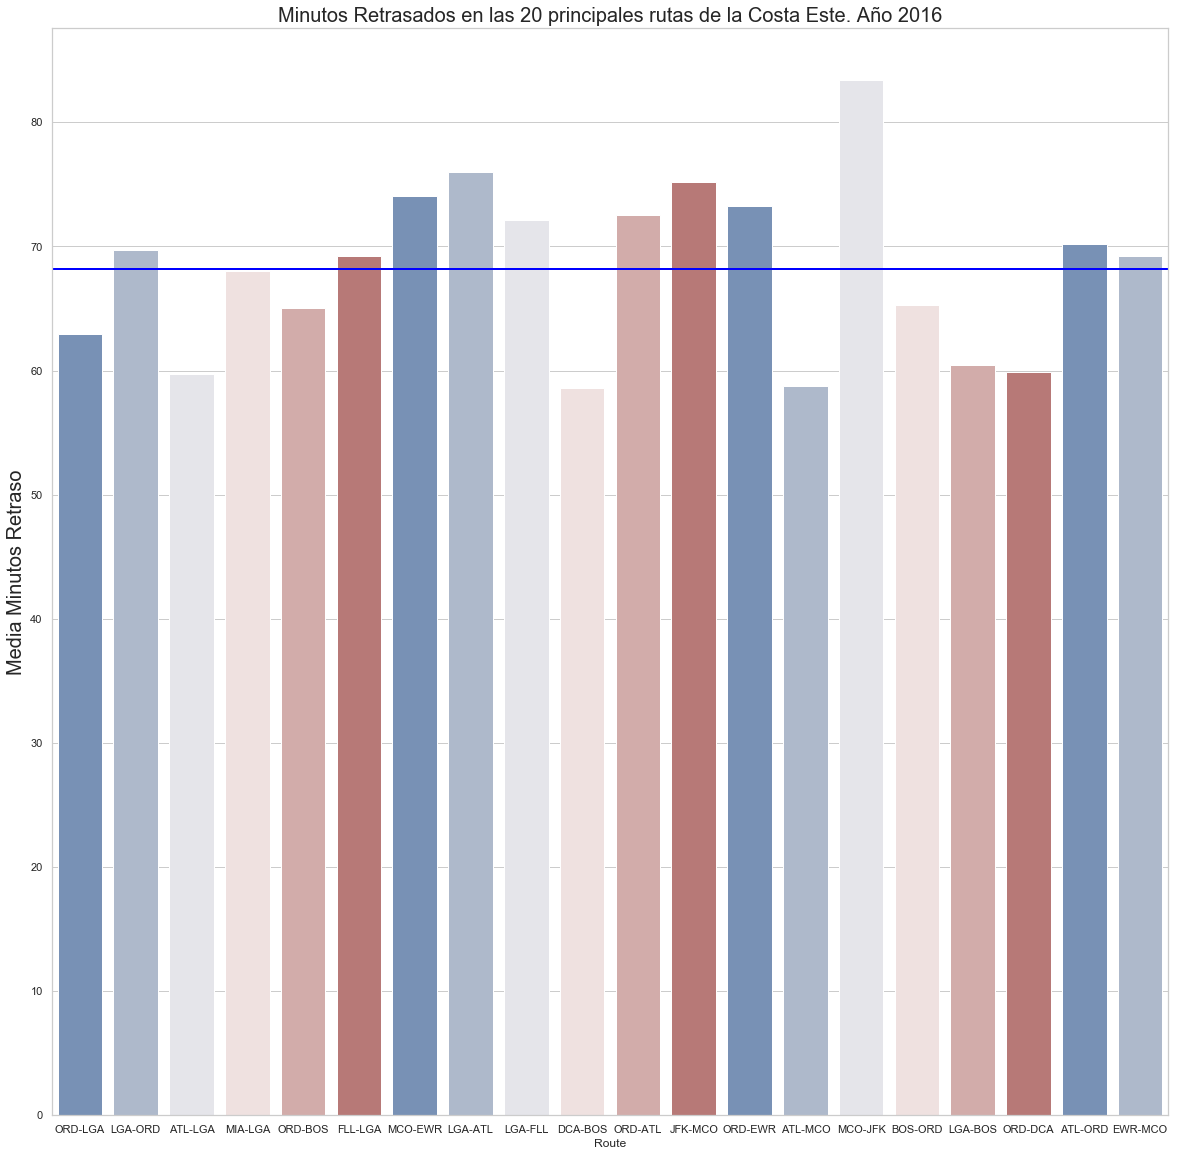

In [244]:
#retaso medio en destino  en las 20 principales rutas retrasadas de la costa Este

plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=rutasVuelosTop20.index, y=rutasVuelosTop20['MediaRetrasoDestinoTotal'], palette=pal)

ax.set_ylabel("Media Minutos Retraso", fontsize=20)
ax.set_title('Minutos Retrasados en las 20 principales rutas de la Costa Este. Año ' + year, fontsize=20)

plt.axhline(rutasVuelosTop20['MediaRetrasoDestinoTotal'].mean(), color='Blue', linewidth=2)

plt.show()

## 1.3.6 Cancelaciones de Vuelos

In [245]:
#Vuelos que se han cancelado
len(dfanual[dfanual['Cancelled'] == 1])

65861

In [246]:
vuelosCanceladosPorMes = pd.DataFrame(columns=['mes', 'vuelos'])

for df in dataframes:
    vuelosCanceladosPorMes = vuelosCanceladosPorMes.append({'mes': df["Month"][1], 'vuelos': len(df[(df['Cancelled'] == 1)])}, ignore_index=True)


In [247]:
vuelosCanceladosPorMes

mes vuelos
0    1  11665
1    2   6823
2    3   4733
3    4   4109
4    5   2509
5    6   4982
6    7   9309
7    8   6893
8    9   1517
9   10   4547
10  11   1310
11  12   7464

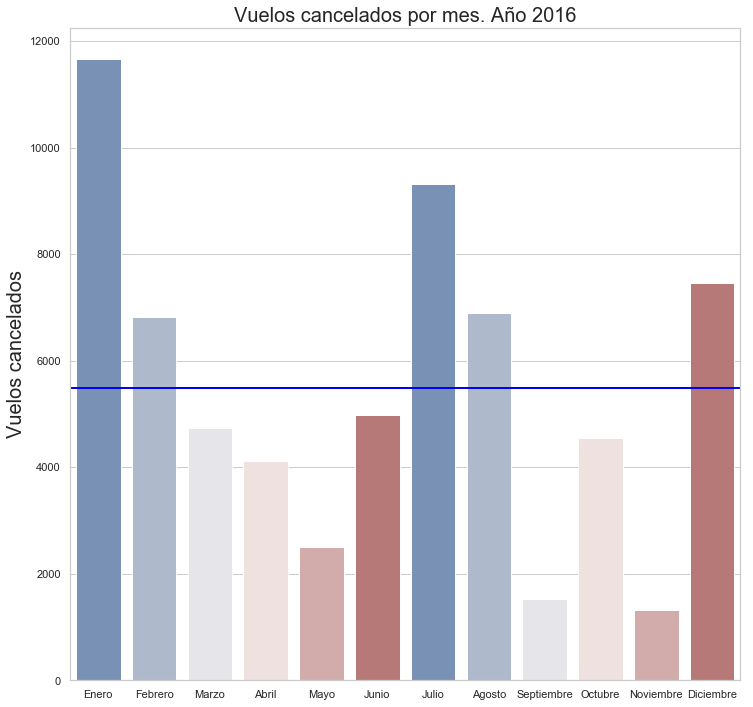

In [248]:
#Vuelos retrasados por mes

my_xticks=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

plt.figure(figsize=(12,12))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=vuelosCanceladosPorMes['vuelos'], palette=pal)


ax.set_ylabel("Vuelos cancelados", fontsize=20)
ax.set_title('Vuelos cancelados por mes. Año ' + year, fontsize=20)

plt.axhline(vuelosCanceladosPorMes['vuelos'].mean(), color='Blue', linewidth=2)

plt.show()

In [249]:
#comprobación de que tenemos o no códigos de cancelación asociados a los cancelados (entre 2001 y 2003 no tenemos)
#hay 65143
conCodigo = dfanual.CancellationCode.dropna()
len(conCodigo)

65861

Tenemos motivos de cancelación, así que vamos a estudiarlos

### 1.3.6.1 Cancelados por la Aerolínea

In [250]:
#cancelados por culpa de aerolínea
len(dfanual[dfanual['CancellationCode'] == 'A'])

20279

In [251]:
vuelosCanceladosPorAerolinea = pd.DataFrame(columns=['mes', 'vuelos'])

for df in dataframes:
    vuelosCanceladosPorAerolinea = vuelosCanceladosPorAerolinea.append({'mes': df["Month"][1], 'vuelos': len(df[(df['CancellationCode'] == 'A')])}, ignore_index=True)


In [252]:
vuelosCanceladosPorAerolinea

mes vuelos
0    1   1423
1    2   1574
2    3   1132
3    4   1089
4    5    980
5    6   1938
6    7   4517
7    8   3942
8    9    717
9   10    630
10  11    547
11  12   1790

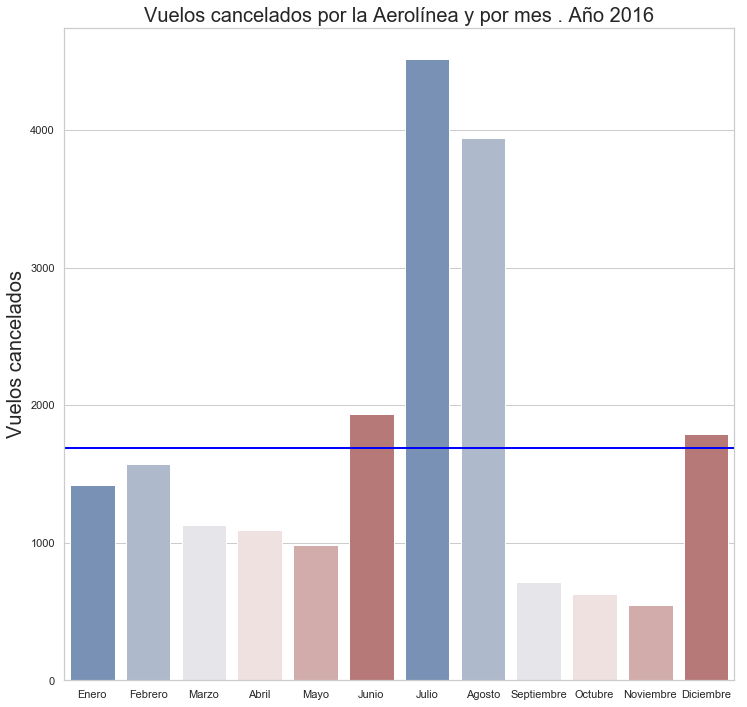

In [253]:
plt.figure(figsize=(12,12))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=vuelosCanceladosPorAerolinea['vuelos'], palette=pal)

ax.set_ylabel("Vuelos cancelados", fontsize=20)
ax.set_title('Vuelos cancelados por la Aerolínea y por mes . Año ' + year, fontsize=20)

plt.axhline(vuelosCanceladosPorAerolinea['vuelos'].mean(), color='Blue', linewidth=2)

plt.show()

### 1.3.6.2 Cancelados por Meteorología

In [254]:
#cancelados por las condiciones meteorológicas
len(dfanual[dfanual['CancellationCode'] == 'B'])

34465

In [255]:
vuelosCanceladosPorMeteo = pd.DataFrame(columns=['mes', 'vuelos'])

for df in dataframes:
    vuelosCanceladosPorMeteo = vuelosCanceladosPorMeteo.append({'mes': df["Month"][1], 'vuelos': len(df[(df['CancellationCode'] == 'B')])}, ignore_index=True)


In [256]:
vuelosCanceladosPorMeteo

mes vuelos
0    1   9054
1    2   3781
2    3   3042
3    4   2421
4    5   1148
5    6   2021
6    7   2186
7    8   1526
8    9    412
9   10   3483
10  11    514
11  12   4877

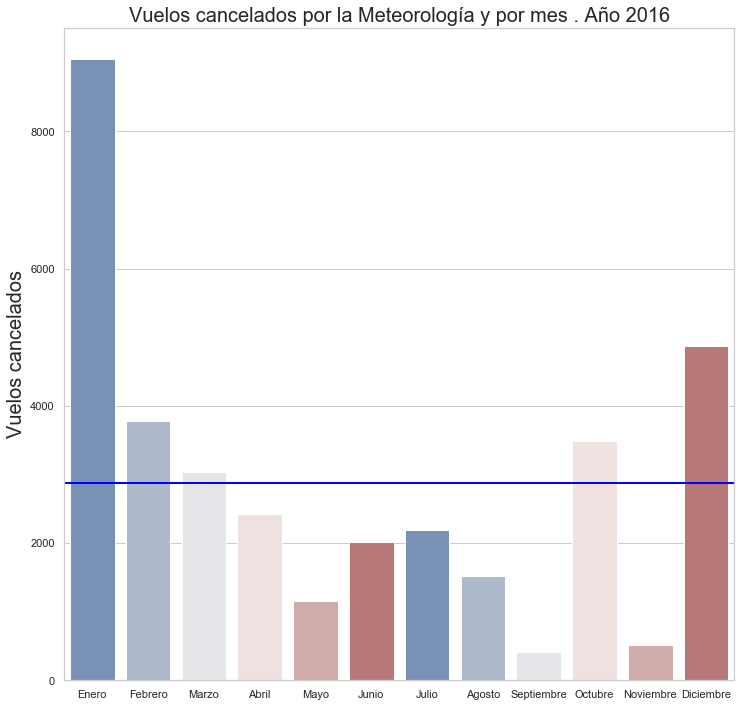

In [257]:
plt.figure(figsize=(12,12))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=vuelosCanceladosPorMeteo['vuelos'], palette=pal)

ax.set_ylabel("Vuelos cancelados", fontsize=20)
ax.set_title('Vuelos cancelados por la Meteorología y por mes . Año ' + year, fontsize=20)

plt.axhline(vuelosCanceladosPorMeteo['vuelos'].mean(), color='Blue', linewidth=2)

plt.show()

### 1.3.6.3 Cancelados por Espacio Aéreo

In [258]:
#cancelados por el Espacio Aéreo
len(dfanual[dfanual['CancellationCode'] == 'C'])

11091

In [259]:
vuelosCanceladosPorNAS = pd.DataFrame(columns=['mes', 'vuelos'])

for df in dataframes:
    vuelosCanceladosPorNAS = vuelosCanceladosPorNAS.append({'mes': df["Month"][1], 'vuelos': len(df[(df['CancellationCode'] == 'C')])}, ignore_index=True)


In [260]:
vuelosCanceladosPorNAS

mes vuelos
0    1   1188
1    2   1468
2    3    559
3    4    599
4    5    381
5    6   1021
6    7   2606
7    8   1405
8    9    388
9   10    434
10  11    245
11  12    797

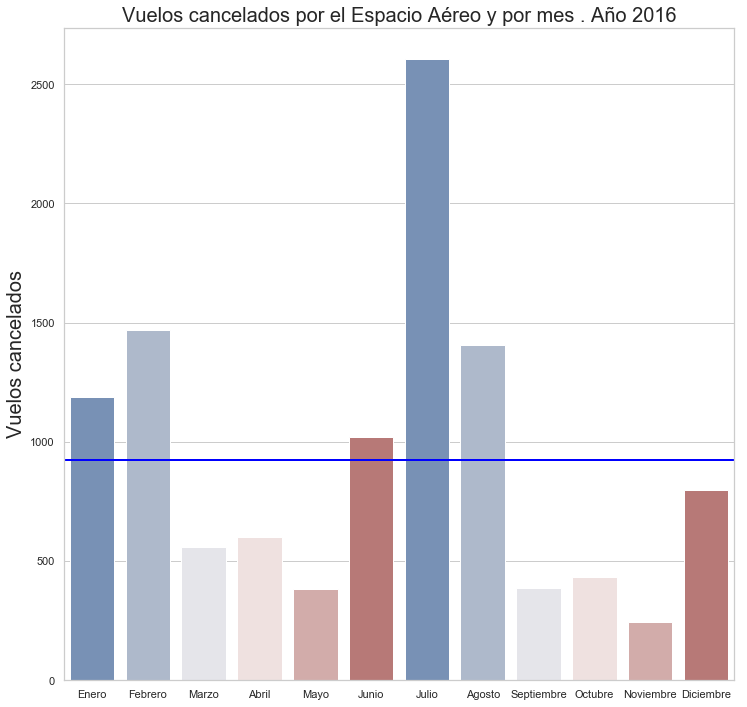

In [261]:
plt.figure(figsize=(12,12))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=vuelosCanceladosPorNAS['vuelos'], palette=pal)

ax.set_ylabel("Vuelos cancelados", fontsize=20)
ax.set_title('Vuelos cancelados por el Espacio Aéreo y por mes . Año ' + year, fontsize=20)

plt.axhline(vuelosCanceladosPorNAS['vuelos'].mean(), color='Blue', linewidth=2)

plt.show()

### 1.3.6.4 Cancelación por motivos de Seguridad

In [262]:
#cancelados por Seguridad (física)
len(dfanual[dfanual['CancellationCode'] == 'D'])

26

In [263]:
vuelosCanceladosPorSeguridad = pd.DataFrame(columns=['mes', 'vuelos'])

for df in dataframes:
    vuelosCanceladosPorSeguridad = vuelosCanceladosPorSeguridad.append({'mes': df["Month"][1], 'vuelos': len(df[(df['CancellationCode'] == 'D')])}, ignore_index=True)

In [264]:
vuelosCanceladosPorSeguridad

mes vuelos
0    1      0
1    2      0
2    3      0
3    4      0
4    5      0
5    6      2
6    7      0
7    8     20
8    9      0
9   10      0
10  11      4
11  12      0

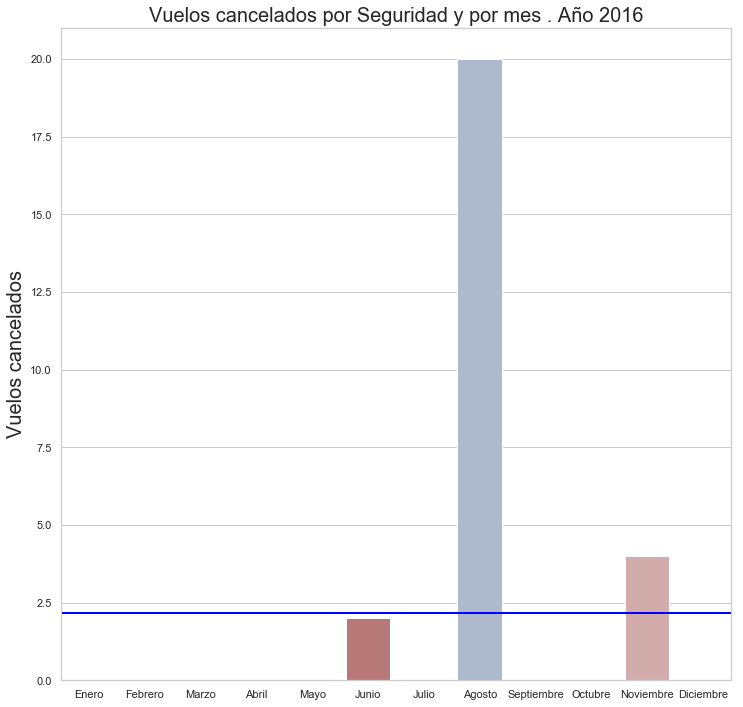

In [265]:
plt.figure(figsize=(12,12))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=vuelosCanceladosPorSeguridad['vuelos'], palette=pal)

ax.set_ylabel("Vuelos cancelados", fontsize=20)
ax.set_title('Vuelos cancelados por Seguridad y por mes . Año ' + year, fontsize=20)

plt.axhline(vuelosCanceladosPorSeguridad['vuelos'].mean(), color='Blue', linewidth=2)

plt.show()

### 1.3.6.5 Cancelaciones distribuidas por aerolíneas

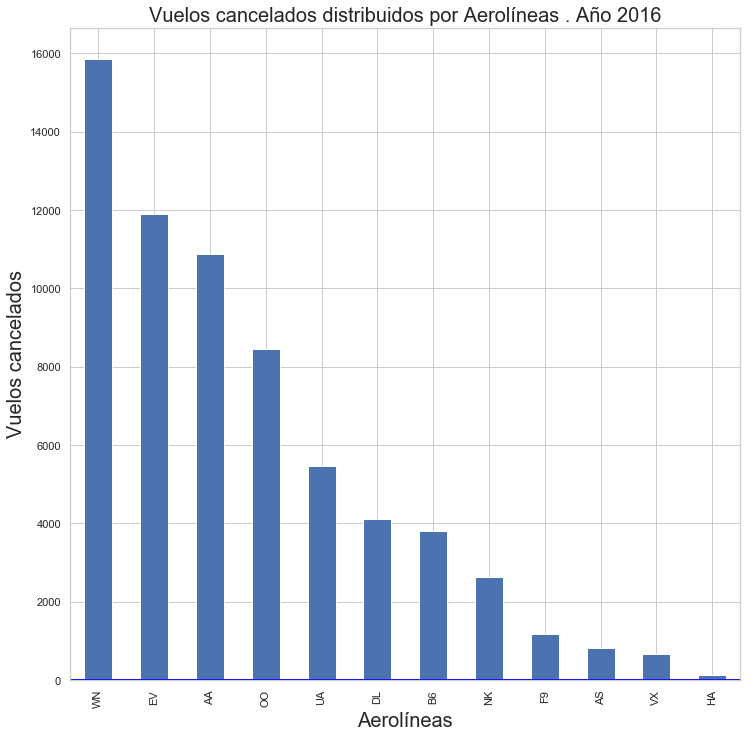

In [266]:
plt.figure(figsize=(12, 12))

ax = dfanual[dfanual['Cancelled'] == 1].IATA_CODE_Reporting_Airline.value_counts().plot(kind='bar')

ax.set_ylabel("Vuelos cancelados", fontsize=20)
ax.set_xlabel("Aerolíneas", fontsize=20)
ax.set_title('Vuelos cancelados distribuidos por Aerolíneas . Año ' + year, fontsize=20)

plt.axhline(vuelosCanceladosPorSeguridad['vuelos'].mean(), color='Blue', linewidth=2)

plt.show()

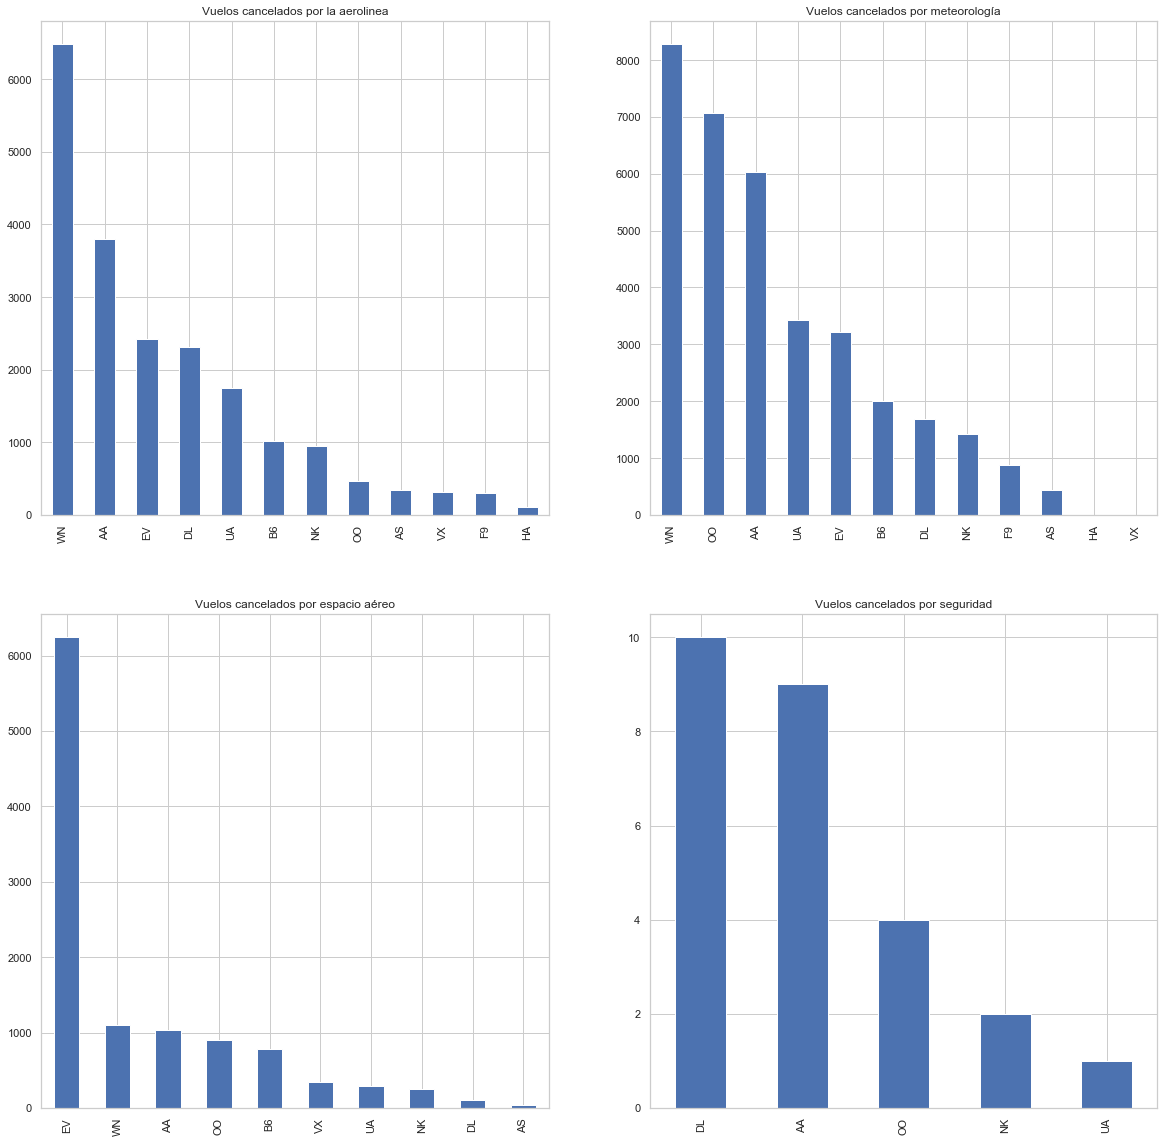

In [267]:
#Sacamos gráficos por compañía
plt.figure(figsize=(20, 20))

plt.subplot(2,2,1)
dfanual[dfanual['CancellationCode'] == 'A'].IATA_CODE_Reporting_Airline.value_counts().plot(kind='bar',title='Vuelos cancelados por la aerolinea')

plt.subplot(2,2,2)
dfanual[dfanual['CancellationCode'] == 'B'].IATA_CODE_Reporting_Airline.value_counts().plot(kind='bar',title='Vuelos cancelados por meteorología')

plt.subplot(2,2,3)
dfanual[dfanual['CancellationCode'] == 'C'].IATA_CODE_Reporting_Airline.value_counts().plot(kind='bar',title='Vuelos cancelados por espacio aéreo')

plt.subplot(2,2,4)
dfanual[dfanual['CancellationCode'] == 'D'].IATA_CODE_Reporting_Airline.value_counts().plot(kind='bar',title='Vuelos cancelados por seguridad')


### 1.3.6.6 Cancelaciones por Rutas

Mostramos aquellas rutas con más cancelaciones

#### 1.3.6.6.1 Vuelos cancelados por Ruta por la Aerolínea

In [268]:
rutasVuelosCanceladosAerolinea = pd.DataFrame(dfanual[dfanual['CancellationCode'] == 'A'].Route.value_counts(sort=True))

In [269]:
rutasVuelosCanceladosAerolinea.shape

(3017, 1)

In [270]:
rutasVuelosCanceladosAerolinea = rutasVuelosCanceladosAerolinea.rename(columns={'Route': 'VuelosCancelados'})

In [271]:
rutasVuelosCanceladosAerolinea.head(10)

VuelosCancelados
LAX-SFO               246
SFO-LAX               216
LAX-OAK               184
OAK-LAX               175
HOU-DAL               136
DAL-HOU               127
LGA-DCA               106
DCA-LGA               105
BOS-LGA               104
LGA-BOS               102

In [272]:
#me quedo con las 20 rutas con mayor número de vuelos cancelados
rutasVuelosCanceladosAerolinea = rutasVuelosCanceladosAerolinea.head(20)

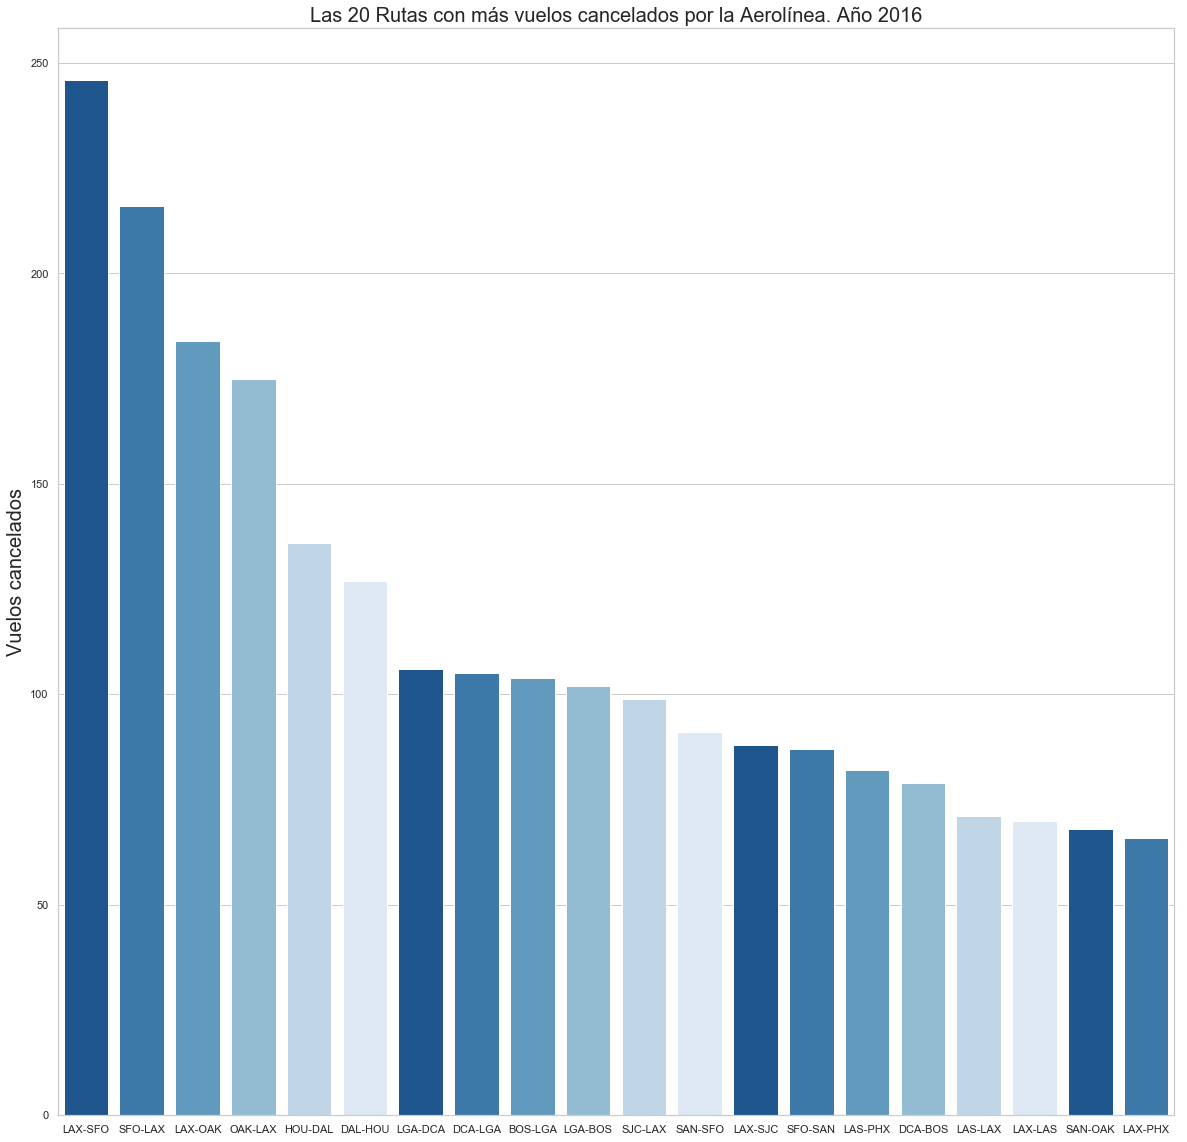

In [273]:
plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("Blues_r")
ax = sns.barplot(x=rutasVuelosCanceladosAerolinea.index, y=rutasVuelosCanceladosAerolinea['VuelosCancelados'], palette=pal)

ax.set_ylabel("Vuelos cancelados", fontsize=20)
ax.set_title('Las 20 Rutas con más vuelos cancelados por la Aerolínea. Año ' + year, fontsize=20)

plt.show()

#### 1.3.6.6.2 Vuelos cancelados por Ruta por la Meteorología

In [274]:
rutasVuelosCanceladosMeteo = pd.DataFrame(dfanual[dfanual['CancellationCode'] == 'B'].Route.value_counts(sort=True))

In [275]:
rutasVuelosCanceladosMeteo.shape

(3293, 1)

In [276]:
rutasVuelosCanceladosMeteo = rutasVuelosCanceladosMeteo.rename(columns={'Route': 'VuelosCancelados'})

In [277]:
rutasVuelosCanceladosMeteo.head(10)

VuelosCancelados
LGA-ORD               147
ORD-LGA               134
DCA-BOS               105
BOS-DCA               104
ASE-DEN               103
DEN-ASE               103
MKE-ORD                99
DCA-ORD                99
BWI-FLL                94
ORD-MKE                92

In [278]:
#me quedo con las 20 rutas con mayor número de vuelos cancelados
rutasVuelosCanceladosMeteo = rutasVuelosCanceladosMeteo.head(20)

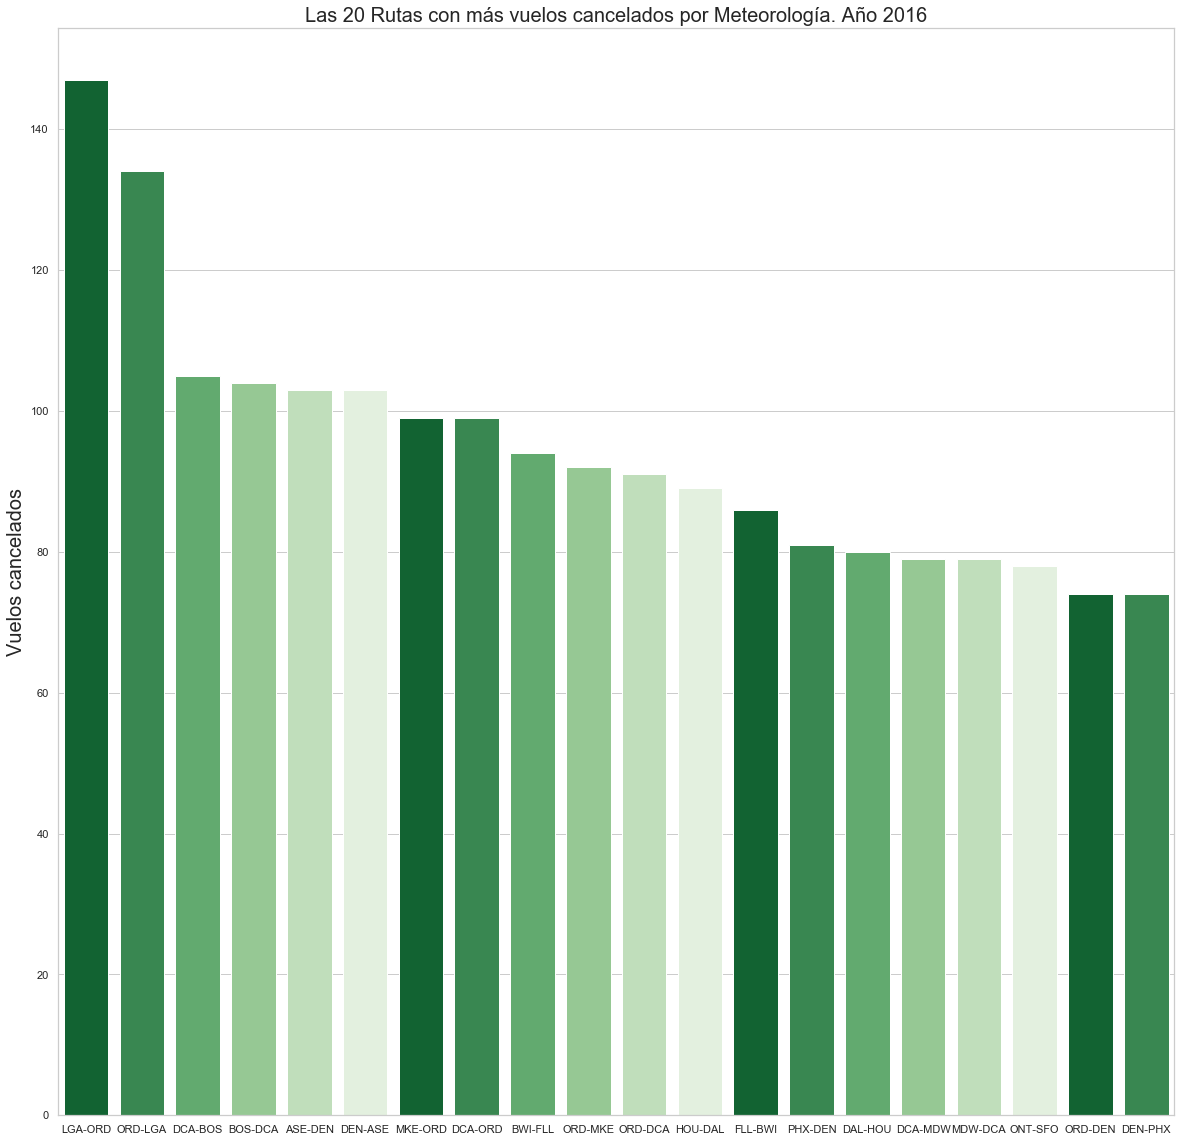

In [279]:
plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("Greens_r")
ax = sns.barplot(x=rutasVuelosCanceladosMeteo.index, y=rutasVuelosCanceladosMeteo['VuelosCancelados'], palette=pal)

ax.set_ylabel("Vuelos cancelados", fontsize=20)
ax.set_title('Las 20 Rutas con más vuelos cancelados por Meteorología. Año ' + year, fontsize=20)

plt.show()

In [280]:
#me quedo con las 20 rutas con mayor número de vuelos cancelados
rutasVuelosCanceladosMeteo = rutasVuelosCanceladosMeteo.head(20)

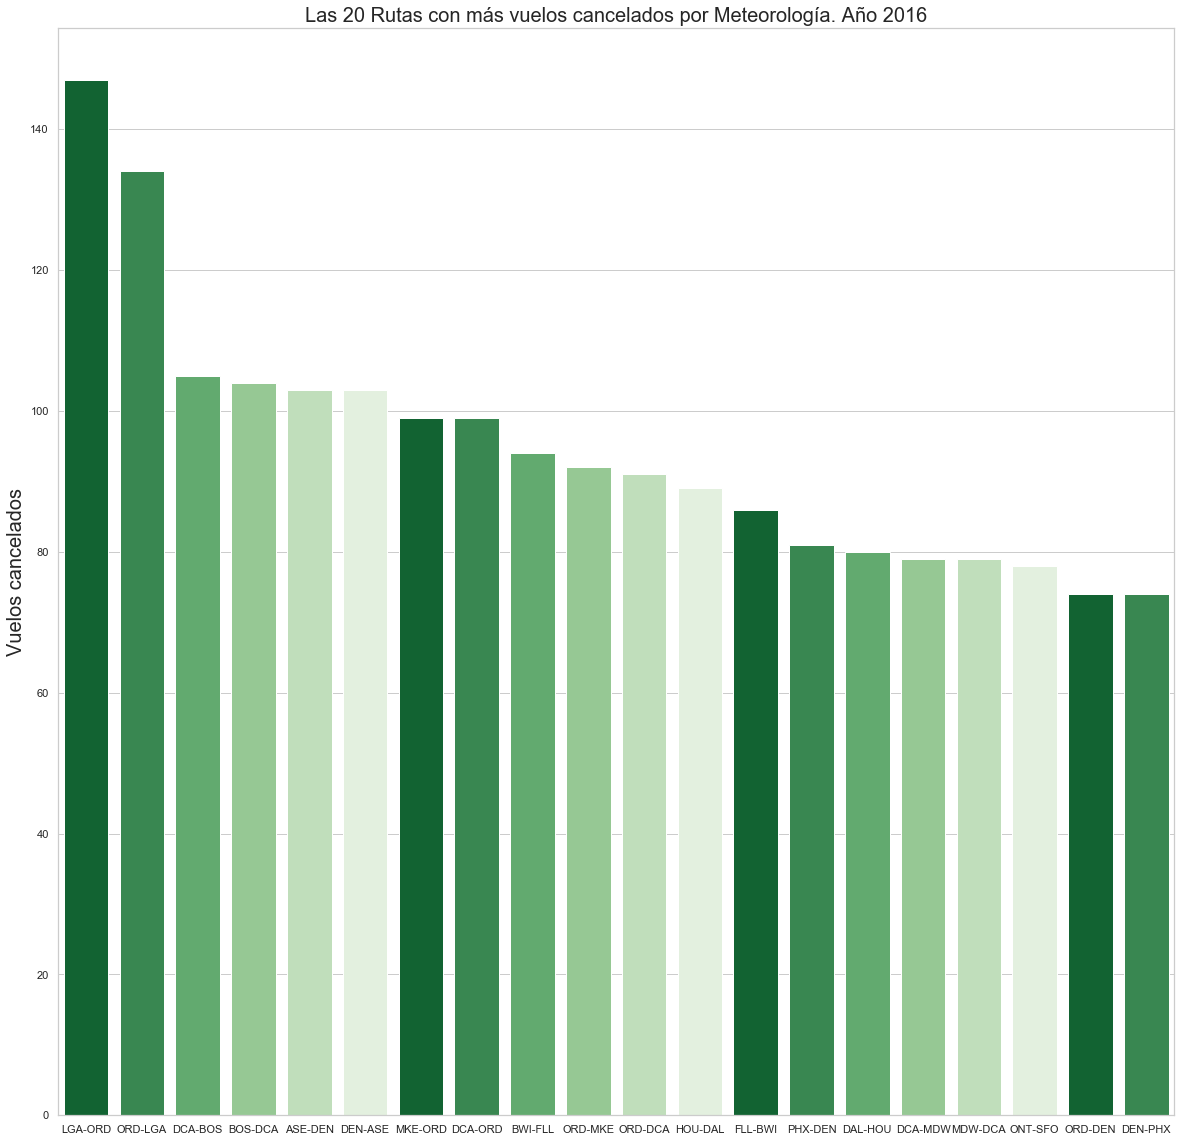

In [281]:
plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("Greens_r")
ax = sns.barplot(x=rutasVuelosCanceladosMeteo.index, y=rutasVuelosCanceladosMeteo['VuelosCancelados'], palette=pal)

ax.set_ylabel("Vuelos cancelados", fontsize=20)
ax.set_title('Las 20 Rutas con más vuelos cancelados por Meteorología. Año ' + year, fontsize=20)

plt.show()

#### 1.3.6.6.3 Vuelos cancelados por Ruta por la Espacio Aéreo

In [282]:
rutasVuelosCanceladosNAS = pd.DataFrame(dfanual[dfanual['CancellationCode'] == 'C'].Route.value_counts(sort=True))

In [283]:
rutasVuelosCanceladosNAS.shape

(1588, 1)

In [284]:
rutasVuelosCanceladosNAS = rutasVuelosCanceladosNAS.rename(columns={'Route': 'VuelosCancelados'})

rutasVuelosCanceladosNAS.head(10)

VuelosCancelados
SFO-LAX               180
LAX-SFO               172
DCA-EWR               120
LGA-DCA               110
DCA-LGA               110
EWR-DCA               109
SAN-SFO                99
SFO-SAN                90
LGA-BOS                87
BOS-LGA                87

In [285]:
#me quedo con las 20 rutas con mayor número de vuelos cancelados
rutasVuelosCanceladosNAS = rutasVuelosCanceladosNAS.head(20)

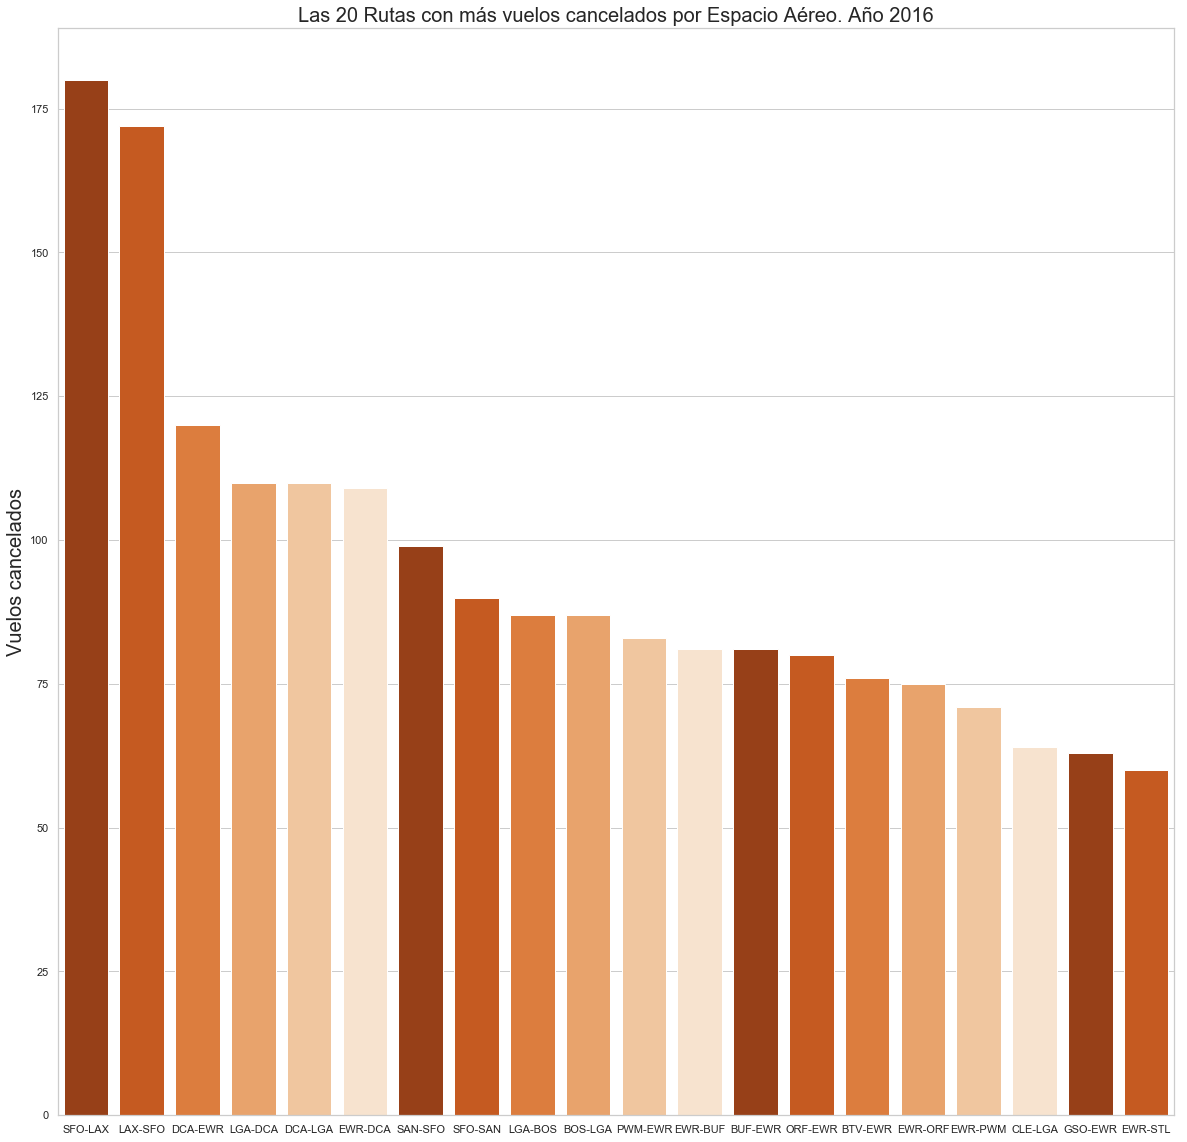

In [286]:
plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("Oranges_r")
ax = sns.barplot(x=rutasVuelosCanceladosNAS.index, y=rutasVuelosCanceladosNAS['VuelosCancelados'], palette=pal)

ax.set_ylabel("Vuelos cancelados", fontsize=20)
ax.set_title('Las 20 Rutas con más vuelos cancelados por Espacio Aéreo. Año ' + year, fontsize=20)

plt.show()

#### 1.3.6.6.4 Vuelos cancelados por Ruta por Seguridad

In [287]:
rutasVuelosCanceladosSeguridad = pd.DataFrame(dfanual[dfanual['CancellationCode'] == 'D'].Route.value_counts(sort=True))

In [288]:
rutasVuelosCanceladosSeguridad.shape

(25, 1)

In [289]:
rutasVuelosCanceladosSeguridad = rutasVuelosCanceladosSeguridad.rename(columns={'Route': 'VuelosCancelados'})

rutasVuelosCanceladosSeguridad.head(10)

VuelosCancelados
JFK-BOS                 2
LAX-DEN                 1
JFK-MCO                 1
PHX-JFK                 1
SLC-OKC                 1
OKC-SLC                 1
JFK-LAX                 1
MCO-FLL                 1
JFK-SFO                 1
ACY-MCO                 1

In [290]:
#me quedo con las 20 rutas con mayor número de vuelos cancelados
rutasVuelosCanceladosSeguridad = rutasVuelosCanceladosSeguridad.head(20)

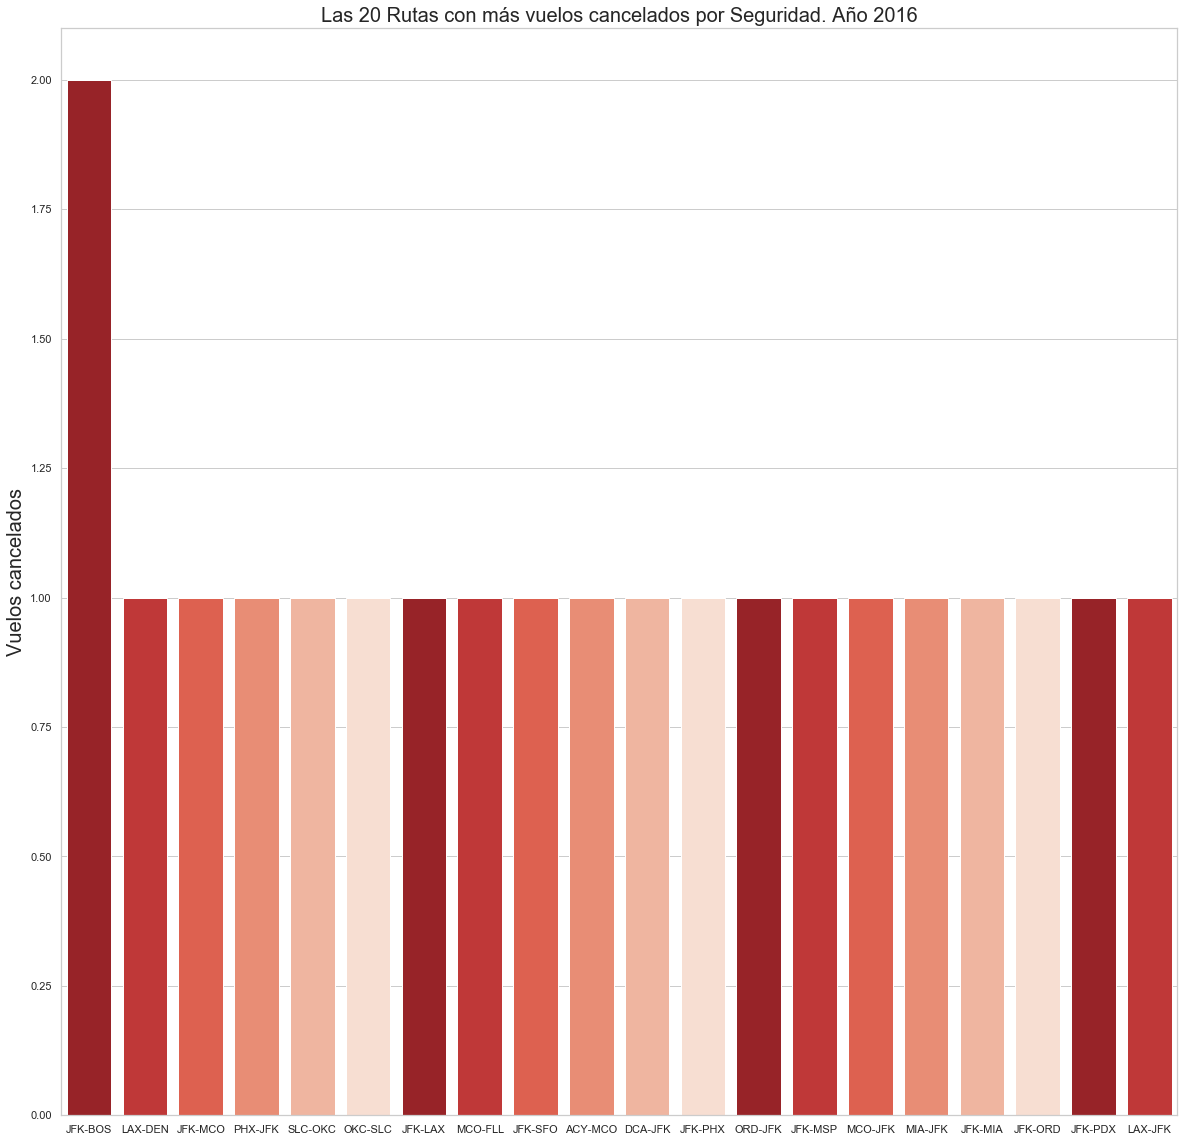

In [291]:
plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("Reds_r")
ax = sns.barplot(x=rutasVuelosCanceladosSeguridad.index, y=rutasVuelosCanceladosSeguridad['VuelosCancelados'], palette=pal)

ax.set_ylabel("Vuelos cancelados", fontsize=20)
ax.set_title('Las 20 Rutas con más vuelos cancelados por Seguridad. Año ' + year, fontsize=20)

plt.show()

### 1.3.6.7 Cancelaciones por Aeropuertos

#### 1.3.6.7.1 Vuelos cancelados en aeropuertos por la Aerolínea

In [292]:
aeropuertosVuelosCanceladosAerolinea = pd.DataFrame(dfanual[dfanual['CancellationCode'] == 'A'].Origin.value_counts(sort=True))

In [293]:
aeropuertosVuelosCanceladosAerolinea.shape

(274, 1)

In [294]:
aeropuertosVuelosCanceladosAerolinea = aeropuertosVuelosCanceladosAerolinea.rename(columns={'Origin': 'VuelosCancelados'})

aeropuertosVuelosCanceladosAerolinea.head(10)

VuelosCancelados
DFW              1127
LAX              1111
ATL              1091
LGA               708
SFO               705
LAS               685
ORD               635
PHX               527
DEN               494
BOS               486

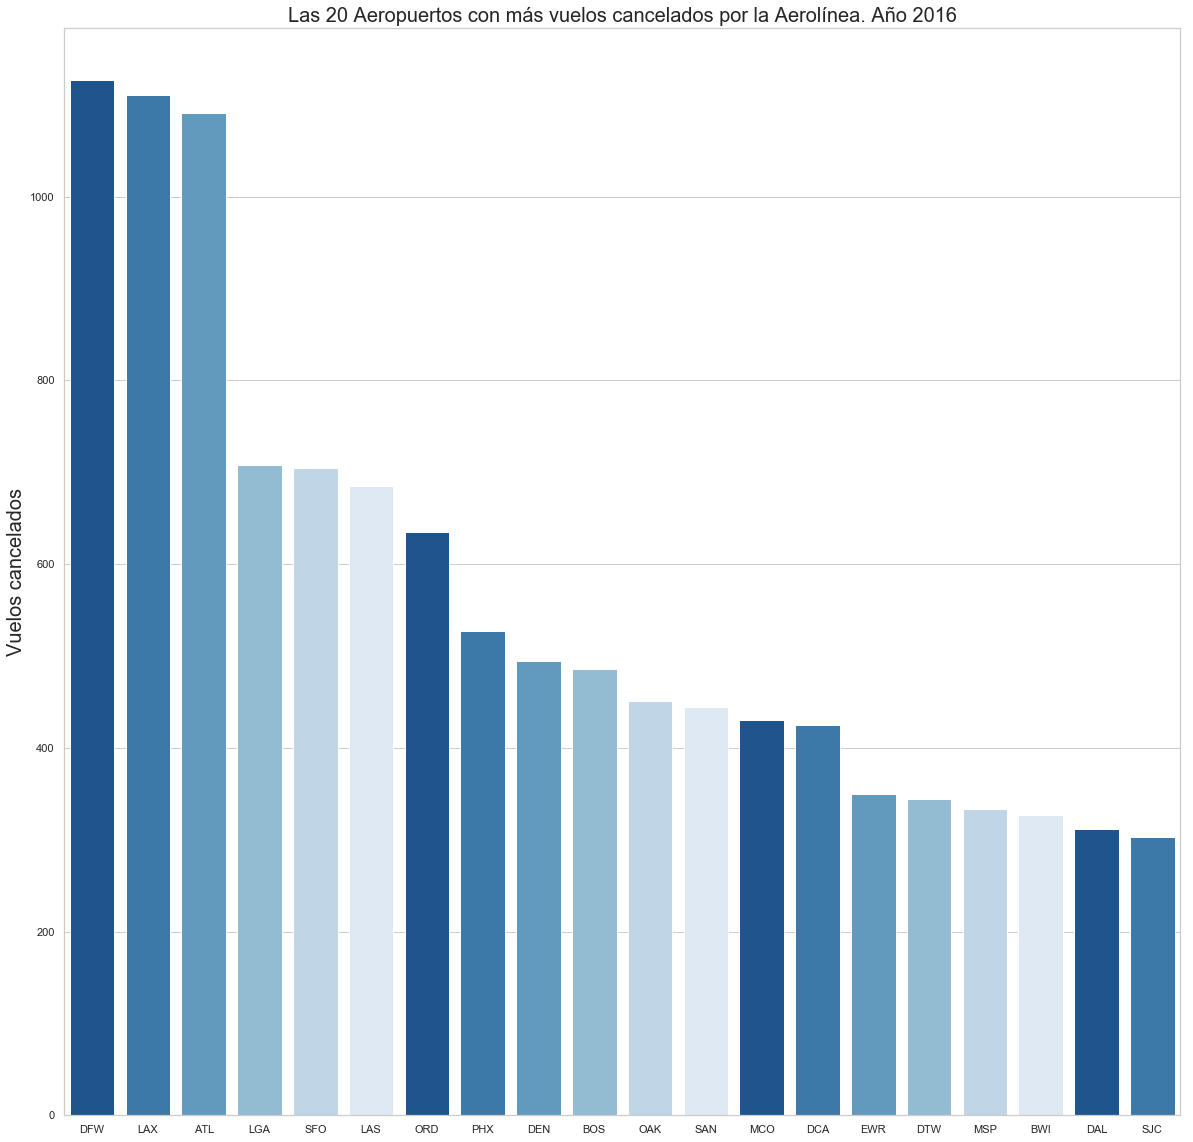

In [295]:
#me quedo con las 20 aeropuertos con mayor número de vuelos cancelados
aeropuertosVuelosCanceladosAerolinea = aeropuertosVuelosCanceladosAerolinea.head(20)

plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("Blues_r")
ax = sns.barplot(x=aeropuertosVuelosCanceladosAerolinea.index, y=aeropuertosVuelosCanceladosAerolinea['VuelosCancelados'], palette=pal)

ax.set_ylabel("Vuelos cancelados", fontsize=20)
ax.set_title('Las 20 Aeropuertos con más vuelos cancelados por la Aerolínea. Año ' + year, fontsize=20)

plt.show()

#### 1.3.6.7.2 Vuelos cancelados en aeropuertos por Meteorología

In [296]:
aeropuertosVuelosCanceladosMeteo = pd.DataFrame(dfanual[dfanual['CancellationCode'] == 'B'].Origin.value_counts(sort=True))

aeropuertosVuelosCanceladosMeteo.shape

(282, 1)

In [297]:
aeropuertosVuelosCanceladosMeteo = aeropuertosVuelosCanceladosMeteo.rename(columns={'Origin': 'VuelosCancelados'})

aeropuertosVuelosCanceladosMeteo.head(10)

VuelosCancelados
DEN              2588
ORD              2250
BWI              1244
MDW              1217
LGA              1130
SFO              1109
DFW              1064
ATL              1053
MCO              1027
EWR              1012

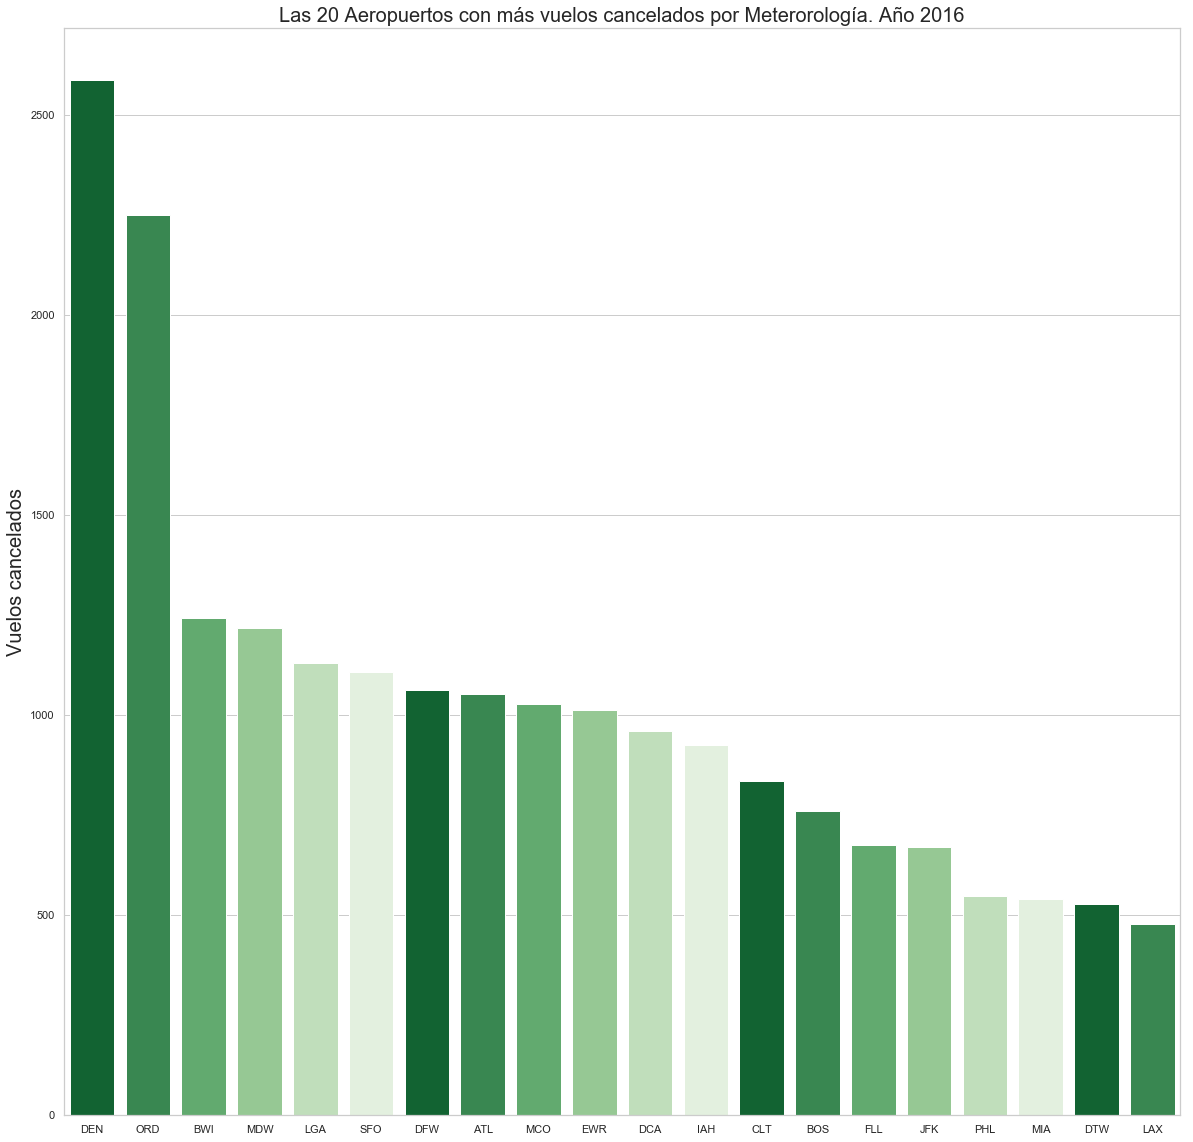

In [298]:
#me quedo con las 20 aeropuertos con mayor número de vuelos cancelados
aeropuertosVuelosCanceladosMeteo = aeropuertosVuelosCanceladosMeteo.head(20)

plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("Greens_r")
ax = sns.barplot(x=aeropuertosVuelosCanceladosMeteo.index, y=aeropuertosVuelosCanceladosMeteo['VuelosCancelados'], palette=pal)

ax.set_ylabel("Vuelos cancelados", fontsize=20)
ax.set_title('Las 20 Aeropuertos con más vuelos cancelados por Meterorología. Año ' + year, fontsize=20)

plt.show()

#### 1.3.6.7.3 Vuelos cancelados en aeropuertos por Espacio Aéreo

In [299]:
aeropuertosVuelosCanceladosNAS = pd.DataFrame(dfanual[dfanual['CancellationCode'] == 'C'].Origin.value_counts(sort=True))

aeropuertosVuelosCanceladosNAS.shape

(228, 1)

In [300]:
aeropuertosVuelosCanceladosNAS = aeropuertosVuelosCanceladosNAS.rename(columns={'Origin': 'VuelosCancelados'})

aeropuertosVuelosCanceladosNAS.head(10)

VuelosCancelados
EWR              1563
ORD              1074
SFO               642
LGA               621
IAH               473
DCA               348
LAX               307
JFK               304
BOS               256
LAS               173

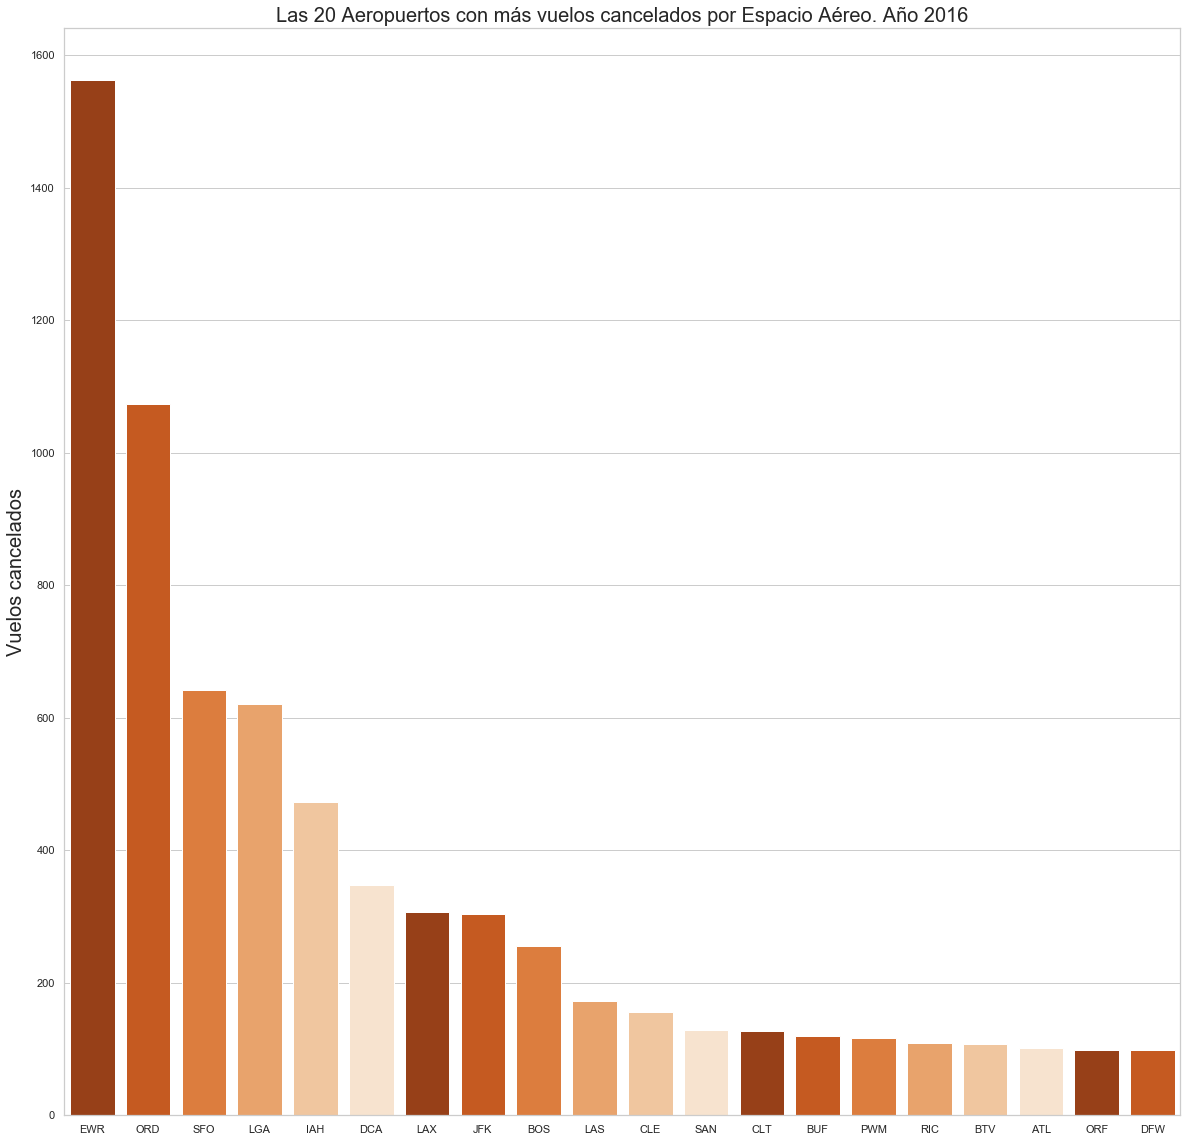

In [301]:
#me quedo con las 20 aeropuertos con mayor número de vuelos cancelados
aeropuertosVuelosCanceladosNAS = aeropuertosVuelosCanceladosNAS.head(20)

plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("Oranges_r")
ax = sns.barplot(x=aeropuertosVuelosCanceladosNAS.index, y=aeropuertosVuelosCanceladosNAS['VuelosCancelados'], palette=pal)

ax.set_ylabel("Vuelos cancelados", fontsize=20)
ax.set_title('Las 20 Aeropuertos con más vuelos cancelados por Espacio Aéreo. Año ' + year, fontsize=20)

plt.show()

#### 1.3.6.7.4 Vuelos cancelados en aeropuertos por Seguridad

In [302]:
aeropuertosVuelosCanceladosSeguridad = pd.DataFrame(dfanual[dfanual['CancellationCode'] == 'D'].Origin.value_counts(sort=True))

aeropuertosVuelosCanceladosSeguridad.shape

(13, 1)

In [303]:
aeropuertosVuelosCanceladosSeguridad = aeropuertosVuelosCanceladosSeguridad.rename(columns={'Origin': 'VuelosCancelados'})

aeropuertosVuelosCanceladosSeguridad.head(10)

VuelosCancelados
JFK                11
MCO                 2
LAX                 2
OKC                 2
ORD                 1
ACY                 1
DCA                 1
SFO                 1
SLC                 1
PHX                 1

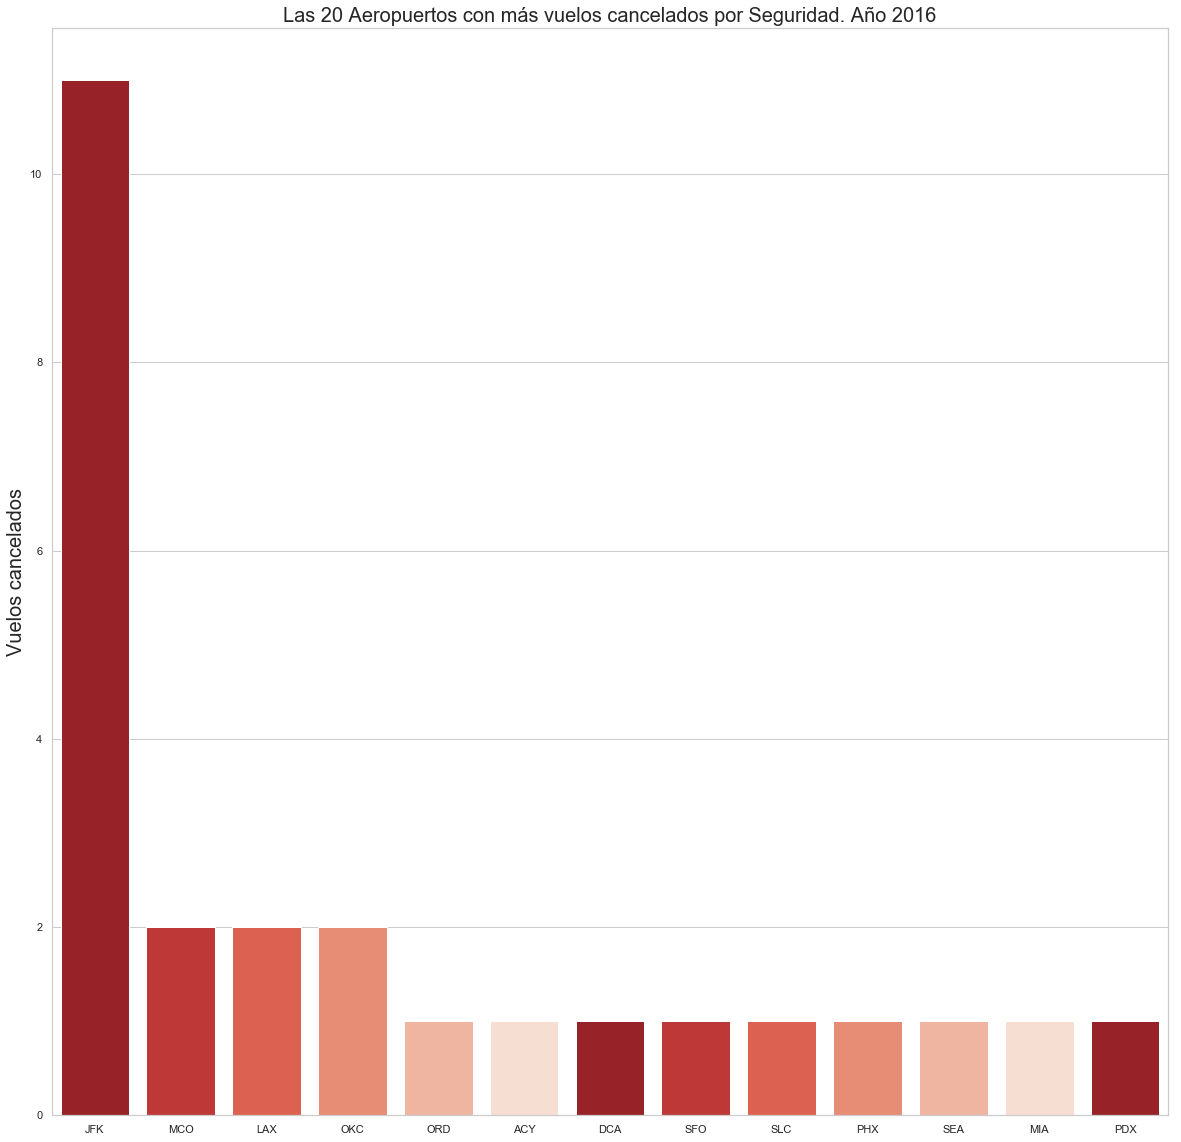

In [304]:
#me quedo con las 20 aeropuertos con mayor número de vuelos cancelados
aeropuertosVuelosCanceladosSeguridad = aeropuertosVuelosCanceladosSeguridad.head(20)

plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("Reds_r")
ax = sns.barplot(x=aeropuertosVuelosCanceladosSeguridad.index, y=aeropuertosVuelosCanceladosSeguridad['VuelosCancelados'], palette=pal)

ax.set_ylabel("Vuelos cancelados", fontsize=20)
ax.set_title('Las 20 Aeropuertos con más vuelos cancelados por Seguridad. Año ' + year, fontsize=20)

plt.show()

## 2. Áreas geográficas
Vamos a ver cómo asignar áreas geográficos a los diferentes aeropuertos para identificar mejor en qué zona están y ver si merece la pena hacer un modelo de predicción /clasificación por zonas geográficas.
Para ello tenemos los Estados en los que se ubica cada aeropuerto, indicado en el campo "OriginState", por lo que hemos hecho un csv mapeando los Estados con zonas geográficas que hemos estimado inicialmente, en función tanto de la geografía, como del posible clima.
1. Por geografía: dividimos el país en 4 partes: Este, Central y Oeste(incluye Hawai).
2. Por clima: a las 3 divisiones del contiennte, los subdividimos en Norte y Sur, ya que seria razonable pensar que  en cada una de estas 3 divisiones el clima varía bastante, a lo largo del año, entre norte y sur.

In [305]:
#hemos creado un csv con las zonas geográficas Este, Central y Oeste y por Norte y Sur 
#abreviado en ES, EN, CS, CN, WS y WN
zonaEstados = pd.read_csv("/Users/moncholv/Documents/Proyecto AIr/datasets/geo/" + 'ZonasEstados.csv', delimiter=';')

In [306]:
zonaEstados.head(5)

State GeoCluster
0    AL         ES
1    AK         WN
2    AZ         WS
3    AR         CS
4    CA         WS

In [307]:
#para hacer el join por estado, y como tenemos dos Estados en el Dataset (OriginState y DestState), renombraremos
#sucesivamente la cabecera para hacer el join
zonaEstados = zonaEstados.rename(columns={'State': 'OriginState', 'GeoCluster': 'OriginGeo'})

In [308]:
#hacemos el join por el Estado Origen del vuelo
dfanual = pd.merge(dfanual, zonaEstados, on='OriginState', how='inner')

In [309]:
#ahora renombramos para casar con los de Destino
zonaEstados = zonaEstados.rename(columns={'OriginState': 'DestState', 'OriginGeo': 'DestGeo'})

#hacemos el join por el Estado Destino del vuelo
dfanual = pd.merge(dfanual, zonaEstados, on='DestState', how='inner')

In [310]:
#comprobamos
dfanual[['OriginState', 'OriginGeo', 'DestState', 'DestGeo']].head(5)

OriginState OriginGeo DestState DestGeo
0          TX        CS        MI      EN
1          TX        CS        MI      EN
2          TX        CS        MI      EN
3          TX        CS        MI      EN
4          TX        CS        MI      EN

Revisemos por las zonas geográficas, algunos de los datos principales de retrasos, cancelaciones y número de vuelos totales, para comprobar si estamos en lo cierto con respecto a la intuición de los datos por aeropuertos y rutas que hemos visto en el apartado 1.3

In [311]:
#primero contamos todos los retrasos por Zonas de Origen del vuelo
retrasosSalidaPorZonasOrigen = pd.DataFrame(dfanual[dfanual['DepDel15'] == 1].OriginGeo.value_counts(sort=True))

In [312]:
retrasosSalidaPorZonasOrigen = retrasosSalidaPorZonasOrigen.rename(columns={'OriginGeo': 'VuelosRetrasados'})
retrasosSalidaPorZonasOrigen

VuelosRetrasados
EN            299077
ES            213936
WS            211270
CS            167471
CN             44802
WN             14894

In [313]:
#vuelos totales por zona
vuelosTotalesPorZonasOrigen = pd.DataFrame(dfanual.OriginGeo.value_counts(sort=True))

In [314]:
vuelosTotalesPorZonasOrigen = vuelosTotalesPorZonasOrigen.rename(columns={'OriginGeo': 'VuelosTotales'})
vuelosTotalesPorZonasOrigen

VuelosTotales
EN        1726483
ES        1291552
WS        1172217
CS         970223
CN         318387
WN         125585

In [315]:
#los unimos
#hacemos el join por el Estado Destino del vuelo
datosZonasOrigen = pd.merge(vuelosTotalesPorZonasOrigen, retrasosSalidaPorZonasOrigen, left_index=True, right_index=True)

In [316]:
datosZonasOrigen

VuelosTotales  VuelosRetrasados
EN        1726483            299077
ES        1291552            213936
WS        1172217            211270
CS         970223            167471
CN         318387             44802
WN         125585             14894

In [317]:
#retrasos en Zona Origen por culpa de la llegada tarde del vuelo anterior
#sacamos las medias de retrasos por llegada tarde del vuelo anterior
retrasosSalidasteAircraftPorGeo = pd.DataFrame(dfanual[(dfanual['DepDel15'] == 1) & (dfanual['CarrierDelay'] == 0) & (dfanual['LateAircraftDelay'] > 0)])

In [318]:
retrasosSalidasteAircraftPorGeo = pd.DataFrame(retrasosSalidasteAircraftPorGeo.groupby('OriginGeo').aggregate({'OriginGeo': 'count', 'DepDelay':'mean'}))
retrasosSalidasteAircraftPorGeo = retrasosSalidasteAircraftPorGeo.rename(columns={'OriginGeo': 'VuelosLateArrival', 'DepDelay': 'MediaLateArrival'})

In [319]:
retrasosSalidasteAircraftPorGeo

VuelosLateArrival  MediaLateArrival
OriginGeo                                     
CN                     12187         74.591204
CS                     41615         71.902896
EN                     63434         77.746240
ES                     46293         73.963817
WN                      4371         70.983528
WS                     56672         64.248359

In [320]:
#retrasos en Zona Origen por culpa de la Aerolínea
#sacamos las medias
retrasosSalidasAerolineaPorGeo = pd.DataFrame(dfanual[(dfanual['DepDel15'] == 1) & (dfanual['LateAircraftDelay'] == 0) & (dfanual['CarrierDelay'] > 0)])
retrasosSalidasAerolineaPorGeo = pd.DataFrame(retrasosSalidasAerolineaPorGeo.groupby('OriginGeo').aggregate({'OriginGeo': 'count', 'DepDelay':'mean'}))
retrasosSalidasAerolineaPorGeo = retrasosSalidasAerolineaPorGeo.rename(columns={'OriginGeo': 'VuelosAerolinea', 'DepDelay': 'MediaAerolinea'})

In [321]:
retrasosSalidasAerolineaPorGeo

VuelosAerolinea  MediaAerolinea
OriginGeo                                 
CN                    9653       94.311924
CS                   36452       70.117470
EN                   66449       79.402504
ES                   49420       76.525010
WN                    2912       91.087912
WS                   35809       72.573822

In [322]:
#vuelos totales cancelados por Zona Origen
vuelosCanceladosPorGeo = pd.DataFrame(dfanual[(dfanual['Cancelled'] == 1)])
vuelosCanceladosPorGeo = pd.DataFrame(vuelosCanceladosPorGeo.groupby('OriginGeo').aggregate({'OriginGeo': 'count'}))
vuelosCanceladosPorGeo = vuelosCanceladosPorGeo.rename(columns={'OriginGeo': 'VuelosCancelados'})

In [323]:
vuelosCanceladosPorGeo

VuelosCancelados
OriginGeo                  
CN                     3195
CS                    11765
EN                    26362
ES                    12260
WN                     1112
WS                    11085

In [324]:
#vuelos cancelados por Meteo Zona Origen
vuelosCanceladosMeteoPorGeo = pd.DataFrame(dfanual[(dfanual['CancellationCode'] == 'B')])
vuelosCanceladosMeteoPorGeo = pd.DataFrame(vuelosCanceladosMeteoPorGeo.groupby('OriginGeo').aggregate({'OriginGeo': 'count'}))
vuelosCanceladosMeteoPorGeo = vuelosCanceladosMeteoPorGeo.rename(columns={'OriginGeo': 'VuelosCanceladosMeteo'})

In [325]:
vuelosCanceladosPorGeo

VuelosCancelados
OriginGeo                  
CN                     3195
CS                    11765
EN                    26362
ES                    12260
WN                     1112
WS                    11085

In [326]:
# terminamos de fusionar todos los datasets
datosZonasOrigen = pd.merge(datosZonasOrigen, retrasosSalidasteAircraftPorGeo, left_index=True, right_index=True)

In [327]:
datosZonasOrigen = pd.merge(datosZonasOrigen, retrasosSalidasAerolineaPorGeo, left_index=True, right_index=True)

In [328]:
datosZonasOrigen = pd.merge(datosZonasOrigen, vuelosCanceladosPorGeo, left_index=True, right_index=True)

In [329]:
datosZonasOrigen = pd.merge(datosZonasOrigen, vuelosCanceladosMeteoPorGeo, left_index=True, right_index=True)

In [330]:
datosZonasOrigen

VuelosTotales  VuelosRetrasados  VuelosLateArrival  MediaLateArrival  \
EN        1726483            299077              63434         77.746240   
ES        1291552            213936              46293         73.963817   
WS        1172217            211270              56672         64.248359   
CS         970223            167471              41615         71.902896   
CN         318387             44802              12187         74.591204   
WN         125585             14894               4371         70.983528   

    VuelosAerolinea  MediaAerolinea  VuelosCancelados  VuelosCanceladosMeteo  
EN            66449       79.402504             26362                  13968  
ES            49420       76.525010             12260                   6967  
WS            35809       72.573822             11085                   4054  
CS            36452       70.117470             11765                   6841  
CN             9653       94.311924              3195                   1845  
WN             2912       91.087912              1112                    736

In [331]:
#por último sacamos porcentajes sobre los vuelos totales, para conocer la proporción real
datosZonasOrigen['PctVuelosRetrasados'] = (datosZonasOrigen['VuelosRetrasados'] / datosZonasOrigen['VuelosTotales'])*100
datosZonasOrigen['PctVuelosLateArrival'] = (datosZonasOrigen['VuelosLateArrival'] / datosZonasOrigen['VuelosTotales'])*100
datosZonasOrigen['PctVuelosAerolinea'] = (datosZonasOrigen['VuelosAerolinea'] / datosZonasOrigen['VuelosTotales'])*100
datosZonasOrigen['PctVuelosCancelados'] = (datosZonasOrigen['VuelosCancelados'] / datosZonasOrigen['VuelosTotales'])*100
datosZonasOrigen['PctVuelosCanceladosMeteo'] = (datosZonasOrigen['VuelosCanceladosMeteo'] / datosZonasOrigen['VuelosTotales'])*100


In [332]:
datosZonasOrigen

VuelosTotales  VuelosRetrasados  VuelosLateArrival  MediaLateArrival  \
EN        1726483            299077              63434         77.746240   
ES        1291552            213936              46293         73.963817   
WS        1172217            211270              56672         64.248359   
CS         970223            167471              41615         71.902896   
CN         318387             44802              12187         74.591204   
WN         125585             14894               4371         70.983528   

    VuelosAerolinea  MediaAerolinea  VuelosCancelados  VuelosCanceladosMeteo  \
EN            66449       79.402504             26362                  13968   
ES            49420       76.525010             12260                   6967   
WS            35809       72.573822             11085                   4054   
CS            36452       70.117470             11765                   6841   
CN             9653       94.311924              3195                   1845   
WN             2912       91.087912              1112                    736   

    PctVuelosRetrasados  PctVuelosLateArrival  PctVuelosAerolinea  \
EN            17.322904              3.674175            3.848807   
ES            16.564258              3.584292            3.826404   
WS            18.023113              4.834600            3.054810   
CS            17.261083              4.289220            3.757074   
CN            14.071554              3.827732            3.031845   
WN            11.859697              3.480511            2.318748   

    PctVuelosCancelados  PctVuelosCanceladosMeteo  
EN             1.526919                  0.809044  
ES             0.949246                  0.539429  
WS             0.945644                  0.345840  
CS             1.212608                  0.705096  
CN             1.003496                  0.579483  
WN             0.885456                  0.586057

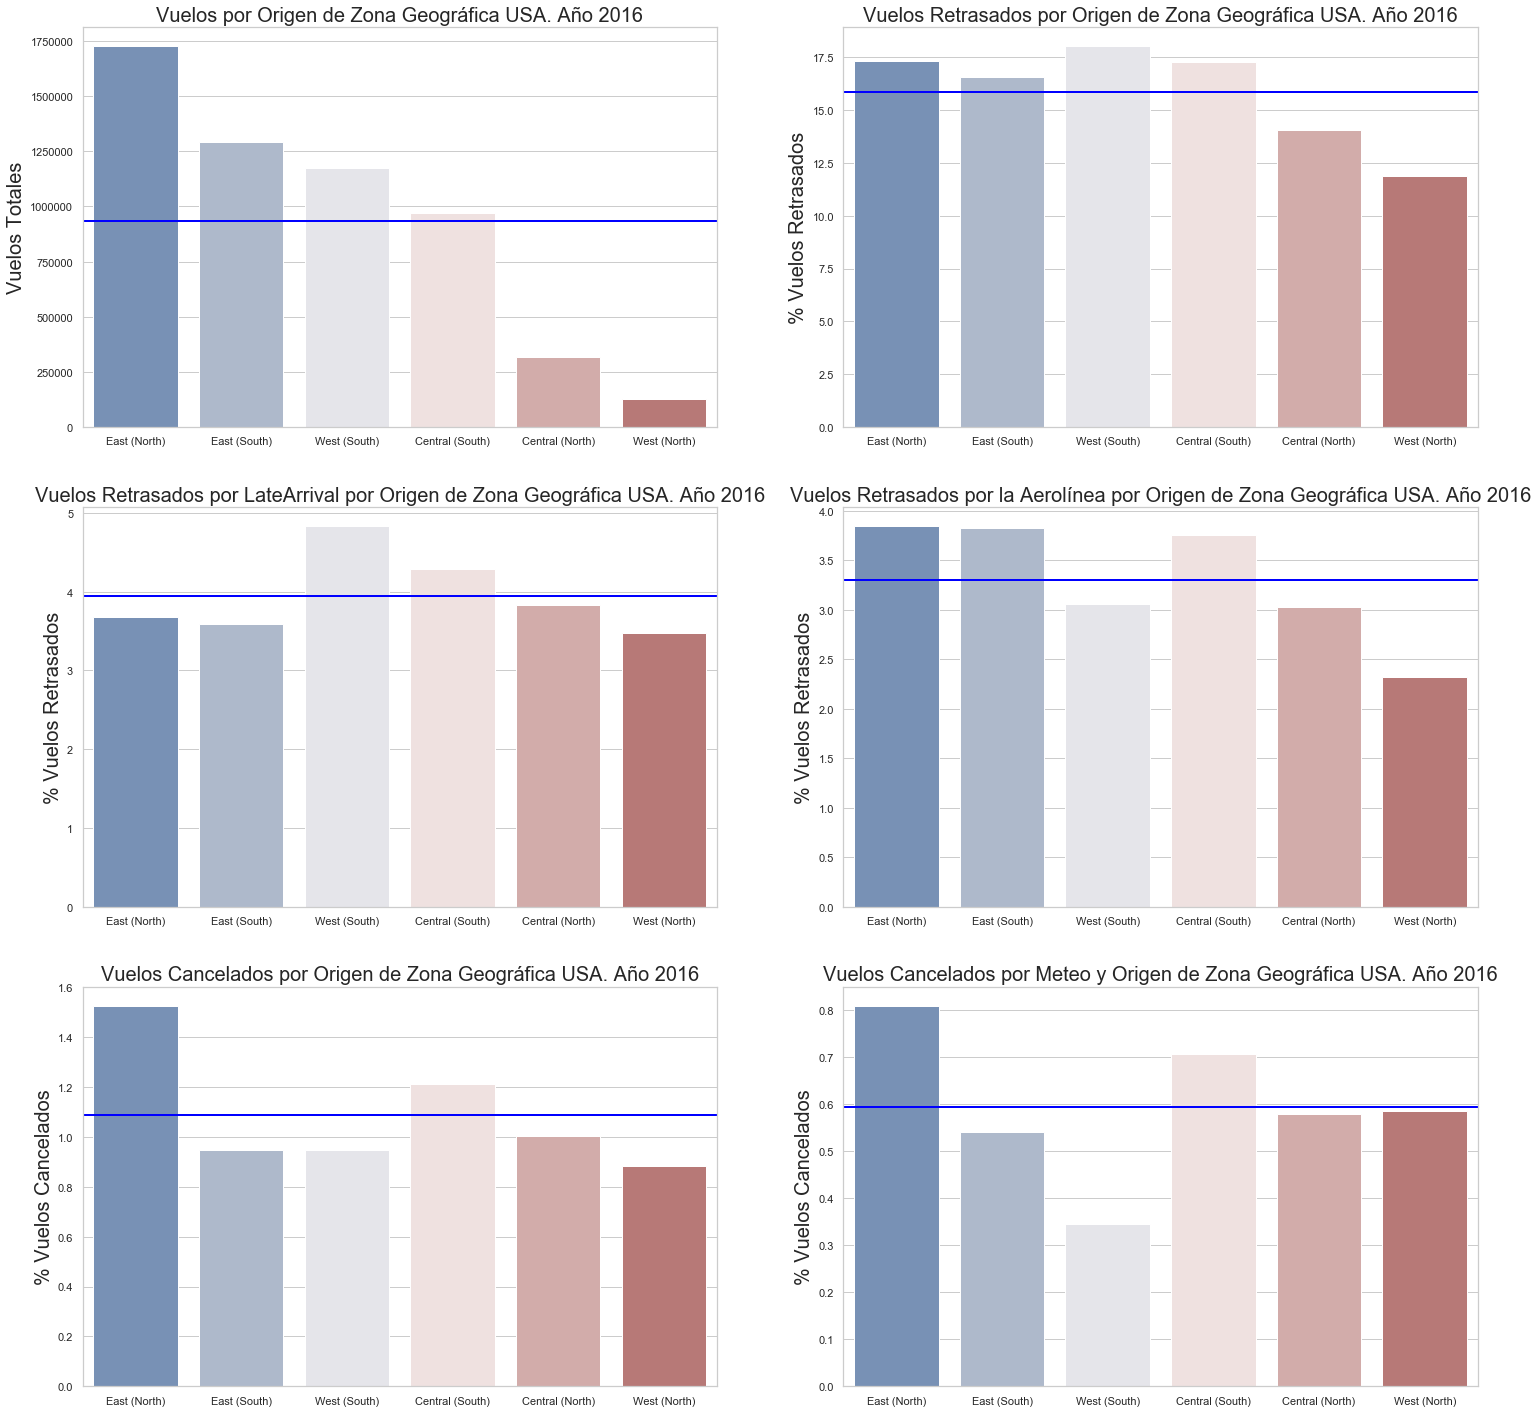

In [333]:
#a pintar

my_xticks=['East (North)', 'East (South)', 'West (South)', 'Central (South)', 'Central (North)', 'West (North)']

#Sacamos gráficos
plt.figure(figsize=(25, 25))

#Vuelos por Origen de Zona Geográfica USA
plt.subplot(3,2,1)

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=datosZonasOrigen['VuelosTotales'], palette=pal)

ax.set_ylabel("Vuelos Totales", fontsize=20)
ax.set_title('Vuelos por Origen de Zona Geográfica USA. Año ' + year, fontsize=20)

plt.axhline(datosZonasOrigen['VuelosTotales'].mean(), color='Blue', linewidth=2)

#Vuelos Retrasados por Origen de Zona Geográfica USA
plt.subplot(3,2,2)

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=datosZonasOrigen['PctVuelosRetrasados'], palette=pal)

ax.set_ylabel("% Vuelos Retrasados", fontsize=20)
ax.set_title('Vuelos Retrasados por Origen de Zona Geográfica USA. Año ' + year, fontsize=20)

plt.axhline(datosZonasOrigen['PctVuelosRetrasados'].mean(), color='Blue', linewidth=2)

#Vuelos Retrasados por LateArrival por Origen de Zona Geográfica USA
plt.subplot(3,2,3)

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=datosZonasOrigen['PctVuelosLateArrival'], palette=pal)

ax.set_ylabel("% Vuelos Retrasados", fontsize=20)
ax.set_title('Vuelos Retrasados por LateArrival por Origen de Zona Geográfica USA. Año ' + year, fontsize=20)

plt.axhline(datosZonasOrigen['PctVuelosLateArrival'].mean(), color='Blue', linewidth=2)


#uelos Retrasados por la Aerolínea por Origen de Zona Geográfica USA
plt.subplot(3,2,4)

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=datosZonasOrigen['PctVuelosAerolinea'], palette=pal)

ax.set_ylabel("% Vuelos Retrasados", fontsize=20)
ax.set_title('Vuelos Retrasados por la Aerolínea por Origen de Zona Geográfica USA. Año ' + year, fontsize=20)

plt.axhline(datosZonasOrigen['PctVuelosAerolinea'].mean(), color='Blue', linewidth=2)

#Vuelos Cancelados por Origen de Zona Geográfica USA
plt.subplot(3,2,5)

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=datosZonasOrigen['PctVuelosCancelados'], palette=pal)

ax.set_ylabel("% Vuelos Cancelados", fontsize=20)
ax.set_title('Vuelos Cancelados por Origen de Zona Geográfica USA. Año ' + year, fontsize=20)

plt.axhline(datosZonasOrigen['PctVuelosCancelados'].mean(), color='Blue', linewidth=2)

#Vuelos Cancelados por Meteo y por Origen de Zona Geográfica USA
plt.subplot(3,2,6)

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=datosZonasOrigen['PctVuelosCanceladosMeteo'], palette=pal)

ax.set_ylabel("% Vuelos Cancelados", fontsize=20)
ax.set_title('Vuelos Cancelados por Meteo y Origen de Zona Geográfica USA. Año ' + year, fontsize=20)

plt.axhline(datosZonasOrigen['PctVuelosCanceladosMeteo'].mean(), color='Blue', linewidth=2)


plt.show()

1. Se ve claramente que la cantidad de vuelos del Este de USA es muy superior al del Oeste y Centro del país.
2. En cuanto a retrasos, porcentualmente destacan, un poco por encima el Este y el Centro Sur, y en el caso de retrasos por la aerolínea es similar.
3. En cuanto a vuelos cancelados, claramente el Este y el Centro sobresalen, el resto está por de debajo de la media, y parece que el factor meteo es uno de los clave, dado que las zonas de huracanes, tornados y heladas, prevalecen en el Este y Centro Sur de USA. En el Oeste Norte, está también encuadrado Alaska y el estado de Washington, por lo que también destaca. La mejor zona del pais en cuanto a cancelaciones por meteo es claramente la Costa Oeste Sur del país, California, Nevada y Arizona.